## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import time
import gc
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [2]:
DATA_PATH = "Datasets\\New_datasets\\Data_feature_tonnetz.json"

In [3]:
# Function to load data

def load_data(data_path):
    
    with open(data_path, "r") as fp:
        data = json.load(fp)

  # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return X, y

In [4]:
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [5]:
X.shape

(3020, 259, 6)

In [6]:
y.shape

(3020,)

In [7]:
import gc
gc.collect()

0

# SVM 

In [8]:
import gc
gc.collect()

0

In [9]:
# parameters = [{'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['linear']},
#               {'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,10,100]}]

In [10]:
# from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [11]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [12]:
# grid_search = GridSearchCV(svc, param_grid = parameters, scoring='accuracy',cv=shuffle_split,n_jobs=-1,verbose=10)

In [13]:
# grid_search.fit(X,y)

In [14]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [15]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_svm = []
y_test_all = []
times_svm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    model_svm = SVC(kernel='rbf')
    
    start_time = time.time()
    
    model_svm.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = model_svm.predict(X_test)
    scores_svm.append(x)
    times_svm.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [16]:
times_svm

[5.291043043136597,
 5.969218730926514,
 4.943357229232788,
 5.584008455276489,
 4.854931354522705,
 5.465662956237793,
 5.255841016769409,
 5.274973392486572,
 5.546609401702881,
 5.033316135406494]

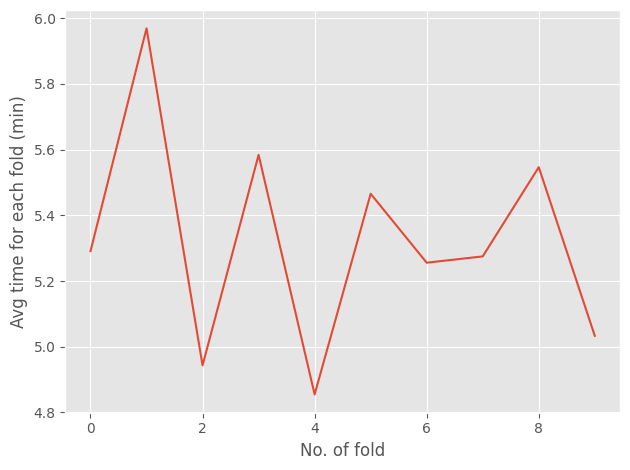

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(times_svm)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold (min)")
plt.tight_layout()
plt.savefig("svm times")
plt.show()

In [18]:
np.array(y_test_all).shape

(10, 302)

In [19]:
np.array(scores_svm).shape

(10, 302)

In [20]:
from sklearn.metrics import accuracy_score
acc_scores_svm = []
for i in range(len(y_test_all)):
    acc_scores_svm.append(accuracy_score(y_test_all[i],scores_svm[i]))

In [21]:
acc_scores_svm

[0.5132450331125827,
 0.5066225165562914,
 0.5165562913907285,
 0.5033112582781457,
 0.48344370860927155,
 0.5033112582781457,
 0.5,
 0.4867549668874172,
 0.5364238410596026,
 0.5]

In [22]:
df_acc = pd.DataFrame([acc_scores_svm])

df_acc.to_csv('svm_accuracy', index=False)

df_acc = pd.read_csv('svm_accuracy')

acc_scores_svm = df_acc.iloc[0].values

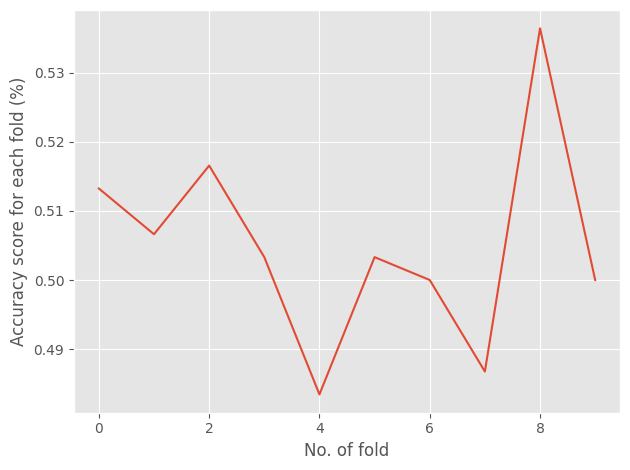

In [23]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_svm)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold (%)")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("svm accuracy")
plt.show()

In [24]:
scores_svm_n = np.array(scores_svm)
y_test_all_n = np.array(y_test_all)

scores_svm_n = scores_svm_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_svm_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.50%


In [26]:
import gc
gc.collect()

6593

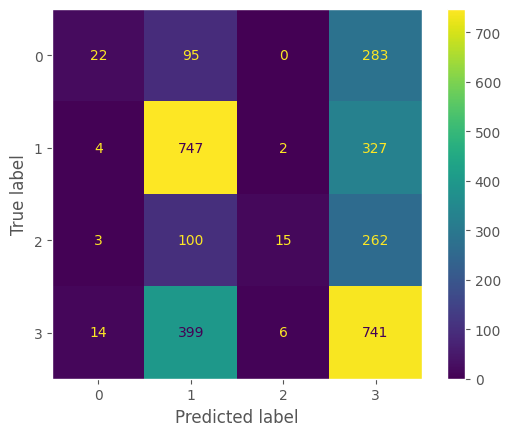

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_svm_n, labels=model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_svm.classes_)
disp.plot()
plt.grid(False)
plt.savefig("svm")
plt.show()

In [28]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_svm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.51      0.06      0.10       400
           1       0.56      0.69      0.62      1080
           2       0.65      0.04      0.07       380
           3       0.46      0.64      0.53      1160

    accuracy                           0.50      3020
   macro avg       0.55      0.36      0.33      3020
weighted avg       0.53      0.50      0.45      3020



## Decision Tree

In [29]:
import gc
gc.collect()

5

In [30]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_dtc = []
times_dtc = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    dtc = DecisionTreeClassifier()
    
    
    start_time = time.time()
    dtc.fit(X_train, y_train)
    end_time = time.time()
    
    
    x = dtc.predict(X_test)
    
    scores_dtc.append(x)
    times_dtc.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [31]:
times_dtc

[3.063169240951538,
 4.596584796905518,
 5.116132020950317,
 4.535114288330078,
 5.002914190292358,
 5.575819253921509,
 4.788884401321411,
 4.334284067153931,
 5.636645793914795,
 4.678799867630005]

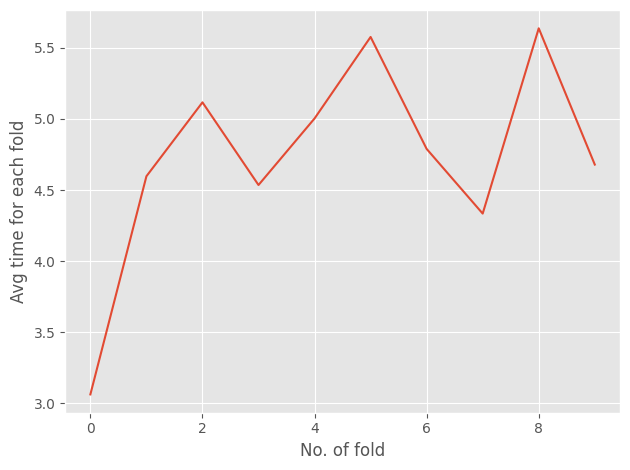

In [32]:
import matplotlib.pyplot as plt

plt.plot(times_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc times")
plt.show()

In [33]:
np.array(y_test_all).shape

(10, 302)

In [34]:
np.array(scores_dtc).shape

(10, 302)

In [35]:
from sklearn.metrics import accuracy_score
acc_scores_dtc = []
for i in range(len(y_test_all)):
    acc_scores_dtc.append(accuracy_score(y_test_all[i],scores_dtc[i]))

In [36]:
acc_scores_dtc

[0.39072847682119205,
 0.3741721854304636,
 0.36423841059602646,
 0.347682119205298,
 0.3675496688741722,
 0.32450331125827814,
 0.40397350993377484,
 0.36423841059602646,
 0.33112582781456956,
 0.3344370860927152]

In [37]:
df_acc = pd.DataFrame([acc_scores_dtc])

df_acc.to_csv('dtc_accuracy', index=False)

df_acc = pd.read_csv('dtc_accuracy')

acc_scores_dtc = df_acc.iloc[0].values

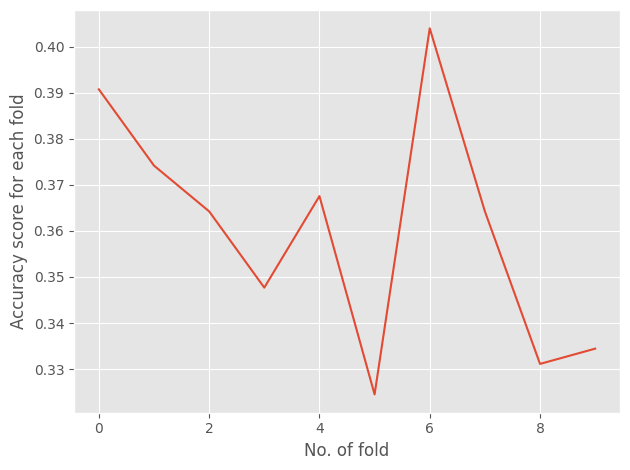

In [38]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc accuracy")
plt.show()

In [39]:
import gc
gc.collect()

3554

In [40]:
scores_dtc_n = np.array(scores_dtc)
y_test_all_n = np.array(y_test_all)

scores_dtc_n = scores_dtc_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_dtc_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 36.03%


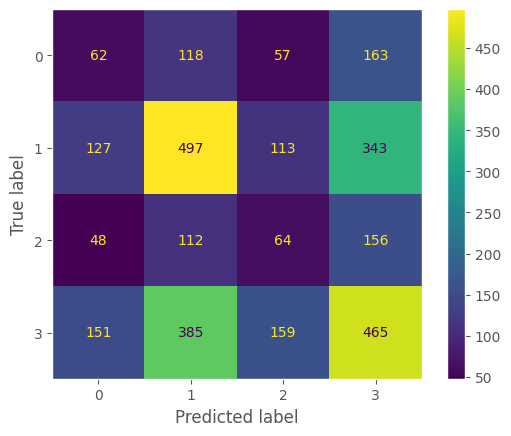

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_dtc_n, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.grid(False)
plt.savefig("DTC")
plt.show()

In [43]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_dtc_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.16      0.15      0.16       400
           1       0.45      0.46      0.45      1080
           2       0.16      0.17      0.17       380
           3       0.41      0.40      0.41      1160

    accuracy                           0.36      3020
   macro avg       0.30      0.30      0.30      3020
weighted avg       0.36      0.36      0.36      3020



In [44]:
# val = np.arange(100,500,20)
# parameters = [{'max_depth':val}]

In [45]:
# parameters

In [46]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [47]:
# grid_search_dtc = GridSearchCV(dtc, param_grid = parameters, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [48]:
# grid_search_dtc.fit(X_train,y_train)

In [49]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# Random Forest

In [50]:
import gc
gc.collect()

6327

In [51]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rdf = []
times_rdf = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    rdf = RandomForestClassifier()
    
    #start time
    start_time = time.time()             
    
    rdf.fit(X_train, y_train)
    
    #end time
    end_time = time.time()     
    
    x = rdf.predict(X_test)
    scores_rdf.append(x)
    times_rdf.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [52]:
times_rdf

[12.60720419883728,
 13.516901969909668,
 13.57450795173645,
 9.029448986053467,
 10.684574127197266,
 13.57387375831604,
 13.400635480880737,
 13.398418426513672,
 13.578180313110352,
 13.347664594650269]

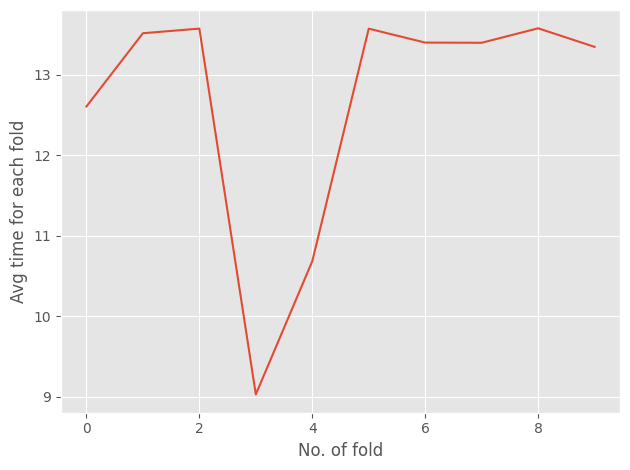

In [53]:
import matplotlib.pyplot as plt

plt.plot(times_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf times")
plt.show()

In [54]:
import gc
gc.collect()

3230

In [55]:
from sklearn.metrics import accuracy_score
acc_scores_rdf = []
for i in range(len(y_test_all)):
    acc_scores_rdf.append(accuracy_score(y_test_all[i],scores_rdf[i]))

In [56]:
acc_scores_rdf

[0.5165562913907285,
 0.48344370860927155,
 0.4602649006622517,
 0.5165562913907285,
 0.5,
 0.5298013245033113,
 0.48013245033112584,
 0.4768211920529801,
 0.5165562913907285,
 0.4867549668874172]

In [57]:
df_acc = pd.DataFrame([acc_scores_rdf])

df_acc.to_csv('rdf_accuracy', index=False)

df_acc = pd.read_csv('rdf_accuracy')

acc_scores_rdf = df_acc.iloc[0].values

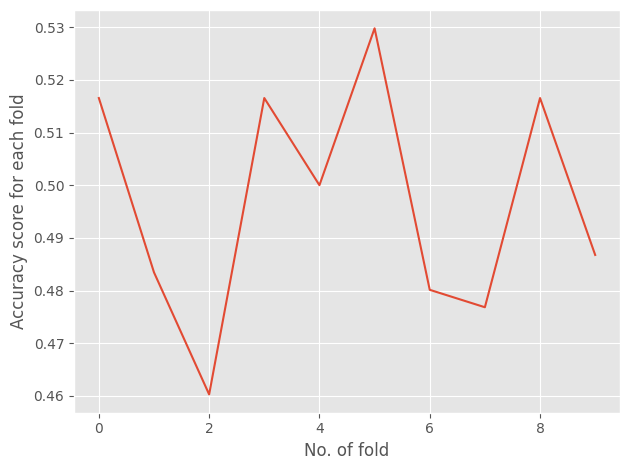

In [58]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf accuracy")
plt.show()
plt.show()

In [59]:
scores_rdf_n = np.array(scores_rdf)
y_test_all_n = np.array(y_test_all)

scores_rdf_n = scores_rdf_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [60]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_rdf_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 49.67%


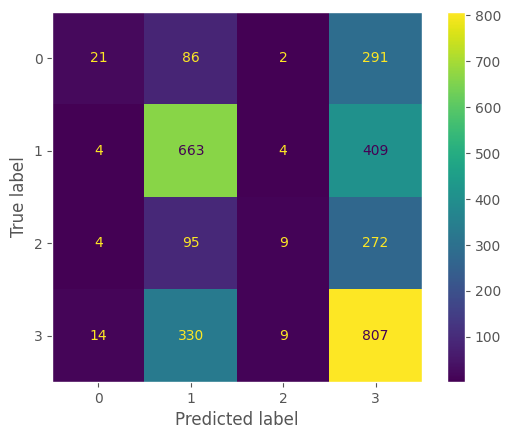

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_rdf_n, labels=rdf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rdf.classes_)
disp.plot()
plt.grid(False)
plt.savefig("RDF")
plt.show()

In [62]:
import gc
gc.collect()

6554

In [63]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_rdf_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.49      0.05      0.09       400
           1       0.56      0.61      0.59      1080
           2       0.38      0.02      0.04       380
           3       0.45      0.70      0.55      1160

    accuracy                           0.50      3020
   macro avg       0.47      0.35      0.32      3020
weighted avg       0.49      0.50      0.44      3020



In [64]:
# parameters_rdf = [
#               {'n_estimators': [10,50,100,150,250,500,750,1000,1500,2000],
#               'max_depth': [1,10,50,100,150,250,500,750,1000,1500,2000]}
#              ]

In [65]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [66]:
# grid_search = GridSearchCV(rdf, param_grid = parameters_rdf, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [67]:
# grid_search.fit(X_train,y_train)

In [68]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# KNN

In [69]:
import gc
gc.collect()

0

In [70]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_knn = []
times_knn = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    knn = KNeighborsClassifier()
    
    start_time = time.time()
    
    knn.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = knn.predict(X_test)
    scores_knn.append(x)
    times_knn.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [71]:
times_knn

[0.00500035285949707,
 0.015651941299438477,
 0.015625953674316406,
 0.0060002803802490234,
 0.0,
 0.0,
 0.0,
 0.004999876022338867,
 0.015656709671020508,
 0.015809059143066406]

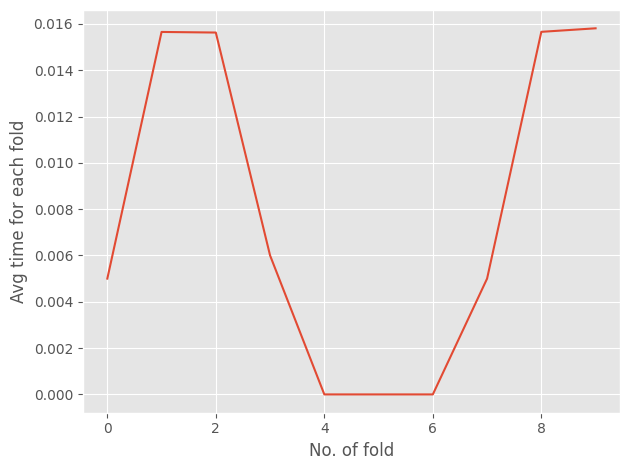

In [72]:
import matplotlib.pyplot as plt

plt.plot(times_knn)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn times")
plt.show()

In [73]:
from sklearn.metrics import accuracy_score
acc_scores_knn = []
for i in range(len(y_test_all)):
    acc_scores_knn.append(accuracy_score(y_test_all[i],scores_knn[i]))

In [74]:
acc_scores_knn

[0.40397350993377484,
 0.4470198675496689,
 0.46688741721854304,
 0.4205298013245033,
 0.45364238410596025,
 0.4304635761589404,
 0.4271523178807947,
 0.4271523178807947,
 0.4470198675496689,
 0.4370860927152318]

In [75]:
df_acc = pd.DataFrame([acc_scores_knn])

df_acc.to_csv('knn_accuracy', index=False)

df_acc = pd.read_csv('knn_accuracy')

acc_scores_knn = df_acc.iloc[0].values

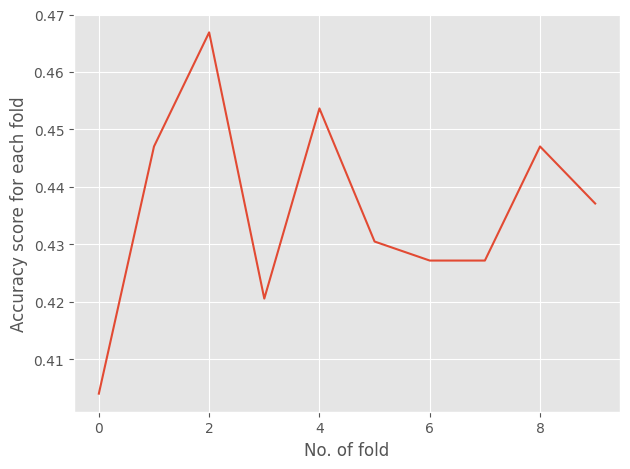

In [76]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_knn)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn accuracy")
plt.show()
plt.show()

In [77]:
import gc
gc.collect()

3444

In [78]:
scores_knn_n = np.array(scores_knn)
y_test_all_n = np.array(y_test_all)

scores_knn_n = scores_knn_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [79]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_knn_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 43.61%


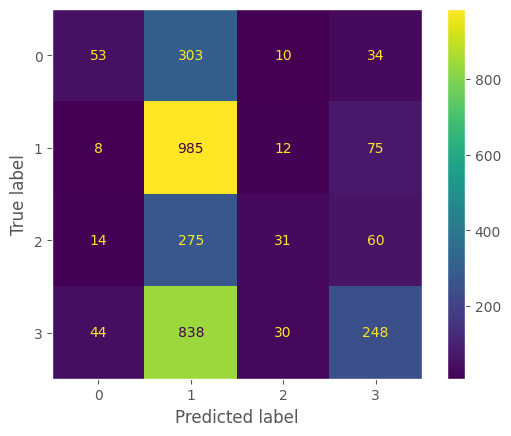

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_knn_n, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.savefig("KNN")
plt.show()

In [81]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_knn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.45      0.13      0.20       400
           1       0.41      0.91      0.57      1080
           2       0.37      0.08      0.13       380
           3       0.59      0.21      0.31      1160

    accuracy                           0.44      3020
   macro avg       0.46      0.33      0.30      3020
weighted avg       0.48      0.44      0.37      3020



In [82]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [83]:
# parameters_knn = [{'n_neighbors':[3,5,7,9,11,13,15,17,19,21],'weights': ['uniform', 'distance'],'leaf_size':[30,50,70,90,100]}]

In [84]:
# grid_search_knn = GridSearchCV(knn, param_grid = parameters_knn, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [85]:
# grid_search_knn.fit(X_train,y_train)

In [86]:
# print("Best hyperparameters: ", grid_search_knn.best_params_)
# print("Best score: ", grid_search_knn.best_score_)

In [87]:
# knn_2 = KNeighborsClassifier(n_neighbors=5,weights='distance',leaf_size=30)
# knn_2.fit(X_train,y_train)

# Naive Bayes

In [88]:
import gc
gc.collect()

6416

In [89]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nb = []
times_nb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    nb = GaussianNB()
    
    start_time = time.time()
    
    nb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = nb.predict(X_test)
    scores_nb.append(x)
    times_nb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [90]:
times_nb

[0.033649444580078125,
 0.047044992446899414,
 0.036705732345581055,
 0.031204700469970703,
 0.03982114791870117,
 0.03125762939453125,
 0.05754899978637695,
 0.03125405311584473,
 0.03132224082946777,
 0.03125596046447754]

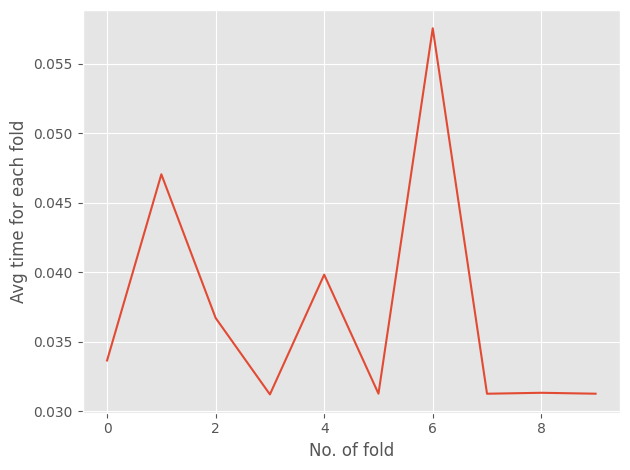

In [91]:
import matplotlib.pyplot as plt

plt.plot(times_nb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb times")
plt.show()

In [92]:
import gc
gc.collect()

3351

In [93]:
from sklearn.metrics import accuracy_score
acc_scores_nb = []
for i in range(len(y_test_all)):
    acc_scores_nb.append(accuracy_score(y_test_all[i],scores_nb[i]))

In [94]:
acc_scores_nb

[0.4139072847682119,
 0.4105960264900662,
 0.3576158940397351,
 0.3576158940397351,
 0.45695364238410596,
 0.4304635761589404,
 0.40728476821192056,
 0.3675496688741722,
 0.3841059602649007,
 0.4139072847682119]

In [95]:
df_acc = pd.DataFrame([acc_scores_nb])

df_acc.to_csv('nb_accuracy', index=False)

df_acc = pd.read_csv('nb_accuracy')

acc_scores_nb = df_acc.iloc[0].values

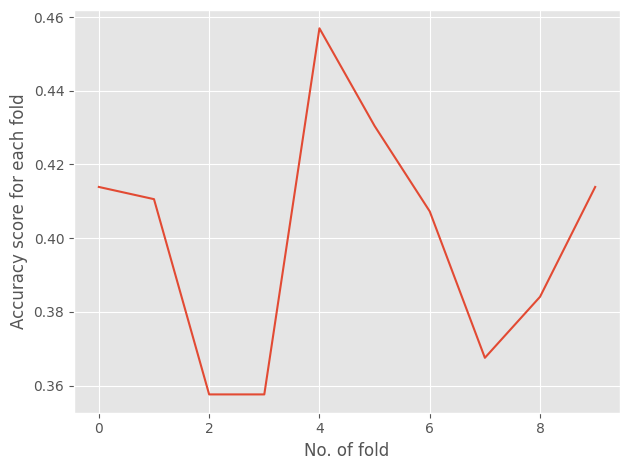

In [96]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_nb)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb accuracy")
plt.show()

In [97]:
scores_nb_n = np.array(scores_nb)
y_test_all_n = np.array(y_test_all)

scores_nb_n = scores_nb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [98]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_nb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 40.00%


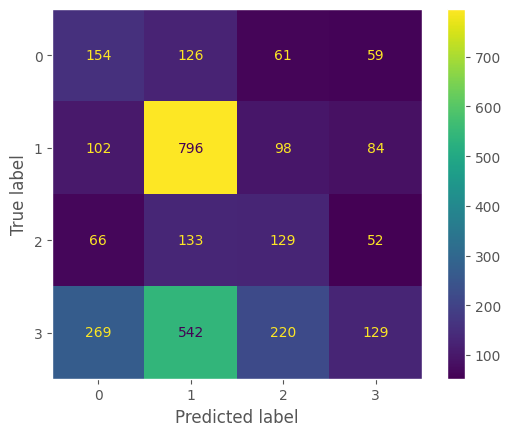

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_nb_n, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("NB")
plt.show()

In [100]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_nb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.26      0.39      0.31       400
           1       0.50      0.74      0.59      1080
           2       0.25      0.34      0.29       380
           3       0.40      0.11      0.17      1160

    accuracy                           0.40      3020
   macro avg       0.35      0.39      0.34      3020
weighted avg       0.40      0.40      0.36      3020



In [101]:
import gc
gc.collect()

6064

In [102]:
# parameters_nb = {'var_smoothing': [1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16,1e-17,1e-18,1e-19,1e-20,1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2]}

In [103]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [104]:
# grid_search_nb = GridSearchCV(nb, param_grid = parameters_nb, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [105]:
# grid_search_nb.fit(X_train,y_train)

In [106]:
# print("Best hyperparameters: ", grid_search_nb.best_params_)
# print("Best score: ", grid_search_nb.best_score_)

In [107]:
# nb_2 = GaussianNB(var_smoothing=1e-10)
# nb_2.fit(X_train,y_train)

In [108]:
# times_svm_n = np.array(times_svm)
# times_svm_n = times_svm_n/60.0

# times_dtc_n = np.array(times_dtc)
# times_dtc_n = times_dtc_n/60.0

# times_rdf_n = np.array(times_rdf)
# times_rdf_n = times_rdf_n/60.0

# times_knn_n = np.array(times_knn)
# times_knn_n = times_knn_n/60.0

# times_nb_n = np.array(times_nb)
# times_nb_n = times_svm_n/60.0

# Fusion (CNN+SVM)

In [109]:
import gc
gc.collect()

0

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization

In [111]:
# X,y = load_data(DATA_PATH)

In [112]:
X.shape

(3020, 259, 6)

In [113]:
# ''''''
# from keras.layers import Activation
# from keras.backend import sigmoid
# def swish(x):
#     return x * sigmoid(x)
# ''''''

In [114]:
# ''''
# from keras.utils import get_custom_objects
# get_custom_objects().update({'swish':Activation(swish)})
# ''''

In [115]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_cnn_svm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_cnn_svm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [116]:
def create_model_cnn_svm():
    
    model_cnn_svm = keras.Sequential([

        keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (X.shape[1],X.shape[2],1)),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(32,(3,3),activation ='relu'),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dropout(0.5),


        keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01),activation='softmax')

    ])
    return model_cnn_svm

In [117]:
import gc
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cnn_svm = []
y_test_all_cnn_svm = []
train_acc_cnn_svm = []
test_acc_cnn_svm = []
train_loss_cnn_svm = []
test_loss_cnn_svm = []


for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_cnn_svm.append(y_test)
    
    model_cnn_svm = None
    model_cnn_svm = create_model_cnn_svm()
    
    X_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    optimiser =tf.keras.optimizers.Adam(learning_rate=0.001)
    
    model_cnn_svm.compile(optimizer = optimiser, loss = tf.keras.losses.squared_hinge, metrics = ['accuracy'])
    
    history = model_cnn_svm.fit(X_train, y_train,validation_data=(x_valid,y_valid),batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    x = model_cnn_svm.predict(X_test)
    
    scores_cnn_svm.append(x)
    train_acc_cnn_svm.append(history.history["accuracy"])
    test_acc_cnn_svm.append(history.history["val_accuracy"])
    train_loss_cnn_svm.append(history.history["loss"])
    test_loss_cnn_svm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 3s 8ms/step - loss: 0.7629 - accuracy: 0.2375 - val_loss: 0.4751 - val_accuracy: 0.0993 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 0s 5ms/step - loss: 0.6465 - accuracy: 0.3050 - val_loss: 0.4380 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 0s 4ms/step - loss: 0.5955 - accuracy: 0.1901 - val_loss: 0.4312 - val_accuracy: 0.0993 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 0s 5ms/step - loss: 0.5492 - accuracy: 0.1631 - val_loss: 0.4252 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 0s 4ms/step - loss: 0.4825 - accuracy: 0.1611 - val_loss: 0.4196 - val_accuracy: 0.0993 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 0s 4ms/step - loss: 0.4328 - accuracy: 0.1341 - val_loss: 0.4148 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 7/100
77/77 [==============================] 

Epoch 30/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3957 - accuracy: 0.1296 - val_loss: 0.3857 - val_accuracy: 0.3566 - lr: 8.0000e-06
Epoch 31/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3957 - accuracy: 0.3577 - val_loss: 0.3856 - val_accuracy: 0.3566 - lr: 8.0000e-06
Epoch 32/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3957 - accuracy: 0.1795 - val_loss: 0.3856 - val_accuracy: 0.0993 - lr: 8.0000e-06
Epoch 33/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3956 - accuracy: 0.1296 - val_loss: 0.3856 - val_accuracy: 0.0993 - lr: 8.0000e-06
Epoch 34/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3956 - accuracy: 0.1288 - val_loss: 0.3856 - val_accuracy: 0.0993 - lr: 8.0000e-06
Epoch 35/100
76/77 [============================>.] - ETA: 0s - loss: 0.3951 - accuracy: 0.2233
Epoch 35: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 35: 0.36 s

77/77 [==============================] - 0s 5ms/step - loss: 0.3955 - accuracy: 0.3581 - val_loss: 0.3855 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 87/100
77/77 [==============================] - 0s 6ms/step - loss: 0.3955 - accuracy: 0.3573 - val_loss: 0.3855 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 88/100
77/77 [==============================] - 0s 6ms/step - loss: 0.3955 - accuracy: 0.3569 - val_loss: 0.3855 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 89/100
77/77 [==============================] - 0s 6ms/step - loss: 0.3955 - accuracy: 0.3573 - val_loss: 0.3855 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 90/100
77/77 [==============================] - 0s 6ms/step - loss: 0.3955 - accuracy: 0.3565 - val_loss: 0.3855 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 91/100
74/77 [===========================>..] - ETA: 0s - loss: 0.3941 - accuracy: 0.3581
Epoch 91: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 91: 0.44 seconds
77/77 [

Epoch 15/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3975 - accuracy: 0.2747 - val_loss: 0.3879 - val_accuracy: 0.3456 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3970 - accuracy: 0.3491 - val_loss: 0.3875 - val_accuracy: 0.3456 - lr: 2.0000e-04
Epoch 17/100
77/77 [==============================] - 0s 6ms/step - loss: 0.3965 - accuracy: 0.2412 - val_loss: 0.3870 - val_accuracy: 0.3456 - lr: 2.0000e-04
Epoch 18/100
73/77 [===========================>..] - ETA: 0s - loss: 0.3955 - accuracy: 0.1661
Epoch 18: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 18: 0.38 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3961 - accuracy: 0.1643 - val_loss: 0.3866 - val_accuracy: 0.1324 - lr: 2.0000e-04
Epoch 19/100
77/77 [==============================] - 0s 6ms/step - loss: 0.3958 - accuracy: 0.1251 - val_loss: 0.3865 - val_accuracy: 0.1324 - lr: 4.0000e-05
Epoch 

77/77 [==============================] - 0s 5ms/step - loss: 0.3950 - accuracy: 0.1255 - val_loss: 0.3857 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3949 - accuracy: 0.1255 - val_loss: 0.3857 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 73/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3949 - accuracy: 0.1263 - val_loss: 0.3857 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 74/100
77/77 [==============================] - ETA: 0s - loss: 0.3949 - accuracy: 0.1271
Epoch 74: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 74: 0.36 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3949 - accuracy: 0.1271 - val_loss: 0.3857 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 75/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3949 - accuracy: 0.1255 - val_loss: 0.3857 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 76/100
77/77 

Epoch 28/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3906 - accuracy: 0.1721 - val_loss: 0.3869 - val_accuracy: 0.3566 - lr: 4.0000e-05
Epoch 29/100
67/77 [=========================>....] - ETA: 0s - loss: 0.3891 - accuracy: 0.3591
Epoch 29: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 29: 0.35 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3905 - accuracy: 0.3573 - val_loss: 0.3869 - val_accuracy: 0.3750 - lr: 4.0000e-05
Epoch 30/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3905 - accuracy: 0.3545 - val_loss: 0.3869 - val_accuracy: 0.3750 - lr: 8.0000e-06
Epoch 31/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3905 - accuracy: 0.3540 - val_loss: 0.3869 - val_accuracy: 0.3750 - lr: 8.0000e-06
Epoch 32/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3905 - accuracy: 0.3540 - val_loss: 0.3869 - val_accuracy: 0.3750 - lr: 8.0000e-06
Epoch 3

77/77 [==============================] - 0s 5ms/step - loss: 0.3905 - accuracy: 0.3880 - val_loss: 0.3868 - val_accuracy: 0.3566 - lr: 1.0240e-10
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 0.3903 - accuracy: 0.3861
Epoch 85: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 85: 0.35 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3905 - accuracy: 0.3863 - val_loss: 0.3868 - val_accuracy: 0.3566 - lr: 1.0240e-10
Epoch 86/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3905 - accuracy: 0.3876 - val_loss: 0.3868 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 87/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3905 - accuracy: 0.3872 - val_loss: 0.3868 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 88/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3905 - accuracy: 0.3863 - val_loss: 0.3868 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 89/100
77/77 

Epoch 13/100
76/77 [============================>.] - ETA: 0s - loss: 0.4013 - accuracy: 0.3581
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 13: 0.35 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.4006 - accuracy: 0.3561 - val_loss: 0.3976 - val_accuracy: 0.1029 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3994 - accuracy: 0.1271 - val_loss: 0.3972 - val_accuracy: 0.1029 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3989 - accuracy: 0.1284 - val_loss: 0.3968 - val_accuracy: 0.1029 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3985 - accuracy: 0.1284 - val_loss: 0.3964 - val_accuracy: 0.1029 - lr: 2.0000e-04
Epoch 17/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3980 - accuracy: 0.1284 - val_loss: 0.3960 - val_accuracy: 0.1029 - lr: 2.0000e-04
Epoch 18/1

65/77 [========================>.....] - ETA: 0s - loss: 0.3934 - accuracy: 0.1303
Epoch 69: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 69: 0.34 seconds
77/77 [==============================] - 0s 4ms/step - loss: 0.3957 - accuracy: 0.1312 - val_loss: 0.3939 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 70/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3957 - accuracy: 0.1316 - val_loss: 0.3939 - val_accuracy: 0.1397 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3957 - accuracy: 0.1316 - val_loss: 0.3939 - val_accuracy: 0.1397 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3957 - accuracy: 0.1316 - val_loss: 0.3939 - val_accuracy: 0.1397 - lr: 5.1200e-10
Epoch 73/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3957 - accuracy: 0.1308 - val_loss: 0.3939 - val_accuracy: 0.1397 - lr: 5.1200e-10
Epoch 74/100
77/77 [==

Epoch 26/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3930 - accuracy: 0.1296 - val_loss: 0.4372 - val_accuracy: 0.0846 - lr: 4.0000e-05
Epoch 27/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3928 - accuracy: 0.2118 - val_loss: 0.4371 - val_accuracy: 0.3750 - lr: 4.0000e-05
Epoch 28/100
69/77 [=========================>....] - ETA: 0s - loss: 0.3923 - accuracy: 0.3872
Epoch 28: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 28: 0.33 seconds
77/77 [==============================] - 0s 4ms/step - loss: 0.3927 - accuracy: 0.3859 - val_loss: 0.4369 - val_accuracy: 0.3750 - lr: 4.0000e-05
Epoch 29/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3926 - accuracy: 0.3855 - val_loss: 0.4369 - val_accuracy: 0.3750 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3925 - accuracy: 0.3847 - val_loss: 0.4369 - val_accuracy: 0.3750 - lr: 8.0000e-06
Epoch 3

77/77 [==============================] - 0s 4ms/step - loss: 0.3922 - accuracy: 0.3565 - val_loss: 0.4366 - val_accuracy: 0.3566 - lr: 1.0240e-10
Epoch 83/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3922 - accuracy: 0.3553 - val_loss: 0.4366 - val_accuracy: 0.3566 - lr: 1.0240e-10
Epoch 84/100
77/77 [==============================] - ETA: 0s - loss: 0.3922 - accuracy: 0.3573
Epoch 84: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 84: 0.36 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3922 - accuracy: 0.3573 - val_loss: 0.4366 - val_accuracy: 0.3566 - lr: 1.0240e-10
Epoch 85/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3922 - accuracy: 0.3581 - val_loss: 0.4366 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3922 - accuracy: 0.3577 - val_loss: 0.4366 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 87/100
77/77 

77/77 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.1333 - val_loss: 0.3955 - val_accuracy: 0.1324 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.1333 - val_loss: 0.3955 - val_accuracy: 0.1324 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.1337 - val_loss: 0.3955 - val_accuracy: 0.1324 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.1321 - val_loss: 0.3955 - val_accuracy: 0.1324 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.1312 - val_loss: 0.3955 - val_accuracy: 0.1324 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.1333 - val_loss: 0.3955 - val_accuracy: 0.1324 - lr: 3.2000e-07
Epoch 44/100
65/77 [========================>.....] - ETA: 

77/77 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.1337 - val_loss: 0.3955 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3976 - accuracy: 0.1329 - val_loss: 0.3955 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.1337 - val_loss: 0.3955 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.1341 - val_loss: 0.3955 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.1329 - val_loss: 0.3955 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3976 - accuracy: 0.1325 - val_loss: 0.3955 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 100/100
65/77 [========================>.....] - ETA:

Epoch 23/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3928 - accuracy: 0.1218 - val_loss: 0.4055 - val_accuracy: 0.1654 - lr: 4.0000e-05
Epoch 24/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3928 - accuracy: 0.2392 - val_loss: 0.4054 - val_accuracy: 0.3382 - lr: 4.0000e-05
Epoch 25/100
77/77 [==============================] - ETA: 0s - loss: 0.3926 - accuracy: 0.3581
Epoch 25: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 25: 0.35 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3926 - accuracy: 0.3581 - val_loss: 0.4053 - val_accuracy: 0.3382 - lr: 4.0000e-05
Epoch 26/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3926 - accuracy: 0.3594 - val_loss: 0.4052 - val_accuracy: 0.3382 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3926 - accuracy: 0.3594 - val_loss: 0.4052 - val_accuracy: 0.3382 - lr: 8.0000e-06
Epoch 2

77/77 [==============================] - 0s 4ms/step - loss: 0.3924 - accuracy: 0.1329 - val_loss: 0.4051 - val_accuracy: 0.1471 - lr: 1.0240e-10
Epoch 80/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.1321 - val_loss: 0.4051 - val_accuracy: 0.1471 - lr: 1.0240e-10
Epoch 81/100
77/77 [==============================] - ETA: 0s - loss: 0.3923 - accuracy: 0.1321
Epoch 81: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 81: 0.36 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3923 - accuracy: 0.1321 - val_loss: 0.4051 - val_accuracy: 0.1471 - lr: 1.0240e-10
Epoch 82/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3924 - accuracy: 0.1308 - val_loss: 0.4051 - val_accuracy: 0.1471 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3924 - accuracy: 0.1312 - val_loss: 0.4051 - val_accuracy: 0.1471 - lr: 2.0480e-11
Epoch 84/100
77/77 

Epoch 8/100
77/77 [==============================] - 0s 4ms/step - loss: 0.4063 - accuracy: 0.1284 - val_loss: 0.4316 - val_accuracy: 0.1066 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - ETA: 0s - loss: 0.4027 - accuracy: 0.3504
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 9: 0.36 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.4027 - accuracy: 0.3504 - val_loss: 0.4284 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 0s 4ms/step - loss: 0.4007 - accuracy: 0.3524 - val_loss: 0.4278 - val_accuracy: 0.4007 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 0s 4ms/step - loss: 0.4002 - accuracy: 0.1402 - val_loss: 0.4272 - val_accuracy: 0.1397 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3994 - accuracy: 0.2277 - val_loss: 0.4266 - val_accuracy: 0.3529 - lr: 2.0000e-04
Epoch 13/100
77/77

77/77 [==============================] - 0s 4ms/step - loss: 0.3953 - accuracy: 0.3868 - val_loss: 0.4228 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 65/100
75/77 [============================>.] - ETA: 0s - loss: 0.3954 - accuracy: 0.3875
Epoch 65: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 65: 0.37 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3953 - accuracy: 0.3863 - val_loss: 0.4228 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 66/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3953 - accuracy: 0.3876 - val_loss: 0.4228 - val_accuracy: 0.3529 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3953 - accuracy: 0.3876 - val_loss: 0.4228 - val_accuracy: 0.3529 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3953 - accuracy: 0.3876 - val_loss: 0.4228 - val_accuracy: 0.3529 - lr: 5.1200e-10
Epoch 69/100
77/77 [==

Epoch 21/100
70/77 [==========================>...] - ETA: 0s - loss: 0.3852 - accuracy: 0.3469
Epoch 21: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 21: 0.33 seconds
77/77 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.3508 - val_loss: 0.4465 - val_accuracy: 0.4081 - lr: 2.0000e-04
Epoch 22/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3858 - accuracy: 0.3516 - val_loss: 0.4465 - val_accuracy: 0.4081 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3858 - accuracy: 0.3516 - val_loss: 0.4464 - val_accuracy: 0.4081 - lr: 4.0000e-05
Epoch 24/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3857 - accuracy: 0.3516 - val_loss: 0.4464 - val_accuracy: 0.4081 - lr: 4.0000e-05
Epoch 25/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3857 - accuracy: 0.3733 - val_loss: 0.4464 - val_accuracy: 0.2941 - lr: 4.0000e-05
Epoch 

66/77 [========================>.....] - ETA: 0s - loss: 0.3842 - accuracy: 0.4034
Epoch 77: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 77: 0.34 seconds
77/77 [==============================] - 0s 4ms/step - loss: 0.3854 - accuracy: 0.3949 - val_loss: 0.4461 - val_accuracy: 0.2941 - lr: 5.1200e-10
Epoch 78/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3854 - accuracy: 0.3949 - val_loss: 0.4461 - val_accuracy: 0.2941 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3854 - accuracy: 0.3945 - val_loss: 0.4461 - val_accuracy: 0.2941 - lr: 1.0240e-10
Epoch 80/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3854 - accuracy: 0.3941 - val_loss: 0.4461 - val_accuracy: 0.2941 - lr: 1.0240e-10
Epoch 81/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3854 - accuracy: 0.3945 - val_loss: 0.4461 - val_accuracy: 0.2941 - lr: 1.0240e-10
Epoch 82/100
77/77 

Epoch 34/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.1357 - val_loss: 0.3749 - val_accuracy: 0.1066 - lr: 8.0000e-06
Epoch 35/100
71/77 [==========================>...] - ETA: 0s - loss: 0.3926 - accuracy: 0.1725
Epoch 35: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 35: 0.39 seconds
77/77 [==============================] - 0s 5ms/step - loss: 0.3923 - accuracy: 0.1864 - val_loss: 0.3749 - val_accuracy: 0.3934 - lr: 8.0000e-06
Epoch 36/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.3843 - val_loss: 0.3749 - val_accuracy: 0.3934 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.3839 - val_loss: 0.3749 - val_accuracy: 0.3934 - lr: 1.6000e-06
Epoch 38/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.3847 - val_loss: 0.3749 - val_accuracy: 0.3934 - lr: 1.6000e-06
Epoch 

77/77 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.3835 - val_loss: 0.3749 - val_accuracy: 0.3934 - lr: 2.0480e-11
Epoch 91/100
65/77 [========================>.....] - ETA: 0s - loss: 0.3934 - accuracy: 0.3808
Epoch 91: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 91: 0.34 seconds
77/77 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.3823 - val_loss: 0.3749 - val_accuracy: 0.3934 - lr: 2.0480e-11
Epoch 92/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.3831 - val_loss: 0.3749 - val_accuracy: 0.3934 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.3831 - val_loss: 0.3749 - val_accuracy: 0.3934 - lr: 4.0960e-12
Epoch 94/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.3831 - val_loss: 0.3749 - val_accuracy: 0.3934 - lr: 4.0960e-12
Epoch 95/100
77/77 [

In [118]:
import gc
gc.collect()

0

In [119]:
np.array(y_test_all_cnn_svm).shape

(10, 302)

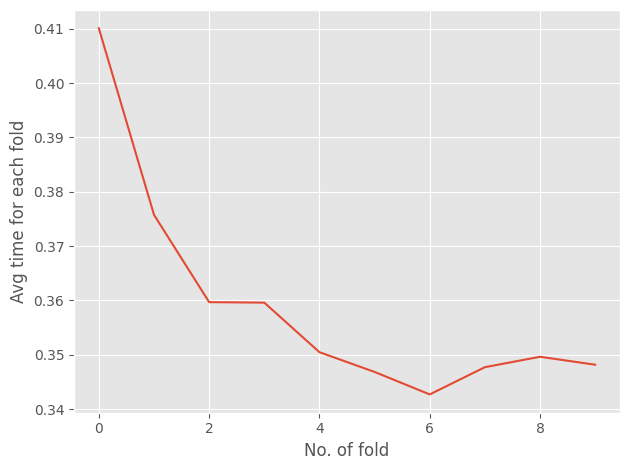

In [120]:
import matplotlib.pyplot as plt

times_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(times_cnn_svm):
    times_cnn_svm_n[i, :len(row)] = row

times_cnn_svm_n_n = np.mean(times_cnn_svm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_cnn_svm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cnn_svm times")
plt.show()

In [121]:
train_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_cnn_svm):
    train_acc_cnn_svm_n[i, :len(row)] = row
    
test_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_cnn_svm):
    test_acc_cnn_svm_n[i, :len(row)] = row
    
train_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_cnn_svm):
    train_loss_cnn_svm_n[i, :len(row)] = row
    
test_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_cnn_svm):
    test_loss_cnn_svm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_cnn_svm_n = np.mean(train_acc_cnn_svm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_cnn_svm_n = np.mean(test_acc_cnn_svm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_cnn_svm_n = np.mean(train_loss_cnn_svm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_cnn_svm_n = np.mean(test_loss_cnn_svm_n,axis=0)

In [122]:
train_acc_cnn_svm_n.shape

(100,)

In [123]:
train_acc_cnn_svm_n.shape

(100,)

In [124]:
data = [train_acc_cnn_svm_n,test_acc_cnn_svm_n,train_loss_cnn_svm_n,test_loss_cnn_svm_n]

df = pd.DataFrame(data)
df.to_csv('cnn_svm_acc', index=False)
df = pd.read_csv('cnn_svm_acc')

train_acc_cnn_svm_n = df.iloc[0]
test_acc_cnn_svm_n = df.iloc[1]
train_loss_cnn_svm_n = df.iloc[2]
test_loss_cnn_svm_n = df.iloc[3]


df_t = pd.DataFrame([times_cnn_svm_n_n])
df_t.to_csv('cnn_svm_times', index=False)
df_t = pd.read_csv('cnn_svm_times')

times_cnn_svm_n_n = df_t.iloc[0]

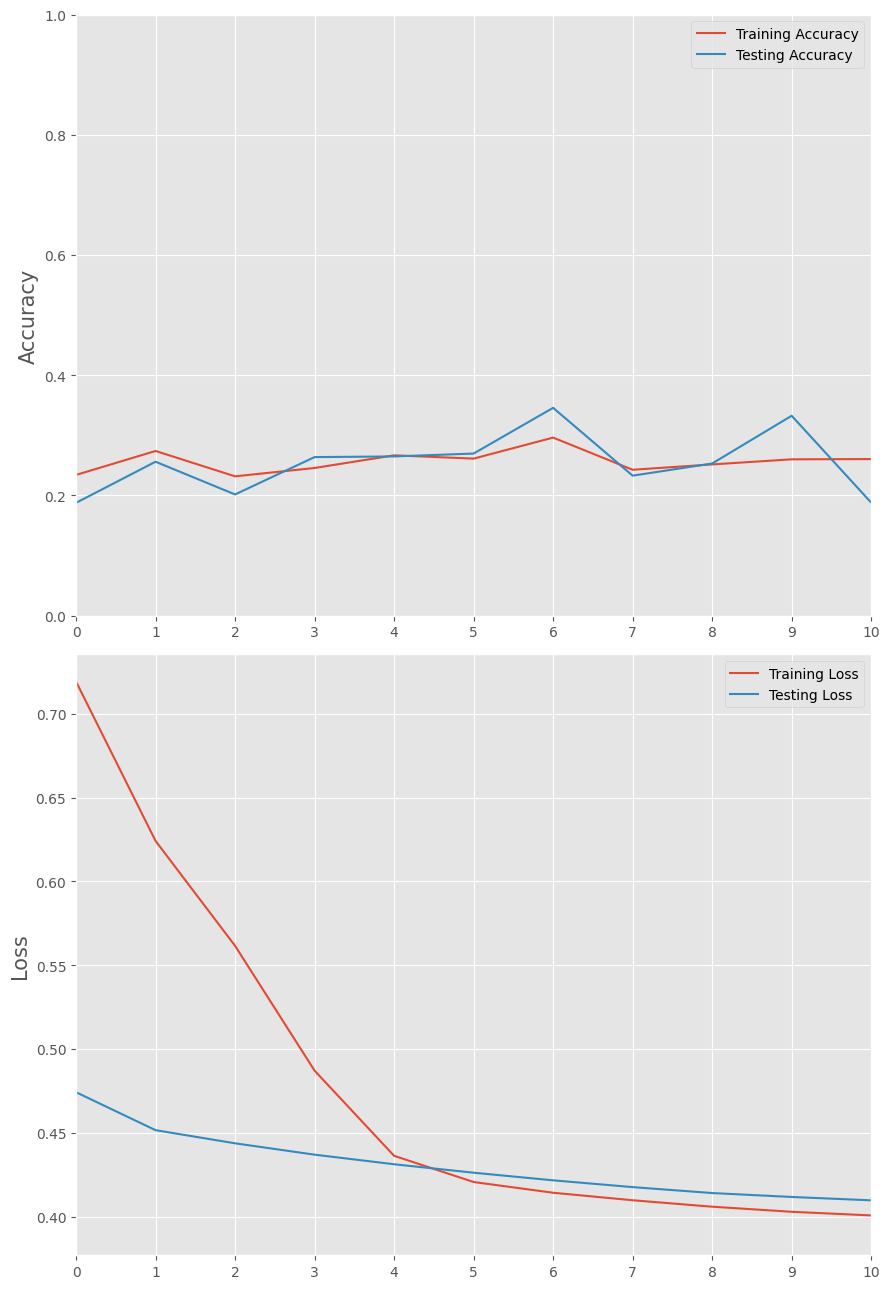

In [125]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))
plt.style.use('ggplot')

axs[0].plot(train_acc_cnn_svm_n, label='Training Accuracy')
axs[0].plot(test_acc_cnn_svm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_cnn_svm_n, label='Training Loss')
axs[1].plot(test_loss_cnn_svm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("CNN + SVM Training and Testing Loss")
plt.show()

In [126]:
np.array(scores_cnn_svm).shape

(10, 302, 4)

In [127]:
np.array(y_test_all_cnn_svm).shape

(10, 302)

In [128]:
y_pred_cnn_svm = np.argmax(scores_cnn_svm,axis=2)

In [129]:
y_pred_cnn_svm.shape

(10, 302)

In [130]:
from sklearn.metrics import accuracy_score
acc_scores_cnn_svm = []
for i in range(len(y_test_all_cnn_svm)):
    acc_scores_cnn_svm.append(accuracy_score(y_true = y_test_all_cnn_svm[i],y_pred = y_pred_cnn_svm[i]))

In [131]:
import gc
gc.collect()

50

In [132]:
acc_scores_cnn_svm

[0.3576158940397351,
 0.12582781456953643,
 0.3841059602649007,
 0.13245033112582782,
 0.3576158940397351,
 0.13245033112582782,
 0.13245033112582782,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007]

In [133]:
df_acc = pd.DataFrame([acc_scores_cnn_svm])

df_acc.to_csv('cnn_svm_accuracy', index=False)

df_acc = pd.read_csv('cnn_svm_accuracy')

acc_scores_cnn_svm = df_acc.iloc[0].values

In [134]:
y_test_all_n = np.array(y_test_all_cnn_svm)

y_pred_cnn_svm_n = y_pred_cnn_svm.flatten()
y_test_all_n = y_test_all_n.flatten()

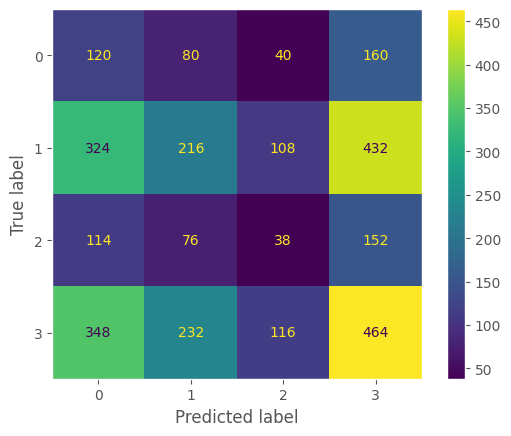

In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_cnn_svm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("CNN + SVM")
plt.show()

In [136]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_cnn_svm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.30      0.18       400
           1       0.36      0.20      0.26      1080
           2       0.13      0.10      0.11       380
           3       0.38      0.40      0.39      1160

    accuracy                           0.28      3020
   macro avg       0.25      0.25      0.24      3020
weighted avg       0.31      0.28      0.28      3020



## CNN + SVM (hyper-para-tuning)

In [137]:
# ''''
# conv_1_filter: 48
# conv_1_kernel: 3
# conv_2_filter: 64
# conv_2_kernel: 5
# dense_1_units: 32
# lr: 0.0012043751090852965

# ''''

In [138]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from keras.wrappers.scikit_learn import KerasClassifier

In [139]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [140]:
# X,y = load_data(DATA_PATH)

In [141]:
# X = X / 255.0

In [142]:
# X.shape

In [143]:
# ''''
# def create():
    
#     model_cnn = Sequential()
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X.shape[1],X.shape[2],1))),
#     model.add(MaxPooling2D(pool_size=pool_size ,strides=(1,1),padding ='same')),
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')),
#     model.add(MaxPooling2D(pool_size=pool_size,strides=(1,1),padding ='same')),
#     model.add(Flatten()),
#     model.add(Dense(128, activation='relu')),
#     model.add(Dropout(0.5)),
#     model.add(Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')),
#     model.compile(optimizer=optimizer, loss='squared_hinge', metrics=['accuracy'])
    
#     return model_cnn

# ''''

In [144]:
# def build_model(hp):
#     model = keras.Sequential([
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
#         kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
#         activation='relu',
#         input_shape=(259,13,1)
#     ),
    
#     keras.layers.MaxPooling2D(
#         pool_size = (2, 2),
#         strides=(1,1),
#         padding ='same'
#     ),
        
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
#         kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
#         activation='relu'
#     ),
        
#     keras.layers.MaxPooling2D(
#         pool_size = (2,2),
#         strides=(1,1),
#         padding ='same'
#     ),
    
#     keras.layers.Flatten(),
#     keras.layers.Dense(
#         units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
#         activation='relu'
#     ),
#     keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')
#   ])
  
#     learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#               loss='squared_hinge',
#               metrics=['accuracy'])
  
#     return model

In [145]:
# from keras_tuner import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters

In [146]:
# tuner_search=RandomSearch(build_model,
#                           objective='accuracy',
#                           overwrite=True,
#                           max_trials=10,directory='cnn')

In [147]:
# tuner_search.search(X,y,epochs=2,validation_split=0.2)

In [148]:
# tuner_search.results_summary()

In [149]:
# models = tuner_search.get_best_models(num_models=2)

# best_model = models[0]

# best_model.build(input_shape=(259,13,1))

# best_model.summary()

In [150]:
# def display_cv_results(search_results):
#     print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))    
    
# # create model
# model = KerasClassifier(build_fn=create_cnn_model, verbose=1)
# # define parameters and values for grid search 
# param_grid = {
#     'filters': [16, 32, 64],
#     'kernel_size': [(3, 3), (5, 5)],
#     'pool_size': [(2, 2), (3, 3)],
#     'activation': ['relu', 'sigmoid'],
#     'optimizer': ['adam', 'SGD'],
#     'batch_size': [16, 32, 64],
# }
# grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=cv)
# grid_result = grid.fit(X, y)  # fit the full dataset as we are using cross validation 

# # print out results
# print('time for grid search = {:.0f} sec'.format(time()-start))
# display_cv_results(grid_result)

# XGboost

In [151]:
import gc
gc.collect()

6318

In [152]:
import gc
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xg = []
times_xg = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    xg = XGBClassifier()
    
    start_time = time.time()
    
    xg.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = xg.predict(X_test)
    scores_xg.append(x)
    times_xg.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [153]:
times_xg

[17.471352100372314,
 20.637595176696777,
 20.41347622871399,
 20.276108980178833,
 20.269333839416504,
 20.833631992340088,
 20.751866817474365,
 20.333479642868042,
 20.724481344223022,
 20.735872745513916]

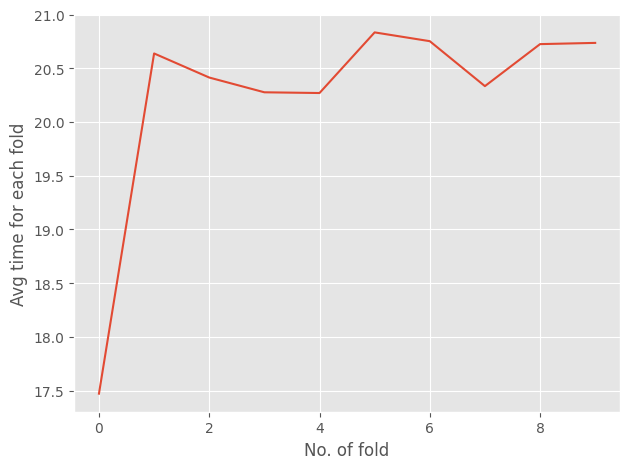

In [154]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(times_xg)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xg times")
plt.show()

In [155]:
import gc
gc.collect()

3579

In [156]:
from sklearn.metrics import accuracy_score
acc_scores_xg = []
for i in range(len(y_test_all)):
    acc_scores_xg.append(accuracy_score(y_test_all[i],scores_xg[i]))

In [157]:
acc_scores_xg

[0.4900662251655629,
 0.5198675496688742,
 0.4867549668874172,
 0.49337748344370863,
 0.4966887417218543,
 0.4900662251655629,
 0.5033112582781457,
 0.4900662251655629,
 0.5596026490066225,
 0.5132450331125827]

In [158]:
df_acc = pd.DataFrame([acc_scores_xg])

df_acc.to_csv('xg_accuracy', index=False)

df_acc = pd.read_csv('xg_accuracy')

acc_scores_xg = df_acc.iloc[0].values

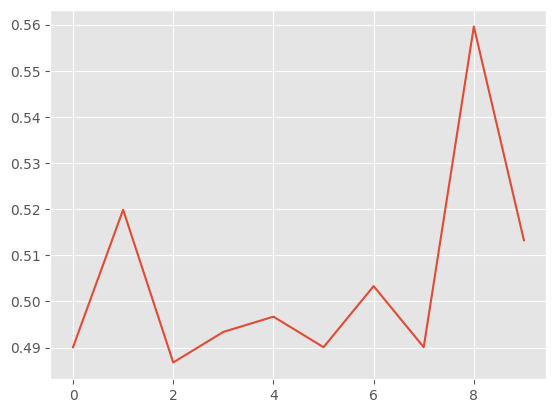

In [159]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_xg)
plt.style.use('ggplot')
plt.savefig("XG boost Acc figures")
plt.show()

In [160]:
scores_xg_n = np.array(scores_xg)
y_test_all_n = np.array(y_test_all)

scores_xg_n = scores_xg_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [161]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_xg_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.43%


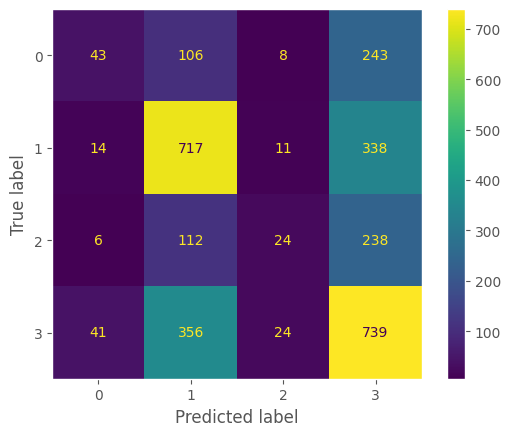

In [162]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_xg_n, labels=xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xg.classes_)
disp.plot()
plt.grid(False)
plt.savefig("XG Boost")

plt.show()

In [163]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_xg_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.41      0.11      0.17       400
           1       0.56      0.66      0.60      1080
           2       0.36      0.06      0.11       380
           3       0.47      0.64      0.54      1160

    accuracy                           0.50      3020
   macro avg       0.45      0.37      0.36      3020
weighted avg       0.48      0.50      0.46      3020



# Catboost

In [164]:
import gc
gc.collect()

6544

In [165]:
import gc
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cb = []
times_cb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.10)
    
    cb = CatBoostClassifier(iterations=100)
    
    start_time = time.time()
    
    cb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = cb.predict(X_test)
    scores_cb.append(x)
    times_cb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Learning rate set to 0.5
0:	learn: 1.2724015	total: 343ms	remaining: 33.9s
1:	learn: 1.2098947	total: 477ms	remaining: 23.4s
2:	learn: 1.1790033	total: 613ms	remaining: 19.8s
3:	learn: 1.1470207	total: 764ms	remaining: 18.3s
4:	learn: 1.1187356	total: 948ms	remaining: 18s
5:	learn: 1.0986195	total: 1.11s	remaining: 17.4s
6:	learn: 1.0783948	total: 1.29s	remaining: 17.2s
7:	learn: 1.0526193	total: 1.47s	remaining: 16.9s
8:	learn: 1.0392248	total: 1.65s	remaining: 16.7s
9:	learn: 1.0182311	total: 1.81s	remaining: 16.3s
10:	learn: 0.9940644	total: 2.01s	remaining: 16.2s
11:	learn: 0.9782630	total: 2.17s	remaining: 15.9s
12:	learn: 0.9618828	total: 2.36s	remaining: 15.8s
13:	learn: 0.9465014	total: 2.52s	remaining: 15.5s
14:	learn: 0.9317273	total: 2.71s	remaining: 15.4s
15:	learn: 0.9137149	total: 2.88s	remaining: 15.1s
16:	learn: 0.8972840	total: 3.07s	remaining: 15s
17:	learn: 0.8879907	total: 3.23s	remaining: 14.7s
18:	learn: 0.8691056	total: 3.42s	remaining: 1

60:	learn: 0.3764636	total: 10.9s	remaining: 6.95s
61:	learn: 0.3719470	total: 11s	remaining: 6.77s
62:	learn: 0.3669611	total: 11.2s	remaining: 6.59s
63:	learn: 0.3596653	total: 11.4s	remaining: 6.41s
64:	learn: 0.3534018	total: 11.6s	remaining: 6.24s
65:	learn: 0.3467408	total: 11.8s	remaining: 6.06s
66:	learn: 0.3413589	total: 11.9s	remaining: 5.88s
67:	learn: 0.3358759	total: 12.1s	remaining: 5.7s
68:	learn: 0.3321520	total: 12.3s	remaining: 5.53s
69:	learn: 0.3234498	total: 12.5s	remaining: 5.34s
70:	learn: 0.3198205	total: 12.7s	remaining: 5.17s
71:	learn: 0.3153899	total: 12.8s	remaining: 4.99s
72:	learn: 0.3098856	total: 13s	remaining: 4.82s
73:	learn: 0.3023053	total: 13.2s	remaining: 4.63s
74:	learn: 0.2978044	total: 13.4s	remaining: 4.46s
75:	learn: 0.2937168	total: 13.6s	remaining: 4.28s
76:	learn: 0.2887356	total: 13.7s	remaining: 4.1s
77:	learn: 0.2811710	total: 13.9s	remaining: 3.92s
78:	learn: 0.2786794	total: 14.1s	remaining: 3.75s
79:	learn: 0.2725065	total: 14.3s	rem

22:	learn: 0.8101942	total: 4.14s	remaining: 13.9s
23:	learn: 0.7978866	total: 4.31s	remaining: 13.7s
24:	learn: 0.7827355	total: 4.49s	remaining: 13.5s
25:	learn: 0.7591249	total: 4.69s	remaining: 13.4s
26:	learn: 0.7416751	total: 4.88s	remaining: 13.2s
27:	learn: 0.7275462	total: 5.06s	remaining: 13s
28:	learn: 0.7061036	total: 5.23s	remaining: 12.8s
29:	learn: 0.6931975	total: 5.41s	remaining: 12.6s
30:	learn: 0.6831178	total: 5.57s	remaining: 12.4s
31:	learn: 0.6753661	total: 5.75s	remaining: 12.2s
32:	learn: 0.6597248	total: 5.92s	remaining: 12s
33:	learn: 0.6460103	total: 6.09s	remaining: 11.8s
34:	learn: 0.6346704	total: 6.26s	remaining: 11.6s
35:	learn: 0.6231260	total: 6.43s	remaining: 11.4s
36:	learn: 0.6084132	total: 6.61s	remaining: 11.2s
37:	learn: 0.5978887	total: 6.79s	remaining: 11.1s
38:	learn: 0.5838329	total: 6.95s	remaining: 10.9s
39:	learn: 0.5708270	total: 7.13s	remaining: 10.7s
40:	learn: 0.5580249	total: 7.3s	remaining: 10.5s
41:	learn: 0.5489194	total: 7.48s	re

84:	learn: 0.2406695	total: 14.9s	remaining: 2.63s
85:	learn: 0.2384709	total: 15.1s	remaining: 2.46s
86:	learn: 0.2356540	total: 15.3s	remaining: 2.28s
87:	learn: 0.2316471	total: 15.5s	remaining: 2.11s
88:	learn: 0.2282098	total: 15.6s	remaining: 1.93s
89:	learn: 0.2262930	total: 15.8s	remaining: 1.75s
90:	learn: 0.2231706	total: 16s	remaining: 1.58s
91:	learn: 0.2197083	total: 16.2s	remaining: 1.41s
92:	learn: 0.2178482	total: 16.4s	remaining: 1.23s
93:	learn: 0.2143029	total: 16.5s	remaining: 1.05s
94:	learn: 0.2112252	total: 16.7s	remaining: 879ms
95:	learn: 0.2086272	total: 16.9s	remaining: 704ms
96:	learn: 0.2043132	total: 17.1s	remaining: 528ms
97:	learn: 0.2008366	total: 17.2s	remaining: 352ms
98:	learn: 0.1976048	total: 17.4s	remaining: 176ms
99:	learn: 0.1948548	total: 17.6s	remaining: 0us
Training on fold 6/10...
Learning rate set to 0.5
0:	learn: 1.2782284	total: 187ms	remaining: 18.5s
1:	learn: 1.2221519	total: 361ms	remaining: 17.7s
2:	learn: 1.1882816	total: 527ms	remai

44:	learn: 0.5100802	total: 7.84s	remaining: 9.59s
45:	learn: 0.5006418	total: 8.01s	remaining: 9.41s
46:	learn: 0.4891880	total: 8.2s	remaining: 9.24s
47:	learn: 0.4813473	total: 8.38s	remaining: 9.08s
48:	learn: 0.4724855	total: 8.57s	remaining: 8.92s
49:	learn: 0.4634437	total: 8.76s	remaining: 8.76s
50:	learn: 0.4551457	total: 8.93s	remaining: 8.58s
51:	learn: 0.4489278	total: 9.1s	remaining: 8.4s
52:	learn: 0.4418267	total: 9.29s	remaining: 8.23s
53:	learn: 0.4312706	total: 9.46s	remaining: 8.05s
54:	learn: 0.4261550	total: 9.64s	remaining: 7.89s
55:	learn: 0.4185011	total: 9.8s	remaining: 7.7s
56:	learn: 0.4110509	total: 10s	remaining: 7.54s
57:	learn: 0.4059483	total: 10.2s	remaining: 7.36s
58:	learn: 0.3994723	total: 10.3s	remaining: 7.18s
59:	learn: 0.3924827	total: 10.5s	remaining: 7.02s
60:	learn: 0.3861144	total: 10.7s	remaining: 6.84s
61:	learn: 0.3797852	total: 10.9s	remaining: 6.68s
62:	learn: 0.3703539	total: 11.1s	remaining: 6.51s
63:	learn: 0.3665311	total: 11.2s	rema

5:	learn: 1.1032474	total: 1.01s	remaining: 15.8s
6:	learn: 1.0744682	total: 1.18s	remaining: 15.6s
7:	learn: 1.0536123	total: 1.35s	remaining: 15.6s
8:	learn: 1.0327012	total: 1.52s	remaining: 15.4s
9:	learn: 1.0114876	total: 1.71s	remaining: 15.3s
10:	learn: 0.9916508	total: 1.87s	remaining: 15.1s
11:	learn: 0.9731025	total: 2.05s	remaining: 15s
12:	learn: 0.9559810	total: 2.23s	remaining: 14.9s
13:	learn: 0.9389252	total: 2.4s	remaining: 14.8s
14:	learn: 0.9236800	total: 2.58s	remaining: 14.6s
15:	learn: 0.9038184	total: 2.76s	remaining: 14.5s
16:	learn: 0.8861090	total: 2.93s	remaining: 14.3s
17:	learn: 0.8672461	total: 3.11s	remaining: 14.2s
18:	learn: 0.8486018	total: 3.28s	remaining: 14s
19:	learn: 0.8283429	total: 3.46s	remaining: 13.8s
20:	learn: 0.8112344	total: 3.65s	remaining: 13.7s
21:	learn: 0.7952233	total: 3.85s	remaining: 13.6s
22:	learn: 0.7806885	total: 4.02s	remaining: 13.5s
23:	learn: 0.7679135	total: 4.2s	remaining: 13.3s
24:	learn: 0.7448106	total: 4.37s	remainin

67:	learn: 0.3315951	total: 11.8s	remaining: 5.53s
68:	learn: 0.3248191	total: 11.9s	remaining: 5.36s
69:	learn: 0.3196393	total: 12.1s	remaining: 5.19s
70:	learn: 0.3140995	total: 12.3s	remaining: 5.01s
71:	learn: 0.3075051	total: 12.4s	remaining: 4.84s
72:	learn: 0.3017877	total: 12.6s	remaining: 4.66s
73:	learn: 0.2979702	total: 12.8s	remaining: 4.49s
74:	learn: 0.2931110	total: 13s	remaining: 4.32s
75:	learn: 0.2884433	total: 13.1s	remaining: 4.14s
76:	learn: 0.2824915	total: 13.3s	remaining: 3.97s
77:	learn: 0.2788762	total: 13.5s	remaining: 3.8s
78:	learn: 0.2755959	total: 13.6s	remaining: 3.63s
79:	learn: 0.2705460	total: 13.8s	remaining: 3.46s
80:	learn: 0.2682779	total: 14s	remaining: 3.28s
81:	learn: 0.2656192	total: 14.2s	remaining: 3.11s
82:	learn: 0.2596868	total: 14.3s	remaining: 2.94s
83:	learn: 0.2533515	total: 14.5s	remaining: 2.76s
84:	learn: 0.2502838	total: 14.7s	remaining: 2.59s
85:	learn: 0.2452688	total: 14.9s	remaining: 2.42s
86:	learn: 0.2424300	total: 15s	rema

In [166]:
times_cb

[18.72945737838745,
 18.589266300201416,
 18.518701314926147,
 18.393839836120605,
 18.37798023223877,
 18.363118410110474,
 18.418837547302246,
 18.459362506866455,
 18.504580974578857,
 18.523926258087158]

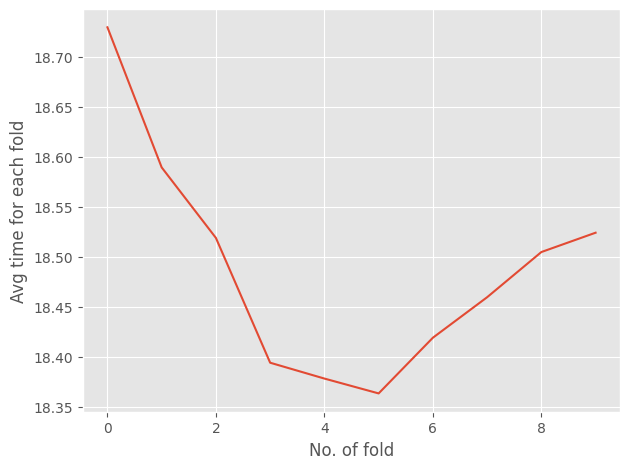

In [167]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(times_cb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cb times")
plt.show()

In [168]:
from sklearn.metrics import accuracy_score
acc_scores_cb = []
for i in range(len(y_test_all)):
    acc_scores_cb.append(accuracy_score(y_test_all[i],scores_cb[i]))

In [169]:
acc_scores_cb

[0.4370860927152318,
 0.4735099337748344,
 0.45695364238410596,
 0.5331125827814569,
 0.4768211920529801,
 0.45364238410596025,
 0.45364238410596025,
 0.49337748344370863,
 0.48013245033112584,
 0.4900662251655629]

In [170]:
df_acc = pd.DataFrame([acc_scores_cb])

df_acc.to_csv('cb_accuracy', index=False)

df_acc = pd.read_csv('cb_accuracy')

acc_scores_cb = df_acc.iloc[0].values

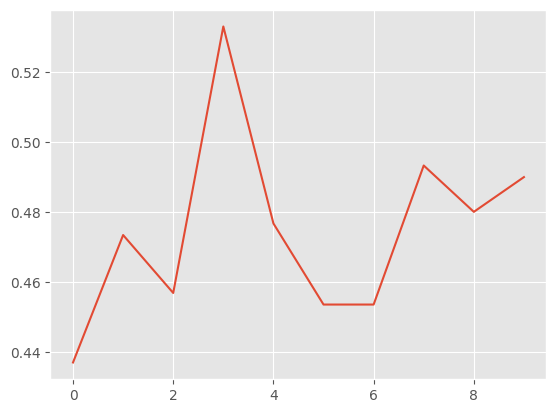

In [171]:
# import seaborn as sns
# sns.histplot(data=acc_scores,bins=20, kde=True)
import matplotlib.pyplot as plt
plt.plot(acc_scores_cb)
plt.style.use('ggplot')
plt.savefig("Catboost acc scores")
plt.show()

In [172]:
scores_cb_n = np.array(scores_cb)
y_test_all_n = np.array(y_test_all)

scores_cb_n = scores_cb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [173]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_cb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 47.48%


In [174]:
import gc
gc.collect()

3226

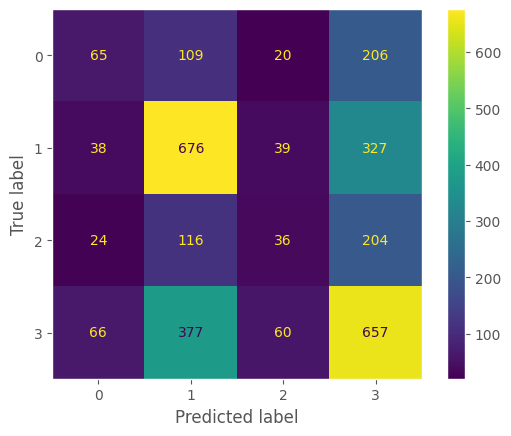

In [175]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_cb_n, labels=cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("Catboost")

plt.show()

In [176]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_cb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.34      0.16      0.22       400
           1       0.53      0.63      0.57      1080
           2       0.23      0.09      0.13       380
           3       0.47      0.57      0.51      1160

    accuracy                           0.47      3020
   macro avg       0.39      0.36      0.36      3020
weighted avg       0.44      0.47      0.45      3020



In [177]:
times_svm_n = [i/60 for i in times_svm]
times_dtc_n = [i/60 for i in times_dtc]
times_rdf_n = [i/60 for i in times_rdf]
times_knn_n = [i/60 for i in times_knn]
times_nb_n = [i/60 for i in times_nb]
times_xg_n = [i/60 for i in times_xg]
times_cb_n = [i/60 for i in times_cb]

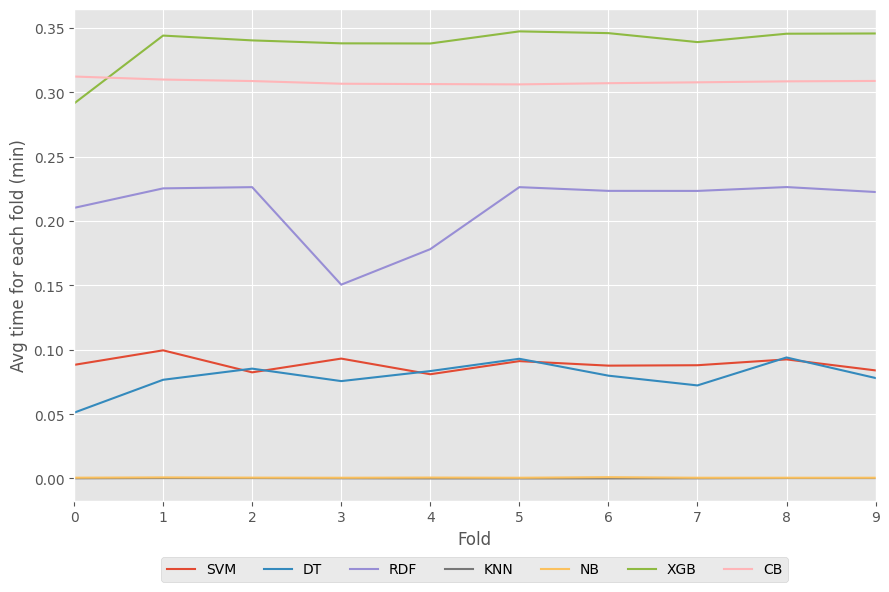

In [178]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(times_svm_n,label='SVM')
plt.plot(times_dtc_n,label='DT')
plt.plot(times_rdf_n,label='RDF')
plt.plot(times_knn_n,label='KNN')
plt.plot(times_nb_n,label='NB')
plt.plot(times_xg_n,label='XGB')
plt.plot(times_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Avg time for each fold (min)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=7)
plt.xlim([0,9])
plt.tight_layout()
plt.savefig("Machine Learning Melspec Times")
plt.show()

In [179]:
acc_scores_svm_n = [i*100 for i in acc_scores_svm]
acc_scores_dtc_n = [i*100 for i in acc_scores_dtc]
acc_scores_rdf_n = [i*100 for i in acc_scores_rdf]
acc_scores_knn_n = [i*100 for i in acc_scores_knn]
acc_scores_nb_n = [i*100 for i in acc_scores_nb]
acc_scores_xg_n = [i*100 for i in acc_scores_xg]
acc_scores_cb_n = [i*100 for i in acc_scores_cb]

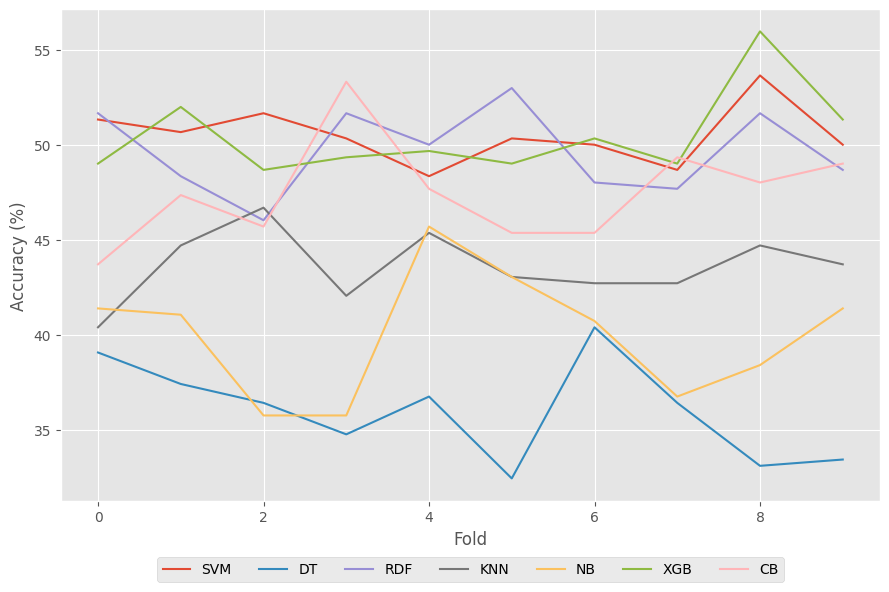

In [180]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(acc_scores_svm_n,label='SVM')
plt.plot(acc_scores_dtc_n,label='DT')
plt.plot(acc_scores_rdf_n,label='RDF')
plt.plot(acc_scores_knn_n,label='KNN')
plt.plot(acc_scores_nb_n,label='NB')
plt.plot(acc_scores_xg_n,label='XGB')
plt.plot(acc_scores_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),ncol=7)
plt.tight_layout()
plt.savefig("Machine Learning Melspec Accuracy")
plt.show()

# LSTM

In [181]:
import gc
gc.collect()

16107

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [184]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_lstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_lstm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=17, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 10, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [185]:
def create_model_lstm():
    
    model_lstm = keras.Sequential([

        keras.layers.LSTM(256,activation='tanh',input_shape=(X.shape[1],X.shape[2]),return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(128,activation='tanh',return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(64,activation='tanh'),
        keras.layers.Dropout(0.25),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_lstm

In [186]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_lstm = []
y_test_all_lstm = []
train_acc_lstm = []
test_acc_lstm = []
train_loss_lstm = []
test_loss_lstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_lstm.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_lstm = None
    model_lstm = create_model_lstm()
        
    model_lstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_lstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_lstm.predict(X_test)
    
    scores_lstm.append(x)
    train_acc_lstm.append(history.history["accuracy"])
    test_acc_lstm.append(history.history["val_accuracy"])
    train_loss_lstm.append(history.history["loss"])
    test_loss_lstm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 8s 67ms/step - loss: 1.2756 - accuracy: 0.3908 - val_loss: 1.2722 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 53ms/step - loss: 1.2455 - accuracy: 0.4113 - val_loss: 1.2937 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 59ms/step - loss: 1.2447 - accuracy: 0.4207 - val_loss: 1.3013 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 59ms/step - loss: 1.2531 - accuracy: 0.4191 - val_loss: 1.2414 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2535 - accuracy: 0.4289 - val_loss: 1.3453 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2703 - accuracy: 0.3884 - val_loss: 1.3050 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 30/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2659 - accuracy: 0.3814 - val_loss: 1.2948 - val_accuracy: 0.3529 - lr: 4.0000e-05
Epoch 31/100
77/77 [==============================] - 4s 50ms/step - loss: 1.2628 - accuracy: 0.3872 - val_loss: 1.2949 - val_accuracy: 0.3529 - lr: 4.0000e-05
Epoch 32/100
77/77 [==============================] - 4s 49ms/step - loss: 1.2628 - accuracy: 0.3847 - val_loss: 1.2949 - val_accuracy: 0.3529 - lr: 4.0000e-05
Epoch 33/100
77/77 [==============================] - 4s 50ms/step - loss: 1.2632 - accuracy: 0.3872 - val_loss: 1.2950 - val_accuracy: 0.3529 - lr: 4.0000e-05
Epoch 34/100
76/77 [============================>.] - ETA: 0s - loss: 1.2644 - accuracy: 0.3857
Epoch 34: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 34: 3.95 seconds
77/77 [==============================] - 4s 51ms/step - loss: 1.2644 - accuracy: 0.3847 - val_loss: 1.2949 - val_accuracy: 0.3529 - lr: 4.0000e-05
Ep

Epoch 59/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2611 - accuracy: 0.3831 - val_loss: 1.2950 - val_accuracy: 0.3529 - lr: 3.2000e-07
Epoch 60/100
77/77 [==============================] - 4s 53ms/step - loss: 1.2668 - accuracy: 0.3778 - val_loss: 1.2950 - val_accuracy: 0.3529 - lr: 3.2000e-07
Epoch 61/100
77/77 [==============================] - 4s 53ms/step - loss: 1.2639 - accuracy: 0.3818 - val_loss: 1.2950 - val_accuracy: 0.3529 - lr: 3.2000e-07
Epoch 62/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2642 - accuracy: 0.3774 - val_loss: 1.2950 - val_accuracy: 0.3529 - lr: 3.2000e-07
Epoch 63/100
77/77 [==============================] - 4s 52ms/step - loss: 1.2606 - accuracy: 0.3908 - val_loss: 1.2950 - val_accuracy: 0.3529 - lr: 3.2000e-07
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.2623 - accuracy: 0.3818
Epoch 64: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 64: 4.

Epoch 88/100
77/77 [==============================] - 5s 59ms/step - loss: 1.2627 - accuracy: 0.3913 - val_loss: 1.2951 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 89/100
77/77 [==============================] - 4s 52ms/step - loss: 1.2616 - accuracy: 0.3904 - val_loss: 1.2951 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 90/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2606 - accuracy: 0.3831 - val_loss: 1.2951 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 91/100
77/77 [==============================] - 5s 59ms/step - loss: 1.2584 - accuracy: 0.3778 - val_loss: 1.2951 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 92/100
77/77 [==============================] - 4s 58ms/step - loss: 1.2635 - accuracy: 0.3843 - val_loss: 1.2951 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 93/100
77/77 [==============================] - 4s 53ms/step - loss: 1.2617 - accuracy: 0.3765 - val_loss: 1.2951 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 94/100
76/77 [====================

Epoch 17/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2673 - accuracy: 0.3753 - val_loss: 1.2640 - val_accuracy: 0.3713 - lr: 2.0000e-04
Epoch 18/100
77/77 [==============================] - 4s 51ms/step - loss: 1.2674 - accuracy: 0.3872 - val_loss: 1.2642 - val_accuracy: 0.3713 - lr: 2.0000e-04
Epoch 19/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2687 - accuracy: 0.3900 - val_loss: 1.2642 - val_accuracy: 0.3713 - lr: 2.0000e-04
Epoch 20/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2649 - accuracy: 0.3839 - val_loss: 1.2639 - val_accuracy: 0.3713 - lr: 2.0000e-04
Epoch 21/100
76/77 [============================>.] - ETA: 0s - loss: 1.2683 - accuracy: 0.3738
Epoch 21: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 21: 4.42 seconds
77/77 [==============================] - 4s 58ms/step - loss: 1.2683 - accuracy: 0.3733 - val_loss: 1.2643 - val_accuracy: 0.3713 - lr: 2.0000e-04
E

Epoch 46/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2655 - accuracy: 0.3851 - val_loss: 1.2641 - val_accuracy: 0.3713 - lr: 1.6000e-06
Epoch 47/100
77/77 [==============================] - 4s 52ms/step - loss: 1.2668 - accuracy: 0.3827 - val_loss: 1.2641 - val_accuracy: 0.3713 - lr: 1.6000e-06
Epoch 48/100
77/77 [==============================] - 4s 52ms/step - loss: 1.2664 - accuracy: 0.3863 - val_loss: 1.2641 - val_accuracy: 0.3713 - lr: 1.6000e-06
Epoch 49/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2666 - accuracy: 0.3876 - val_loss: 1.2641 - val_accuracy: 0.3713 - lr: 1.6000e-06
Epoch 50/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2656 - accuracy: 0.3851 - val_loss: 1.2641 - val_accuracy: 0.3713 - lr: 1.6000e-06
Epoch 51/100
77/77 [==============================] - ETA: 0s - loss: 1.2666 - accuracy: 0.3851
Epoch 51: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 51: 4.

Epoch 75/100
77/77 [==============================] - 4s 58ms/step - loss: 1.2701 - accuracy: 0.3831 - val_loss: 1.2641 - val_accuracy: 0.3713 - lr: 1.2800e-08
Epoch 76/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2651 - accuracy: 0.3765 - val_loss: 1.2641 - val_accuracy: 0.3713 - lr: 1.2800e-08
Epoch 77/100
77/77 [==============================] - 4s 51ms/step - loss: 1.2649 - accuracy: 0.3831 - val_loss: 1.2641 - val_accuracy: 0.3713 - lr: 1.2800e-08
Epoch 78/100
77/77 [==============================] - 4s 58ms/step - loss: 1.2647 - accuracy: 0.3900 - val_loss: 1.2641 - val_accuracy: 0.3713 - lr: 1.2800e-08
Epoch 79/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2637 - accuracy: 0.3831 - val_loss: 1.2641 - val_accuracy: 0.3713 - lr: 1.2800e-08
Epoch 80/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2649 - accuracy: 0.3806 - val_loss: 1.2641 - val_accuracy: 0.3713 - lr: 1.2800e-08
Epoch 81/100
77/77 [====================

Epoch 4/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2406 - accuracy: 0.4272 - val_loss: 1.2719 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2383 - accuracy: 0.4460 - val_loss: 1.3073 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2283 - accuracy: 0.4428 - val_loss: 1.2686 - val_accuracy: 0.4632 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2198 - accuracy: 0.4538 - val_loss: 1.2878 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 5s 59ms/step - loss: 1.2064 - accuracy: 0.4673 - val_loss: 1.2836 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2138 - accuracy: 0.4534 - val_loss: 1.2642 - val_accuracy: 0.4265 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 4s 53ms/step - l

Epoch 33/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2610 - accuracy: 0.3868 - val_loss: 1.2968 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 34/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2595 - accuracy: 0.3913 - val_loss: 1.2969 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 35/100
77/77 [==============================] - 4s 58ms/step - loss: 1.2610 - accuracy: 0.3888 - val_loss: 1.2966 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.2578 - accuracy: 0.3908
Epoch 36: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 36: 4.76 seconds
77/77 [==============================] - 5s 62ms/step - loss: 1.2578 - accuracy: 0.3908 - val_loss: 1.2965 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 37/100
77/77 [==============================] - 6s 72ms/step - loss: 1.2626 - accuracy: 0.3900 - val_loss: 1.2966 - val_accuracy: 0.3713 - lr: 8.0000e-06
Ep

Epoch 62/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2622 - accuracy: 0.3855 - val_loss: 1.2968 - val_accuracy: 0.3713 - lr: 3.2000e-07
Epoch 63/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2607 - accuracy: 0.3724 - val_loss: 1.2968 - val_accuracy: 0.3713 - lr: 3.2000e-07
Epoch 64/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2622 - accuracy: 0.3839 - val_loss: 1.2968 - val_accuracy: 0.3713 - lr: 3.2000e-07
Epoch 65/100
77/77 [==============================] - 4s 58ms/step - loss: 1.2607 - accuracy: 0.3896 - val_loss: 1.2968 - val_accuracy: 0.3713 - lr: 3.2000e-07
Epoch 66/100
76/77 [============================>.] - ETA: 0s - loss: 1.2597 - accuracy: 0.3919
Epoch 66: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 66: 4.40 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.2590 - accuracy: 0.3937 - val_loss: 1.2968 - val_accuracy: 0.3713 - lr: 3.2000e-07
Ep

Epoch 91/100
77/77 [==============================] - 5s 62ms/step - loss: 1.2609 - accuracy: 0.3921 - val_loss: 1.2968 - val_accuracy: 0.3713 - lr: 2.5600e-09
Epoch 92/100
77/77 [==============================] - 5s 67ms/step - loss: 1.2622 - accuracy: 0.3925 - val_loss: 1.2968 - val_accuracy: 0.3713 - lr: 2.5600e-09
Epoch 93/100
77/77 [==============================] - 5s 63ms/step - loss: 1.2585 - accuracy: 0.3896 - val_loss: 1.2968 - val_accuracy: 0.3713 - lr: 2.5600e-09
Epoch 94/100
77/77 [==============================] - 4s 53ms/step - loss: 1.2590 - accuracy: 0.3843 - val_loss: 1.2968 - val_accuracy: 0.3713 - lr: 2.5600e-09
Epoch 95/100
77/77 [==============================] - 4s 58ms/step - loss: 1.2585 - accuracy: 0.3933 - val_loss: 1.2968 - val_accuracy: 0.3713 - lr: 2.5600e-09
Epoch 96/100
76/77 [============================>.] - ETA: 0s - loss: 1.2599 - accuracy: 0.4030
Epoch 96: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 96: 4.40

77/77 [==============================] - 5s 61ms/step - loss: 1.2279 - accuracy: 0.4419 - val_loss: 1.1810 - val_accuracy: 0.4779 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 5s 67ms/step - loss: 1.2181 - accuracy: 0.4530 - val_loss: 1.1714 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 4s 53ms/step - loss: 1.2081 - accuracy: 0.4620 - val_loss: 1.1488 - val_accuracy: 0.5074 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2101 - accuracy: 0.4534 - val_loss: 1.1456 - val_accuracy: 0.4890 - lr: 0.0010
Epoch 24/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2297 - accuracy: 0.4268 - val_loss: 1.1698 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 25/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2301 - accuracy: 0.4244 - val_loss: 1.1591 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 26/100
76/77 [============================>.] - ETA: 0s - loss: 1.2097 

Epoch 78/100
77/77 [==============================] - 4s 57ms/step - loss: 1.1173 - accuracy: 0.4939 - val_loss: 1.1012 - val_accuracy: 0.5074 - lr: 1.6000e-06
Epoch 79/100
77/77 [==============================] - 4s 56ms/step - loss: 1.1140 - accuracy: 0.4975 - val_loss: 1.1008 - val_accuracy: 0.5074 - lr: 1.6000e-06
Epoch 80/100
77/77 [==============================] - 4s 51ms/step - loss: 1.1129 - accuracy: 0.5098 - val_loss: 1.1007 - val_accuracy: 0.5074 - lr: 1.6000e-06
Epoch 81/100
77/77 [==============================] - 4s 56ms/step - loss: 1.1170 - accuracy: 0.4992 - val_loss: 1.1008 - val_accuracy: 0.5074 - lr: 1.6000e-06
Epoch 82/100
77/77 [==============================] - 4s 57ms/step - loss: 1.1176 - accuracy: 0.4898 - val_loss: 1.1015 - val_accuracy: 0.5074 - lr: 1.6000e-06
Epoch 83/100
77/77 [==============================] - 4s 57ms/step - loss: 1.1148 - accuracy: 0.4988 - val_loss: 1.1014 - val_accuracy: 0.5074 - lr: 1.6000e-06
Epoch 84/100
77/77 [====================

Epoch 7/100
77/77 [==============================] - 5s 59ms/step - loss: 1.2603 - accuracy: 0.3765 - val_loss: 1.2977 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2609 - accuracy: 0.3753 - val_loss: 1.2951 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 5s 60ms/step - loss: 1.2610 - accuracy: 0.3737 - val_loss: 1.2954 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 4s 58ms/step - loss: 1.2554 - accuracy: 0.3810 - val_loss: 1.2945 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 5s 59ms/step - loss: 1.2598 - accuracy: 0.3778 - val_loss: 1.2999 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 4s 51ms/step - loss: 1.2569 - accuracy: 0.3855 - val_loss: 1.2942 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 4s 56ms/step 

Epoch 36/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2533 - accuracy: 0.3863 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 8.0000e-06
Epoch 37/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2547 - accuracy: 0.3892 - val_loss: 1.2960 - val_accuracy: 0.3787 - lr: 8.0000e-06
Epoch 38/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2542 - accuracy: 0.3913 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 8.0000e-06
Epoch 39/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2532 - accuracy: 0.3896 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 8.0000e-06
Epoch 40/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2562 - accuracy: 0.3880 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 8.0000e-06
Epoch 41/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2546 - accuracy: 0.3818 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 8.0000e-06
Epoch 42/100
77/77 [====================

Epoch 65/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2550 - accuracy: 0.3863 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 6.4000e-08
Epoch 66/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2560 - accuracy: 0.3868 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 6.4000e-08
Epoch 67/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2565 - accuracy: 0.3868 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 6.4000e-08
Epoch 68/100
77/77 [==============================] - 4s 53ms/step - loss: 1.2568 - accuracy: 0.3765 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 6.4000e-08
Epoch 69/100
77/77 [==============================] - 5s 58ms/step - loss: 1.2556 - accuracy: 0.3933 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 6.4000e-08
Epoch 70/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2587 - accuracy: 0.3769 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 6.4000e-08
Epoch 71/100
77/77 [====================

Epoch 94/100
76/77 [============================>.] - ETA: 0s - loss: 1.2544 - accuracy: 0.3750
Epoch 94: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 94: 4.28 seconds
77/77 [==============================] - 4s 56ms/step - loss: 1.2529 - accuracy: 0.3761 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 2.5600e-09
Epoch 95/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2560 - accuracy: 0.3835 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 5.1200e-10
Epoch 96/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2548 - accuracy: 0.3884 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 5.1200e-10
Epoch 97/100
77/77 [==============================] - 4s 53ms/step - loss: 1.2544 - accuracy: 0.3827 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 5.1200e-10
Epoch 98/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2544 - accuracy: 0.3827 - val_loss: 1.2961 - val_accuracy: 0.3787 - lr: 5.1200e-10
Epoc

Epoch 23/100
77/77 [==============================] - 4s 57ms/step - loss: 1.1299 - accuracy: 0.5000 - val_loss: 1.1604 - val_accuracy: 0.4669 - lr: 2.0000e-04
Epoch 24/100
77/77 [==============================] - 4s 55ms/step - loss: 1.1239 - accuracy: 0.4951 - val_loss: 1.1394 - val_accuracy: 0.4890 - lr: 2.0000e-04
Epoch 25/100
77/77 [==============================] - 4s 54ms/step - loss: 1.1283 - accuracy: 0.4996 - val_loss: 1.1654 - val_accuracy: 0.4706 - lr: 2.0000e-04
Epoch 26/100
77/77 [==============================] - 5s 60ms/step - loss: 1.1070 - accuracy: 0.5180 - val_loss: 1.1828 - val_accuracy: 0.4632 - lr: 2.0000e-04
Epoch 27/100
77/77 [==============================] - 4s 58ms/step - loss: 1.1463 - accuracy: 0.5041 - val_loss: 1.1672 - val_accuracy: 0.4522 - lr: 2.0000e-04
Epoch 28/100
77/77 [==============================] - 4s 57ms/step - loss: 1.1212 - accuracy: 0.5172 - val_loss: 1.1695 - val_accuracy: 0.4485 - lr: 2.0000e-04
Epoch 29/100
77/77 [====================

Epoch 52/100
77/77 [==============================] - 4s 54ms/step - loss: 1.0021 - accuracy: 0.5634 - val_loss: 1.1393 - val_accuracy: 0.4779 - lr: 8.0000e-06
Epoch 53/100
77/77 [==============================] - 4s 52ms/step - loss: 1.0048 - accuracy: 0.5658 - val_loss: 1.1401 - val_accuracy: 0.4669 - lr: 8.0000e-06
Epoch 54/100
76/77 [============================>.] - ETA: 0s - loss: 1.0021 - accuracy: 0.5691
Epoch 54: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 54: 4.29 seconds
77/77 [==============================] - 4s 56ms/step - loss: 1.0021 - accuracy: 0.5687 - val_loss: 1.1417 - val_accuracy: 0.4779 - lr: 8.0000e-06
Epoch 55/100
77/77 [==============================] - 4s 55ms/step - loss: 1.0040 - accuracy: 0.5609 - val_loss: 1.1418 - val_accuracy: 0.4779 - lr: 1.6000e-06
Epoch 56/100
77/77 [==============================] - 4s 54ms/step - loss: 0.9998 - accuracy: 0.5679 - val_loss: 1.1413 - val_accuracy: 0.4779 - lr: 1.6000e-06
E

Epoch 81/100
77/77 [==============================] - 4s 53ms/step - loss: 0.9966 - accuracy: 0.5683 - val_loss: 1.1412 - val_accuracy: 0.4816 - lr: 6.4000e-08
Epoch 82/100
77/77 [==============================] - 4s 55ms/step - loss: 0.9985 - accuracy: 0.5613 - val_loss: 1.1412 - val_accuracy: 0.4816 - lr: 6.4000e-08
Epoch 83/100
77/77 [==============================] - 4s 58ms/step - loss: 0.9969 - accuracy: 0.5740 - val_loss: 1.1412 - val_accuracy: 0.4816 - lr: 6.4000e-08
Epoch 84/100
76/77 [============================>.] - ETA: 0s - loss: 0.9997 - accuracy: 0.5707
Epoch 84: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 84: 4.32 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.9990 - accuracy: 0.5711 - val_loss: 1.1412 - val_accuracy: 0.4816 - lr: 6.4000e-08
Epoch 85/100
77/77 [==============================] - 4s 58ms/step - loss: 0.9930 - accuracy: 0.5781 - val_loss: 1.1412 - val_accuracy: 0.4816 - lr: 1.2800e-08
E

Epoch 10/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2623 - accuracy: 0.4047 - val_loss: 1.2760 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2735 - accuracy: 0.3868 - val_loss: 1.2699 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2705 - accuracy: 0.3639 - val_loss: 1.2757 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 4s 52ms/step - loss: 1.2695 - accuracy: 0.3761 - val_loss: 1.2657 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2650 - accuracy: 0.3720 - val_loss: 1.2648 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2695 - accuracy: 0.3757 - val_loss: 1.2775 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 4s 55ms/st

Epoch 39/100
77/77 [==============================] - ETA: 0s - loss: 1.2455 - accuracy: 0.4146
Epoch 39: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 39: 4.11 seconds
77/77 [==============================] - 4s 53ms/step - loss: 1.2455 - accuracy: 0.4146 - val_loss: 1.2521 - val_accuracy: 0.4044 - lr: 4.0000e-05
Epoch 40/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2473 - accuracy: 0.4064 - val_loss: 1.2505 - val_accuracy: 0.4118 - lr: 8.0000e-06
Epoch 41/100
77/77 [==============================] - 4s 58ms/step - loss: 1.2409 - accuracy: 0.4080 - val_loss: 1.2470 - val_accuracy: 0.4228 - lr: 8.0000e-06
Epoch 42/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2442 - accuracy: 0.4043 - val_loss: 1.2442 - val_accuracy: 0.4265 - lr: 8.0000e-06
Epoch 43/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2462 - accuracy: 0.4092 - val_loss: 1.2441 - val_accuracy: 0.4228 - lr: 8.0000e-06
Ep

Epoch 68/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2395 - accuracy: 0.4096 - val_loss: 1.2379 - val_accuracy: 0.4265 - lr: 3.2000e-07
Epoch 69/100
76/77 [============================>.] - ETA: 0s - loss: 1.2363 - accuracy: 0.4141
Epoch 69: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 69: 3.99 seconds
77/77 [==============================] - 4s 52ms/step - loss: 1.2361 - accuracy: 0.4154 - val_loss: 1.2379 - val_accuracy: 0.4265 - lr: 3.2000e-07
Epoch 70/100
77/77 [==============================] - 5s 59ms/step - loss: 1.2389 - accuracy: 0.4240 - val_loss: 1.2379 - val_accuracy: 0.4265 - lr: 6.4000e-08
Epoch 71/100
77/77 [==============================] - 4s 58ms/step - loss: 1.2364 - accuracy: 0.4178 - val_loss: 1.2379 - val_accuracy: 0.4265 - lr: 6.4000e-08
Epoch 72/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2371 - accuracy: 0.4137 - val_loss: 1.2379 - val_accuracy: 0.4265 - lr: 6.4000e-08
Ep

Epoch 97/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2368 - accuracy: 0.4170 - val_loss: 1.2379 - val_accuracy: 0.4265 - lr: 2.5600e-09
Epoch 98/100
77/77 [==============================] - 4s 52ms/step - loss: 1.2383 - accuracy: 0.4158 - val_loss: 1.2379 - val_accuracy: 0.4265 - lr: 2.5600e-09
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.2372 - accuracy: 0.4219
Epoch 99: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 99: 4.17 seconds
77/77 [==============================] - 4s 54ms/step - loss: 1.2372 - accuracy: 0.4219 - val_loss: 1.2379 - val_accuracy: 0.4265 - lr: 2.5600e-09
Epoch 100/100
10/10 [==============================] - 1s 23ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 7s 68ms/step - loss: 1.2731 - accuracy: 0.3945 - val_loss: 1.2932 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 59ms/step - loss: 1.

Epoch 55/100
77/77 [==============================] - 4s 58ms/step - loss: 1.1413 - accuracy: 0.4939 - val_loss: 1.2039 - val_accuracy: 0.4853 - lr: 8.0000e-06
Epoch 56/100
77/77 [==============================] - 5s 60ms/step - loss: 1.1398 - accuracy: 0.4894 - val_loss: 1.2009 - val_accuracy: 0.4853 - lr: 8.0000e-06
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 1.1418 - accuracy: 0.4868
Epoch 57: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 57: 4.62 seconds
77/77 [==============================] - 5s 60ms/step - loss: 1.1404 - accuracy: 0.4890 - val_loss: 1.2005 - val_accuracy: 0.4853 - lr: 8.0000e-06
Epoch 58/100
77/77 [==============================] - 5s 60ms/step - loss: 1.1382 - accuracy: 0.4890 - val_loss: 1.2013 - val_accuracy: 0.4853 - lr: 1.6000e-06
Epoch 59/100
77/77 [==============================] - 4s 50ms/step - loss: 1.1343 - accuracy: 0.4939 - val_loss: 1.2007 - val_accuracy: 0.4853 - lr: 1.6000e-06
E

Epoch 84/100
77/77 [==============================] - 4s 57ms/step - loss: 1.1375 - accuracy: 0.4914 - val_loss: 1.1987 - val_accuracy: 0.4816 - lr: 6.4000e-08
Epoch 85/100
77/77 [==============================] - 5s 59ms/step - loss: 1.1334 - accuracy: 0.4951 - val_loss: 1.1987 - val_accuracy: 0.4816 - lr: 6.4000e-08
Epoch 86/100
77/77 [==============================] - 4s 57ms/step - loss: 1.1391 - accuracy: 0.4930 - val_loss: 1.1987 - val_accuracy: 0.4816 - lr: 6.4000e-08
Epoch 87/100
77/77 [==============================] - ETA: 0s - loss: 1.1384 - accuracy: 0.4914
Epoch 87: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 87: 4.80 seconds
77/77 [==============================] - 5s 62ms/step - loss: 1.1384 - accuracy: 0.4914 - val_loss: 1.1988 - val_accuracy: 0.4816 - lr: 6.4000e-08
Epoch 88/100
77/77 [==============================] - 5s 67ms/step - loss: 1.1343 - accuracy: 0.4959 - val_loss: 1.1988 - val_accuracy: 0.4816 - lr: 1.2800e-08
E

Epoch 13/100
77/77 [==============================] - 5s 63ms/step - loss: 1.1949 - accuracy: 0.4591 - val_loss: 1.2135 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 5s 60ms/step - loss: 1.1957 - accuracy: 0.4673 - val_loss: 1.2044 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 5s 59ms/step - loss: 1.1867 - accuracy: 0.4681 - val_loss: 1.1983 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 4s 56ms/step - loss: 1.1941 - accuracy: 0.4563 - val_loss: 1.2069 - val_accuracy: 0.4669 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 4s 55ms/step - loss: 1.1786 - accuracy: 0.4751 - val_loss: 1.2094 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2077 - accuracy: 0.4518 - val_loss: 1.2090 - val_accuracy: 0.4559 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 4s 58ms/st

Epoch 42/100
77/77 [==============================] - 4s 56ms/step - loss: 1.0682 - accuracy: 0.5290 - val_loss: 1.1692 - val_accuracy: 0.4743 - lr: 4.0000e-05
Epoch 43/100
77/77 [==============================] - 4s 54ms/step - loss: 1.0588 - accuracy: 0.5270 - val_loss: 1.1652 - val_accuracy: 0.4853 - lr: 4.0000e-05
Epoch 44/100
77/77 [==============================] - 4s 58ms/step - loss: 1.0599 - accuracy: 0.5303 - val_loss: 1.1608 - val_accuracy: 0.4816 - lr: 4.0000e-05
Epoch 45/100
77/77 [==============================] - 4s 54ms/step - loss: 1.0575 - accuracy: 0.5204 - val_loss: 1.1601 - val_accuracy: 0.4743 - lr: 4.0000e-05
Epoch 46/100
77/77 [==============================] - 4s 55ms/step - loss: 1.0506 - accuracy: 0.5343 - val_loss: 1.1589 - val_accuracy: 0.4743 - lr: 4.0000e-05
Epoch 47/100
77/77 [==============================] - 4s 57ms/step - loss: 1.0495 - accuracy: 0.5303 - val_loss: 1.1497 - val_accuracy: 0.4853 - lr: 4.0000e-05
Epoch 48/100
77/77 [====================

Epoch 71/100
77/77 [==============================] - 4s 58ms/step - loss: 1.0302 - accuracy: 0.5380 - val_loss: 1.1477 - val_accuracy: 0.4632 - lr: 3.2000e-07
Epoch 72/100
77/77 [==============================] - 4s 55ms/step - loss: 1.0313 - accuracy: 0.5392 - val_loss: 1.1477 - val_accuracy: 0.4669 - lr: 3.2000e-07
Epoch 73/100
77/77 [==============================] - 4s 59ms/step - loss: 1.0318 - accuracy: 0.5364 - val_loss: 1.1477 - val_accuracy: 0.4632 - lr: 3.2000e-07
Epoch 74/100
77/77 [==============================] - 5s 59ms/step - loss: 1.0314 - accuracy: 0.5491 - val_loss: 1.1477 - val_accuracy: 0.4632 - lr: 3.2000e-07
Epoch 75/100
77/77 [==============================] - 4s 53ms/step - loss: 1.0317 - accuracy: 0.5376 - val_loss: 1.1477 - val_accuracy: 0.4596 - lr: 3.2000e-07
Epoch 76/100
77/77 [==============================] - 4s 53ms/step - loss: 1.0252 - accuracy: 0.5421 - val_loss: 1.1477 - val_accuracy: 0.4596 - lr: 3.2000e-07
Epoch 77/100
77/77 [====================

Epoch 100/100
76/77 [============================>.] - ETA: 0s - loss: 1.0313 - accuracy: 0.5341
Epoch 100: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 100: 4.54 seconds
10/10 [==============================] - 1s 18ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 8s 61ms/step - loss: 1.2789 - accuracy: 0.3904 - val_loss: 1.2736 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 58ms/step - loss: 1.2494 - accuracy: 0.4125 - val_loss: 1.2619 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 59ms/step - loss: 1.2491 - accuracy: 0.4047 - val_loss: 1.2528 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2764 - accuracy: 0.4011 - val_loss: 1.2867 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2692 - ac

Epoch 29/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2638 - accuracy: 0.3790 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 4.0000e-05
Epoch 30/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2633 - accuracy: 0.3802 - val_loss: 1.2785 - val_accuracy: 0.3860 - lr: 4.0000e-05
Epoch 31/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2650 - accuracy: 0.3761 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 4.0000e-05
Epoch 32/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2636 - accuracy: 0.3769 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 4.0000e-05
Epoch 33/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2644 - accuracy: 0.3831 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 4.0000e-05
Epoch 34/100
77/77 [==============================] - ETA: 0s - loss: 1.2610 - accuracy: 0.3872
Epoch 34: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 34: 3.

Epoch 58/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2648 - accuracy: 0.3786 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 3.2000e-07
Epoch 59/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2648 - accuracy: 0.3757 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 3.2000e-07
Epoch 60/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2641 - accuracy: 0.3843 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 3.2000e-07
Epoch 61/100
77/77 [==============================] - 4s 51ms/step - loss: 1.2661 - accuracy: 0.3765 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 3.2000e-07
Epoch 62/100
77/77 [==============================] - 4s 58ms/step - loss: 1.2646 - accuracy: 0.3814 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 3.2000e-07
Epoch 63/100
77/77 [==============================] - 4s 55ms/step - loss: 1.2661 - accuracy: 0.3957 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 3.2000e-07
Epoch 64/100
77/77 [====================

Epoch 87/100
77/77 [==============================] - 4s 54ms/step - loss: 1.2641 - accuracy: 0.3769 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 2.5600e-09
Epoch 88/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2660 - accuracy: 0.3692 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 2.5600e-09
Epoch 89/100
77/77 [==============================] - 5s 59ms/step - loss: 1.2647 - accuracy: 0.3749 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 2.5600e-09
Epoch 90/100
77/77 [==============================] - 4s 53ms/step - loss: 1.2638 - accuracy: 0.3782 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 2.5600e-09
Epoch 91/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2654 - accuracy: 0.3708 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 2.5600e-09
Epoch 92/100
77/77 [==============================] - 4s 57ms/step - loss: 1.2669 - accuracy: 0.3737 - val_loss: 1.2784 - val_accuracy: 0.3860 - lr: 2.5600e-09
Epoch 93/100
77/77 [====================

In [187]:
import gc
gc.collect()

0

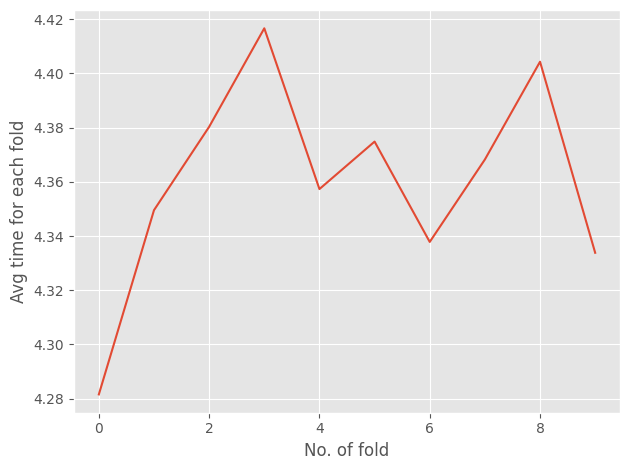

In [188]:
import matplotlib.pyplot as plt

times_lstm_n = np.zeros((10,100))
for i, row in enumerate(times_lstm):
    times_lstm_n[i, :len(row)] = row

times_lstm_n_n = np.mean(times_lstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_lstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("lstm times")
plt.show()

In [189]:
train_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_lstm):
    train_acc_lstm_n[i, :len(row)] = row
    
test_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_lstm):
    test_acc_lstm_n[i, :len(row)] = row
    
train_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_lstm):
    train_loss_lstm_n[i, :len(row)] = row
    
test_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_lstm):
    test_loss_lstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_lstm_n = np.mean(train_acc_lstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_lstm_n = np.mean(test_acc_lstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_lstm_n = np.mean(train_loss_lstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_lstm_n = np.mean(test_loss_lstm_n,axis=0)

In [190]:
data = [train_acc_lstm_n,test_acc_lstm_n,train_loss_lstm_n,test_loss_lstm_n]

df = pd.DataFrame(data)
df.to_csv('lstm_acc', index=False)
df = pd.read_csv('lstm_acc')

train_acc_lstm_n = df.iloc[0]
test_acc_lstm_n = df.iloc[1]
train_loss_lstm_n = df.iloc[2]
test_loss_lstm_n = df.iloc[3]


df_t = pd.DataFrame([times_lstm_n_n])
df_t.to_csv('lstm_times', index=False)
df_t = pd.read_csv('lstm_times')

times_lstm_n_n = df_t.iloc[0]

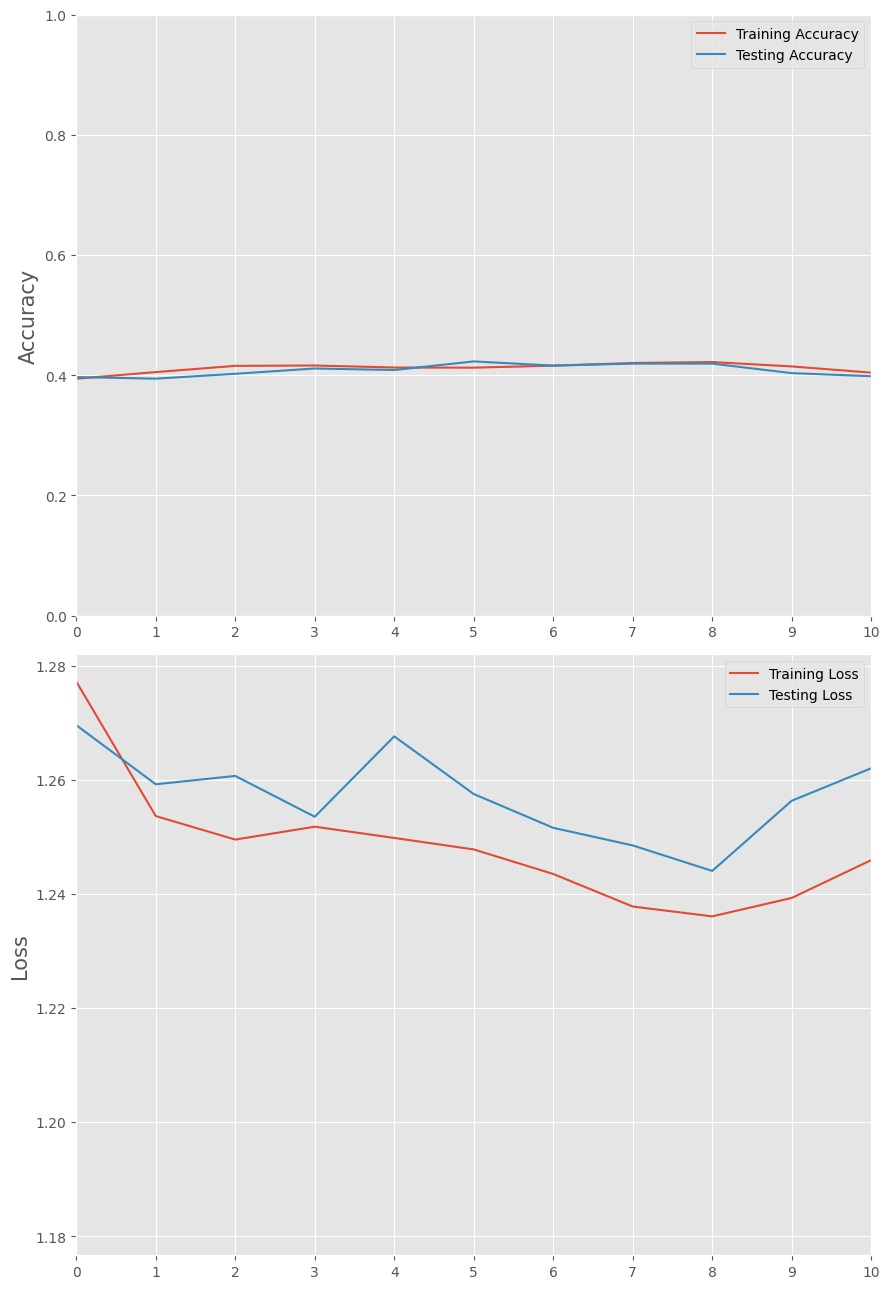

In [191]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_lstm_n, label='Training Accuracy')
axs[0].plot(test_acc_lstm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_lstm_n, label='Training Loss')
axs[1].plot(test_loss_lstm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("LSTM Training and Testing Loss")
plt.show()

In [192]:
np.array(scores_lstm).shape

(10, 302, 4)

In [193]:
np.array(y_test_all_lstm).shape

(10, 302)

In [194]:
y_pred_lstm = np.argmax(scores_lstm,axis=2)

In [195]:
y_pred_lstm.shape

(10, 302)

In [196]:
from sklearn.metrics import accuracy_score
acc_scores_lstm = []
for i in range(len(y_test_all_lstm)):
    acc_scores_lstm.append(accuracy_score(y_true = y_test_all_lstm[i],y_pred = y_pred_lstm[i]))

In [197]:
acc_scores_lstm

[0.3841059602649007,
 0.39072847682119205,
 0.38079470198675497,
 0.4867549668874172,
 0.3841059602649007,
 0.5,
 0.44039735099337746,
 0.48013245033112584,
 0.46357615894039733,
 0.3841059602649007]

In [198]:
df_acc = pd.DataFrame([acc_scores_lstm])

df_acc.to_csv('lstm_accuracy', index=False)

df_acc = pd.read_csv('lstm_accuracy')

acc_scores_lstm = df_acc.iloc[0].values

In [199]:
y_test_all_n = np.array(y_test_all_lstm)

y_pred_lstm_n = y_pred_lstm.flatten()
y_test_all_n = y_test_all_n.flatten()

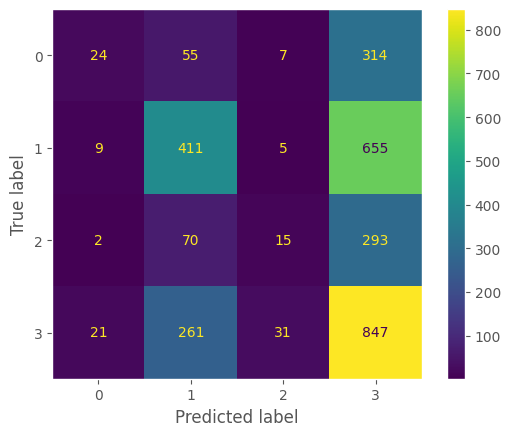

In [200]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_lstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("LSTM")

plt.show()

In [201]:
import gc
gc.collect()

30089

In [202]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_lstm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.43      0.06      0.11       400
           1       0.52      0.38      0.44      1080
           2       0.26      0.04      0.07       380
           3       0.40      0.73      0.52      1160

    accuracy                           0.43      3020
   macro avg       0.40      0.30      0.28      3020
weighted avg       0.43      0.43      0.38      3020



# BISLTM

In [203]:
import gc
gc.collect()

0

In [204]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_bilstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_bilstm.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [205]:
from keras.layers import LSTM

In [206]:
def create_model_bilstm():
    
    model_bilstm = keras.Sequential([

        keras.layers.Bidirectional(LSTM(100,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_bilstm

In [207]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_bilstm = []
y_test_all_bilstm = []
train_acc_bilstm = []
test_acc_bilstm = []
train_loss_bilstm = []
test_loss_bilstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_bilstm.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_bilstm = None
    model_bilstm = create_model_bilstm()
        
    model_bilstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_bilstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=64, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_bilstm.predict(X_test)
    
    scores_bilstm.append(x)
    train_acc_bilstm.append(history.history["accuracy"])
    test_acc_bilstm.append(history.history["val_accuracy"])
    train_loss_bilstm.append(history.history["loss"])
    test_loss_bilstm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
39/39 [==============================] - 11s 148ms/step - loss: 1.2777 - accuracy: 0.3998 - val_loss: 1.2403 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 5s 118ms/step - loss: 1.2434 - accuracy: 0.4330 - val_loss: 1.2281 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 5s 117ms/step - loss: 1.2242 - accuracy: 0.4354 - val_loss: 1.2766 - val_accuracy: 0.4706 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 5s 125ms/step - loss: 1.2229 - accuracy: 0.4579 - val_loss: 1.1956 - val_accuracy: 0.4853 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 5s 129ms/step - loss: 1.2051 - accuracy: 0.4652 - val_loss: 1.2133 - val_accuracy: 0.4559 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 4s 105ms/step - loss: 1.2009 - accuracy: 0.4595 - val_loss: 1.1820 - val_accuracy: 0.4890 - lr: 0.0010
Epoch 7/100
39/39 [===================

Epoch 30/100
39/39 [==============================] - 5s 128ms/step - loss: 0.9834 - accuracy: 0.5760 - val_loss: 1.1472 - val_accuracy: 0.5110 - lr: 8.0000e-06
Epoch 31/100
39/39 [==============================] - 4s 108ms/step - loss: 0.9794 - accuracy: 0.5777 - val_loss: 1.1474 - val_accuracy: 0.5074 - lr: 8.0000e-06
Epoch 32/100
39/39 [==============================] - ETA: 0s - loss: 0.9758 - accuracy: 0.5859
Epoch 32: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 32: 4.87 seconds
39/39 [==============================] - 5s 126ms/step - loss: 0.9758 - accuracy: 0.5859 - val_loss: 1.1495 - val_accuracy: 0.5147 - lr: 8.0000e-06
Epoch 33/100
39/39 [==============================] - 5s 127ms/step - loss: 0.9781 - accuracy: 0.5863 - val_loss: 1.1496 - val_accuracy: 0.5110 - lr: 1.6000e-06
Epoch 34/100
39/39 [==============================] - 4s 108ms/step - loss: 0.9740 - accuracy: 0.5777 - val_loss: 1.1499 - val_accuracy: 0.5110 - lr: 1.6000e

Epoch 58/100
39/39 [==============================] - 5s 117ms/step - loss: 0.9779 - accuracy: 0.5793 - val_loss: 1.1491 - val_accuracy: 0.5147 - lr: 5.1200e-10
Epoch 59/100
39/39 [==============================] - 5s 121ms/step - loss: 0.9857 - accuracy: 0.5670 - val_loss: 1.1491 - val_accuracy: 0.5147 - lr: 5.1200e-10
Epoch 60/100
39/39 [==============================] - 5s 133ms/step - loss: 0.9820 - accuracy: 0.5740 - val_loss: 1.1491 - val_accuracy: 0.5147 - lr: 5.1200e-10
Epoch 61/100
39/39 [==============================] - 5s 124ms/step - loss: 0.9795 - accuracy: 0.5752 - val_loss: 1.1491 - val_accuracy: 0.5147 - lr: 5.1200e-10
Epoch 62/100
39/39 [==============================] - ETA: 0s - loss: 0.9730 - accuracy: 0.5728
Epoch 62: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 62: 4.34 seconds
39/39 [==============================] - 4s 112ms/step - loss: 0.9730 - accuracy: 0.5728 - val_loss: 1.1491 - val_accuracy: 0.5147 - lr: 5.1200e

Epoch 86/100
39/39 [==============================] - 4s 100ms/step - loss: 0.9736 - accuracy: 0.5899 - val_loss: 1.1491 - val_accuracy: 0.5147 - lr: 1.6384e-13
Epoch 87/100
39/39 [==============================] - ETA: 0s - loss: 0.9785 - accuracy: 0.5904
Epoch 87: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 87: 4.52 seconds
39/39 [==============================] - 5s 117ms/step - loss: 0.9785 - accuracy: 0.5904 - val_loss: 1.1491 - val_accuracy: 0.5147 - lr: 1.6384e-13
Epoch 88/100
39/39 [==============================] - 4s 115ms/step - loss: 0.9806 - accuracy: 0.5736 - val_loss: 1.1491 - val_accuracy: 0.5147 - lr: 3.2768e-14
Epoch 89/100
39/39 [==============================] - 4s 114ms/step - loss: 0.9742 - accuracy: 0.5838 - val_loss: 1.1491 - val_accuracy: 0.5147 - lr: 3.2768e-14
Epoch 90/100
39/39 [==============================] - 4s 111ms/step - loss: 0.9797 - accuracy: 0.5879 - val_loss: 1.1491 - val_accuracy: 0.5147 - lr: 3.2768e

39/39 [==============================] - ETA: 0s - loss: 1.0163 - accuracy: 0.5679
Epoch 42: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 42: 4.23 seconds
39/39 [==============================] - 4s 107ms/step - loss: 1.0163 - accuracy: 0.5679 - val_loss: 1.1014 - val_accuracy: 0.5110 - lr: 1.6000e-06
Epoch 43/100
39/39 [==============================] - 5s 117ms/step - loss: 1.0147 - accuracy: 0.5658 - val_loss: 1.1014 - val_accuracy: 0.5110 - lr: 3.2000e-07
Epoch 44/100
39/39 [==============================] - 4s 108ms/step - loss: 1.0224 - accuracy: 0.5585 - val_loss: 1.1015 - val_accuracy: 0.5110 - lr: 3.2000e-07
Epoch 45/100
39/39 [==============================] - 5s 119ms/step - loss: 1.0112 - accuracy: 0.5744 - val_loss: 1.1015 - val_accuracy: 0.5110 - lr: 3.2000e-07
Epoch 46/100
39/39 [==============================] - 5s 122ms/step - loss: 1.0145 - accuracy: 0.5703 - val_loss: 1.1015 - val_accuracy: 0.5110 - lr: 3.2000e-07
Epoch 47/1

Epoch 70/100
39/39 [==============================] - 4s 115ms/step - loss: 1.0179 - accuracy: 0.5679 - val_loss: 1.1013 - val_accuracy: 0.5110 - lr: 1.0240e-10
Epoch 71/100
39/39 [==============================] - 4s 112ms/step - loss: 1.0195 - accuracy: 0.5646 - val_loss: 1.1013 - val_accuracy: 0.5110 - lr: 1.0240e-10
Epoch 72/100
39/39 [==============================] - ETA: 0s - loss: 1.0169 - accuracy: 0.5699
Epoch 72: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 72: 4.25 seconds
39/39 [==============================] - 4s 109ms/step - loss: 1.0169 - accuracy: 0.5699 - val_loss: 1.1013 - val_accuracy: 0.5110 - lr: 1.0240e-10
Epoch 73/100
39/39 [==============================] - 4s 113ms/step - loss: 1.0200 - accuracy: 0.5658 - val_loss: 1.1013 - val_accuracy: 0.5110 - lr: 2.0480e-11
Epoch 74/100
39/39 [==============================] - 4s 112ms/step - loss: 1.0198 - accuracy: 0.5634 - val_loss: 1.1013 - val_accuracy: 0.5110 - lr: 2.0480e

Epoch 98/100
39/39 [==============================] - 4s 114ms/step - loss: 1.0178 - accuracy: 0.5662 - val_loss: 1.1013 - val_accuracy: 0.5110 - lr: 6.5536e-15
Epoch 99/100
39/39 [==============================] - 4s 116ms/step - loss: 1.0186 - accuracy: 0.5589 - val_loss: 1.1013 - val_accuracy: 0.5110 - lr: 6.5536e-15
Epoch 100/100
10/10 [==============================] - 2s 37ms/step
Training on fold 3/10...
Epoch 1/100
39/39 [==============================] - 9s 138ms/step - loss: 1.2778 - accuracy: 0.4068 - val_loss: 1.2388 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 4s 112ms/step - loss: 1.2423 - accuracy: 0.4309 - val_loss: 1.2042 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 5s 117ms/step - loss: 1.2251 - accuracy: 0.4440 - val_loss: 1.2064 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 4s 115ms/step - loss: 1.2078 - accuracy: 0.4493 - val_loss: 1.19

Epoch 27/100
39/39 [==============================] - ETA: 0s - loss: 1.0341 - accuracy: 0.5609
Epoch 27: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 27: 4.15 seconds
39/39 [==============================] - 4s 106ms/step - loss: 1.0341 - accuracy: 0.5609 - val_loss: 1.1557 - val_accuracy: 0.4669 - lr: 4.0000e-05
Epoch 28/100
39/39 [==============================] - 5s 123ms/step - loss: 1.0284 - accuracy: 0.5605 - val_loss: 1.1547 - val_accuracy: 0.4669 - lr: 8.0000e-06
Epoch 29/100
39/39 [==============================] - 5s 125ms/step - loss: 1.0255 - accuracy: 0.5605 - val_loss: 1.1538 - val_accuracy: 0.4706 - lr: 8.0000e-06
Epoch 30/100
39/39 [==============================] - 4s 115ms/step - loss: 1.0271 - accuracy: 0.5527 - val_loss: 1.1523 - val_accuracy: 0.4706 - lr: 8.0000e-06
Epoch 31/100
39/39 [==============================] - 5s 122ms/step - loss: 1.0271 - accuracy: 0.5634 - val_loss: 1.1497 - val_accuracy: 0.4743 - lr: 8.0000e-

Epoch 55/100
39/39 [==============================] - 4s 114ms/step - loss: 1.0181 - accuracy: 0.5507 - val_loss: 1.1497 - val_accuracy: 0.4816 - lr: 2.5600e-09
Epoch 56/100
39/39 [==============================] - 4s 115ms/step - loss: 1.0154 - accuracy: 0.5630 - val_loss: 1.1497 - val_accuracy: 0.4816 - lr: 2.5600e-09
Epoch 57/100
39/39 [==============================] - ETA: 0s - loss: 1.0286 - accuracy: 0.5597
Epoch 57: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 57: 4.43 seconds
39/39 [==============================] - 4s 114ms/step - loss: 1.0286 - accuracy: 0.5597 - val_loss: 1.1497 - val_accuracy: 0.4816 - lr: 2.5600e-09
Epoch 58/100
39/39 [==============================] - 5s 119ms/step - loss: 1.0153 - accuracy: 0.5654 - val_loss: 1.1497 - val_accuracy: 0.4816 - lr: 5.1200e-10
Epoch 59/100
39/39 [==============================] - 5s 119ms/step - loss: 1.0151 - accuracy: 0.5666 - val_loss: 1.1497 - val_accuracy: 0.4816 - lr: 5.1200e-10

Epoch 83/100
39/39 [==============================] - 4s 114ms/step - loss: 1.0200 - accuracy: 0.5646 - val_loss: 1.1497 - val_accuracy: 0.4816 - lr: 1.6384e-13
Epoch 84/100
39/39 [==============================] - 5s 134ms/step - loss: 1.0195 - accuracy: 0.5634 - val_loss: 1.1497 - val_accuracy: 0.4816 - lr: 1.6384e-13
Epoch 85/100
39/39 [==============================] - 5s 129ms/step - loss: 1.0259 - accuracy: 0.5540 - val_loss: 1.1497 - val_accuracy: 0.4816 - lr: 1.6384e-13
Epoch 86/100
39/39 [==============================] - 5s 121ms/step - loss: 1.0231 - accuracy: 0.5613 - val_loss: 1.1497 - val_accuracy: 0.4816 - lr: 1.6384e-13
Epoch 87/100
39/39 [==============================] - ETA: 0s - loss: 1.0188 - accuracy: 0.5597
Epoch 87: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 87: 5.43 seconds
39/39 [==============================] - 5s 140ms/step - loss: 1.0188 - accuracy: 0.5597 - val_loss: 1.1497 - val_accuracy: 0.4816 - lr: 1.6384e

Epoch 40/100
39/39 [==============================] - 5s 139ms/step - loss: 0.8160 - accuracy: 0.6619 - val_loss: 1.1633 - val_accuracy: 0.5000 - lr: 8.0000e-06
Epoch 41/100
39/39 [==============================] - ETA: 0s - loss: 0.8082 - accuracy: 0.6725
Epoch 41: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 41: 4.48 seconds
39/39 [==============================] - 4s 115ms/step - loss: 0.8082 - accuracy: 0.6725 - val_loss: 1.1629 - val_accuracy: 0.4853 - lr: 8.0000e-06
Epoch 42/100
39/39 [==============================] - 4s 111ms/step - loss: 0.8045 - accuracy: 0.6619 - val_loss: 1.1629 - val_accuracy: 0.4853 - lr: 1.6000e-06
Epoch 43/100
39/39 [==============================] - 4s 114ms/step - loss: 0.8106 - accuracy: 0.6664 - val_loss: 1.1629 - val_accuracy: 0.4853 - lr: 1.6000e-06
Epoch 44/100
39/39 [==============================] - 5s 119ms/step - loss: 0.8067 - accuracy: 0.6754 - val_loss: 1.1632 - val_accuracy: 0.4816 - lr: 1.6000e

Epoch 68/100
39/39 [==============================] - 5s 130ms/step - loss: 0.7984 - accuracy: 0.6832 - val_loss: 1.1637 - val_accuracy: 0.4779 - lr: 5.1200e-10
Epoch 69/100
39/39 [==============================] - 5s 118ms/step - loss: 0.8069 - accuracy: 0.6631 - val_loss: 1.1637 - val_accuracy: 0.4779 - lr: 5.1200e-10
Epoch 70/100
39/39 [==============================] - 4s 115ms/step - loss: 0.8131 - accuracy: 0.6627 - val_loss: 1.1637 - val_accuracy: 0.4779 - lr: 5.1200e-10
Epoch 71/100
39/39 [==============================] - ETA: 0s - loss: 0.8107 - accuracy: 0.6664
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 4.96 seconds
39/39 [==============================] - 5s 128ms/step - loss: 0.8107 - accuracy: 0.6664 - val_loss: 1.1637 - val_accuracy: 0.4779 - lr: 5.1200e-10
Epoch 72/100
39/39 [==============================] - 5s 128ms/step - loss: 0.8056 - accuracy: 0.6643 - val_loss: 1.1637 - val_accuracy: 0.4779 - lr: 1.0240e

Epoch 96/100
39/39 [==============================] - ETA: 0s - loss: 0.8002 - accuracy: 0.6631
Epoch 96: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 96: 4.11 seconds
39/39 [==============================] - 4s 106ms/step - loss: 0.8002 - accuracy: 0.6631 - val_loss: 1.1637 - val_accuracy: 0.4779 - lr: 1.6384e-13
Epoch 97/100
39/39 [==============================] - 5s 125ms/step - loss: 0.8090 - accuracy: 0.6688 - val_loss: 1.1637 - val_accuracy: 0.4779 - lr: 3.2768e-14
Epoch 98/100
39/39 [==============================] - 5s 125ms/step - loss: 0.8076 - accuracy: 0.6701 - val_loss: 1.1637 - val_accuracy: 0.4779 - lr: 3.2768e-14
Epoch 99/100
39/39 [==============================] - 4s 103ms/step - loss: 0.8048 - accuracy: 0.6725 - val_loss: 1.1637 - val_accuracy: 0.4779 - lr: 3.2768e-14
Epoch 100/100
10/10 [==============================] - 2s 37ms/step
Training on fold 5/10...
Epoch 1/100
39/39 [==============================] - 9s 135ms/st

Epoch 24/100
39/39 [==============================] - 5s 122ms/step - loss: 1.1091 - accuracy: 0.5102 - val_loss: 1.1943 - val_accuracy: 0.4522 - lr: 8.0000e-06
Epoch 25/100
39/39 [==============================] - 4s 109ms/step - loss: 1.1150 - accuracy: 0.5098 - val_loss: 1.1947 - val_accuracy: 0.4522 - lr: 8.0000e-06
Epoch 26/100
39/39 [==============================] - ETA: 0s - loss: 1.1217 - accuracy: 0.5106
Epoch 26: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 26: 4.41 seconds
39/39 [==============================] - 4s 113ms/step - loss: 1.1217 - accuracy: 0.5106 - val_loss: 1.1946 - val_accuracy: 0.4522 - lr: 8.0000e-06
Epoch 27/100
39/39 [==============================] - 5s 116ms/step - loss: 1.1185 - accuracy: 0.5114 - val_loss: 1.1953 - val_accuracy: 0.4522 - lr: 1.6000e-06
Epoch 28/100
39/39 [==============================] - 4s 113ms/step - loss: 1.1136 - accuracy: 0.5070 - val_loss: 1.1950 - val_accuracy: 0.4522 - lr: 1.6000e

Epoch 52/100
39/39 [==============================] - 5s 124ms/step - loss: 1.1154 - accuracy: 0.5082 - val_loss: 1.1953 - val_accuracy: 0.4522 - lr: 5.1200e-10
Epoch 53/100
39/39 [==============================] - 4s 106ms/step - loss: 1.1127 - accuracy: 0.5094 - val_loss: 1.1953 - val_accuracy: 0.4522 - lr: 5.1200e-10
Epoch 54/100
39/39 [==============================] - 5s 124ms/step - loss: 1.1219 - accuracy: 0.5057 - val_loss: 1.1953 - val_accuracy: 0.4522 - lr: 5.1200e-10
Epoch 55/100
39/39 [==============================] - 5s 120ms/step - loss: 1.1161 - accuracy: 0.5070 - val_loss: 1.1953 - val_accuracy: 0.4522 - lr: 5.1200e-10
Epoch 56/100
39/39 [==============================] - ETA: 0s - loss: 1.1210 - accuracy: 0.5033
Epoch 56: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 56: 4.44 seconds
39/39 [==============================] - 4s 114ms/step - loss: 1.1210 - accuracy: 0.5033 - val_loss: 1.1953 - val_accuracy: 0.4522 - lr: 5.1200e

Epoch 80/100
39/39 [==============================] - 5s 123ms/step - loss: 1.1107 - accuracy: 0.5037 - val_loss: 1.1953 - val_accuracy: 0.4522 - lr: 1.6384e-13
Epoch 81/100
39/39 [==============================] - ETA: 0s - loss: 1.1109 - accuracy: 0.5213
Epoch 81: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 81: 4.27 seconds
39/39 [==============================] - 4s 109ms/step - loss: 1.1109 - accuracy: 0.5213 - val_loss: 1.1953 - val_accuracy: 0.4522 - lr: 1.6384e-13
Epoch 82/100
39/39 [==============================] - 5s 116ms/step - loss: 1.1152 - accuracy: 0.5074 - val_loss: 1.1953 - val_accuracy: 0.4522 - lr: 3.2768e-14
Epoch 83/100
39/39 [==============================] - 5s 121ms/step - loss: 1.1226 - accuracy: 0.4984 - val_loss: 1.1953 - val_accuracy: 0.4522 - lr: 3.2768e-14
Epoch 84/100
39/39 [==============================] - 4s 111ms/step - loss: 1.1189 - accuracy: 0.5045 - val_loss: 1.1953 - val_accuracy: 0.4522 - lr: 3.2768e

Epoch 8/100
39/39 [==============================] - ETA: 0s - loss: 1.1945 - accuracy: 0.4558
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 4.25 seconds
39/39 [==============================] - 4s 110ms/step - loss: 1.1945 - accuracy: 0.4558 - val_loss: 1.2766 - val_accuracy: 0.4265 - lr: 0.0010
Epoch 9/100
39/39 [==============================] - 5s 123ms/step - loss: 1.1789 - accuracy: 0.4747 - val_loss: 1.2477 - val_accuracy: 0.4559 - lr: 2.0000e-04
Epoch 10/100
39/39 [==============================] - 4s 115ms/step - loss: 1.1694 - accuracy: 0.4759 - val_loss: 1.2334 - val_accuracy: 0.4669 - lr: 2.0000e-04
Epoch 11/100
39/39 [==============================] - 4s 108ms/step - loss: 1.1634 - accuracy: 0.4726 - val_loss: 1.2414 - val_accuracy: 0.4485 - lr: 2.0000e-04
Epoch 12/100
39/39 [==============================] - 5s 118ms/step - loss: 1.1615 - accuracy: 0.4747 - val_loss: 1.2179 - val_accuracy: 0.4449 - lr: 2.0000e-04
Epoc

Epoch 36/100
39/39 [==============================] - 5s 120ms/step - loss: 1.1243 - accuracy: 0.5000 - val_loss: 1.2059 - val_accuracy: 0.4596 - lr: 6.4000e-08
Epoch 37/100
39/39 [==============================] - 5s 120ms/step - loss: 1.1226 - accuracy: 0.4975 - val_loss: 1.2059 - val_accuracy: 0.4596 - lr: 6.4000e-08
Epoch 38/100
39/39 [==============================] - ETA: 0s - loss: 1.1214 - accuracy: 0.5020
Epoch 38: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 38: 4.67 seconds
39/39 [==============================] - 5s 119ms/step - loss: 1.1214 - accuracy: 0.5020 - val_loss: 1.2060 - val_accuracy: 0.4596 - lr: 6.4000e-08
Epoch 39/100
39/39 [==============================] - 4s 107ms/step - loss: 1.1205 - accuracy: 0.4984 - val_loss: 1.2060 - val_accuracy: 0.4596 - lr: 1.2800e-08
Epoch 40/100
39/39 [==============================] - 5s 120ms/step - loss: 1.1224 - accuracy: 0.4971 - val_loss: 1.2060 - val_accuracy: 0.4596 - lr: 1.2800e

Epoch 64/100
39/39 [==============================] - 4s 108ms/step - loss: 1.1228 - accuracy: 0.4881 - val_loss: 1.2059 - val_accuracy: 0.4596 - lr: 4.0960e-12
Epoch 65/100
39/39 [==============================] - 5s 119ms/step - loss: 1.1193 - accuracy: 0.4951 - val_loss: 1.2059 - val_accuracy: 0.4596 - lr: 4.0960e-12
Epoch 66/100
39/39 [==============================] - 5s 122ms/step - loss: 1.1227 - accuracy: 0.4857 - val_loss: 1.2059 - val_accuracy: 0.4596 - lr: 4.0960e-12
Epoch 67/100
39/39 [==============================] - 4s 109ms/step - loss: 1.1177 - accuracy: 0.4975 - val_loss: 1.2059 - val_accuracy: 0.4596 - lr: 4.0960e-12
Epoch 68/100
39/39 [==============================] - ETA: 0s - loss: 1.1198 - accuracy: 0.4955
Epoch 68: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 68: 4.57 seconds
39/39 [==============================] - 5s 118ms/step - loss: 1.1198 - accuracy: 0.4955 - val_loss: 1.2059 - val_accuracy: 0.4596 - lr: 4.0960e-

Epoch 92/100
39/39 [==============================] - 5s 116ms/step - loss: 1.1222 - accuracy: 0.4902 - val_loss: 1.2059 - val_accuracy: 0.4596 - lr: 1.3107e-15
Epoch 93/100
39/39 [==============================] - ETA: 0s - loss: 1.1217 - accuracy: 0.4947
Epoch 93: ReduceLROnPlateau reducing learning rate to 2.6214401285682084e-16.
Time taken for epoch 93: 5.53 seconds
39/39 [==============================] - 6s 143ms/step - loss: 1.1217 - accuracy: 0.4947 - val_loss: 1.2059 - val_accuracy: 0.4596 - lr: 1.3107e-15
Epoch 94/100
39/39 [==============================] - 5s 135ms/step - loss: 1.1233 - accuracy: 0.4943 - val_loss: 1.2059 - val_accuracy: 0.4596 - lr: 2.6214e-16
Epoch 95/100
39/39 [==============================] - 5s 130ms/step - loss: 1.1255 - accuracy: 0.4914 - val_loss: 1.2059 - val_accuracy: 0.4596 - lr: 2.6214e-16
Epoch 96/100
39/39 [==============================] - 5s 141ms/step - loss: 1.1279 - accuracy: 0.4873 - val_loss: 1.2059 - val_accuracy: 0.4596 - lr: 2.6214e

Epoch 48/100
39/39 [==============================] - 4s 115ms/step - loss: 1.0065 - accuracy: 0.5638 - val_loss: 1.1564 - val_accuracy: 0.4926 - lr: 1.2800e-08
Epoch 49/100
39/39 [==============================] - 5s 117ms/step - loss: 1.0050 - accuracy: 0.5605 - val_loss: 1.1564 - val_accuracy: 0.4926 - lr: 1.2800e-08
Epoch 50/100
39/39 [==============================] - 5s 125ms/step - loss: 1.0047 - accuracy: 0.5617 - val_loss: 1.1564 - val_accuracy: 0.4926 - lr: 1.2800e-08
Epoch 51/100
39/39 [==============================] - ETA: 0s - loss: 0.9995 - accuracy: 0.5683
Epoch 51: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 51: 4.38 seconds
39/39 [==============================] - 4s 112ms/step - loss: 0.9995 - accuracy: 0.5683 - val_loss: 1.1564 - val_accuracy: 0.4926 - lr: 1.2800e-08
Epoch 52/100
39/39 [==============================] - 5s 123ms/step - loss: 1.0103 - accuracy: 0.5703 - val_loss: 1.1564 - val_accuracy: 0.4926 - lr: 2.5600e

Epoch 76/100
39/39 [==============================] - ETA: 0s - loss: 1.0066 - accuracy: 0.5540
Epoch 76: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 76: 4.48 seconds
39/39 [==============================] - 4s 115ms/step - loss: 1.0066 - accuracy: 0.5540 - val_loss: 1.1564 - val_accuracy: 0.4926 - lr: 4.0960e-12
Epoch 77/100
39/39 [==============================] - 5s 129ms/step - loss: 1.0041 - accuracy: 0.5654 - val_loss: 1.1564 - val_accuracy: 0.4926 - lr: 8.1920e-13
Epoch 78/100
39/39 [==============================] - 5s 127ms/step - loss: 1.0072 - accuracy: 0.5670 - val_loss: 1.1564 - val_accuracy: 0.4926 - lr: 8.1920e-13
Epoch 79/100
39/39 [==============================] - 4s 114ms/step - loss: 0.9996 - accuracy: 0.5630 - val_loss: 1.1564 - val_accuracy: 0.4926 - lr: 8.1920e-13
Epoch 80/100
39/39 [==============================] - 5s 131ms/step - loss: 1.0045 - accuracy: 0.5666 - val_loss: 1.1564 - val_accuracy: 0.4926 - lr: 8.1920e-

Epoch 4/100
39/39 [==============================] - 5s 125ms/step - loss: 1.2192 - accuracy: 0.4460 - val_loss: 1.1885 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 4s 109ms/step - loss: 1.1970 - accuracy: 0.4738 - val_loss: 1.1940 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 5s 116ms/step - loss: 1.1876 - accuracy: 0.4742 - val_loss: 1.1556 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 7/100
39/39 [==============================] - 5s 124ms/step - loss: 1.1684 - accuracy: 0.4873 - val_loss: 1.1749 - val_accuracy: 0.4926 - lr: 0.0010
Epoch 8/100
39/39 [==============================] - 4s 115ms/step - loss: 1.2155 - accuracy: 0.4481 - val_loss: 1.2141 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 9/100
39/39 [==============================] - 4s 110ms/step - loss: 1.1939 - accuracy: 0.4624 - val_loss: 1.1619 - val_accuracy: 0.4779 - lr: 0.0010
Epoch 10/100
39/39 [==============================] - 5s 120ms/s

Epoch 33/100
39/39 [==============================] - ETA: 0s - loss: 1.0121 - accuracy: 0.5732
Epoch 33: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 33: 4.30 seconds
39/39 [==============================] - 4s 110ms/step - loss: 1.0121 - accuracy: 0.5732 - val_loss: 1.1355 - val_accuracy: 0.5147 - lr: 4.0000e-05
Epoch 34/100
39/39 [==============================] - 5s 118ms/step - loss: 1.0099 - accuracy: 0.5732 - val_loss: 1.1330 - val_accuracy: 0.5147 - lr: 8.0000e-06
Epoch 35/100
39/39 [==============================] - 4s 116ms/step - loss: 1.0121 - accuracy: 0.5699 - val_loss: 1.1317 - val_accuracy: 0.5221 - lr: 8.0000e-06
Epoch 36/100
39/39 [==============================] - 5s 120ms/step - loss: 1.0033 - accuracy: 0.5793 - val_loss: 1.1311 - val_accuracy: 0.5147 - lr: 8.0000e-06
Epoch 37/100
39/39 [==============================] - 4s 110ms/step - loss: 1.0025 - accuracy: 0.5769 - val_loss: 1.1305 - val_accuracy: 0.5110 - lr: 8.0000e-

Epoch 61/100
39/39 [==============================] - 4s 105ms/step - loss: 1.0065 - accuracy: 0.5630 - val_loss: 1.1279 - val_accuracy: 0.5074 - lr: 2.5600e-09
Epoch 62/100
39/39 [==============================] - 5s 129ms/step - loss: 1.0033 - accuracy: 0.5724 - val_loss: 1.1279 - val_accuracy: 0.5074 - lr: 2.5600e-09
Epoch 63/100
39/39 [==============================] - ETA: 0s - loss: 1.0042 - accuracy: 0.5670
Epoch 63: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 63: 4.91 seconds
39/39 [==============================] - 5s 126ms/step - loss: 1.0042 - accuracy: 0.5670 - val_loss: 1.1279 - val_accuracy: 0.5074 - lr: 2.5600e-09
Epoch 64/100
39/39 [==============================] - 4s 110ms/step - loss: 1.0020 - accuracy: 0.5707 - val_loss: 1.1279 - val_accuracy: 0.5074 - lr: 5.1200e-10
Epoch 65/100
39/39 [==============================] - 5s 122ms/step - loss: 1.0066 - accuracy: 0.5695 - val_loss: 1.1279 - val_accuracy: 0.5074 - lr: 5.1200e-10

Epoch 89/100
39/39 [==============================] - 4s 104ms/step - loss: 1.0067 - accuracy: 0.5683 - val_loss: 1.1279 - val_accuracy: 0.5074 - lr: 1.6384e-13
Epoch 90/100
39/39 [==============================] - 4s 113ms/step - loss: 0.9969 - accuracy: 0.5773 - val_loss: 1.1279 - val_accuracy: 0.5074 - lr: 1.6384e-13
Epoch 91/100
39/39 [==============================] - 4s 112ms/step - loss: 1.0070 - accuracy: 0.5687 - val_loss: 1.1279 - val_accuracy: 0.5074 - lr: 1.6384e-13
Epoch 92/100
39/39 [==============================] - 4s 110ms/step - loss: 1.0076 - accuracy: 0.5769 - val_loss: 1.1279 - val_accuracy: 0.5074 - lr: 1.6384e-13
Epoch 93/100
39/39 [==============================] - ETA: 0s - loss: 1.0040 - accuracy: 0.5756
Epoch 93: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 93: 4.27 seconds
39/39 [==============================] - 4s 109ms/step - loss: 1.0040 - accuracy: 0.5756 - val_loss: 1.1279 - val_accuracy: 0.5074 - lr: 1.6384e

Epoch 17/100
39/39 [==============================] - 5s 122ms/step - loss: 1.0407 - accuracy: 0.5499 - val_loss: 1.1199 - val_accuracy: 0.5331 - lr: 4.0000e-05
Epoch 18/100
39/39 [==============================] - 4s 110ms/step - loss: 1.0384 - accuracy: 0.5552 - val_loss: 1.1160 - val_accuracy: 0.5404 - lr: 4.0000e-05
Epoch 19/100
39/39 [==============================] - 4s 110ms/step - loss: 1.0304 - accuracy: 0.5511 - val_loss: 1.1160 - val_accuracy: 0.5221 - lr: 4.0000e-05
Epoch 20/100
39/39 [==============================] - 5s 117ms/step - loss: 1.0287 - accuracy: 0.5666 - val_loss: 1.1205 - val_accuracy: 0.5294 - lr: 4.0000e-05
Epoch 21/100
39/39 [==============================] - ETA: 0s - loss: 1.0288 - accuracy: 0.5597
Epoch 21: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 21: 4.77 seconds
39/39 [==============================] - 5s 123ms/step - loss: 1.0288 - accuracy: 0.5597 - val_loss: 1.1217 - val_accuracy: 0.5147 - lr: 4.0000e-

Epoch 45/100
39/39 [==============================] - 5s 122ms/step - loss: 1.0091 - accuracy: 0.5683 - val_loss: 1.1233 - val_accuracy: 0.5184 - lr: 1.2800e-08
Epoch 46/100
39/39 [==============================] - ETA: 0s - loss: 1.0145 - accuracy: 0.5642
Epoch 46: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 46: 4.27 seconds
39/39 [==============================] - 4s 110ms/step - loss: 1.0145 - accuracy: 0.5642 - val_loss: 1.1234 - val_accuracy: 0.5184 - lr: 1.2800e-08
Epoch 47/100
39/39 [==============================] - 5s 128ms/step - loss: 1.0189 - accuracy: 0.5658 - val_loss: 1.1234 - val_accuracy: 0.5184 - lr: 2.5600e-09
Epoch 48/100
39/39 [==============================] - 5s 127ms/step - loss: 1.0137 - accuracy: 0.5720 - val_loss: 1.1234 - val_accuracy: 0.5184 - lr: 2.5600e-09
Epoch 49/100
39/39 [==============================] - 4s 110ms/step - loss: 1.0122 - accuracy: 0.5711 - val_loss: 1.1234 - val_accuracy: 0.5184 - lr: 2.5600e

Epoch 73/100
39/39 [==============================] - 4s 114ms/step - loss: 1.0159 - accuracy: 0.5687 - val_loss: 1.1234 - val_accuracy: 0.5184 - lr: 8.1920e-13
Epoch 74/100
39/39 [==============================] - 4s 112ms/step - loss: 1.0161 - accuracy: 0.5642 - val_loss: 1.1234 - val_accuracy: 0.5184 - lr: 8.1920e-13
Epoch 75/100
39/39 [==============================] - 4s 115ms/step - loss: 1.0162 - accuracy: 0.5691 - val_loss: 1.1234 - val_accuracy: 0.5184 - lr: 8.1920e-13
Epoch 76/100
39/39 [==============================] - ETA: 0s - loss: 1.0161 - accuracy: 0.5703
Epoch 76: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 76: 4.97 seconds
39/39 [==============================] - 5s 128ms/step - loss: 1.0161 - accuracy: 0.5703 - val_loss: 1.1234 - val_accuracy: 0.5184 - lr: 8.1920e-13
Epoch 77/100
39/39 [==============================] - 5s 119ms/step - loss: 1.0156 - accuracy: 0.5601 - val_loss: 1.1234 - val_accuracy: 0.5184 - lr: 1.6384e

10/10 [==============================] - 2s 35ms/step
Training on fold 10/10...
Epoch 1/100
39/39 [==============================] - 11s 145ms/step - loss: 1.2716 - accuracy: 0.4043 - val_loss: 1.2947 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 5s 127ms/step - loss: 1.2316 - accuracy: 0.4186 - val_loss: 1.3058 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 5s 128ms/step - loss: 1.2269 - accuracy: 0.4186 - val_loss: 1.2944 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 4s 112ms/step - loss: 1.2135 - accuracy: 0.4477 - val_loss: 1.2840 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 5s 129ms/step - loss: 1.1972 - accuracy: 0.4624 - val_loss: 1.3180 - val_accuracy: 0.4301 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 5s 133ms/step - loss: 1.1807 - accuracy: 0.4832 - val_loss: 1.3163 - val_accuracy: 0.4

Epoch 29/100
39/39 [==============================] - 5s 120ms/step - loss: 1.1250 - accuracy: 0.5110 - val_loss: 1.2603 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 30/100
39/39 [==============================] - 5s 124ms/step - loss: 1.1314 - accuracy: 0.5086 - val_loss: 1.2604 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 31/100
39/39 [==============================] - 4s 109ms/step - loss: 1.1309 - accuracy: 0.5180 - val_loss: 1.2603 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 32/100
39/39 [==============================] - ETA: 0s - loss: 1.1313 - accuracy: 0.5074
Epoch 32: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 32: 4.47 seconds
39/39 [==============================] - 4s 116ms/step - loss: 1.1313 - accuracy: 0.5074 - val_loss: 1.2604 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 33/100
39/39 [==============================] - 5s 123ms/step - loss: 1.1276 - accuracy: 0.5119 - val_loss: 1.2603 - val_accuracy: 0.4301 - lr: 3.2000e-

Epoch 57/100
39/39 [==============================] - ETA: 0s - loss: 1.1259 - accuracy: 0.5135
Epoch 57: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 57: 4.42 seconds
39/39 [==============================] - 4s 114ms/step - loss: 1.1259 - accuracy: 0.5135 - val_loss: 1.2607 - val_accuracy: 0.4301 - lr: 5.1200e-10
Epoch 58/100
39/39 [==============================] - 5s 118ms/step - loss: 1.1275 - accuracy: 0.5045 - val_loss: 1.2607 - val_accuracy: 0.4301 - lr: 1.0240e-10
Epoch 59/100
39/39 [==============================] - 4s 112ms/step - loss: 1.1288 - accuracy: 0.5135 - val_loss: 1.2607 - val_accuracy: 0.4301 - lr: 1.0240e-10
Epoch 60/100
39/39 [==============================] - 5s 121ms/step - loss: 1.1316 - accuracy: 0.5110 - val_loss: 1.2607 - val_accuracy: 0.4301 - lr: 1.0240e-10
Epoch 61/100
39/39 [==============================] - 5s 121ms/step - loss: 1.1260 - accuracy: 0.5057 - val_loss: 1.2607 - val_accuracy: 0.4301 - lr: 1.0240e

Epoch 85/100
39/39 [==============================] - 5s 126ms/step - loss: 1.1238 - accuracy: 0.5065 - val_loss: 1.2607 - val_accuracy: 0.4301 - lr: 3.2768e-14
Epoch 86/100
39/39 [==============================] - 5s 130ms/step - loss: 1.1296 - accuracy: 0.5110 - val_loss: 1.2607 - val_accuracy: 0.4301 - lr: 3.2768e-14
Epoch 87/100
39/39 [==============================] - ETA: 0s - loss: 1.1310 - accuracy: 0.5082
Epoch 87: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 87: 4.33 seconds
39/39 [==============================] - 4s 112ms/step - loss: 1.1310 - accuracy: 0.5082 - val_loss: 1.2607 - val_accuracy: 0.4301 - lr: 3.2768e-14
Epoch 88/100
39/39 [==============================] - 5s 130ms/step - loss: 1.1321 - accuracy: 0.5102 - val_loss: 1.2607 - val_accuracy: 0.4301 - lr: 6.5536e-15
Epoch 89/100
39/39 [==============================] - 5s 126ms/step - loss: 1.1320 - accuracy: 0.5061 - val_loss: 1.2607 - val_accuracy: 0.4301 - lr: 6.5536e-

In [208]:
import gc
gc.collect()

0

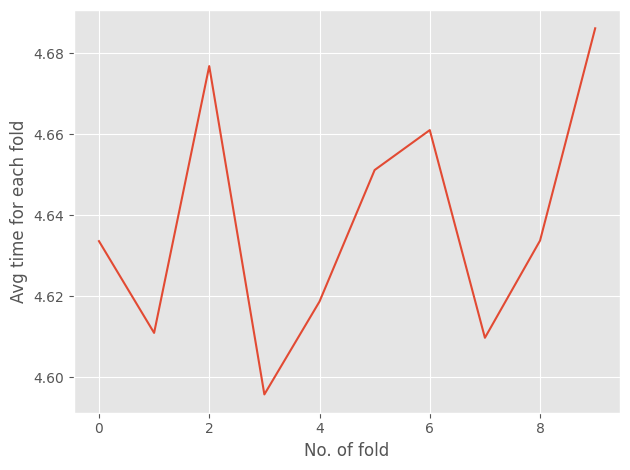

In [209]:
import matplotlib.pyplot as plt

times_bilstm_n = np.zeros((10,100))
for i, row in enumerate(times_bilstm):
    times_bilstm_n[i, :len(row)] = row

times_bilstm_n_n = np.mean(times_bilstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_bilstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("bilstm times")
plt.show()

In [210]:
train_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_bilstm):
    train_acc_bilstm_n[i, :len(row)] = row
    
test_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_bilstm):
    test_acc_bilstm_n[i, :len(row)] = row
    
train_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_bilstm):
    train_loss_bilstm_n[i, :len(row)] = row
    
test_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_bilstm):
    test_loss_bilstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_bilstm_n = np.mean(train_acc_bilstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_bilstm_n = np.mean(test_acc_bilstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_bilstm_n = np.mean(train_loss_bilstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_bilstm_n = np.mean(test_loss_bilstm_n,axis=0)

In [211]:
train_acc_bilstm_n

array([0.40429272, 0.42363042, 0.43229763, 0.44411284, 0.460139  ,
       0.4640229 , 0.46782502, 0.47240392, 0.4811529 , 0.48916599,
       0.48426001, 0.47906786, 0.48103026, 0.48994276, 0.49460343,
       0.50061325, 0.51189697, 0.51475879, 0.52342601, 0.5275552 ,
       0.52677842, 0.52955846, 0.53327883, 0.5369583 , 0.5412919 ,
       0.54235486, 0.54865085, 0.54889616, 0.55318888, 0.55139003,
       0.55388388, 0.55637776, 0.55686835, 0.55609157, 0.55862632,
       0.56083401, 0.55838102, 0.5589125 , 0.55936222, 0.55960753,
       0.56038431, 0.55891252, 0.5613655 , 0.55985282, 0.56206051,
       0.55809486, 0.56038431, 0.5616108 , 0.55964841, 0.56026165,
       0.55915782, 0.5618561 , 0.55997547, 0.55805397, 0.55645952,
       0.56058871, 0.55817661, 0.56140637, 0.55891252, 0.55985282,
       0.55829926, 0.55825839, 0.56103843, 0.5579722 , 0.5565413 ,
       0.5582175 , 0.56083401, 0.56103843, 0.56030253, 0.55870809,
       0.55850369, 0.5606296 , 0.56275552, 0.56034342, 0.55805

In [212]:
data = [train_acc_bilstm_n,test_acc_bilstm_n,train_loss_bilstm_n,test_loss_bilstm_n]

df = pd.DataFrame(data)
df.to_csv('bilstm_acc', index=False)
df = pd.read_csv('bilstm_acc')

train_acc_bilstm_n = df.iloc[0]
test_acc_bilstm_n = df.iloc[1]
train_loss_bilstm_n = df.iloc[2]
test_loss_bilstm_n = df.iloc[3]


df_t = pd.DataFrame([times_bilstm_n_n])
df_t.to_csv('bilstm_times', index=False)
df_t = pd.read_csv('bilstm_times')

times_bilstm_n_n = df_t.iloc[0]

In [213]:
train_acc_bilstm_n

0     0.404293
1     0.423630
2     0.432298
3     0.444113
4     0.460139
        ...   
95    0.559035
96    0.560384
97    0.561652
98    0.559076
99    0.559117
Name: 0, Length: 100, dtype: float64

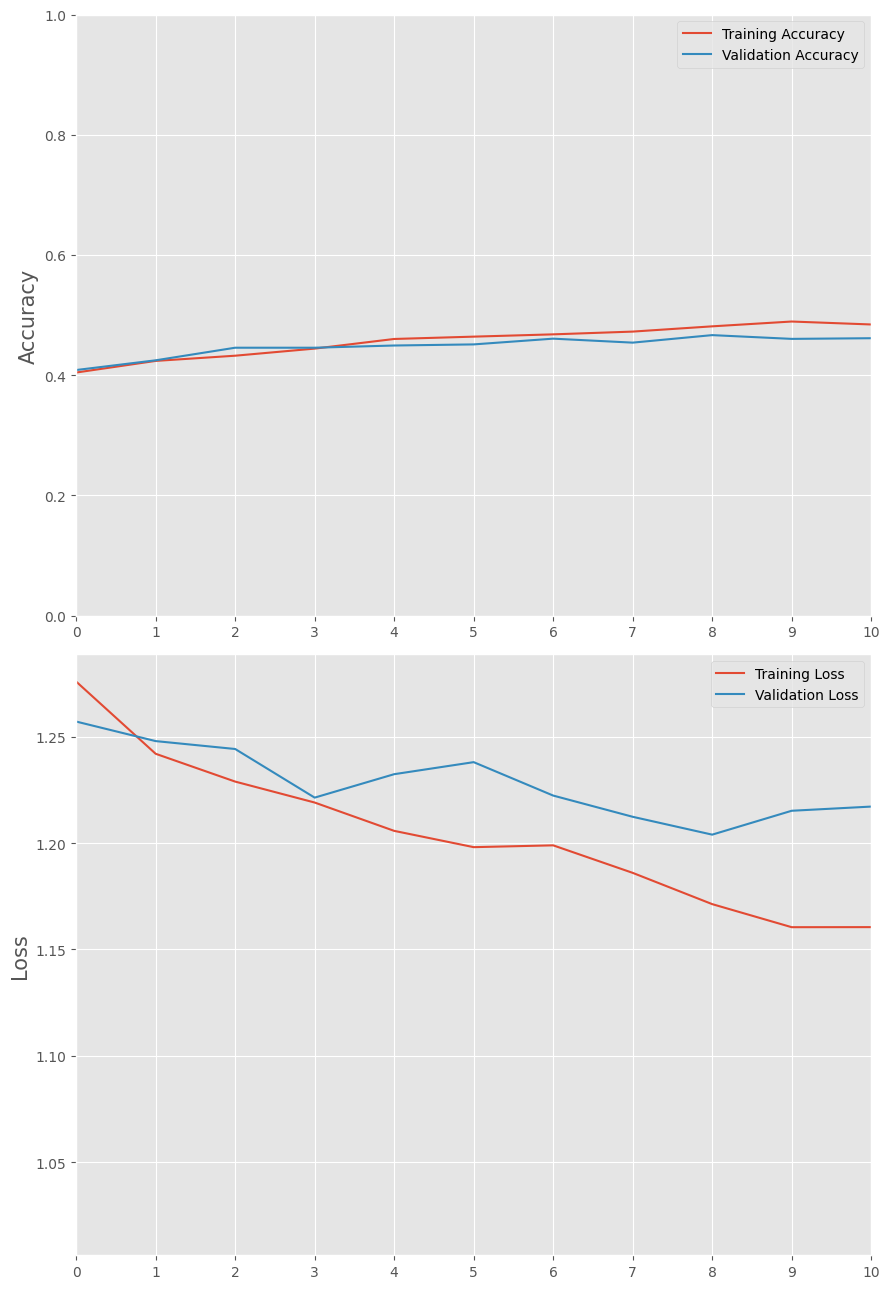

In [214]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_bilstm_n, label='Training Accuracy')
axs[0].plot(test_acc_bilstm_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_bilstm_n, label='Training Loss')
axs[1].plot(test_loss_bilstm_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("BILSTM Training and Testing Loss")
plt.show()

In [215]:
np.array(scores_bilstm).shape

(10, 302, 4)

In [216]:
np.array(y_test_all_bilstm).shape

(10, 302)

In [217]:
y_pred_bilstm = np.argmax(scores_bilstm,axis=2)

In [218]:
y_pred_bilstm.shape

(10, 302)

In [219]:
from sklearn.metrics import accuracy_score
acc_scores_bilstm = []
for i in range(len(y_test_all_bilstm)):
    acc_scores_bilstm.append(accuracy_score(y_true = y_test_all_bilstm[i],y_pred = y_pred_bilstm[i]))

In [220]:
acc_scores_bilstm

[0.4867549668874172,
 0.49337748344370863,
 0.5,
 0.5364238410596026,
 0.44039735099337746,
 0.46688741721854304,
 0.46688741721854304,
 0.5298013245033113,
 0.44039735099337746,
 0.46688741721854304]

In [221]:
df_acc = pd.DataFrame([acc_scores_bilstm])

df_acc.to_csv('bilstm_accuracy', index=False)

df_acc = pd.read_csv('bilstm_accuracy')

acc_scores_bilstm = df_acc.iloc[0].values

In [222]:
y_test_all_n = np.array(y_test_all_bilstm)

y_pred_bilstm_n = y_pred_bilstm.flatten()
y_test_all_n = y_test_all_n.flatten()

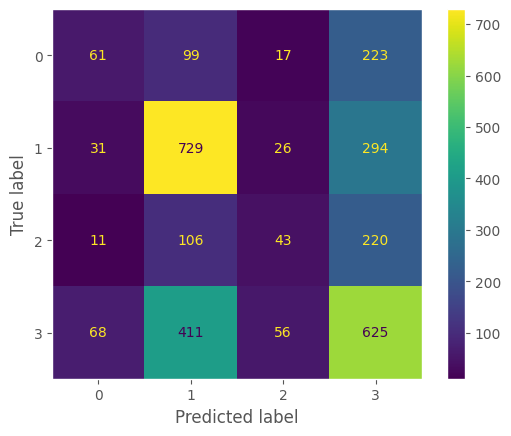

In [223]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_bilstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("BISLTM")

plt.show()

In [224]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_bilstm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.36      0.15      0.21       400
           1       0.54      0.68      0.60      1080
           2       0.30      0.11      0.16       380
           3       0.46      0.54      0.50      1160

    accuracy                           0.48      3020
   macro avg       0.42      0.37      0.37      3020
weighted avg       0.46      0.48      0.45      3020



# BRNN

In [225]:
import gc
gc.collect()

30154

In [226]:
# X,y = load_data(DATA_PATH)

In [227]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

In [228]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_birnn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_birnn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [229]:
def create_model_birnn():

    model_birnn = keras.Sequential([

        keras.layers.Bidirectional(SimpleRNN(256,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(128,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(64)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(units = 4,activation='softmax')

    ])
    return model_birnn

In [230]:
import gc
gc.collect()

5

In [231]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_birnn = []
y_test_all_birnn = []
train_acc_birnn = []
test_acc_birnn = []
train_loss_birnn = []
test_loss_birnn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_birnn.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_birnn = None
    model_birnn = create_model_birnn()
        
    model_birnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_birnn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=64, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_birnn.predict(X_test)
    
    scores_birnn.append(x)
    train_acc_birnn.append(history.history["accuracy"])
    test_acc_birnn.append(history.history["val_accuracy"])
    train_loss_birnn.append(history.history["loss"])
    test_loss_birnn.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
39/39 [==============================] - 37s 913ms/step - loss: 1.7746 - accuracy: 0.3025 - val_loss: 1.3312 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 36s 913ms/step - loss: 1.7080 - accuracy: 0.3083 - val_loss: 1.2825 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 36s 921ms/step - loss: 1.6154 - accuracy: 0.3197 - val_loss: 1.2789 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 35s 889ms/step - loss: 1.5318 - accuracy: 0.3451 - val_loss: 1.2798 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 35s 906ms/step - loss: 1.5426 - accuracy: 0.3185 - val_loss: 1.2635 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 35s 906ms/step - loss: 1.4879 - accuracy: 0.3099 - val_loss: 1.2569 - val_accuracy: 0.3419 - lr: 0.0010
Epoch 7/100
39/39 [==============

Epoch 57/100
39/39 [==============================] - ETA: 0s - loss: 1.3385 - accuracy: 0.3455
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 34.86 seconds
39/39 [==============================] - 35s 900ms/step - loss: 1.3385 - accuracy: 0.3455 - val_loss: 1.2428 - val_accuracy: 0.3566 - lr: 1.2800e-08
Epoch 58/100
39/39 [==============================] - 34s 876ms/step - loss: 1.3378 - accuracy: 0.3557 - val_loss: 1.2428 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 59/100
39/39 [==============================] - 37s 937ms/step - loss: 1.3583 - accuracy: 0.3463 - val_loss: 1.2428 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 60/100
39/39 [==============================] - 35s 888ms/step - loss: 1.3314 - accuracy: 0.3512 - val_loss: 1.2428 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 61/100
39/39 [==============================] - 35s 910ms/step - loss: 1.3463 - accuracy: 0.3659 - val_loss: 1.2428 - val_accuracy: 0.3566 - lr: 2

Epoch 85/100
39/39 [==============================] - ETA: 0s - loss: 1.3443 - accuracy: 0.3520
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 37.37 seconds
39/39 [==============================] - 37s 958ms/step - loss: 1.3443 - accuracy: 0.3520 - val_loss: 1.2428 - val_accuracy: 0.3566 - lr: 2.0480e-11
Epoch 86/100
39/39 [==============================] - 35s 891ms/step - loss: 1.3514 - accuracy: 0.3455 - val_loss: 1.2428 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 87/100
39/39 [==============================] - 34s 887ms/step - loss: 1.3321 - accuracy: 0.3814 - val_loss: 1.2428 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 88/100
39/39 [==============================] - 35s 894ms/step - loss: 1.3402 - accuracy: 0.3565 - val_loss: 1.2428 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 89/100
39/39 [==============================] - 34s 880ms/step - loss: 1.3473 - accuracy: 0.3565 - val_loss: 1.2428 - val_accuracy: 0.3566 - lr: 4.

Epoch 41/100
39/39 [==============================] - 33s 860ms/step - loss: 1.2974 - accuracy: 0.3606 - val_loss: 1.2626 - val_accuracy: 0.3676 - lr: 1.6000e-06
Epoch 42/100
39/39 [==============================] - 34s 880ms/step - loss: 1.2859 - accuracy: 0.3557 - val_loss: 1.2642 - val_accuracy: 0.3860 - lr: 1.6000e-06
Epoch 43/100
39/39 [==============================] - 34s 887ms/step - loss: 1.2813 - accuracy: 0.3888 - val_loss: 1.2619 - val_accuracy: 0.3713 - lr: 1.6000e-06
Epoch 44/100
39/39 [==============================] - ETA: 0s - loss: 1.3029 - accuracy: 0.3520
Epoch 44: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 44: 33.84 seconds
39/39 [==============================] - 34s 872ms/step - loss: 1.3029 - accuracy: 0.3520 - val_loss: 1.2618 - val_accuracy: 0.3713 - lr: 1.6000e-06
Epoch 45/100
39/39 [==============================] - 35s 892ms/step - loss: 1.2963 - accuracy: 0.3696 - val_loss: 1.2620 - val_accuracy: 0.3750 - lr: 3.

Epoch 69/100
39/39 [==============================] - 35s 909ms/step - loss: 1.2957 - accuracy: 0.3708 - val_loss: 1.2621 - val_accuracy: 0.3824 - lr: 2.5600e-09
Epoch 70/100
39/39 [==============================] - 35s 885ms/step - loss: 1.2852 - accuracy: 0.3794 - val_loss: 1.2621 - val_accuracy: 0.3824 - lr: 2.5600e-09
Epoch 71/100
39/39 [==============================] - 35s 897ms/step - loss: 1.2938 - accuracy: 0.3724 - val_loss: 1.2621 - val_accuracy: 0.3824 - lr: 2.5600e-09
Epoch 72/100
39/39 [==============================] - ETA: 0s - loss: 1.2888 - accuracy: 0.3655
Epoch 72: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 72: 33.91 seconds
39/39 [==============================] - 34s 870ms/step - loss: 1.2888 - accuracy: 0.3655 - val_loss: 1.2621 - val_accuracy: 0.3824 - lr: 2.5600e-09
Epoch 73/100
39/39 [==============================] - 35s 913ms/step - loss: 1.2996 - accuracy: 0.3688 - val_loss: 1.2621 - val_accuracy: 0.3824 - lr: 5.12

Epoch 97/100
39/39 [==============================] - 35s 891ms/step - loss: 1.2889 - accuracy: 0.3704 - val_loss: 1.2621 - val_accuracy: 0.3824 - lr: 4.0960e-12
Epoch 98/100
39/39 [==============================] - 35s 915ms/step - loss: 1.3004 - accuracy: 0.3614 - val_loss: 1.2621 - val_accuracy: 0.3824 - lr: 4.0960e-12
Epoch 99/100
39/39 [==============================] - 35s 899ms/step - loss: 1.2977 - accuracy: 0.3667 - val_loss: 1.2621 - val_accuracy: 0.3824 - lr: 4.0960e-12
Epoch 100/100
39/39 [==============================] - ETA: 0s - loss: 1.3050 - accuracy: 0.3655
Epoch 100: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 100: 35.79 seconds
10/10 [==============================] - 3s 231ms/step
Training on fold 3/10...
Epoch 1/100
39/39 [==============================] - 38s 945ms/step - loss: 1.7278 - accuracy: 0.3209 - val_loss: 1.3079 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 37s 938ms

Epoch 25/100
39/39 [==============================] - 35s 904ms/step - loss: 1.3485 - accuracy: 0.3692 - val_loss: 1.2125 - val_accuracy: 0.3897 - lr: 8.0000e-06
Epoch 26/100
39/39 [==============================] - 35s 897ms/step - loss: 1.3495 - accuracy: 0.3655 - val_loss: 1.2123 - val_accuracy: 0.3897 - lr: 8.0000e-06
Epoch 27/100
39/39 [==============================] - 36s 926ms/step - loss: 1.3496 - accuracy: 0.3557 - val_loss: 1.2125 - val_accuracy: 0.3897 - lr: 8.0000e-06
Epoch 28/100
39/39 [==============================] - 36s 926ms/step - loss: 1.3367 - accuracy: 0.3700 - val_loss: 1.2123 - val_accuracy: 0.3897 - lr: 8.0000e-06
Epoch 29/100
39/39 [==============================] - ETA: 0s - loss: 1.3485 - accuracy: 0.3618
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 37.12 seconds
39/39 [==============================] - 37s 953ms/step - loss: 1.3485 - accuracy: 0.3618 - val_loss: 1.2121 - val_accuracy: 0.3897 - lr: 8

Epoch 53/100
39/39 [==============================] - 35s 915ms/step - loss: 1.3389 - accuracy: 0.3675 - val_loss: 1.2119 - val_accuracy: 0.3897 - lr: 1.2800e-08
Epoch 54/100
39/39 [==============================] - 35s 915ms/step - loss: 1.3332 - accuracy: 0.3675 - val_loss: 1.2119 - val_accuracy: 0.3897 - lr: 1.2800e-08
Epoch 55/100
39/39 [==============================] - 36s 914ms/step - loss: 1.3582 - accuracy: 0.3577 - val_loss: 1.2119 - val_accuracy: 0.3897 - lr: 1.2800e-08
Epoch 56/100
39/39 [==============================] - 36s 916ms/step - loss: 1.3409 - accuracy: 0.3520 - val_loss: 1.2119 - val_accuracy: 0.3897 - lr: 1.2800e-08
Epoch 57/100
39/39 [==============================] - ETA: 0s - loss: 1.3450 - accuracy: 0.3712
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 36.12 seconds
39/39 [==============================] - 36s 926ms/step - loss: 1.3450 - accuracy: 0.3712 - val_loss: 1.2119 - val_accuracy: 0.3897 - lr: 1

Epoch 81/100
39/39 [==============================] - 36s 933ms/step - loss: 1.3346 - accuracy: 0.3545 - val_loss: 1.2119 - val_accuracy: 0.3897 - lr: 2.0480e-11
Epoch 82/100
39/39 [==============================] - 35s 901ms/step - loss: 1.3465 - accuracy: 0.3573 - val_loss: 1.2119 - val_accuracy: 0.3897 - lr: 2.0480e-11
Epoch 83/100
39/39 [==============================] - 35s 905ms/step - loss: 1.3687 - accuracy: 0.3577 - val_loss: 1.2119 - val_accuracy: 0.3897 - lr: 2.0480e-11
Epoch 84/100
39/39 [==============================] - 35s 902ms/step - loss: 1.3445 - accuracy: 0.3565 - val_loss: 1.2119 - val_accuracy: 0.3897 - lr: 2.0480e-11
Epoch 85/100
39/39 [==============================] - ETA: 0s - loss: 1.3342 - accuracy: 0.3614
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 34.22 seconds
39/39 [==============================] - 34s 877ms/step - loss: 1.3342 - accuracy: 0.3614 - val_loss: 1.2119 - val_accuracy: 0.3897 - lr: 2.

Epoch 9/100
39/39 [==============================] - 37s 941ms/step - loss: 1.3766 - accuracy: 0.3651 - val_loss: 1.2533 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 10/100
39/39 [==============================] - 36s 910ms/step - loss: 1.3587 - accuracy: 0.3487 - val_loss: 1.2726 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 11/100
39/39 [==============================] - 37s 950ms/step - loss: 1.3503 - accuracy: 0.3512 - val_loss: 1.2498 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 12/100
39/39 [==============================] - ETA: 0s - loss: 1.3208 - accuracy: 0.3569
Epoch 12: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 12: 34.86 seconds
39/39 [==============================] - 35s 889ms/step - loss: 1.3208 - accuracy: 0.3569 - val_loss: 1.2549 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 13/100
39/39 [==============================] - 37s 954ms/step - loss: 1.3126 - accuracy: 0.3573 - val_loss: 1.2477 - val_accuracy: 0.3934 - lr: 2.0000e-04
Epoch 1

Epoch 37/100
39/39 [==============================] - 36s 925ms/step - loss: 1.3071 - accuracy: 0.3598 - val_loss: 1.2477 - val_accuracy: 0.3934 - lr: 1.6000e-06
Epoch 38/100
39/39 [==============================] - 36s 920ms/step - loss: 1.3002 - accuracy: 0.3581 - val_loss: 1.2477 - val_accuracy: 0.3934 - lr: 1.6000e-06
Epoch 39/100
39/39 [==============================] - 36s 938ms/step - loss: 1.3109 - accuracy: 0.3590 - val_loss: 1.2477 - val_accuracy: 0.3934 - lr: 1.6000e-06
Epoch 40/100
39/39 [==============================] - ETA: 0s - loss: 1.3080 - accuracy: 0.3778
Epoch 40: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 40: 35.62 seconds
39/39 [==============================] - 36s 912ms/step - loss: 1.3080 - accuracy: 0.3778 - val_loss: 1.2477 - val_accuracy: 0.3934 - lr: 1.6000e-06
Epoch 41/100
39/39 [==============================] - 36s 934ms/step - loss: 1.3100 - accuracy: 0.3532 - val_loss: 1.2477 - val_accuracy: 0.3934 - lr: 3.

Epoch 65/100
39/39 [==============================] - 34s 883ms/step - loss: 1.2964 - accuracy: 0.3851 - val_loss: 1.2476 - val_accuracy: 0.3934 - lr: 2.5600e-09
Epoch 66/100
39/39 [==============================] - 36s 913ms/step - loss: 1.3057 - accuracy: 0.3704 - val_loss: 1.2476 - val_accuracy: 0.3934 - lr: 2.5600e-09
Epoch 67/100
39/39 [==============================] - 36s 930ms/step - loss: 1.2998 - accuracy: 0.3724 - val_loss: 1.2476 - val_accuracy: 0.3934 - lr: 2.5600e-09
Epoch 68/100
39/39 [==============================] - ETA: 0s - loss: 1.3022 - accuracy: 0.3720
Epoch 68: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 68: 35.88 seconds
39/39 [==============================] - 36s 922ms/step - loss: 1.3022 - accuracy: 0.3720 - val_loss: 1.2476 - val_accuracy: 0.3934 - lr: 2.5600e-09
Epoch 69/100
39/39 [==============================] - 37s 955ms/step - loss: 1.3051 - accuracy: 0.3651 - val_loss: 1.2476 - val_accuracy: 0.3934 - lr: 5.12

Epoch 93/100
39/39 [==============================] - 36s 923ms/step - loss: 1.3047 - accuracy: 0.3610 - val_loss: 1.2476 - val_accuracy: 0.3934 - lr: 4.0960e-12
Epoch 94/100
39/39 [==============================] - 36s 924ms/step - loss: 1.3037 - accuracy: 0.3512 - val_loss: 1.2476 - val_accuracy: 0.3934 - lr: 4.0960e-12
Epoch 95/100
39/39 [==============================] - 34s 882ms/step - loss: 1.3035 - accuracy: 0.3598 - val_loss: 1.2476 - val_accuracy: 0.3934 - lr: 4.0960e-12
Epoch 96/100
39/39 [==============================] - ETA: 0s - loss: 1.2998 - accuracy: 0.3798
Epoch 96: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 96: 34.29 seconds
39/39 [==============================] - 34s 882ms/step - loss: 1.2998 - accuracy: 0.3798 - val_loss: 1.2476 - val_accuracy: 0.3934 - lr: 4.0960e-12
Epoch 97/100
39/39 [==============================] - 36s 927ms/step - loss: 1.2968 - accuracy: 0.3749 - val_loss: 1.2476 - val_accuracy: 0.3934 - lr: 8.

Time taken for epoch 21: 34.54 seconds
39/39 [==============================] - 35s 890ms/step - loss: 1.2869 - accuracy: 0.3778 - val_loss: 1.2878 - val_accuracy: 0.3051 - lr: 2.0000e-04
Epoch 22/100
39/39 [==============================] - 35s 908ms/step - loss: 1.2933 - accuracy: 0.3671 - val_loss: 1.2878 - val_accuracy: 0.3051 - lr: 4.0000e-05
Epoch 23/100
39/39 [==============================] - 36s 935ms/step - loss: 1.2906 - accuracy: 0.3692 - val_loss: 1.2877 - val_accuracy: 0.3051 - lr: 4.0000e-05
Epoch 24/100
39/39 [==============================] - 35s 910ms/step - loss: 1.2855 - accuracy: 0.3774 - val_loss: 1.2868 - val_accuracy: 0.3051 - lr: 4.0000e-05
Epoch 25/100
39/39 [==============================] - 36s 913ms/step - loss: 1.2902 - accuracy: 0.3679 - val_loss: 1.2874 - val_accuracy: 0.3051 - lr: 4.0000e-05
Epoch 26/100
39/39 [==============================] - 35s 899ms/step - loss: 1.2840 - accuracy: 0.3876 - val_loss: 1.2876 - val_accuracy: 0.3051 - lr: 4.0000e-05
Ep

Time taken for epoch 49: 35.04 seconds
39/39 [==============================] - 35s 897ms/step - loss: 1.2916 - accuracy: 0.3577 - val_loss: 1.2880 - val_accuracy: 0.3051 - lr: 3.2000e-07
Epoch 50/100
39/39 [==============================] - 35s 910ms/step - loss: 1.2891 - accuracy: 0.3643 - val_loss: 1.2880 - val_accuracy: 0.3051 - lr: 6.4000e-08
Epoch 51/100
39/39 [==============================] - 35s 884ms/step - loss: 1.2869 - accuracy: 0.3782 - val_loss: 1.2880 - val_accuracy: 0.3051 - lr: 6.4000e-08
Epoch 52/100
39/39 [==============================] - 36s 925ms/step - loss: 1.2864 - accuracy: 0.3888 - val_loss: 1.2880 - val_accuracy: 0.3051 - lr: 6.4000e-08
Epoch 53/100
39/39 [==============================] - 36s 921ms/step - loss: 1.2878 - accuracy: 0.3798 - val_loss: 1.2880 - val_accuracy: 0.3051 - lr: 6.4000e-08
Epoch 54/100
39/39 [==============================] - 36s 914ms/step - loss: 1.2868 - accuracy: 0.3782 - val_loss: 1.2880 - val_accuracy: 0.3051 - lr: 6.4000e-08
Ep

Time taken for epoch 77: 34.44 seconds
39/39 [==============================] - 34s 884ms/step - loss: 1.2879 - accuracy: 0.3818 - val_loss: 1.2880 - val_accuracy: 0.3051 - lr: 5.1200e-10
Epoch 78/100
39/39 [==============================] - 34s 882ms/step - loss: 1.2823 - accuracy: 0.3786 - val_loss: 1.2880 - val_accuracy: 0.3051 - lr: 1.0240e-10
Epoch 79/100
39/39 [==============================] - 35s 895ms/step - loss: 1.2808 - accuracy: 0.3814 - val_loss: 1.2880 - val_accuracy: 0.3051 - lr: 1.0240e-10
Epoch 80/100
39/39 [==============================] - 35s 908ms/step - loss: 1.2846 - accuracy: 0.3806 - val_loss: 1.2880 - val_accuracy: 0.3051 - lr: 1.0240e-10
Epoch 81/100
39/39 [==============================] - 36s 913ms/step - loss: 1.2910 - accuracy: 0.3757 - val_loss: 1.2880 - val_accuracy: 0.3051 - lr: 1.0240e-10
Epoch 82/100
39/39 [==============================] - 35s 908ms/step - loss: 1.2845 - accuracy: 0.3962 - val_loss: 1.2880 - val_accuracy: 0.3051 - lr: 1.0240e-10
Ep

Epoch 33/100
39/39 [==============================] - 36s 936ms/step - loss: 1.3244 - accuracy: 0.3708 - val_loss: 1.2730 - val_accuracy: 0.3750 - lr: 1.6000e-06
Epoch 34/100
39/39 [==============================] - 36s 936ms/step - loss: 1.3272 - accuracy: 0.3540 - val_loss: 1.2729 - val_accuracy: 0.3750 - lr: 1.6000e-06
Epoch 35/100
39/39 [==============================] - 36s 930ms/step - loss: 1.3376 - accuracy: 0.3598 - val_loss: 1.2730 - val_accuracy: 0.3750 - lr: 1.6000e-06
Epoch 36/100
39/39 [==============================] - 37s 947ms/step - loss: 1.3272 - accuracy: 0.3610 - val_loss: 1.2731 - val_accuracy: 0.3713 - lr: 1.6000e-06
Epoch 37/100
39/39 [==============================] - ETA: 0s - loss: 1.3320 - accuracy: 0.3671
Epoch 37: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 37: 36.01 seconds
39/39 [==============================] - 36s 929ms/step - loss: 1.3320 - accuracy: 0.3671 - val_loss: 1.2730 - val_accuracy: 0.3713 - lr: 1.

Epoch 61/100
39/39 [==============================] - 36s 926ms/step - loss: 1.3267 - accuracy: 0.3471 - val_loss: 1.2730 - val_accuracy: 0.3713 - lr: 2.5600e-09
Epoch 62/100
39/39 [==============================] - 37s 964ms/step - loss: 1.3234 - accuracy: 0.3602 - val_loss: 1.2730 - val_accuracy: 0.3713 - lr: 2.5600e-09
Epoch 63/100
39/39 [==============================] - 37s 954ms/step - loss: 1.3284 - accuracy: 0.3630 - val_loss: 1.2730 - val_accuracy: 0.3713 - lr: 2.5600e-09
Epoch 64/100
39/39 [==============================] - 37s 947ms/step - loss: 1.3229 - accuracy: 0.3561 - val_loss: 1.2730 - val_accuracy: 0.3713 - lr: 2.5600e-09
Epoch 65/100
39/39 [==============================] - ETA: 0s - loss: 1.3268 - accuracy: 0.3663
Epoch 65: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 65: 35.70 seconds
39/39 [==============================] - 36s 914ms/step - loss: 1.3268 - accuracy: 0.3663 - val_loss: 1.2730 - val_accuracy: 0.3713 - lr: 2.56

Epoch 89/100
39/39 [==============================] - 35s 900ms/step - loss: 1.3395 - accuracy: 0.3626 - val_loss: 1.2730 - val_accuracy: 0.3713 - lr: 4.0960e-12
Epoch 90/100
39/39 [==============================] - 35s 892ms/step - loss: 1.3377 - accuracy: 0.3622 - val_loss: 1.2730 - val_accuracy: 0.3713 - lr: 4.0960e-12
Epoch 91/100
39/39 [==============================] - 34s 880ms/step - loss: 1.3275 - accuracy: 0.3610 - val_loss: 1.2730 - val_accuracy: 0.3713 - lr: 4.0960e-12
Epoch 92/100
39/39 [==============================] - 35s 905ms/step - loss: 1.3284 - accuracy: 0.3573 - val_loss: 1.2730 - val_accuracy: 0.3713 - lr: 4.0960e-12
Epoch 93/100
39/39 [==============================] - ETA: 0s - loss: 1.3189 - accuracy: 0.3733
Epoch 93: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 93: 36.03 seconds
39/39 [==============================] - 36s 927ms/step - loss: 1.3189 - accuracy: 0.3733 - val_loss: 1.2730 - val_accuracy: 0.3713 - lr: 4.

39/39 [==============================] - ETA: 0s - loss: 1.3063 - accuracy: 0.3904
Epoch 17: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 17: 35.77 seconds
39/39 [==============================] - 36s 917ms/step - loss: 1.3063 - accuracy: 0.3904 - val_loss: 1.3458 - val_accuracy: 0.3162 - lr: 2.0000e-04
Epoch 18/100
39/39 [==============================] - 35s 897ms/step - loss: 1.3102 - accuracy: 0.3765 - val_loss: 1.3482 - val_accuracy: 0.3162 - lr: 4.0000e-05
Epoch 19/100
39/39 [==============================] - 34s 881ms/step - loss: 1.3163 - accuracy: 0.3684 - val_loss: 1.3470 - val_accuracy: 0.3162 - lr: 4.0000e-05
Epoch 20/100
39/39 [==============================] - 36s 911ms/step - loss: 1.3254 - accuracy: 0.3659 - val_loss: 1.3469 - val_accuracy: 0.3162 - lr: 4.0000e-05
Epoch 21/100
39/39 [==============================] - 35s 904ms/step - loss: 1.3279 - accuracy: 0.3622 - val_loss: 1.3487 - val_accuracy: 0.3162 - lr: 4.0000e-05
Epo

Epoch 45/100
39/39 [==============================] - ETA: 0s - loss: 1.3175 - accuracy: 0.3688
Epoch 45: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 45: 36.64 seconds
39/39 [==============================] - 37s 943ms/step - loss: 1.3175 - accuracy: 0.3688 - val_loss: 1.3468 - val_accuracy: 0.3162 - lr: 3.2000e-07
Epoch 46/100
39/39 [==============================] - 35s 890ms/step - loss: 1.3073 - accuracy: 0.3716 - val_loss: 1.3468 - val_accuracy: 0.3162 - lr: 6.4000e-08
Epoch 47/100
39/39 [==============================] - 37s 941ms/step - loss: 1.3192 - accuracy: 0.3786 - val_loss: 1.3468 - val_accuracy: 0.3162 - lr: 6.4000e-08
Epoch 48/100
39/39 [==============================] - 35s 905ms/step - loss: 1.3054 - accuracy: 0.3839 - val_loss: 1.3468 - val_accuracy: 0.3162 - lr: 6.4000e-08
Epoch 49/100
39/39 [==============================] - 34s 875ms/step - loss: 1.3142 - accuracy: 0.3729 - val_loss: 1.3468 - val_accuracy: 0.3162 - lr: 6.

Epoch 73/100
39/39 [==============================] - ETA: 0s - loss: 1.3121 - accuracy: 0.3635
Epoch 73: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 73: 34.33 seconds
39/39 [==============================] - 34s 879ms/step - loss: 1.3121 - accuracy: 0.3635 - val_loss: 1.3468 - val_accuracy: 0.3162 - lr: 5.1200e-10
Epoch 74/100
39/39 [==============================] - 33s 853ms/step - loss: 1.3215 - accuracy: 0.3606 - val_loss: 1.3468 - val_accuracy: 0.3162 - lr: 1.0240e-10
Epoch 75/100
39/39 [==============================] - 34s 872ms/step - loss: 1.3165 - accuracy: 0.3684 - val_loss: 1.3468 - val_accuracy: 0.3162 - lr: 1.0240e-10
Epoch 76/100
39/39 [==============================] - 36s 919ms/step - loss: 1.3097 - accuracy: 0.3712 - val_loss: 1.3468 - val_accuracy: 0.3162 - lr: 1.0240e-10
Epoch 77/100
39/39 [==============================] - 36s 916ms/step - loss: 1.3056 - accuracy: 0.3696 - val_loss: 1.3468 - val_accuracy: 0.3162 - lr: 1

10/10 [==============================] - 2s 135ms/step
Training on fold 8/10...
Epoch 1/100
39/39 [==============================] - 38s 943ms/step - loss: 1.7459 - accuracy: 0.3177 - val_loss: 1.3520 - val_accuracy: 0.2904 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 37s 959ms/step - loss: 1.6644 - accuracy: 0.3226 - val_loss: 1.3514 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 37s 943ms/step - loss: 1.6098 - accuracy: 0.3295 - val_loss: 1.3514 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 35s 908ms/step - loss: 1.5518 - accuracy: 0.3352 - val_loss: 1.4474 - val_accuracy: 0.3272 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 38s 973ms/step - loss: 1.4899 - accuracy: 0.3475 - val_loss: 1.3353 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 35s 904ms/step - loss: 1.4718 - accuracy: 0.3381 - val_loss: 1.8240 - val_accuracy

39/39 [==============================] - 36s 915ms/step - loss: 1.3054 - accuracy: 0.3626 - val_loss: 1.3178 - val_accuracy: 0.3456 - lr: 8.0000e-06
Epoch 30/100
39/39 [==============================] - 34s 863ms/step - loss: 1.3242 - accuracy: 0.3606 - val_loss: 1.3183 - val_accuracy: 0.3456 - lr: 8.0000e-06
Epoch 31/100
39/39 [==============================] - ETA: 0s - loss: 1.3193 - accuracy: 0.3692
Epoch 31: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 31: 37.93 seconds
39/39 [==============================] - 38s 975ms/step - loss: 1.3193 - accuracy: 0.3692 - val_loss: 1.3189 - val_accuracy: 0.3419 - lr: 8.0000e-06
Epoch 32/100
39/39 [==============================] - 38s 979ms/step - loss: 1.3228 - accuracy: 0.3602 - val_loss: 1.3189 - val_accuracy: 0.3419 - lr: 1.6000e-06
Epoch 33/100
39/39 [==============================] - 36s 937ms/step - loss: 1.3047 - accuracy: 0.3753 - val_loss: 1.3190 - val_accuracy: 0.3419 - lr: 1.6000e-06
Epo

Epoch 57/100
39/39 [==============================] - 36s 933ms/step - loss: 1.3204 - accuracy: 0.3675 - val_loss: 1.3192 - val_accuracy: 0.3419 - lr: 1.2800e-08
Epoch 58/100
39/39 [==============================] - 37s 947ms/step - loss: 1.3233 - accuracy: 0.3553 - val_loss: 1.3192 - val_accuracy: 0.3419 - lr: 1.2800e-08
Epoch 59/100
39/39 [==============================] - ETA: 0s - loss: 1.3160 - accuracy: 0.3774
Epoch 59: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 59: 36.35 seconds
39/39 [==============================] - 36s 934ms/step - loss: 1.3160 - accuracy: 0.3774 - val_loss: 1.3192 - val_accuracy: 0.3419 - lr: 1.2800e-08
Epoch 60/100
39/39 [==============================] - 36s 932ms/step - loss: 1.3240 - accuracy: 0.3622 - val_loss: 1.3192 - val_accuracy: 0.3419 - lr: 2.5600e-09
Epoch 61/100
39/39 [==============================] - 37s 946ms/step - loss: 1.3047 - accuracy: 0.3761 - val_loss: 1.3192 - val_accuracy: 0.3419 - lr: 2

Epoch 85/100
39/39 [==============================] - 36s 933ms/step - loss: 1.3150 - accuracy: 0.3626 - val_loss: 1.3192 - val_accuracy: 0.3419 - lr: 2.0480e-11
Epoch 86/100
39/39 [==============================] - 37s 951ms/step - loss: 1.3179 - accuracy: 0.3561 - val_loss: 1.3192 - val_accuracy: 0.3419 - lr: 2.0480e-11
Epoch 87/100
39/39 [==============================] - ETA: 0s - loss: 1.3060 - accuracy: 0.3581
Epoch 87: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 87: 35.23 seconds
39/39 [==============================] - 35s 905ms/step - loss: 1.3060 - accuracy: 0.3581 - val_loss: 1.3192 - val_accuracy: 0.3419 - lr: 2.0480e-11
Epoch 88/100
39/39 [==============================] - 37s 954ms/step - loss: 1.3091 - accuracy: 0.3806 - val_loss: 1.3192 - val_accuracy: 0.3419 - lr: 4.0960e-12
Epoch 89/100
39/39 [==============================] - 35s 894ms/step - loss: 1.3058 - accuracy: 0.3843 - val_loss: 1.3192 - val_accuracy: 0.3419 - lr: 4.

39/39 [==============================] - 35s 907ms/step - loss: 1.3618 - accuracy: 0.3434 - val_loss: 1.2785 - val_accuracy: 0.3346 - lr: 2.0000e-04
Epoch 14/100
39/39 [==============================] - 35s 889ms/step - loss: 1.3715 - accuracy: 0.3520 - val_loss: 1.2913 - val_accuracy: 0.3529 - lr: 2.0000e-04
Epoch 15/100
39/39 [==============================] - ETA: 0s - loss: 1.3691 - accuracy: 0.3553
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 35.20 seconds
39/39 [==============================] - 35s 903ms/step - loss: 1.3691 - accuracy: 0.3553 - val_loss: 1.3121 - val_accuracy: 0.3309 - lr: 2.0000e-04
Epoch 16/100
39/39 [==============================] - 35s 891ms/step - loss: 1.3698 - accuracy: 0.3479 - val_loss: 1.2933 - val_accuracy: 0.3529 - lr: 4.0000e-05
Epoch 17/100
39/39 [==============================] - 35s 906ms/step - loss: 1.3529 - accuracy: 0.3430 - val_loss: 1.2700 - val_accuracy: 0.3934 - lr: 4.0000e-05
Epo

Epoch 41/100
39/39 [==============================] - 35s 907ms/step - loss: 1.3445 - accuracy: 0.3508 - val_loss: 1.2706 - val_accuracy: 0.4044 - lr: 3.2000e-07
Epoch 42/100
39/39 [==============================] - 36s 914ms/step - loss: 1.3617 - accuracy: 0.3397 - val_loss: 1.2706 - val_accuracy: 0.4044 - lr: 3.2000e-07
Epoch 43/100
39/39 [==============================] - ETA: 0s - loss: 1.3508 - accuracy: 0.3369
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 35.57 seconds
39/39 [==============================] - 36s 915ms/step - loss: 1.3508 - accuracy: 0.3369 - val_loss: 1.2705 - val_accuracy: 0.4044 - lr: 3.2000e-07
Epoch 44/100
39/39 [==============================] - 35s 906ms/step - loss: 1.3478 - accuracy: 0.3475 - val_loss: 1.2704 - val_accuracy: 0.4044 - lr: 6.4000e-08
Epoch 45/100
39/39 [==============================] - 36s 920ms/step - loss: 1.3333 - accuracy: 0.3692 - val_loss: 1.2703 - val_accuracy: 0.4044 - lr: 6.

Epoch 69/100
39/39 [==============================] - 36s 933ms/step - loss: 1.3690 - accuracy: 0.3434 - val_loss: 1.2700 - val_accuracy: 0.4044 - lr: 5.1200e-10
Epoch 70/100
39/39 [==============================] - 34s 871ms/step - loss: 1.3471 - accuracy: 0.3463 - val_loss: 1.2700 - val_accuracy: 0.4044 - lr: 5.1200e-10
Epoch 71/100
39/39 [==============================] - ETA: 0s - loss: 1.3554 - accuracy: 0.3536
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 31.64 seconds
39/39 [==============================] - 32s 812ms/step - loss: 1.3554 - accuracy: 0.3536 - val_loss: 1.2700 - val_accuracy: 0.4044 - lr: 5.1200e-10
Epoch 72/100
39/39 [==============================] - 34s 869ms/step - loss: 1.3489 - accuracy: 0.3594 - val_loss: 1.2700 - val_accuracy: 0.4044 - lr: 1.0240e-10
Epoch 73/100
39/39 [==============================] - 36s 939ms/step - loss: 1.3340 - accuracy: 0.3794 - val_loss: 1.2700 - val_accuracy: 0.4044 - lr: 1

Epoch 97/100
39/39 [==============================] - 34s 879ms/step - loss: 1.3576 - accuracy: 0.3553 - val_loss: 1.2700 - val_accuracy: 0.4044 - lr: 8.1920e-13
Epoch 98/100
39/39 [==============================] - 34s 862ms/step - loss: 1.3528 - accuracy: 0.3483 - val_loss: 1.2700 - val_accuracy: 0.4044 - lr: 8.1920e-13
Epoch 99/100
39/39 [==============================] - ETA: 0s - loss: 1.3422 - accuracy: 0.3626
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 35.33 seconds
39/39 [==============================] - 35s 908ms/step - loss: 1.3422 - accuracy: 0.3626 - val_loss: 1.2700 - val_accuracy: 0.4044 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 3s 246ms/step
Training on fold 10/10...
Epoch 1/100
39/39 [==============================] - 38s 942ms/step - loss: 1.8882 - accuracy: 0.2633 - val_loss: 1.5856 - val_accuracy: 0.2904 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 36s 915ms

39/39 [==============================] - ETA: 0s - loss: 1.3071 - accuracy: 0.3769
Epoch 25: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 25: 36.53 seconds
39/39 [==============================] - 37s 938ms/step - loss: 1.3071 - accuracy: 0.3769 - val_loss: 1.3791 - val_accuracy: 0.3015 - lr: 4.0000e-05
Epoch 26/100
39/39 [==============================] - 36s 914ms/step - loss: 1.3169 - accuracy: 0.3590 - val_loss: 1.3768 - val_accuracy: 0.3125 - lr: 8.0000e-06
Epoch 27/100
39/39 [==============================] - 35s 901ms/step - loss: 1.3057 - accuracy: 0.3540 - val_loss: 1.3736 - val_accuracy: 0.3382 - lr: 8.0000e-06
Epoch 28/100
39/39 [==============================] - 36s 914ms/step - loss: 1.3071 - accuracy: 0.3818 - val_loss: 1.3728 - val_accuracy: 0.3382 - lr: 8.0000e-06
Epoch 29/100
39/39 [==============================] - 36s 918ms/step - loss: 1.3098 - accuracy: 0.3778 - val_loss: 1.3732 - val_accuracy: 0.3566 - lr: 8.0000e-06
Epoc

Epoch 53/100
39/39 [==============================] - ETA: 0s - loss: 1.3030 - accuracy: 0.3835
Epoch 53: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 53: 35.44 seconds
39/39 [==============================] - 35s 910ms/step - loss: 1.3030 - accuracy: 0.3835 - val_loss: 1.3754 - val_accuracy: 0.3493 - lr: 6.4000e-08
Epoch 54/100
39/39 [==============================] - 35s 897ms/step - loss: 1.3098 - accuracy: 0.3778 - val_loss: 1.3754 - val_accuracy: 0.3493 - lr: 1.2800e-08
Epoch 55/100
39/39 [==============================] - 36s 920ms/step - loss: 1.3054 - accuracy: 0.3802 - val_loss: 1.3754 - val_accuracy: 0.3493 - lr: 1.2800e-08
Epoch 56/100
39/39 [==============================] - 37s 948ms/step - loss: 1.3026 - accuracy: 0.3741 - val_loss: 1.3754 - val_accuracy: 0.3493 - lr: 1.2800e-08
Epoch 57/100
39/39 [==============================] - 36s 911ms/step - loss: 1.3025 - accuracy: 0.3851 - val_loss: 1.3754 - val_accuracy: 0.3493 - lr: 1

Epoch 81/100
39/39 [==============================] - ETA: 0s - loss: 1.3020 - accuracy: 0.3790
Epoch 81: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 81: 36.25 seconds
39/39 [==============================] - 36s 935ms/step - loss: 1.3020 - accuracy: 0.3790 - val_loss: 1.3754 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 82/100
39/39 [==============================] - 37s 941ms/step - loss: 1.3056 - accuracy: 0.3847 - val_loss: 1.3754 - val_accuracy: 0.3493 - lr: 2.0480e-11
Epoch 83/100
39/39 [==============================] - 35s 892ms/step - loss: 1.3060 - accuracy: 0.3843 - val_loss: 1.3754 - val_accuracy: 0.3493 - lr: 2.0480e-11
Epoch 84/100
39/39 [==============================] - 37s 946ms/step - loss: 1.3031 - accuracy: 0.3753 - val_loss: 1.3754 - val_accuracy: 0.3493 - lr: 2.0480e-11
Epoch 85/100
39/39 [==============================] - 37s 951ms/step - loss: 1.3005 - accuracy: 0.3774 - val_loss: 1.3754 - val_accuracy: 0.3493 - lr: 2

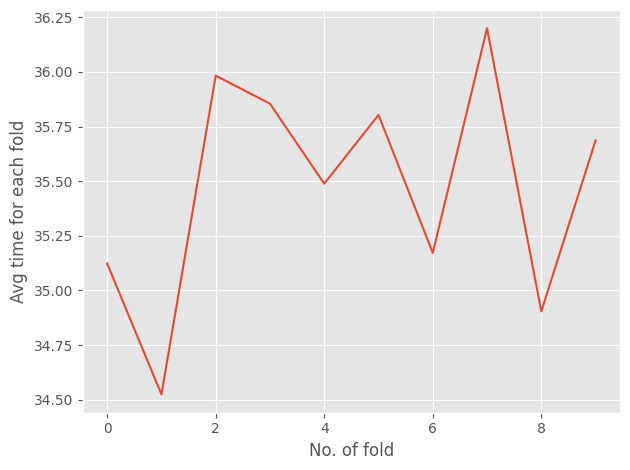

In [232]:
import matplotlib.pyplot as plt

times_birnn_n = np.zeros((10,100))
for i, row in enumerate(times_birnn):
    times_birnn_n[i, :len(row)] = row

times_birnn_n_n = np.mean(times_birnn_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_birnn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("birnn times")
plt.show()

In [233]:
train_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_birnn):
    train_acc_birnn_n[i, :len(row)] = row
    
test_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_birnn):
    test_acc_birnn_n[i, :len(row)] = row
    
train_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_birnn):
    train_loss_birnn_n[i, :len(row)] = row
    
test_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_birnn):
    test_loss_birnn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_birnn_n = np.mean(train_acc_birnn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_birnn_n = np.mean(test_acc_birnn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_birnn_n = np.mean(train_loss_birnn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_birnn_n = np.mean(test_loss_birnn_n,axis=0)

In [234]:
data = [train_acc_birnn_n,test_acc_birnn_n,train_loss_birnn_n,test_loss_birnn_n]

df = pd.DataFrame(data)
df.to_csv('birnn_acc', index=False)
df = pd.read_csv('birnn_acc')

train_acc_birnn_n = df.iloc[0]
test_acc_birnn_n = df.iloc[1]
train_loss_birnn_n = df.iloc[2]
test_loss_birnn_n = df.iloc[3]


df_t = pd.DataFrame([times_birnn_n_n])
df_t.to_csv('birnn_times', index=False)
df_t = pd.read_csv('birnn_times')

times_birnn_n_n = df_t.iloc[0]

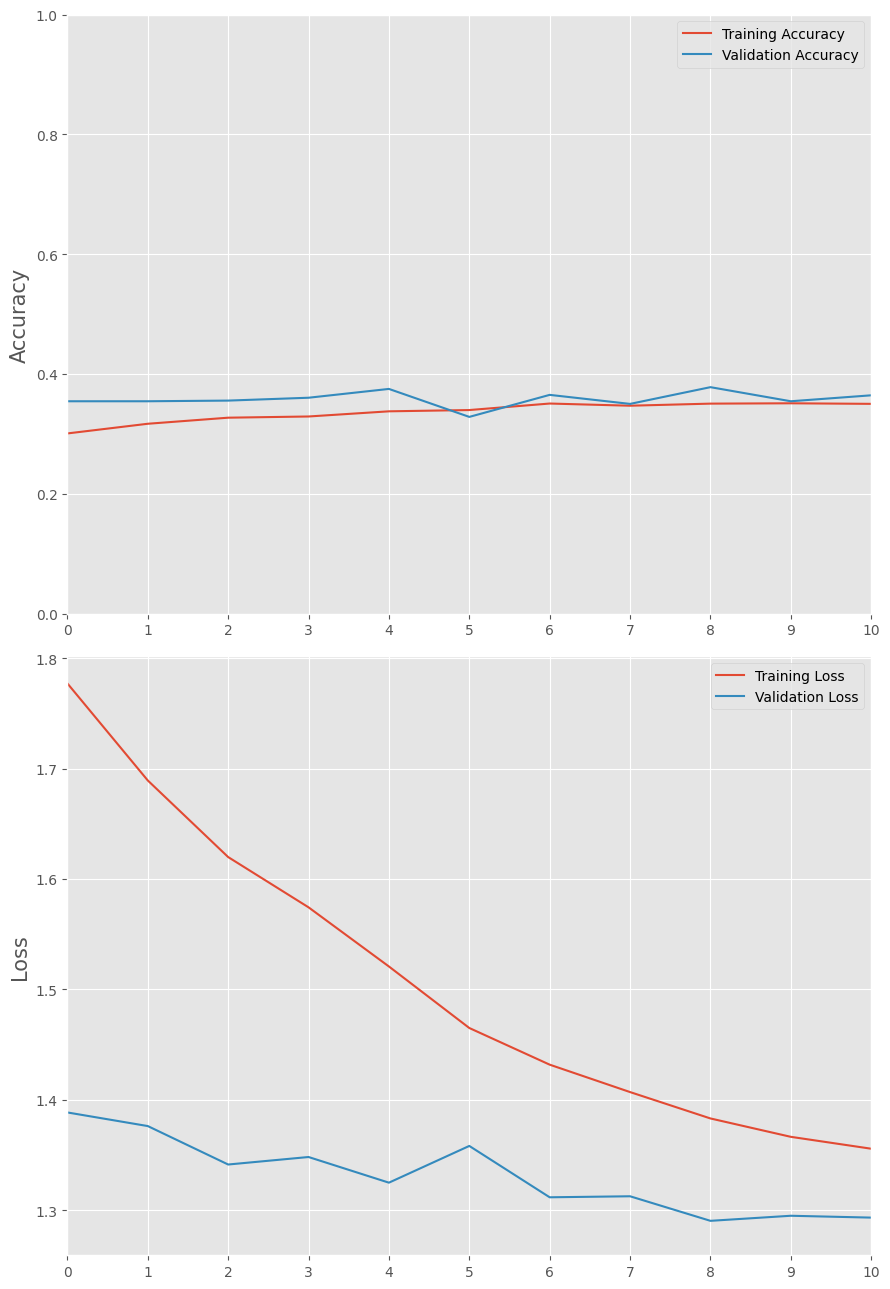

In [235]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_birnn_n, label='Training Accuracy')
axs[0].plot(test_acc_birnn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_birnn_n, label='Training Loss')
axs[1].plot(test_loss_birnn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig(" BIRNN Training and Testing Loss")
plt.show()

In [236]:
import gc
gc.collect()

23627

In [237]:
np.array(scores_birnn).shape

(10, 302, 4)

In [238]:
y_pred_birnn = np.argmax(scores_birnn,axis=2)

In [239]:
y_pred_birnn.shape

(10, 302)

In [240]:
from sklearn.metrics import accuracy_score
acc_scores_birnn = []
for i in range(len(y_test_all_birnn)):
    acc_scores_birnn.append(accuracy_score(y_true = y_test_all_birnn[i],y_pred = y_pred_birnn[i]))

In [241]:
acc_scores_birnn

[0.3675496688741722,
 0.39072847682119205,
 0.40066225165562913,
 0.3841059602649007,
 0.37748344370860926,
 0.37748344370860926,
 0.3609271523178808,
 0.3609271523178808,
 0.38079470198675497,
 0.4105960264900662]

In [242]:
df_acc = pd.DataFrame([acc_scores_birnn])

df_acc.to_csv('birnn_accuracy', index=False)

df_acc = pd.read_csv('birnn_accuracy')

acc_scores_birnn = df_acc.iloc[0].values

In [243]:
acc_birnn = np.mean(acc_scores_birnn)

In [244]:
acc_birnn

0.38112582781456944

In [245]:
y_test_all_n = np.array(y_test_all_birnn)

y_pred_birnn_n = y_pred_birnn.flatten()
y_test_all_n = y_test_all_n.flatten()

In [246]:
import gc
gc.collect()

0

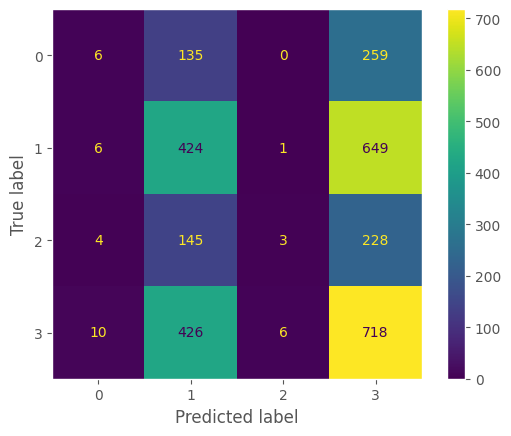

In [247]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_birnn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("birnn")
plt.show()

In [248]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_birnn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.23      0.01      0.03       400
           1       0.38      0.39      0.38      1080
           2       0.30      0.01      0.02       380
           3       0.39      0.62      0.48      1160

    accuracy                           0.38      3020
   macro avg       0.32      0.26      0.23      3020
weighted avg       0.35      0.38      0.33      3020



# MobileNetV2

In [8]:
import gc
gc.collect()

0

In [8]:
X.shape

(3020, 259, 6)

In [9]:
X = np.concatenate([X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X], axis= -1)

In [10]:
X = np.expand_dims(X, axis=-1)

In [11]:
X_n = np.concatenate([X,X,X], axis= -1)

In [12]:
X_n.shape

(3020, 259, 102, 3)

In [13]:
y.shape

(3020,)

In [14]:
import tensorflow as tf
from keras.applications import MobileNetV2

In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_mnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_mnv2.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 10, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [16]:
IMG_SHAPE = (None,None,3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top= False, 
                                              weights='imagenet')
base_model.trainable = False

In [17]:
def create_model_mnv2():
     
    model_mnv2 = tf.keras.Sequential([
        
        
        base_model,
        
        tf.keras.layers.GlobalAveragePooling2D(),
        
        tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
        
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Dense(units=4, activation='softmax')
        
])
    
    return model_mnv2

In [18]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_mnv2 = []
y_test_all_mnv2 = []
train_acc_mnv2 = []
test_acc_mnv2 = []
train_loss_mnv2 = []
test_loss_mnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_mnv2.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_mnv2 = None
    model_mnv2 = create_model_mnv2()
        
    model_mnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_mnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_mnv2.predict(X_test)
    
    scores_mnv2.append(x)
    train_acc_mnv2.append(history.history["accuracy"])
    test_acc_mnv2.append(history.history["val_accuracy"])
    train_loss_mnv2.append(history.history["loss"])
    test_loss_mnv2.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 6s 26ms/step - loss: 1.3831 - accuracy: 0.4178 - val_loss: 1.2005 - val_accuracy: 0.4301 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 18ms/step - loss: 1.2143 - accuracy: 0.4505 - val_loss: 1.1812 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1904 - accuracy: 0.4714 - val_loss: 1.2137 - val_accuracy: 0.4265 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1812 - accuracy: 0.4681 - val_loss: 1.1529 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1693 - accuracy: 0.4775 - val_loss: 1.1720 - val_accuracy: 0.4559 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1641 - accuracy: 0.4894 - val_loss: 1.1985 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 59/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9785 - accuracy: 0.5724 - val_loss: 1.1631 - val_accuracy: 0.4926 - lr: 1.6000e-06
Epoch 60/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9888 - accuracy: 0.5662 - val_loss: 1.1631 - val_accuracy: 0.4926 - lr: 1.6000e-06
Epoch 61/100
74/77 [===========================>..] - ETA: 0s - loss: 0.9865 - accuracy: 0.5726
Epoch 61: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 61: 1.34 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9888 - accuracy: 0.5707 - val_loss: 1.1631 - val_accuracy: 0.4926 - lr: 1.6000e-06
Epoch 62/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9845 - accuracy: 0.5785 - val_loss: 1.1631 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 63/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9810 - accuracy: 0.5854 - val_loss: 1.1631 - val_accuracy: 0.4926 - lr: 3.2000e-07
Ep

Epoch 88/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9835 - accuracy: 0.5744 - val_loss: 1.1631 - val_accuracy: 0.4926 - lr: 1.2800e-08
Epoch 89/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9838 - accuracy: 0.5687 - val_loss: 1.1631 - val_accuracy: 0.4926 - lr: 1.2800e-08
Epoch 90/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9869 - accuracy: 0.5756 - val_loss: 1.1631 - val_accuracy: 0.4926 - lr: 1.2800e-08
Epoch 91/100
74/77 [===========================>..] - ETA: 0s - loss: 0.9850 - accuracy: 0.5697
Epoch 91: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 91: 1.34 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9820 - accuracy: 0.5720 - val_loss: 1.1631 - val_accuracy: 0.4926 - lr: 1.2800e-08
Epoch 92/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9779 - accuracy: 0.5797 - val_loss: 1.1631 - val_accuracy: 0.4926 - lr: 2.5600e-09
E

Epoch 17/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1076 - accuracy: 0.5176 - val_loss: 1.1910 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0996 - accuracy: 0.5209 - val_loss: 1.1869 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0905 - accuracy: 0.5245 - val_loss: 1.1755 - val_accuracy: 0.4632 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0858 - accuracy: 0.5217 - val_loss: 1.1733 - val_accuracy: 0.4779 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0781 - accuracy: 0.5307 - val_loss: 1.2137 - val_accuracy: 0.4559 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0827 - accuracy: 0.5331 - val_loss: 1.1813 - val_accuracy: 0.4816 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 1s 17ms/st

Epoch 75/100
77/77 [==============================] - 1s 18ms/step - loss: 0.8633 - accuracy: 0.6251 - val_loss: 1.2106 - val_accuracy: 0.4743 - lr: 1.6000e-06
Epoch 76/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8655 - accuracy: 0.6239 - val_loss: 1.2105 - val_accuracy: 0.4743 - lr: 1.6000e-06
Epoch 77/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8598 - accuracy: 0.6263 - val_loss: 1.2105 - val_accuracy: 0.4743 - lr: 1.6000e-06
Epoch 78/100
77/77 [==============================] - 1s 18ms/step - loss: 0.8581 - accuracy: 0.6337 - val_loss: 1.2106 - val_accuracy: 0.4743 - lr: 1.6000e-06
Epoch 79/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8558 - accuracy: 0.6357 - val_loss: 1.2111 - val_accuracy: 0.4743 - lr: 1.6000e-06
Epoch 80/100
74/77 [===========================>..] - ETA: 0s - loss: 0.8642 - accuracy: 0.6415
Epoch 80: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 80: 1.

77/77 [==============================] - 1s 17ms/step - loss: 1.0187 - accuracy: 0.5433 - val_loss: 1.1691 - val_accuracy: 0.4963 - lr: 4.0000e-05
Epoch 33/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0175 - accuracy: 0.5544 - val_loss: 1.1696 - val_accuracy: 0.4890 - lr: 4.0000e-05
Epoch 34/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0149 - accuracy: 0.5650 - val_loss: 1.1676 - val_accuracy: 0.4853 - lr: 4.0000e-05
Epoch 35/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0186 - accuracy: 0.5491 - val_loss: 1.1676 - val_accuracy: 0.4779 - lr: 4.0000e-05
Epoch 36/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0148 - accuracy: 0.5446 - val_loss: 1.1671 - val_accuracy: 0.4890 - lr: 4.0000e-05
Epoch 37/100
75/77 [============================>.] - ETA: 0s - loss: 1.0173 - accuracy: 0.5537
Epoch 37: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 37: 1.33 seconds
77

Epoch 61/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0145 - accuracy: 0.5482 - val_loss: 1.1692 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 62/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0094 - accuracy: 0.5593 - val_loss: 1.1692 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 63/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0114 - accuracy: 0.5638 - val_loss: 1.1693 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 64/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0115 - accuracy: 0.5511 - val_loss: 1.1692 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 65/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0076 - accuracy: 0.5519 - val_loss: 1.1692 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 66/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0184 - accuracy: 0.5515 - val_loss: 1.1692 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 67/100
76/77 [====================

Epoch 90/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0108 - accuracy: 0.5621 - val_loss: 1.1692 - val_accuracy: 0.4926 - lr: 2.5600e-09
Epoch 91/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0118 - accuracy: 0.5568 - val_loss: 1.1692 - val_accuracy: 0.4926 - lr: 2.5600e-09
Epoch 92/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0094 - accuracy: 0.5630 - val_loss: 1.1692 - val_accuracy: 0.4926 - lr: 2.5600e-09
Epoch 93/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0125 - accuracy: 0.5564 - val_loss: 1.1692 - val_accuracy: 0.4926 - lr: 2.5600e-09
Epoch 94/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0041 - accuracy: 0.5605 - val_loss: 1.1692 - val_accuracy: 0.4926 - lr: 2.5600e-09
Epoch 95/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0093 - accuracy: 0.5581 - val_loss: 1.1692 - val_accuracy: 0.4926 - lr: 2.5600e-09
Epoch 96/100
77/77 [====================

77/77 [==============================] - 1s 17ms/step - loss: 1.1036 - accuracy: 0.5159 - val_loss: 1.1721 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1010 - accuracy: 0.5213 - val_loss: 1.1814 - val_accuracy: 0.4890 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 1s 18ms/step - loss: 1.0993 - accuracy: 0.5225 - val_loss: 1.1777 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0942 - accuracy: 0.5168 - val_loss: 1.1712 - val_accuracy: 0.4890 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0702 - accuracy: 0.5270 - val_loss: 1.1682 - val_accuracy: 0.4779 - lr: 0.0010
Epoch 24/100
77/77 [==============================] - 1s 18ms/step - loss: 1.0727 - accuracy: 0.5294 - val_loss: 1.1772 - val_accuracy: 0.4853 - lr: 0.0010
Epoch 25/100
77/77 [==============================] - 1s 17ms/step - loss: 1.

Epoch 48/100
75/77 [============================>.] - ETA: 0s - loss: 0.9781 - accuracy: 0.5700
Epoch 48: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 48: 1.30 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9784 - accuracy: 0.5703 - val_loss: 1.1722 - val_accuracy: 0.4853 - lr: 4.0000e-05
Epoch 49/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9847 - accuracy: 0.5675 - val_loss: 1.1698 - val_accuracy: 0.4890 - lr: 8.0000e-06
Epoch 50/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9793 - accuracy: 0.5695 - val_loss: 1.1685 - val_accuracy: 0.4816 - lr: 8.0000e-06
Epoch 51/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9800 - accuracy: 0.5646 - val_loss: 1.1681 - val_accuracy: 0.4853 - lr: 8.0000e-06
Epoch 52/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9766 - accuracy: 0.5769 - val_loss: 1.1682 - val_accuracy: 0.4853 - lr: 8.0000e-06
Ep

Epoch 77/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9807 - accuracy: 0.5797 - val_loss: 1.1683 - val_accuracy: 0.4779 - lr: 3.2000e-07
Epoch 78/100
75/77 [============================>.] - ETA: 0s - loss: 0.9847 - accuracy: 0.5688
Epoch 78: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 78: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9839 - accuracy: 0.5703 - val_loss: 1.1683 - val_accuracy: 0.4779 - lr: 3.2000e-07
Epoch 79/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9881 - accuracy: 0.5740 - val_loss: 1.1682 - val_accuracy: 0.4779 - lr: 6.4000e-08
Epoch 80/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9760 - accuracy: 0.5773 - val_loss: 1.1683 - val_accuracy: 0.4779 - lr: 6.4000e-08
Epoch 81/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9884 - accuracy: 0.5732 - val_loss: 1.1682 - val_accuracy: 0.4779 - lr: 6.4000e-08
Ep

Epoch 35/100
75/77 [============================>.] - ETA: 0s - loss: 0.9624 - accuracy: 0.5833
Epoch 35: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 35: 1.36 seconds
77/77 [==============================] - 1s 18ms/step - loss: 0.9640 - accuracy: 0.5814 - val_loss: 1.2318 - val_accuracy: 0.4669 - lr: 2.0000e-04
Epoch 36/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9493 - accuracy: 0.6092 - val_loss: 1.2319 - val_accuracy: 0.4743 - lr: 4.0000e-05
Epoch 37/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9511 - accuracy: 0.5944 - val_loss: 1.2311 - val_accuracy: 0.4632 - lr: 4.0000e-05
Epoch 38/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9441 - accuracy: 0.6092 - val_loss: 1.2358 - val_accuracy: 0.4743 - lr: 4.0000e-05
Epoch 39/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9411 - accuracy: 0.6120 - val_loss: 1.2354 - val_accuracy: 0.4816 - lr: 4.0000e-05
E

Epoch 64/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9268 - accuracy: 0.6153 - val_loss: 1.2331 - val_accuracy: 0.4816 - lr: 1.6000e-06
Epoch 65/100
76/77 [============================>.] - ETA: 0s - loss: 0.9336 - accuracy: 0.6143
Epoch 65: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 65: 1.34 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9345 - accuracy: 0.6149 - val_loss: 1.2328 - val_accuracy: 0.4853 - lr: 1.6000e-06
Epoch 66/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9404 - accuracy: 0.5981 - val_loss: 1.2328 - val_accuracy: 0.4816 - lr: 3.2000e-07
Epoch 67/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9372 - accuracy: 0.5969 - val_loss: 1.2329 - val_accuracy: 0.4816 - lr: 3.2000e-07
Epoch 68/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9368 - accuracy: 0.6067 - val_loss: 1.2329 - val_accuracy: 0.4853 - lr: 3.2000e-07
Ep

Epoch 93/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9348 - accuracy: 0.6022 - val_loss: 1.2330 - val_accuracy: 0.4853 - lr: 1.2800e-08
Epoch 94/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9241 - accuracy: 0.6145 - val_loss: 1.2330 - val_accuracy: 0.4853 - lr: 1.2800e-08
Epoch 95/100
76/77 [============================>.] - ETA: 0s - loss: 0.9324 - accuracy: 0.6003
Epoch 95: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 95: 1.35 seconds
77/77 [==============================] - 1s 18ms/step - loss: 0.9335 - accuracy: 0.5989 - val_loss: 1.2330 - val_accuracy: 0.4853 - lr: 1.2800e-08
Epoch 96/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9390 - accuracy: 0.6043 - val_loss: 1.2330 - val_accuracy: 0.4853 - lr: 2.5600e-09
Epoch 97/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9337 - accuracy: 0.6051 - val_loss: 1.2330 - val_accuracy: 0.4853 - lr: 2.5600e-09
E

Epoch 22/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0471 - accuracy: 0.5446 - val_loss: 1.1101 - val_accuracy: 0.5441 - lr: 2.0000e-04
Epoch 23/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0407 - accuracy: 0.5519 - val_loss: 1.1121 - val_accuracy: 0.5551 - lr: 2.0000e-04
Epoch 24/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0417 - accuracy: 0.5454 - val_loss: 1.1079 - val_accuracy: 0.5221 - lr: 2.0000e-04
Epoch 25/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0325 - accuracy: 0.5540 - val_loss: 1.1136 - val_accuracy: 0.5441 - lr: 2.0000e-04
Epoch 26/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0329 - accuracy: 0.5572 - val_loss: 1.1223 - val_accuracy: 0.5441 - lr: 2.0000e-04
Epoch 27/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0286 - accuracy: 0.5556 - val_loss: 1.1142 - val_accuracy: 0.5441 - lr: 2.0000e-04
Epoch 28/100
77/77 [====================

Epoch 51/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9963 - accuracy: 0.5736 - val_loss: 1.1058 - val_accuracy: 0.5441 - lr: 1.6000e-06
Epoch 52/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9928 - accuracy: 0.5740 - val_loss: 1.1059 - val_accuracy: 0.5441 - lr: 1.6000e-06
Epoch 53/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9993 - accuracy: 0.5675 - val_loss: 1.1058 - val_accuracy: 0.5441 - lr: 1.6000e-06
Epoch 54/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9972 - accuracy: 0.5744 - val_loss: 1.1057 - val_accuracy: 0.5441 - lr: 1.6000e-06
Epoch 55/100
77/77 [==============================] - 1s 18ms/step - loss: 1.0022 - accuracy: 0.5670 - val_loss: 1.1058 - val_accuracy: 0.5441 - lr: 1.6000e-06
Epoch 56/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9975 - accuracy: 0.5760 - val_loss: 1.1057 - val_accuracy: 0.5441 - lr: 1.6000e-06
Epoch 57/100
77/77 [====================

Epoch 80/100
75/77 [============================>.] - ETA: 0s - loss: 0.9827 - accuracy: 0.5763
Epoch 80: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 80: 1.33 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9866 - accuracy: 0.5744 - val_loss: 1.1055 - val_accuracy: 0.5441 - lr: 6.4000e-08
Epoch 81/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0008 - accuracy: 0.5720 - val_loss: 1.1055 - val_accuracy: 0.5441 - lr: 1.2800e-08
Epoch 82/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9959 - accuracy: 0.5707 - val_loss: 1.1055 - val_accuracy: 0.5441 - lr: 1.2800e-08
Epoch 83/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9911 - accuracy: 0.5707 - val_loss: 1.1055 - val_accuracy: 0.5441 - lr: 1.2800e-08
Epoch 84/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9881 - accuracy: 0.5715 - val_loss: 1.1055 - val_accuracy: 0.5441 - lr: 1.2800e-08
E

77/77 [==============================] - 1s 17ms/step - loss: 0.9715 - accuracy: 0.5871 - val_loss: 1.2044 - val_accuracy: 0.4596 - lr: 4.0000e-05
Epoch 38/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9654 - accuracy: 0.5879 - val_loss: 1.2102 - val_accuracy: 0.4743 - lr: 4.0000e-05
Epoch 39/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9640 - accuracy: 0.5867 - val_loss: 1.2054 - val_accuracy: 0.4669 - lr: 4.0000e-05
Epoch 40/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9642 - accuracy: 0.5936 - val_loss: 1.2054 - val_accuracy: 0.4669 - lr: 4.0000e-05
Epoch 41/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9609 - accuracy: 0.5830 - val_loss: 1.2102 - val_accuracy: 0.4559 - lr: 4.0000e-05
Epoch 42/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9616 - accuracy: 0.5846 - val_loss: 1.2124 - val_accuracy: 0.4743 - lr: 4.0000e-05
Epoch 43/100
77/77 [==============================] -

Epoch 66/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9536 - accuracy: 0.5904 - val_loss: 1.2099 - val_accuracy: 0.4596 - lr: 3.2000e-07
Epoch 67/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9546 - accuracy: 0.5879 - val_loss: 1.2099 - val_accuracy: 0.4596 - lr: 3.2000e-07
Epoch 68/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9576 - accuracy: 0.5842 - val_loss: 1.2099 - val_accuracy: 0.4596 - lr: 3.2000e-07
Epoch 69/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9608 - accuracy: 0.5867 - val_loss: 1.2098 - val_accuracy: 0.4596 - lr: 3.2000e-07
Epoch 70/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9605 - accuracy: 0.5920 - val_loss: 1.2097 - val_accuracy: 0.4596 - lr: 3.2000e-07
Epoch 71/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9619 - accuracy: 0.5928 - val_loss: 1.2097 - val_accuracy: 0.4596 - lr: 3.2000e-07
Epoch 72/100
77/77 [====================

Epoch 95/100
75/77 [============================>.] - ETA: 0s - loss: 0.9600 - accuracy: 0.5958
Epoch 95: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 95: 1.32 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9589 - accuracy: 0.5961 - val_loss: 1.2097 - val_accuracy: 0.4596 - lr: 1.2800e-08
Epoch 96/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9649 - accuracy: 0.5859 - val_loss: 1.2097 - val_accuracy: 0.4596 - lr: 2.5600e-09
Epoch 97/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9545 - accuracy: 0.5891 - val_loss: 1.2097 - val_accuracy: 0.4596 - lr: 2.5600e-09
Epoch 98/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9566 - accuracy: 0.5879 - val_loss: 1.2097 - val_accuracy: 0.4596 - lr: 2.5600e-09
Epoch 99/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9595 - accuracy: 0.5908 - val_loss: 1.2097 - val_accuracy: 0.4596 - lr: 2.5600e-09
E

Epoch 24/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0460 - accuracy: 0.5348 - val_loss: 1.1022 - val_accuracy: 0.5074 - lr: 2.0000e-04
Epoch 25/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0535 - accuracy: 0.5462 - val_loss: 1.1024 - val_accuracy: 0.5000 - lr: 2.0000e-04
Epoch 26/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0448 - accuracy: 0.5388 - val_loss: 1.0953 - val_accuracy: 0.5184 - lr: 2.0000e-04
Epoch 27/100
77/77 [==============================] - 1s 18ms/step - loss: 1.0476 - accuracy: 0.5368 - val_loss: 1.1016 - val_accuracy: 0.5110 - lr: 2.0000e-04
Epoch 28/100
77/77 [==============================] - 1s 18ms/step - loss: 1.0400 - accuracy: 0.5446 - val_loss: 1.1149 - val_accuracy: 0.5184 - lr: 2.0000e-04
Epoch 29/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0365 - accuracy: 0.5487 - val_loss: 1.1079 - val_accuracy: 0.5221 - lr: 2.0000e-04
Epoch 30/100
77/77 [====================

Epoch 53/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0014 - accuracy: 0.5597 - val_loss: 1.1039 - val_accuracy: 0.5257 - lr: 1.6000e-06
Epoch 54/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9971 - accuracy: 0.5662 - val_loss: 1.1039 - val_accuracy: 0.5257 - lr: 1.6000e-06
Epoch 55/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0045 - accuracy: 0.5634 - val_loss: 1.1039 - val_accuracy: 0.5257 - lr: 1.6000e-06
Epoch 56/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0140 - accuracy: 0.5564 - val_loss: 1.1040 - val_accuracy: 0.5257 - lr: 1.6000e-06
Epoch 57/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0037 - accuracy: 0.5626 - val_loss: 1.1040 - val_accuracy: 0.5257 - lr: 1.6000e-06
Epoch 58/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0068 - accuracy: 0.5609 - val_loss: 1.1039 - val_accuracy: 0.5294 - lr: 1.6000e-06
Epoch 59/100
77/77 [====================

Epoch 82/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0034 - accuracy: 0.5707 - val_loss: 1.1040 - val_accuracy: 0.5257 - lr: 1.2800e-08
Epoch 83/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0049 - accuracy: 0.5581 - val_loss: 1.1040 - val_accuracy: 0.5257 - lr: 1.2800e-08
Epoch 84/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9991 - accuracy: 0.5634 - val_loss: 1.1040 - val_accuracy: 0.5257 - lr: 1.2800e-08
Epoch 85/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0053 - accuracy: 0.5593 - val_loss: 1.1040 - val_accuracy: 0.5257 - lr: 1.2800e-08
Epoch 86/100
77/77 [==============================] - 1s 18ms/step - loss: 1.0062 - accuracy: 0.5548 - val_loss: 1.1040 - val_accuracy: 0.5257 - lr: 1.2800e-08
Epoch 87/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0031 - accuracy: 0.5601 - val_loss: 1.1040 - val_accuracy: 0.5257 - lr: 1.2800e-08
Epoch 88/100
77/77 [====================

Epoch 11/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1558 - accuracy: 0.4926 - val_loss: 1.2036 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1484 - accuracy: 0.4951 - val_loss: 1.2182 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1441 - accuracy: 0.5159 - val_loss: 1.2240 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1347 - accuracy: 0.5094 - val_loss: 1.2096 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1407 - accuracy: 0.5025 - val_loss: 1.2101 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1234 - accuracy: 0.5098 - val_loss: 1.2340 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 1s 18ms/st

Epoch 40/100
75/77 [============================>.] - ETA: 0s - loss: 1.0236 - accuracy: 0.5679
Epoch 40: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 40: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.0227 - accuracy: 0.5679 - val_loss: 1.1843 - val_accuracy: 0.4779 - lr: 4.0000e-05
Epoch 41/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0145 - accuracy: 0.5773 - val_loss: 1.1845 - val_accuracy: 0.4779 - lr: 8.0000e-06
Epoch 42/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0173 - accuracy: 0.5630 - val_loss: 1.1848 - val_accuracy: 0.4816 - lr: 8.0000e-06
Epoch 43/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0206 - accuracy: 0.5715 - val_loss: 1.1852 - val_accuracy: 0.4779 - lr: 8.0000e-06
Epoch 44/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0153 - accuracy: 0.5658 - val_loss: 1.1854 - val_accuracy: 0.4816 - lr: 8.0000e-06
Ep

Epoch 69/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0205 - accuracy: 0.5650 - val_loss: 1.1847 - val_accuracy: 0.4779 - lr: 3.2000e-07
Epoch 70/100
76/77 [============================>.] - ETA: 0s - loss: 1.0214 - accuracy: 0.5715
Epoch 70: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 70: 1.32 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.0219 - accuracy: 0.5715 - val_loss: 1.1847 - val_accuracy: 0.4779 - lr: 3.2000e-07
Epoch 71/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0238 - accuracy: 0.5564 - val_loss: 1.1847 - val_accuracy: 0.4779 - lr: 6.4000e-08
Epoch 72/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0196 - accuracy: 0.5593 - val_loss: 1.1847 - val_accuracy: 0.4779 - lr: 6.4000e-08
Epoch 73/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0128 - accuracy: 0.5642 - val_loss: 1.1847 - val_accuracy: 0.4779 - lr: 6.4000e-08
Ep

Epoch 98/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0250 - accuracy: 0.5540 - val_loss: 1.1847 - val_accuracy: 0.4779 - lr: 2.5600e-09
Epoch 99/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0195 - accuracy: 0.5683 - val_loss: 1.1847 - val_accuracy: 0.4779 - lr: 2.5600e-09
Epoch 100/100
77/77 [==============================] - ETA: 0s - loss: 1.0131 - accuracy: 0.5695
Epoch 100: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 100: 1.33 seconds
10/10 [==============================] - 0s 15ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 3s 24ms/step - loss: 1.4689 - accuracy: 0.3994 - val_loss: 1.2287 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 17ms/step - loss: 1.2225 - accuracy: 0.4632 - val_loss: 1.2474 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 17ms/step - loss: 1.21

Epoch 56/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8823 - accuracy: 0.6394 - val_loss: 1.2318 - val_accuracy: 0.4853 - lr: 4.0000e-05
Epoch 57/100
77/77 [==============================] - 1s 18ms/step - loss: 0.8929 - accuracy: 0.6153 - val_loss: 1.2400 - val_accuracy: 0.4779 - lr: 4.0000e-05
Epoch 58/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8873 - accuracy: 0.6226 - val_loss: 1.2308 - val_accuracy: 0.4926 - lr: 4.0000e-05
Epoch 59/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8868 - accuracy: 0.6210 - val_loss: 1.2335 - val_accuracy: 0.4963 - lr: 4.0000e-05
Epoch 60/100
77/77 [==============================] - 1s 18ms/step - loss: 0.8881 - accuracy: 0.6108 - val_loss: 1.2369 - val_accuracy: 0.4926 - lr: 4.0000e-05
Epoch 61/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8841 - accuracy: 0.6296 - val_loss: 1.2371 - val_accuracy: 0.4926 - lr: 4.0000e-05
Epoch 62/100
77/77 [====================

Epoch 85/100
74/77 [===========================>..] - ETA: 0s - loss: 0.8813 - accuracy: 0.6330
Epoch 85: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 85: 1.33 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.8792 - accuracy: 0.6333 - val_loss: 1.2364 - val_accuracy: 0.4926 - lr: 1.6000e-06
Epoch 86/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8731 - accuracy: 0.6337 - val_loss: 1.2363 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 87/100
77/77 [==============================] - 1s 18ms/step - loss: 0.8778 - accuracy: 0.6255 - val_loss: 1.2364 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 88/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8700 - accuracy: 0.6308 - val_loss: 1.2364 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 89/100
77/77 [==============================] - 1s 18ms/step - loss: 0.8733 - accuracy: 0.6218 - val_loss: 1.2364 - val_accuracy: 0.4926 - lr: 3.2000e-07
Ep

In [19]:
import gc
gc.collect()

0

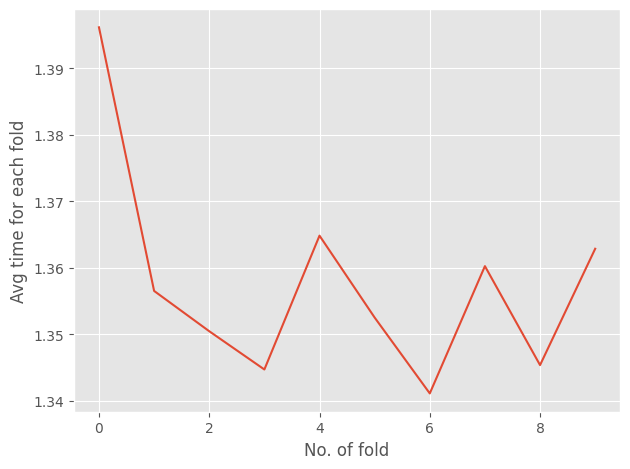

In [20]:
import matplotlib.pyplot as plt

times_mnv2_n = np.zeros((10,100))
for i, row in enumerate(times_mnv2):
    times_mnv2_n[i, :len(row)] = row

times_mnv2_n_n = np.mean(times_mnv2_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_mnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("mnv2 times")
plt.show()

In [21]:
train_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_mnv2):
    train_acc_mnv2_n[i, :len(row)] = row
    
test_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_mnv2):
    test_acc_mnv2_n[i, :len(row)] = row
    
train_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_mnv2):
    train_loss_mnv2_n[i, :len(row)] = row
    
test_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_mnv2):
    test_loss_mnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_mnv2_n = np.mean(train_acc_mnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_mnv2_n = np.mean(test_acc_mnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_mnv2_n = np.mean(train_loss_mnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_mnv2_n = np.mean(test_loss_mnv2_n,axis=0)

In [22]:
data = [train_acc_mnv2_n,test_acc_mnv2_n,train_loss_mnv2_n,test_loss_mnv2_n]

df = pd.DataFrame(data)
df.to_csv('mnv2_acc', index=False)
df = pd.read_csv('mnv2_acc')

train_acc_mnv2_n = df.iloc[0]
test_acc_mnv2_n = df.iloc[1]
train_loss_mnv2_n = df.iloc[2]
test_loss_mnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_mnv2_n_n])
df_t.to_csv('mnv2_times', index=False)
df_t = pd.read_csv('mnv2_times')

times_mnv2_n_n = df_t.iloc[0]

In [23]:
train_acc_mnv2_n

0     0.404007
1     0.454783
2     0.464105
3     0.467825
4     0.473794
        ...   
95    0.582543
96    0.588062
97    0.584424
98    0.589125
99    0.587612
Name: 0, Length: 100, dtype: float64

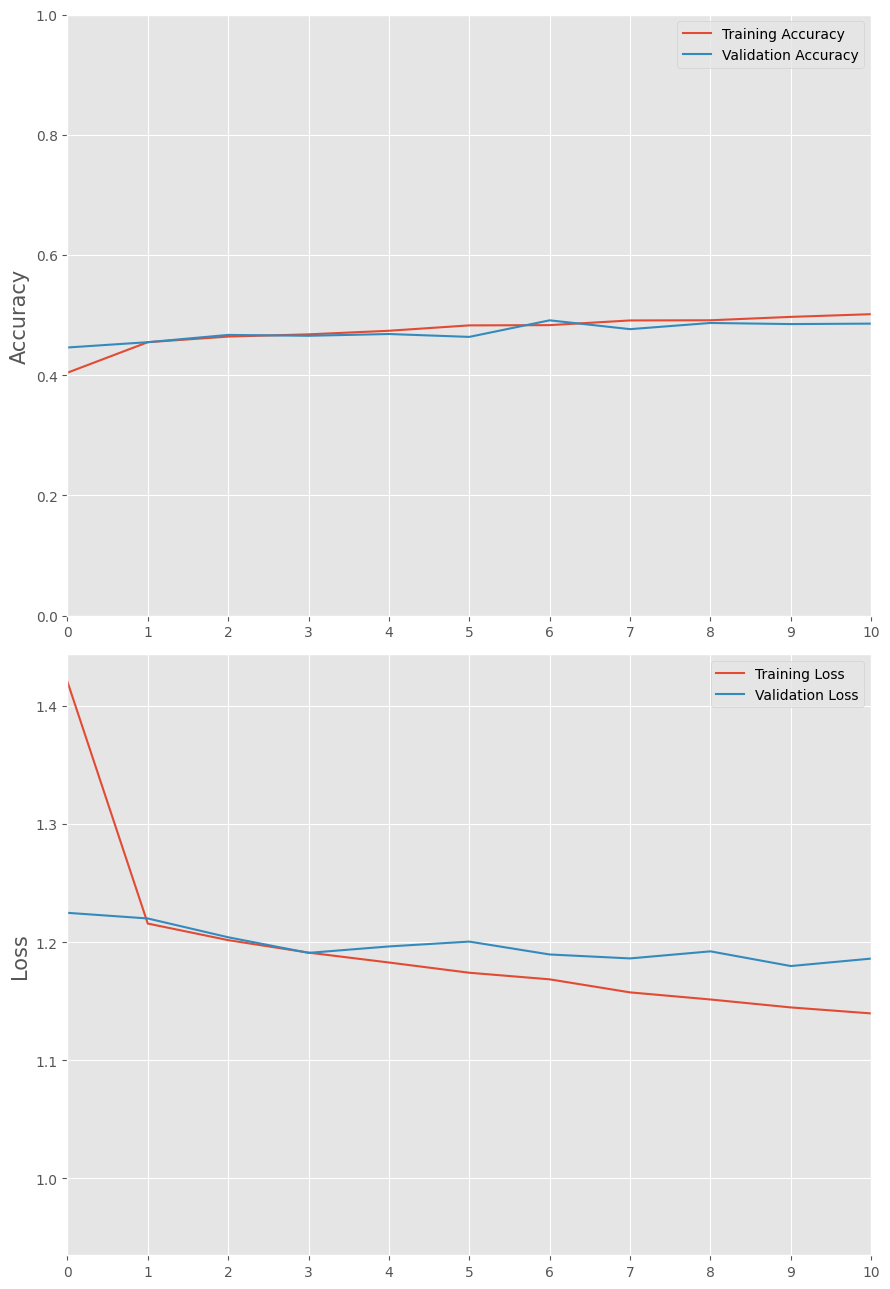

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_mnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_mnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_mnv2_n, label='Training Loss')
axs[1].plot(test_loss_mnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("mnv2 Training and Testing Loss")
plt.show()

In [25]:
np.array(scores_mnv2).shape

(10, 302, 4)

In [26]:
y_pred_mnv2 = np.argmax(scores_mnv2,axis=2)

In [27]:
y_pred_mnv2.shape

(10, 302)

In [28]:
from sklearn.metrics import accuracy_score
acc_scores_mnv2 = []
for i in range(len(y_test_all_mnv2)):
    acc_scores_mnv2.append(accuracy_score(y_true = y_test_all_mnv2[i],y_pred = y_pred_mnv2[i]))

In [29]:
import gc
gc.collect()

3300

In [30]:
acc_scores_mnv2

[0.5231788079470199,
 0.4867549668874172,
 0.5066225165562914,
 0.5099337748344371,
 0.4602649006622517,
 0.46357615894039733,
 0.4768211920529801,
 0.47019867549668876,
 0.48013245033112584,
 0.5066225165562914]

In [31]:
df_acc = pd.DataFrame([acc_scores_mnv2])

df_acc.to_csv('mnv2_accuracy', index=False)

df_acc = pd.read_csv('mnv2_accuracy')

acc_scores_mnv2 = df_acc.iloc[0].values

In [32]:
y_test_all_n = np.array(y_test_all_mnv2)

y_pred_mnv2_n = y_pred_mnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

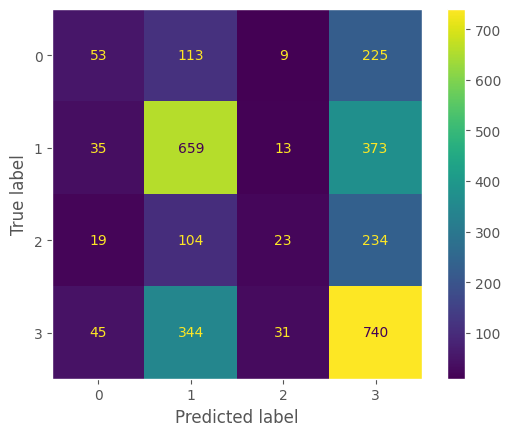

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_mnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("mnv2")

plt.show()

In [34]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_mnv2_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.35      0.13      0.19       400
           1       0.54      0.61      0.57      1080
           2       0.30      0.06      0.10       380
           3       0.47      0.64      0.54      1160

    accuracy                           0.49      3020
   macro avg       0.42      0.36      0.35      3020
weighted avg       0.46      0.49      0.45      3020



# XceptionV3

In [35]:
import gc
gc.collect()

15

In [36]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_xv3 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_xv3.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [37]:
import gc
gc.collect()

5

In [38]:
def create_model_xv3():
    
    model_xv3 = tf.keras.models.Sequential([
    tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_xv3.trainable = False
    return model_xv3

In [39]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xv3 = []
y_test_all_xv3 = []
train_acc_xv3 = []
test_acc_xv3 = []
train_loss_xv3 = []
test_loss_xv3 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_xv3.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_xv3 = None
    model_xv3 = create_model_xv3()
        
    model_xv3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_xv3.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_xv3.predict(X_test)
    
    scores_xv3.append(x)
    train_acc_xv3.append(history.history["accuracy"])
    test_acc_xv3.append(history.history["val_accuracy"])
    train_loss_xv3.append(history.history["loss"])
    test_loss_xv3.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 5s 51ms/step - loss: 1.4320 - accuracy: 0.2400 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4349 - accuracy: 0.2355 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4361 - accuracy: 0.2363 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4321 - accuracy: 0.2351 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4359 - accuracy: 0.2302 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4317 - accuracy: 0.2363 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Time taken for epoch 29: 3.18 seconds
77/77 [==============================] - 3s 41ms/step - loss: 1.4364 - accuracy: 0.2339 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4347 - accuracy: 0.2400 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4340 - accuracy: 0.2388 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4344 - accuracy: 0.2281 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4327 - accuracy: 0.2355 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4355 - accuracy: 0.2359 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4361 - accuracy: 0.2351 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4330 - accuracy: 0.2371 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4344 - accuracy: 0.2400 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4333 - accuracy: 0.2379 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4356 - accuracy: 0.2351 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4313 - accuracy: 0.2330 - val_loss: 1.4223 - val_accuracy: 0.2610 - lr: 2.5600e-09
Epoch 64/100
77/77 [====================

Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 1.4587 - accuracy: 0.1887
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.17 seconds
77/77 [==============================] - 3s 41ms/step - loss: 1.4587 - accuracy: 0.1885 - val_loss: 1.4922 - val_accuracy: 0.1618 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4536 - accuracy: 0.1934 - val_loss: 1.4922 - val_accuracy: 0.1618 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4546 - accuracy: 0.1954 - val_loss: 1.4922 - val_accuracy: 0.1618 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4584 - accuracy: 0.1885 - val_loss: 1.4922 - val_accuracy: 0.1618 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4545 - accuracy: 0.1877 - val_loss: 1.4922 - val_accuracy: 0.1618 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 1.4550 - accuracy: 0.1908
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.20 seconds
77/77 [==============================] - 3s 41ms/step - loss: 1.4566 - accuracy: 0.1897 - val_loss: 1.4922 - val_accuracy: 0.1618 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4618 - accuracy: 0.1942 - val_loss: 1.4922 - val_accuracy: 0.1618 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4577 - accuracy: 0.1852 - val_loss: 1.4922 - val_accuracy: 0.1618 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4560 - accuracy: 0.1860 - val_loss: 1.4922 - val_accuracy: 0.1618 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4586 - accuracy: 0.1811 - val_loss: 1.4922 - val_accuracy: 0.1618 - lr: 1.0240e-10
Epoch 76/100
7

77/77 [==============================] - 3s 42ms/step - loss: 1.4047 - accuracy: 0.2163 - val_loss: 1.3820 - val_accuracy: 0.1912 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3959 - accuracy: 0.2208 - val_loss: 1.3820 - val_accuracy: 0.1912 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.4035 - accuracy: 0.2118
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.19 seconds
77/77 [==============================] - 3s 41ms/step - loss: 1.4033 - accuracy: 0.2122 - val_loss: 1.3820 - val_accuracy: 0.1912 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4025 - accuracy: 0.2052 - val_loss: 1.3820 - val_accuracy: 0.1912 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4042 - accuracy: 0.2138 - val_loss: 1.3820 - val_accuracy: 0.1912 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 3s 42ms/step - loss: 1.4036 - accuracy: 0.2101 - val_loss: 1.3820 - val_accuracy: 0.1912 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 42ms/step - loss: 1.3984 - accuracy: 0.2232 - val_loss: 1.3820 - val_accuracy: 0.1912 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 1.3964 - accuracy: 0.2159
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.17 seconds
77/77 [==============================] - 3s 41ms/step - loss: 1.3959 - accuracy: 0.2163 - val_loss: 1.3820 - val_accuracy: 0.1912 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 42ms/step - loss: 1.3986 - accuracy: 0.2208 - val_loss: 1.3820 - val_accuracy: 0.1912 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3996 - accuracy: 0.2224 - val_loss: 1.3820 - val_accuracy: 0.1912 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 3s 42ms/step - loss: 1.5266 - accuracy: 0.1468 - val_loss: 1.5230 - val_accuracy: 0.1507 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 3s 42ms/step - loss: 1.5256 - accuracy: 0.1492 - val_loss: 1.5230 - val_accuracy: 0.1507 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 3s 42ms/step - loss: 1.5299 - accuracy: 0.1464 - val_loss: 1.5230 - val_accuracy: 0.1507 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5280 - accuracy: 0.1537 - val_loss: 1.5230 - val_accuracy: 0.1507 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 1.5295 - accuracy: 0.1451
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 3.21 seconds
77/77 [==============================] - 3s 42ms/step - loss: 1.5292 - accuracy: 0.1447 - val_loss: 1.5230 - val_accuracy: 0.1507 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 3s 42ms/step - loss: 1.5358 - accuracy: 0.1513 - val_loss: 1.5230 - val_accuracy: 0.1507 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 3s 42ms/step - loss: 1.5283 - accuracy: 0.1500 - val_loss: 1.5230 - val_accuracy: 0.1507 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5286 - accuracy: 0.1496 - val_loss: 1.5230 - val_accuracy: 0.1507 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 42ms/step - loss: 1.5295 - accuracy: 0.1492 - val_loss: 1.5230 - val_accuracy: 0.1507 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.5243 - accuracy: 0.1545
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.20 seconds
77/77 [==============================] - 3s 42ms/step - loss: 1.5243 - accuracy: 0.1545 - val_loss: 1.5230 - val_accuracy: 0.1507 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 3s 42ms/step - loss: 1.5213 - accuracy: 0.1738 - val_loss: 1.5171 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 3s 42ms/step - loss: 1.5247 - accuracy: 0.1664 - val_loss: 1.5171 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 3s 42ms/step - loss: 1.5265 - accuracy: 0.1643 - val_loss: 1.5171 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5247 - accuracy: 0.1729 - val_loss: 1.5171 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 42ms/step - loss: 1.5254 - accuracy: 0.1648 - val_loss: 1.5171 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 42ms/step - loss: 1.5237 - accuracy: 0.1668 - val_loss: 1.5171 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] -

77/77 [==============================] - 3s 41ms/step - loss: 1.4371 - accuracy: 0.2167 - val_loss: 1.4218 - val_accuracy: 0.2022 - lr: 0.0010
Epoch 8/100
75/77 [============================>.] - ETA: 0s - loss: 1.4357 - accuracy: 0.2142
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 3.15 seconds
77/77 [==============================] - 3s 41ms/step - loss: 1.4363 - accuracy: 0.2142 - val_loss: 1.4218 - val_accuracy: 0.2022 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4338 - accuracy: 0.2306 - val_loss: 1.4218 - val_accuracy: 0.2022 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4335 - accuracy: 0.2228 - val_loss: 1.4218 - val_accuracy: 0.2022 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4297 - accuracy: 0.2171 - val_loss: 1.4218 - val_accuracy: 0.2022 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 3s 42ms/step - loss: 1.4334 - accuracy: 0.2191 - val_loss: 1.4218 - val_accuracy: 0.2022 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.4342 - accuracy: 0.2241
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 3.19 seconds
77/77 [==============================] - 3s 41ms/step - loss: 1.4345 - accuracy: 0.2240 - val_loss: 1.4218 - val_accuracy: 0.2022 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4305 - accuracy: 0.2155 - val_loss: 1.4218 - val_accuracy: 0.2022 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4343 - accuracy: 0.2261 - val_loss: 1.4218 - val_accuracy: 0.2022 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4305 - accuracy: 0.2249 - val_loss: 1.4218 - val_accuracy: 0.2022 - lr: 5.1200e-10
Epoch 68/100
77/7

77/77 [==============================] - 3s 41ms/step - loss: 1.5259 - accuracy: 0.1480 - val_loss: 1.5174 - val_accuracy: 0.1250 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5224 - accuracy: 0.1472 - val_loss: 1.5174 - val_accuracy: 0.1250 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5253 - accuracy: 0.1431 - val_loss: 1.5174 - val_accuracy: 0.1250 - lr: 4.0000e-05
Epoch 22/100
76/77 [============================>.] - ETA: 0s - loss: 1.5233 - accuracy: 0.1439
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 3.18 seconds
77/77 [==============================] - 3s 41ms/step - loss: 1.5236 - accuracy: 0.1431 - val_loss: 1.5174 - val_accuracy: 0.1250 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 3s 42ms/step - loss: 1.5259 - accuracy: 0.1410 - val_loss: 1.5174 - val_accuracy: 0.1250 - lr: 8.0000e-06
Epoch 24/100
77

77/77 [==============================] - 3s 42ms/step - loss: 1.5252 - accuracy: 0.1451 - val_loss: 1.5174 - val_accuracy: 0.1250 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5311 - accuracy: 0.1427 - val_loss: 1.5174 - val_accuracy: 0.1250 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5233 - accuracy: 0.1447 - val_loss: 1.5174 - val_accuracy: 0.1250 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 1.5259 - accuracy: 0.1460
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 3.20 seconds
77/77 [==============================] - 3s 42ms/step - loss: 1.5255 - accuracy: 0.1468 - val_loss: 1.5174 - val_accuracy: 0.1250 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5242 - accuracy: 0.1431 - val_loss: 1.5174 - val_accuracy: 0.1250 - lr: 2.0480e-11
Epoch 80/100
7

Epoch 3/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4906 - accuracy: 0.2420 - val_loss: 1.4363 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4875 - accuracy: 0.2314 - val_loss: 1.4363 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4901 - accuracy: 0.2334 - val_loss: 1.4363 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4878 - accuracy: 0.2428 - val_loss: 1.4363 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4877 - accuracy: 0.2412 - val_loss: 1.4363 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.4880 - accuracy: 0.2430
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 3.17 seconds
77/77 [=========

77/77 [==============================] - 3s 42ms/step - loss: 1.4853 - accuracy: 0.2445 - val_loss: 1.4363 - val_accuracy: 0.2721 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4863 - accuracy: 0.2428 - val_loss: 1.4363 - val_accuracy: 0.2721 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4844 - accuracy: 0.2437 - val_loss: 1.4363 - val_accuracy: 0.2721 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4863 - accuracy: 0.2339 - val_loss: 1.4363 - val_accuracy: 0.2721 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 42ms/step - loss: 1.4917 - accuracy: 0.2339 - val_loss: 1.4363 - val_accuracy: 0.2721 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.4859 - accuracy: 0.2375
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 3.21 seconds
77/7

Time taken for epoch 15: 3.17 seconds
77/77 [==============================] - 3s 41ms/step - loss: 1.3541 - accuracy: 0.3463 - val_loss: 1.3509 - val_accuracy: 0.3419 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3545 - accuracy: 0.3336 - val_loss: 1.3509 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3545 - accuracy: 0.3324 - val_loss: 1.3509 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3541 - accuracy: 0.3430 - val_loss: 1.3509 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3557 - accuracy: 0.3422 - val_loss: 1.3509 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3515 - accuracy: 0.3438 - val_loss: 1.3509 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 21/100
77

Epoch 44/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3577 - accuracy: 0.3340 - val_loss: 1.3509 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 42ms/step - loss: 1.3553 - accuracy: 0.3332 - val_loss: 1.3509 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 3s 42ms/step - loss: 1.3515 - accuracy: 0.3410 - val_loss: 1.3509 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 3s 41ms/step - loss: 1.3540 - accuracy: 0.3446 - val_loss: 1.3509 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 3s 42ms/step - loss: 1.3582 - accuracy: 0.3418 - val_loss: 1.3509 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 3s 42ms/step - loss: 1.3510 - accuracy: 0.3406 - val_loss: 1.3509 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 50/100
76/77 [====================

10/10 [==============================] - 1s 37ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 5s 48ms/step - loss: 1.5226 - accuracy: 0.1365 - val_loss: 1.5314 - val_accuracy: 0.1103 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5249 - accuracy: 0.1472 - val_loss: 1.5314 - val_accuracy: 0.1103 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5214 - accuracy: 0.1419 - val_loss: 1.5314 - val_accuracy: 0.1103 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5197 - accuracy: 0.1460 - val_loss: 1.5314 - val_accuracy: 0.1103 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5267 - accuracy: 0.1455 - val_loss: 1.5314 - val_accuracy: 0.1103 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5205 - accuracy: 0.1386 - val_loss: 1.5314 - val_accuracy: 0.1103 - l

Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.5185 - accuracy: 0.1427
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.21 seconds
77/77 [==============================] - 3s 42ms/step - loss: 1.5185 - accuracy: 0.1427 - val_loss: 1.5314 - val_accuracy: 0.1103 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5180 - accuracy: 0.1476 - val_loss: 1.5314 - val_accuracy: 0.1103 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5267 - accuracy: 0.1406 - val_loss: 1.5314 - val_accuracy: 0.1103 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5200 - accuracy: 0.1435 - val_loss: 1.5314 - val_accuracy: 0.1103 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5200 - accuracy: 0.1419 - val_loss: 1.5314 - val_accuracy: 0.1103 - lr: 1.6000e-06
E

76/77 [============================>.] - ETA: 0s - loss: 1.5272 - accuracy: 0.1423
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.21 seconds
77/77 [==============================] - 3s 42ms/step - loss: 1.5268 - accuracy: 0.1423 - val_loss: 1.5314 - val_accuracy: 0.1103 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 42ms/step - loss: 1.5222 - accuracy: 0.1525 - val_loss: 1.5314 - val_accuracy: 0.1103 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5221 - accuracy: 0.1468 - val_loss: 1.5314 - val_accuracy: 0.1103 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5191 - accuracy: 0.1443 - val_loss: 1.5314 - val_accuracy: 0.1103 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 42ms/step - loss: 1.5239 - accuracy: 0.1398 - val_loss: 1.5314 - val_accuracy: 0.1103 - lr: 4.0960e-12
Epoch 90/100
77

In [40]:
np.array(y_test_all_xv3).shape

(10, 302)

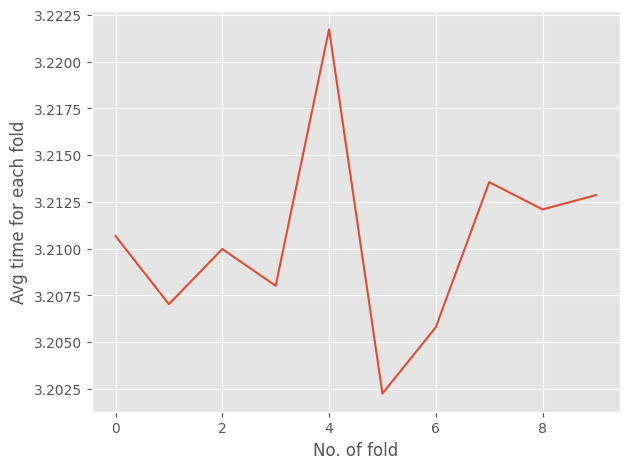

In [41]:
import matplotlib.pyplot as plt

times_xv3_n = np.zeros((10,100))
for i, row in enumerate(times_xv3):
    times_xv3_n[i, :len(row)] = row

times_xv3_n_n = np.mean(times_xv3_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_xv3_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xv3 times")
plt.show()

In [42]:
train_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_acc_xv3):
    train_acc_xv3_n[i, :len(row)] = row
    
test_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_acc_xv3):
    test_acc_xv3_n[i, :len(row)] = row
    
train_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_loss_xv3):
    train_loss_xv3_n[i, :len(row)] = row
    
test_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_loss_xv3):
    test_loss_xv3_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_xv3_n = np.mean(train_acc_xv3_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_xv3_n = np.mean(test_acc_xv3_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_xv3_n = np.mean(train_loss_xv3_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_xv3_n = np.mean(test_loss_xv3_n,axis=0)

In [43]:
import gc
gc.collect()

3673

In [44]:
data = [train_acc_xv3_n,test_acc_xv3_n,train_loss_xv3_n,test_loss_xv3_n]

df = pd.DataFrame(data)
df.to_csv('xv3_acc', index=False)
df = pd.read_csv('xv3_acc')

train_acc_xv3_n = df.iloc[0]
test_acc_xv3_n = df.iloc[1]
train_loss_xv3_n = df.iloc[2]
test_loss_xv3_n = df.iloc[3]


df_t = pd.DataFrame([times_xv3_n_n])
df_t.to_csv('xv3_times', index=False)
df_t = pd.read_csv('xv3_times')

times_xv3_n_n = df_t.iloc[0]

In [45]:
train_acc_xv3_n

0     0.204988
1     0.205969
2     0.204865
3     0.205233
4     0.202371
        ...   
95    0.207686
96    0.203475
97    0.204865
98    0.206132
99    0.202780
Name: 0, Length: 100, dtype: float64

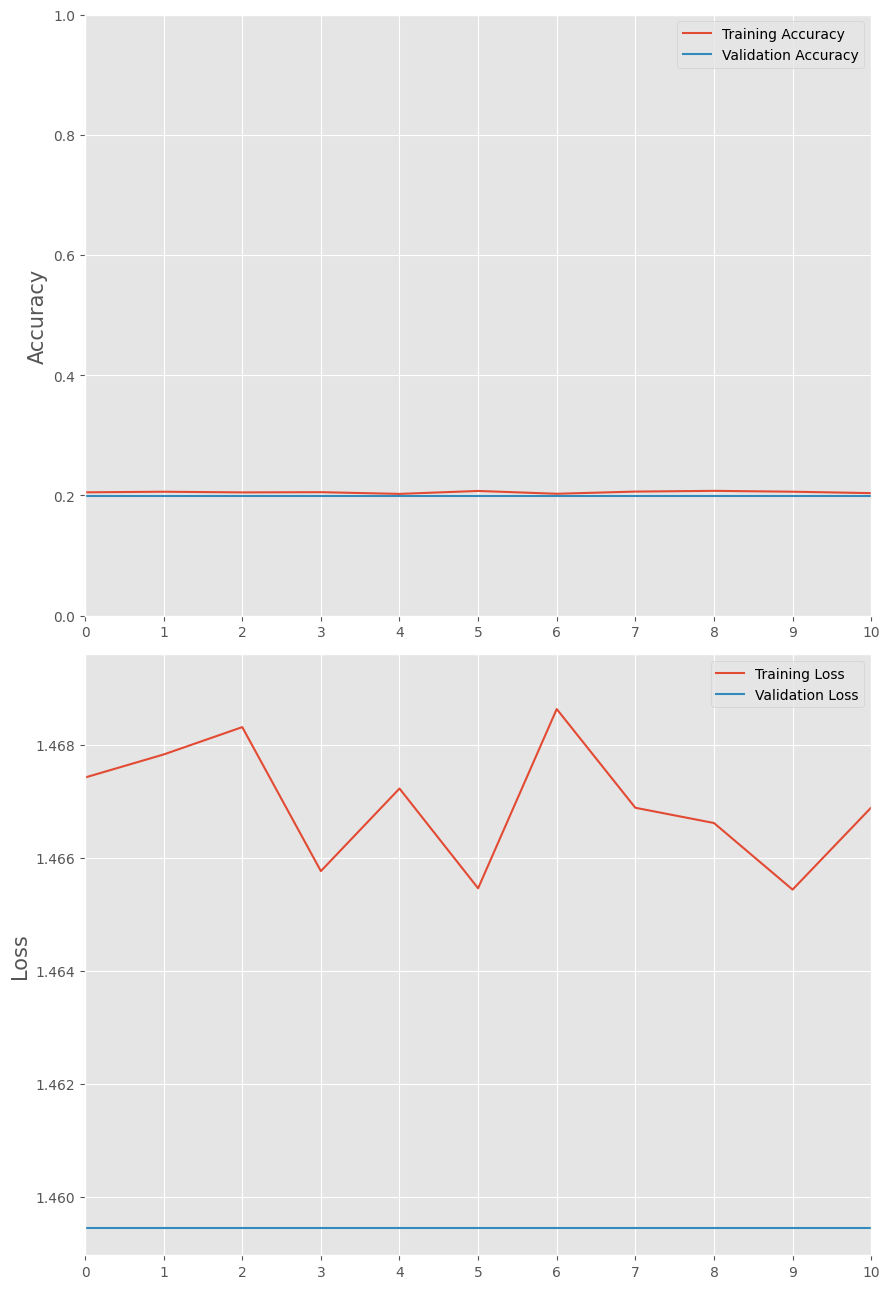

In [46]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_xv3_n, label='Training Accuracy')
axs[0].plot(test_acc_xv3_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_xv3_n, label='Training Loss')
axs[1].plot(test_loss_xv3_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("xv3 Training and Testing Loss")
plt.show()

In [47]:
np.array(scores_xv3).shape

(10, 302, 4)

In [48]:
y_pred_xv3 = np.argmax(scores_xv3,axis=2)

In [49]:
y_pred_xv3.shape

(10, 302)

In [50]:
from sklearn.metrics import accuracy_score
acc_scores_xv3 = []
for i in range(len(y_test_all_xv3)):
    acc_scores_xv3.append(accuracy_score(y_true = y_test_all_xv3[i],y_pred = y_pred_xv3[i]))

In [51]:
import gc
gc.collect()

23677

In [52]:
acc_scores_xv3

[0.24834437086092714,
 0.16887417218543047,
 0.19205298013245034,
 0.10264900662251655,
 0.1456953642384106,
 0.20860927152317882,
 0.1291390728476821,
 0.23178807947019867,
 0.304635761589404,
 0.1423841059602649]

In [53]:
df_acc = pd.DataFrame([acc_scores_xv3])

df_acc.to_csv('xv3_accuracy', index=False)

df_acc = pd.read_csv('xv3_accuracy')

acc_scores_xv3 = df_acc.iloc[0].values

In [54]:
y_test_all_n = np.array(y_test_all_xv3)

y_pred_xv3_n = y_pred_xv3.flatten()
y_test_all_n = y_test_all_n.flatten()

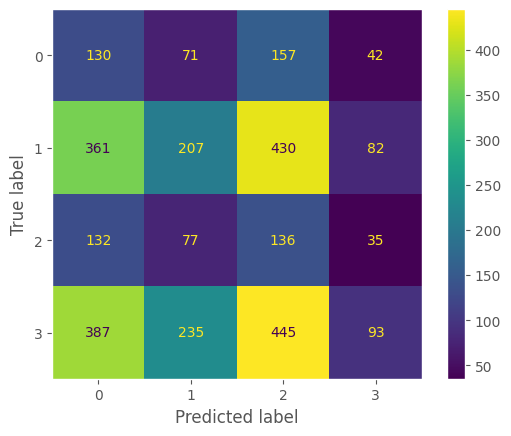

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_xv3_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("xv3")
plt.show()

In [56]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_xv3_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.33      0.18       400
           1       0.35      0.19      0.25      1080
           2       0.12      0.36      0.18       380
           3       0.37      0.08      0.13      1160

    accuracy                           0.19      3020
   macro avg       0.24      0.24      0.18      3020
weighted avg       0.30      0.19      0.19      3020



# EfficientNetV2L

In [15]:
import gc
gc.collect()

0

In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_env2l = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_env2l.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [17]:
def create_model_env2l():
    
    model_env2l = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetV2L(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_env2l.trainable = False
    return model_env2l

In [18]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_env2l = []
y_test_all_env2l = []
train_acc_env2l = []
test_acc_env2l = []
train_loss_env2l = []
test_loss_env2l = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_env2l.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_env2l = None
    model_env2l = create_model_env2l()
        
    model_env2l.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_env2l.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_env2l.predict(X_test)
    
    scores_env2l.append(x)
    train_acc_env2l.append(history.history["accuracy"])
    test_acc_env2l.append(history.history["val_accuracy"])
    train_loss_env2l.append(history.history["loss"])
    test_loss_env2l.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 42s 241ms/step - loss: 1.4023 - accuracy: 0.2212 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 174ms/step - loss: 1.4008 - accuracy: 0.2294 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 175ms/step - loss: 1.4010 - accuracy: 0.2261 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 174ms/step - loss: 1.3986 - accuracy: 0.2355 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 13s 173ms/step - loss: 1.3993 - accuracy: 0.2228 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 173ms/step - loss: 1.3988 - accuracy: 0.2371 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3993 - accuracy: 0.2367
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.51 seconds
77/77 [==============================] - 14s 176ms/step - loss: 1.3993 - accuracy: 0.2367 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 13s 174ms/step - loss: 1.4010 - accuracy: 0.2298 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 173ms/step - loss: 1.4016 - accuracy: 0.2204 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 175ms/step - loss: 1.4002 - accuracy: 0.2400 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3998 - accuracy: 0.2294 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4005 - accuracy: 0.2281
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.41 seconds
77/77 [==============================] - 13s 174ms/step - loss: 1.4005 - accuracy: 0.2281 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 13s 175ms/step - loss: 1.4001 - accuracy: 0.2244 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3999 - accuracy: 0.2257 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3985 - accuracy: 0.2339 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3993 - accuracy: 0.2404 - val_loss: 1.4032 - val_accuracy: 0.1875 - lr: 4.

Epoch 13/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3801 - accuracy: 0.2150 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3824 - accuracy: 0.2048 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3801 - accuracy: 0.2187
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 13.47 seconds
77/77 [==============================] - 13s 175ms/step - loss: 1.3801 - accuracy: 0.2187 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3842 - accuracy: 0.2032 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3807 - accuracy: 0.2146 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 4

Epoch 41/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3823 - accuracy: 0.2093 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3826 - accuracy: 0.2048 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.3820 - accuracy: 0.2020
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 13.68 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.3820 - accuracy: 0.2020 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3814 - accuracy: 0.2122 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3803 - accuracy: 0.2163 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 6.

Epoch 69/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3823 - accuracy: 0.2105 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3824 - accuracy: 0.2048 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.3804 - accuracy: 0.2200
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 13.54 seconds
77/77 [==============================] - 14s 176ms/step - loss: 1.3804 - accuracy: 0.2200 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3817 - accuracy: 0.2114 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3818 - accuracy: 0.2179 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 1

Epoch 97/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3832 - accuracy: 0.2105 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3819 - accuracy: 0.2150 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.3834 - accuracy: 0.2024
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 13.69 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.3834 - accuracy: 0.2024 - val_loss: 1.3809 - val_accuracy: 0.1507 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 146ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 30s 214ms/step - loss: 1.3994 - accuracy: 0.2146 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 14s 178ms/

Epoch 25/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3990 - accuracy: 0.2044 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3976 - accuracy: 0.2044 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3979 - accuracy: 0.2118 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4008 - accuracy: 0.1905 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.3993 - accuracy: 0.2016
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.68 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.3993 - accuracy: 0.2016 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 8

Epoch 53/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4004 - accuracy: 0.2056 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4004 - accuracy: 0.2036 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4016 - accuracy: 0.2065 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3990 - accuracy: 0.2114 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3996 - accuracy: 0.2150
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.48 seconds
77/77 [==============================] - 13s 175ms/step - loss: 1.3996 - accuracy: 0.2150 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 1

Epoch 81/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4008 - accuracy: 0.2110 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4008 - accuracy: 0.1995 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3988 - accuracy: 0.2138 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3984 - accuracy: 0.2052 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3989 - accuracy: 0.2122
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.77 seconds
77/77 [==============================] - 14s 179ms/step - loss: 1.3989 - accuracy: 0.2122 - val_loss: 1.3879 - val_accuracy: 0.2059 - lr: 2.

Epoch 9/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3814 - accuracy: 0.2719 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3818 - accuracy: 0.2899 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3845 - accuracy: 0.2690 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3823 - accuracy: 0.2756 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3833 - accuracy: 0.2711 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3823 - accuracy: 0.2780 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3834 - accuracy: 0.2780 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3835 - accuracy: 0.2760 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3817 - accuracy: 0.2809 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3823 - accuracy: 0.2784 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3825 - accuracy: 0.2682 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3825 - accuracy: 0.2702 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 65/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3815 - accuracy: 0.2743 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3816 - accuracy: 0.2825 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3836 - accuracy: 0.2780 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3814 - accuracy: 0.2800 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3827 - accuracy: 0.2850 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3806 - accuracy: 0.2833 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 71/100
77/77 [========

Epoch 93/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3836 - accuracy: 0.2788 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3814 - accuracy: 0.2690 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3823 - accuracy: 0.2784 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3823 - accuracy: 0.2739 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3828 - accuracy: 0.2796 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3832 - accuracy: 0.2858 - val_loss: 1.3704 - val_accuracy: 0.3676 - lr: 8.1920e-13
Epoch 99/100
77/77 [========

77/77 [==============================] - 14s 178ms/step - loss: 1.4205 - accuracy: 0.1738 - val_loss: 1.4037 - val_accuracy: 0.1471 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.4182 - accuracy: 0.1713
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 13.55 seconds
77/77 [==============================] - 14s 176ms/step - loss: 1.4182 - accuracy: 0.1713 - val_loss: 1.4037 - val_accuracy: 0.1471 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4203 - accuracy: 0.1701 - val_loss: 1.4037 - val_accuracy: 0.1471 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4184 - accuracy: 0.1791 - val_loss: 1.4037 - val_accuracy: 0.1471 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4176 - accuracy: 0.1762 - val_loss: 1.4037 - val_accuracy: 0.1471 - lr: 8.0000e-06
Epoc

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
import matplotlib.pyplot as plt

times_env2l_n = np.zeros((10,100))
for i, row in enumerate(times_env2l):
    times_env2l_n[i, :len(row)] = row

times_env2l_n_n = np.mean(times_env2l_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_env2l_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("env2l times")
plt.show()

In [20]:
train_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_acc_env2l):
    train_acc_env2l_n[i, :len(row)] = row
    
test_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_acc_env2l):
    test_acc_env2l_n[i, :len(row)] = row
    
train_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_loss_env2l):
    train_loss_env2l_n[i, :len(row)] = row
    
test_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_loss_env2l):
    test_loss_env2l_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_env2l_n = np.mean(train_acc_env2l_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_env2l_n = np.mean(test_acc_env2l_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_env2l_n = np.mean(train_loss_env2l_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_env2l_n = np.mean(test_loss_env2l_n,axis=0)

In [21]:
data = [train_acc_env2l_n,test_acc_env2l_n,train_loss_env2l_n,test_loss_env2l_n]

df = pd.DataFrame(data)
df.to_csv('env2l_acc', index=False)
df = pd.read_csv('env2l_acc')

train_acc_env2l_n = df.iloc[0]
test_acc_env2l_n = df.iloc[1]
train_loss_env2l_n = df.iloc[2]
test_loss_env2l_n = df.iloc[3]


df_t = pd.DataFrame([times_env2l_n_n])
df_t.to_csv('env2l_times', index=False)
df_t = pd.read_csv('env2l_times')

times_env2l_n_n = df_t.iloc[0]

In [22]:
train_acc_env2l_n

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_env2l_n, label='Training Accuracy')
axs[0].plot(test_acc_env2l_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_env2l_n, label='Training Loss')
axs[1].plot(test_loss_env2l_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("env2l Training and Testing Loss")
plt.show()

In [24]:
np.array(scores_env2l).shape

In [25]:
y_pred_env2l = np.argmax(scores_env2l,axis=2)

In [26]:
y_pred_env2l.shape

In [27]:
from sklearn.metrics import accuracy_score
acc_scores_env2l = []
for i in range(len(y_test_all_env2l)):
    acc_scores_env2l.append(accuracy_score(y_true = y_test_all_env2l[i],y_pred = y_pred_env2l[i]))

In [28]:
import gc
gc.collect()

In [29]:
acc_scores_env2l

In [30]:
df_acc = pd.DataFrame([acc_scores_env2l])

df_acc.to_csv('env2l_accuracy', index=False)

df_acc = pd.read_csv('env2l_accuracy')

acc_scores_env2l = df_acc.iloc[0].values

In [31]:
y_test_all_n = np.array(y_test_all_env2l)

y_pred_env2l_n = y_pred_env2l.flatten()
y_test_all_n = y_test_all_n.flatten()

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_env2l_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("env2l")

plt.show()

In [33]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_env2l_n)
print(cf_r)

# NasNetLarge

In [34]:
import gc
gc.collect()

In [35]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnl = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnl.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [36]:
import gc
gc.collect()

In [37]:
def create_model_nnl():
    
    model_nnl = tf.keras.models.Sequential([
    tf.keras.applications.NASNetLarge(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnl.trainable = False
    return model_nnl

In [38]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnl = []
y_test_all_nnl = []
train_acc_nnl = []
test_acc_nnl = []
train_loss_nnl = []
test_loss_nnl = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_nnl.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnl = None
    model_nnl = create_model_nnl()
        
    model_nnl.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnl.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnl.predict(X_test)
    
    scores_nnl.append(x)
    train_acc_nnl.append(history.history["accuracy"])
    test_acc_nnl.append(history.history["val_accuracy"])
    train_loss_nnl.append(history.history["loss"])
    test_loss_nnl.append(history.history["val_loss"])
    
    gc.collect()

Time taken for epoch 47: 12.72 seconds
77/77 [==============================] - 13s 165ms/step - loss: 1.4095 - accuracy: 0.2702 - val_loss: 1.3898 - val_accuracy: 0.3235 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4068 - accuracy: 0.2702 - val_loss: 1.3898 - val_accuracy: 0.3235 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4114 - accuracy: 0.2514 - val_loss: 1.3898 - val_accuracy: 0.3235 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.4064 - accuracy: 0.2731
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 12.84 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.4064 - accuracy: 0.2731 - val_loss: 1.3898 - val_accuracy: 0.3235 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4088 - accuracy: 0.2625 - val_loss: 1.3898 - va

Epoch 3/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3798 - accuracy: 0.2743 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3772 - accuracy: 0.2862 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3750 - accuracy: 0.2817 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3810 - accuracy: 0.2694 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3761 - accuracy: 0.2821 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.3782 - accuracy: 0.2727
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 12.84 seconds
77/77

Epoch 31/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3780 - accuracy: 0.2715 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3771 - accuracy: 0.2751 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3769 - accuracy: 0.2903 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3784 - accuracy: 0.2784 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3793 - accuracy: 0.2854 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.3795 - accuracy: 0.2833
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for ep

Epoch 59/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3797 - accuracy: 0.2735 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3789 - accuracy: 0.2731 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3819 - accuracy: 0.2661 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3762 - accuracy: 0.2805 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3786 - accuracy: 0.2694 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.3815 - accuracy: 0.2694
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoc

Epoch 87/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3785 - accuracy: 0.2870 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3800 - accuracy: 0.2756 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3818 - accuracy: 0.2706 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3754 - accuracy: 0.2874 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3782 - accuracy: 0.2723 - val_loss: 1.3752 - val_accuracy: 0.2574 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.3788 - accuracy: 0.2747
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for ep

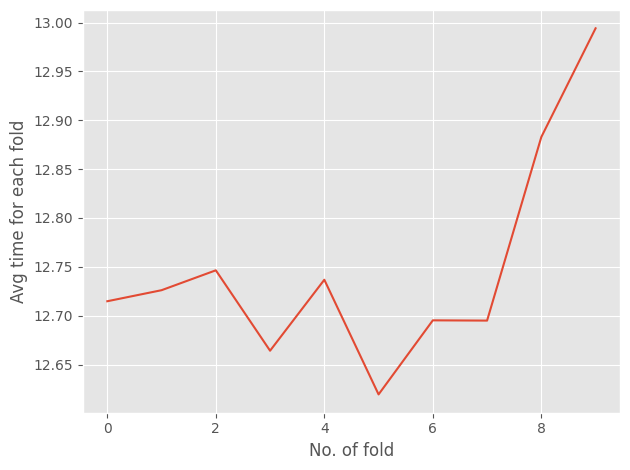

In [39]:
import matplotlib.pyplot as plt

times_nnl_n = np.zeros((10,100))
for i, row in enumerate(times_nnl):
    times_nnl_n[i, :len(row)] = row

times_nnl_n_n = np.mean(times_nnl_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnl_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnl times")
plt.show()

In [40]:
train_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnl):
    train_acc_nnl_n[i, :len(row)] = row
    
test_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnl):
    test_acc_nnl_n[i, :len(row)] = row
    
train_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnl):
    train_loss_nnl_n[i, :len(row)] = row
    
test_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnl):
    test_loss_nnl_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnl_n = np.mean(train_acc_nnl_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnl_n = np.mean(test_acc_nnl_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnl_n = np.mean(train_loss_nnl_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnl_n = np.mean(test_loss_nnl_n,axis=0)

In [41]:
data = [train_acc_nnl_n,test_acc_nnl_n,train_loss_nnl_n,test_loss_nnl_n]

df = pd.DataFrame(data)
df.to_csv('nnl_acc', index=False)
df = pd.read_csv('nnl_acc')

train_acc_nnl_n = df.iloc[0]
test_acc_nnl_n = df.iloc[1]
train_loss_nnl_n = df.iloc[2]
test_loss_nnl_n = df.iloc[3]


df_t = pd.DataFrame([times_nnl_n_n])
df_t.to_csv('nnl_times', index=False)
df_t = pd.read_csv('nnl_times')

times_nnl_n_n = df_t.iloc[0]

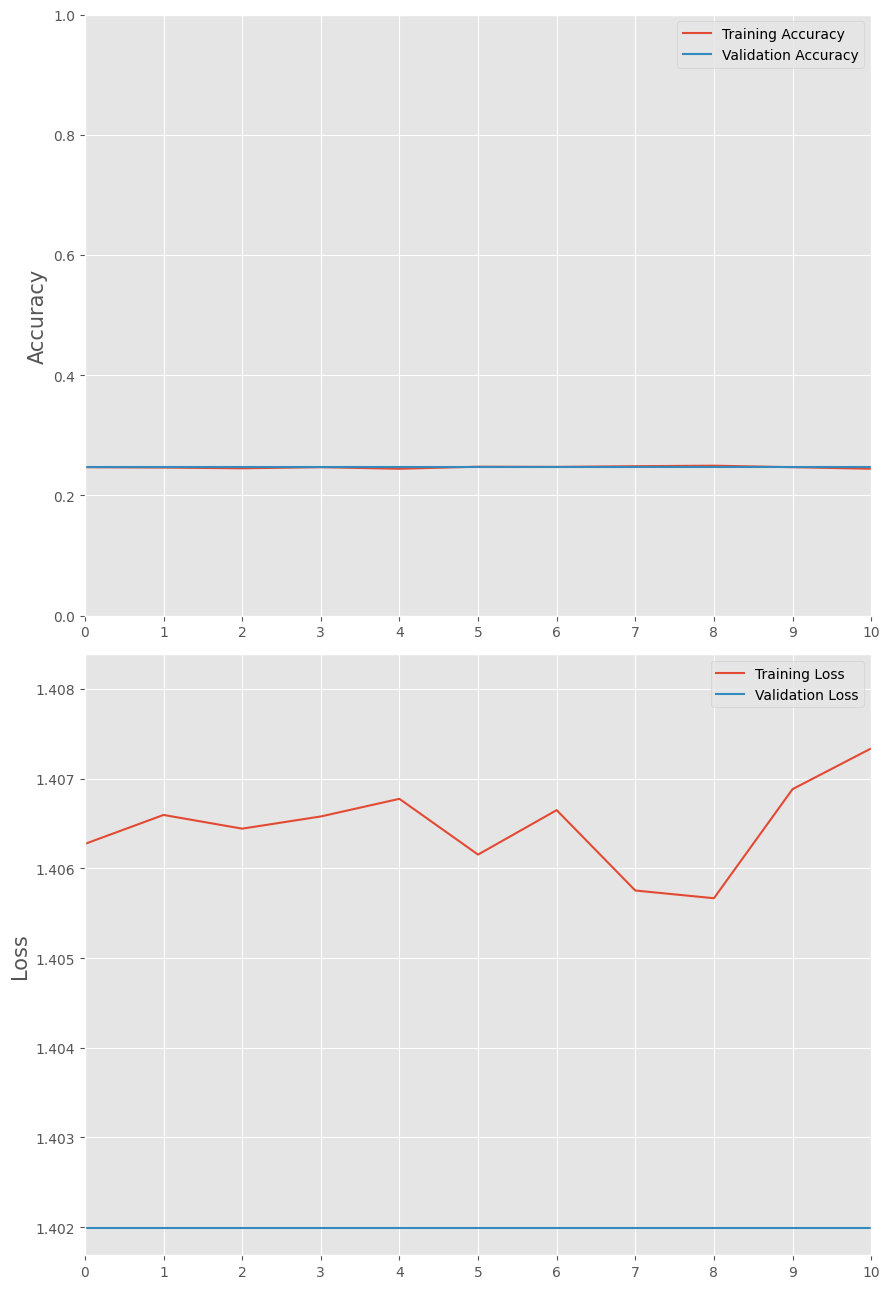

In [42]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnl_n, label='Training Accuracy')
axs[0].plot(test_acc_nnl_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnl_n, label='Training Loss')
axs[1].plot(test_loss_nnl_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnl Training and Testing Loss")
plt.show()

In [43]:
import gc
gc.collect()

23612

In [44]:
np.array(scores_nnl).shape

(10, 302, 4)

In [45]:
y_pred_nnl = np.argmax(scores_nnl,axis=2)

In [46]:
y_pred_nnl.shape

(10, 302)

In [47]:
from sklearn.metrics import accuracy_score
acc_scores_nnl = []
for i in range(len(y_test_all_nnl)):
    acc_scores_nnl.append(accuracy_score(y_true = y_test_all_nnl[i],y_pred = y_pred_nnl[i]))

In [48]:
acc_scores_nnl

[0.25165562913907286,
 0.30132450331125826,
 0.3211920529801324,
 0.12251655629139073,
 0.1986754966887417,
 0.19536423841059603,
 0.24503311258278146,
 0.2814569536423841,
 0.3079470198675497,
 0.26158940397350994]

In [49]:
df_acc = pd.DataFrame([acc_scores_nnl])

df_acc.to_csv('nnl_accuracy', index=False)

df_acc = pd.read_csv('nnl_accuracy')

acc_scores_nnl = df_acc.iloc[0].values

In [50]:
y_test_all_n = np.array(y_test_all_nnl)

y_pred_nnl_n = y_pred_nnl.flatten()
y_test_all_n = y_test_all_n.flatten()

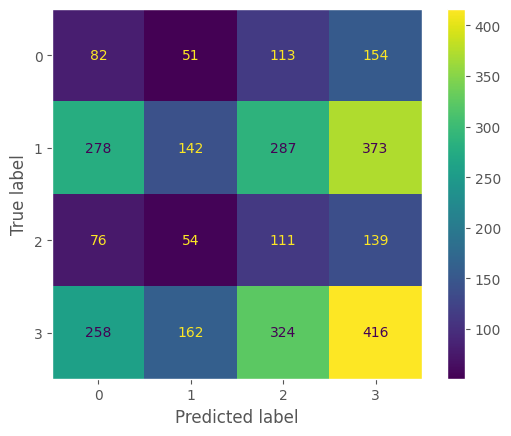

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnl_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnl")

plt.show()

In [52]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnl_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.12      0.20      0.15       400
           1       0.35      0.13      0.19      1080
           2       0.13      0.29      0.18       380
           3       0.38      0.36      0.37      1160

    accuracy                           0.25      3020
   macro avg       0.25      0.25      0.22      3020
weighted avg       0.30      0.25      0.25      3020



# NasNetMobile

In [53]:
import gc
gc.collect()

6421

In [54]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnb = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnb.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [55]:
def create_model_nnb():
    
    model_nnb = tf.keras.models.Sequential([
    tf.keras.applications.NASNetMobile(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnb.trainable = False
    return model_nnb

In [56]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnb = []
y_test_all_nnb = []
train_acc_nnb = []
test_acc_nnb = []
train_loss_nnb = []
test_loss_nnb = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_nnb.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnb = None
    model_nnb = create_model_nnb()
        
    model_nnb.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnb.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnb.predict(X_test)
    
    scores_nnb.append(x)
    train_acc_nnb.append(history.history["accuracy"])
    test_acc_nnb.append(history.history["val_accuracy"])
    train_loss_nnb.append(history.history["loss"])
    test_loss_nnb.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 15s 62ms/step - loss: 1.3470 - accuracy: 0.3774 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 37ms/step - loss: 1.3421 - accuracy: 0.3688 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 36ms/step - loss: 1.3422 - accuracy: 0.3663 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 36ms/step - loss: 1.3463 - accuracy: 0.3671 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 37ms/step - loss: 1.3484 - accuracy: 0.3585 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 36ms/step - loss: 1.3393 - accuracy: 0.3573 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 7/100
77/77 [=========================

Time taken for epoch 29: 3.01 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.3553 - accuracy: 0.3573 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 37ms/step - loss: 1.3428 - accuracy: 0.3545 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 38ms/step - loss: 1.3454 - accuracy: 0.3577 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 37ms/step - loss: 1.3531 - accuracy: 0.3545 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 37ms/step - loss: 1.3343 - accuracy: 0.3741 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 37ms/step - loss: 1.3510 - accuracy: 0.3455 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 3s 37ms/step - loss: 1.3471 - accuracy: 0.3639 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 37ms/step - loss: 1.3454 - accuracy: 0.3557 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 37ms/step - loss: 1.3482 - accuracy: 0.3720 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 36ms/step - loss: 1.3437 - accuracy: 0.3602 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 36ms/step - loss: 1.3582 - accuracy: 0.3487 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 38ms/step - loss: 1.3453 - accuracy: 0.3651 - val_loss: 1.3142 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

Epoch 15/100
75/77 [============================>.] - ETA: 0s - loss: 1.4558 - accuracy: 0.3100
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 2.78 seconds
77/77 [==============================] - 3s 36ms/step - loss: 1.4543 - accuracy: 0.3115 - val_loss: 1.4675 - val_accuracy: 0.3015 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4514 - accuracy: 0.3111 - val_loss: 1.4675 - val_accuracy: 0.3015 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4726 - accuracy: 0.2964 - val_loss: 1.4675 - val_accuracy: 0.3015 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4765 - accuracy: 0.2976 - val_loss: 1.4675 - val_accuracy: 0.3015 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4669 - accuracy: 0.3029 - val_loss: 1.4675 - val_accuracy: 0.3015 - lr: 4.0000e-05
E

77/77 [==============================] - ETA: 0s - loss: 1.4693 - accuracy: 0.2956
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 2.82 seconds
77/77 [==============================] - 3s 37ms/step - loss: 1.4693 - accuracy: 0.2956 - val_loss: 1.4675 - val_accuracy: 0.3015 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4596 - accuracy: 0.3029 - val_loss: 1.4675 - val_accuracy: 0.3015 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4473 - accuracy: 0.3205 - val_loss: 1.4675 - val_accuracy: 0.3015 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4613 - accuracy: 0.3001 - val_loss: 1.4675 - val_accuracy: 0.3015 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4554 - accuracy: 0.3095 - val_loss: 1.4675 - val_accuracy: 0.3015 - lr: 1.0240e-10
Epoch 76/100
7

77/77 [==============================] - 3s 37ms/step - loss: 1.4977 - accuracy: 0.3561 - val_loss: 1.3893 - val_accuracy: 0.3860 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4910 - accuracy: 0.3545 - val_loss: 1.3893 - val_accuracy: 0.3860 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.5014 - accuracy: 0.3540
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 2.87 seconds
77/77 [==============================] - 3s 37ms/step - loss: 1.5003 - accuracy: 0.3540 - val_loss: 1.3893 - val_accuracy: 0.3860 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5035 - accuracy: 0.3606 - val_loss: 1.3893 - val_accuracy: 0.3860 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4952 - accuracy: 0.3565 - val_loss: 1.3893 - val_accuracy: 0.3860 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 3s 37ms/step - loss: 1.4964 - accuracy: 0.3581 - val_loss: 1.3893 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4852 - accuracy: 0.3536 - val_loss: 1.3893 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 85/100
75/77 [============================>.] - ETA: 0s - loss: 1.5026 - accuracy: 0.3587
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 2.82 seconds
77/77 [==============================] - 3s 37ms/step - loss: 1.5034 - accuracy: 0.3577 - val_loss: 1.3893 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4944 - accuracy: 0.3532 - val_loss: 1.3893 - val_accuracy: 0.3860 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 38ms/step - loss: 1.5067 - accuracy: 0.3516 - val_loss: 1.3893 - val_accuracy: 0.3860 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 3s 38ms/step - loss: 1.5016 - accuracy: 0.3291 - val_loss: 1.4972 - val_accuracy: 0.2794 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 3s 38ms/step - loss: 1.4930 - accuracy: 0.3299 - val_loss: 1.4972 - val_accuracy: 0.2794 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4915 - accuracy: 0.3258 - val_loss: 1.4972 - val_accuracy: 0.2794 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 38ms/step - loss: 1.4920 - accuracy: 0.3230 - val_loss: 1.4972 - val_accuracy: 0.2794 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 1.4898 - accuracy: 0.3273
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 2.98 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.4900 - accuracy: 0.3271 - val_loss: 1.4972 - val_accuracy: 0.2794 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 3s 38ms/step - loss: 1.5046 - accuracy: 0.3213 - val_loss: 1.4972 - val_accuracy: 0.2794 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 3s 38ms/step - loss: 1.4941 - accuracy: 0.3299 - val_loss: 1.4972 - val_accuracy: 0.2794 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 3s 38ms/step - loss: 1.5013 - accuracy: 0.3197 - val_loss: 1.4972 - val_accuracy: 0.2794 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 38ms/step - loss: 1.4946 - accuracy: 0.3262 - val_loss: 1.4972 - val_accuracy: 0.2794 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 1.4983 - accuracy: 0.3191
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 2.90 seconds
77/77 [==============================] - 3s 38ms/step - loss: 1.4996 - accuracy: 0.3177 - val_loss: 1.4972 - val_accuracy: 0.2794 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 3s 36ms/step - loss: 1.6284 - accuracy: 0.1631 - val_loss: 1.5836 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 3s 36ms/step - loss: 1.6332 - accuracy: 0.1701 - val_loss: 1.5836 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 3s 36ms/step - loss: 1.6322 - accuracy: 0.1656 - val_loss: 1.5836 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 37ms/step - loss: 1.6352 - accuracy: 0.1635 - val_loss: 1.5836 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 38ms/step - loss: 1.6399 - accuracy: 0.1496 - val_loss: 1.5836 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 38ms/step - loss: 1.6365 - accuracy: 0.1525 - val_loss: 1.5836 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] -

77/77 [==============================] - 3s 36ms/step - loss: 1.3242 - accuracy: 0.3839 - val_loss: 1.2953 - val_accuracy: 0.3346 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.3247 - accuracy: 0.3900
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 2.80 seconds
77/77 [==============================] - 3s 36ms/step - loss: 1.3247 - accuracy: 0.3900 - val_loss: 1.2953 - val_accuracy: 0.3346 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 3s 37ms/step - loss: 1.3275 - accuracy: 0.3863 - val_loss: 1.2953 - val_accuracy: 0.3346 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 3s 35ms/step - loss: 1.3278 - accuracy: 0.3851 - val_loss: 1.2953 - val_accuracy: 0.3346 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 3s 36ms/step - loss: 1.3256 - accuracy: 0.3765 - val_loss: 1.2953 - val_accuracy: 0.3346 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 3s 35ms/step - loss: 1.3184 - accuracy: 0.3880 - val_loss: 1.2953 - val_accuracy: 0.3346 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.3237 - accuracy: 0.3914
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 2.76 seconds
77/77 [==============================] - 3s 36ms/step - loss: 1.3247 - accuracy: 0.3913 - val_loss: 1.2953 - val_accuracy: 0.3346 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 3s 35ms/step - loss: 1.3236 - accuracy: 0.3790 - val_loss: 1.2953 - val_accuracy: 0.3346 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 3s 36ms/step - loss: 1.3377 - accuracy: 0.3814 - val_loss: 1.2953 - val_accuracy: 0.3346 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 3s 36ms/step - loss: 1.3298 - accuracy: 0.3774 - val_loss: 1.2953 - val_accuracy: 0.3346 - lr: 5.1200e-10
Epoch 68/100
77/7

77/77 [==============================] - 3s 38ms/step - loss: 1.5462 - accuracy: 0.3540 - val_loss: 1.5484 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 38ms/step - loss: 1.5655 - accuracy: 0.3536 - val_loss: 1.5484 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 3s 36ms/step - loss: 1.5530 - accuracy: 0.3508 - val_loss: 1.5484 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.5651 - accuracy: 0.3540
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 2.88 seconds
77/77 [==============================] - 3s 37ms/step - loss: 1.5651 - accuracy: 0.3540 - val_loss: 1.5484 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5505 - accuracy: 0.3577 - val_loss: 1.5484 - val_accuracy: 0.3713 - lr: 8.0000e-06
Epoch 24/100
77

77/77 [==============================] - 3s 37ms/step - loss: 1.5706 - accuracy: 0.3508 - val_loss: 1.5484 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5602 - accuracy: 0.3545 - val_loss: 1.5484 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5658 - accuracy: 0.3553 - val_loss: 1.5484 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 1.5692 - accuracy: 0.3524
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 2.84 seconds
77/77 [==============================] - 3s 37ms/step - loss: 1.5678 - accuracy: 0.3532 - val_loss: 1.5484 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 3s 36ms/step - loss: 1.5620 - accuracy: 0.3549 - val_loss: 1.5484 - val_accuracy: 0.3713 - lr: 2.0480e-11
Epoch 80/100
7

Epoch 3/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4213 - accuracy: 0.3091 - val_loss: 1.3441 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4190 - accuracy: 0.3242 - val_loss: 1.3441 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4188 - accuracy: 0.3222 - val_loss: 1.3441 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4151 - accuracy: 0.3222 - val_loss: 1.3441 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4242 - accuracy: 0.3213 - val_loss: 1.3441 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.4081 - accuracy: 0.3279
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 2.82 seconds
77/77 [=========

77/77 [==============================] - 3s 37ms/step - loss: 1.4134 - accuracy: 0.3213 - val_loss: 1.3441 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 38ms/step - loss: 1.4304 - accuracy: 0.3128 - val_loss: 1.3441 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4206 - accuracy: 0.3222 - val_loss: 1.3441 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 38ms/step - loss: 1.4209 - accuracy: 0.3148 - val_loss: 1.3441 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 38ms/step - loss: 1.4162 - accuracy: 0.3312 - val_loss: 1.3441 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.4242 - accuracy: 0.3240
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 2.91 seconds
77/7

Time taken for epoch 15: 2.91 seconds
77/77 [==============================] - 3s 38ms/step - loss: 1.6461 - accuracy: 0.1844 - val_loss: 1.5686 - val_accuracy: 0.1397 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6494 - accuracy: 0.1926 - val_loss: 1.5686 - val_accuracy: 0.1397 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 37ms/step - loss: 1.6424 - accuracy: 0.1983 - val_loss: 1.5686 - val_accuracy: 0.1397 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 37ms/step - loss: 1.6438 - accuracy: 0.1848 - val_loss: 1.5686 - val_accuracy: 0.1397 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 37ms/step - loss: 1.6330 - accuracy: 0.1922 - val_loss: 1.5686 - val_accuracy: 0.1397 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 38ms/step - loss: 1.6439 - accuracy: 0.1901 - val_loss: 1.5686 - val_accuracy: 0.1397 - lr: 4.0000e-05
Epoch 21/100
77

Epoch 44/100
77/77 [==============================] - 3s 37ms/step - loss: 1.6483 - accuracy: 0.1938 - val_loss: 1.5686 - val_accuracy: 0.1397 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 37ms/step - loss: 1.6393 - accuracy: 0.1995 - val_loss: 1.5686 - val_accuracy: 0.1397 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 3s 37ms/step - loss: 1.6421 - accuracy: 0.2065 - val_loss: 1.5686 - val_accuracy: 0.1397 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 3s 37ms/step - loss: 1.6460 - accuracy: 0.1922 - val_loss: 1.5686 - val_accuracy: 0.1397 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 3s 37ms/step - loss: 1.6387 - accuracy: 0.1954 - val_loss: 1.5686 - val_accuracy: 0.1397 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 3s 37ms/step - loss: 1.6425 - accuracy: 0.1962 - val_loss: 1.5686 - val_accuracy: 0.1397 - lr: 6.4000e-08
Epoch 50/100
76/77 [====================

10/10 [==============================] - 2s 29ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 12s 84ms/step - loss: 1.5033 - accuracy: 0.2768 - val_loss: 1.4460 - val_accuracy: 0.3015 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5114 - accuracy: 0.2727 - val_loss: 1.4460 - val_accuracy: 0.3015 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5134 - accuracy: 0.2809 - val_loss: 1.4460 - val_accuracy: 0.3015 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5120 - accuracy: 0.2621 - val_loss: 1.4460 - val_accuracy: 0.3015 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4999 - accuracy: 0.2666 - val_loss: 1.4460 - val_accuracy: 0.3015 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5148 - accuracy: 0.2817 - val_loss: 1.4460 - val_accuracy: 0.3015 - 

Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.5098 - accuracy: 0.2854
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 2.88 seconds
77/77 [==============================] - 3s 37ms/step - loss: 1.5098 - accuracy: 0.2854 - val_loss: 1.4460 - val_accuracy: 0.3015 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 38ms/step - loss: 1.5010 - accuracy: 0.2649 - val_loss: 1.4460 - val_accuracy: 0.3015 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5152 - accuracy: 0.2731 - val_loss: 1.4460 - val_accuracy: 0.3015 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 38ms/step - loss: 1.5028 - accuracy: 0.2711 - val_loss: 1.4460 - val_accuracy: 0.3015 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5065 - accuracy: 0.2690 - val_loss: 1.4460 - val_accuracy: 0.3015 - lr: 1.6000e-06
E

77/77 [==============================] - ETA: 0s - loss: 1.4985 - accuracy: 0.2760
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 2.90 seconds
77/77 [==============================] - 3s 38ms/step - loss: 1.4985 - accuracy: 0.2760 - val_loss: 1.4460 - val_accuracy: 0.3015 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5016 - accuracy: 0.2796 - val_loss: 1.4460 - val_accuracy: 0.3015 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4933 - accuracy: 0.2756 - val_loss: 1.4460 - val_accuracy: 0.3015 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 38ms/step - loss: 1.5051 - accuracy: 0.2780 - val_loss: 1.4460 - val_accuracy: 0.3015 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 37ms/step - loss: 1.4966 - accuracy: 0.2792 - val_loss: 1.4460 - val_accuracy: 0.3015 - lr: 4.0960e-12
Epoch 90/100
77

In [57]:
import gc
gc.collect()

0

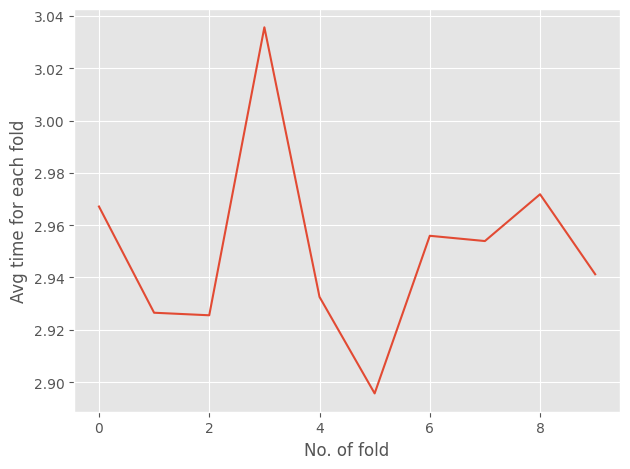

In [58]:
import matplotlib.pyplot as plt

times_nnb_n = np.zeros((10,100))
for i, row in enumerate(times_nnb):
    times_nnb_n[i, :len(row)] = row

times_nnb_n_n = np.mean(times_nnb_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnb_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnb times")
plt.show()

In [59]:
train_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnb):
    train_acc_nnb_n[i, :len(row)] = row
    
test_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnb):
    test_acc_nnb_n[i, :len(row)] = row
    
train_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnb):
    train_loss_nnb_n[i, :len(row)] = row
    
test_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnb):
    test_loss_nnb_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnb_n = np.mean(train_acc_nnb_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnb_n = np.mean(test_acc_nnb_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnb_n = np.mean(train_loss_nnb_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnb_n = np.mean(test_loss_nnb_n,axis=0)

In [60]:
data = [train_acc_nnb_n,test_acc_nnb_n,train_loss_nnb_n,test_loss_nnb_n]

df = pd.DataFrame(data)
df.to_csv('nnb_acc', index=False)
df = pd.read_csv('nnb_acc')

train_acc_nnb_n = df.iloc[0]
test_acc_nnb_n = df.iloc[1]
train_loss_nnb_n = df.iloc[2]
test_loss_nnb_n = df.iloc[3]


df_t = pd.DataFrame([times_nnb_n_n])
df_t.to_csv('nnb_times', index=False)
df_t = pd.read_csv('nnb_times')

times_nnb_n_n = df_t.iloc[0]

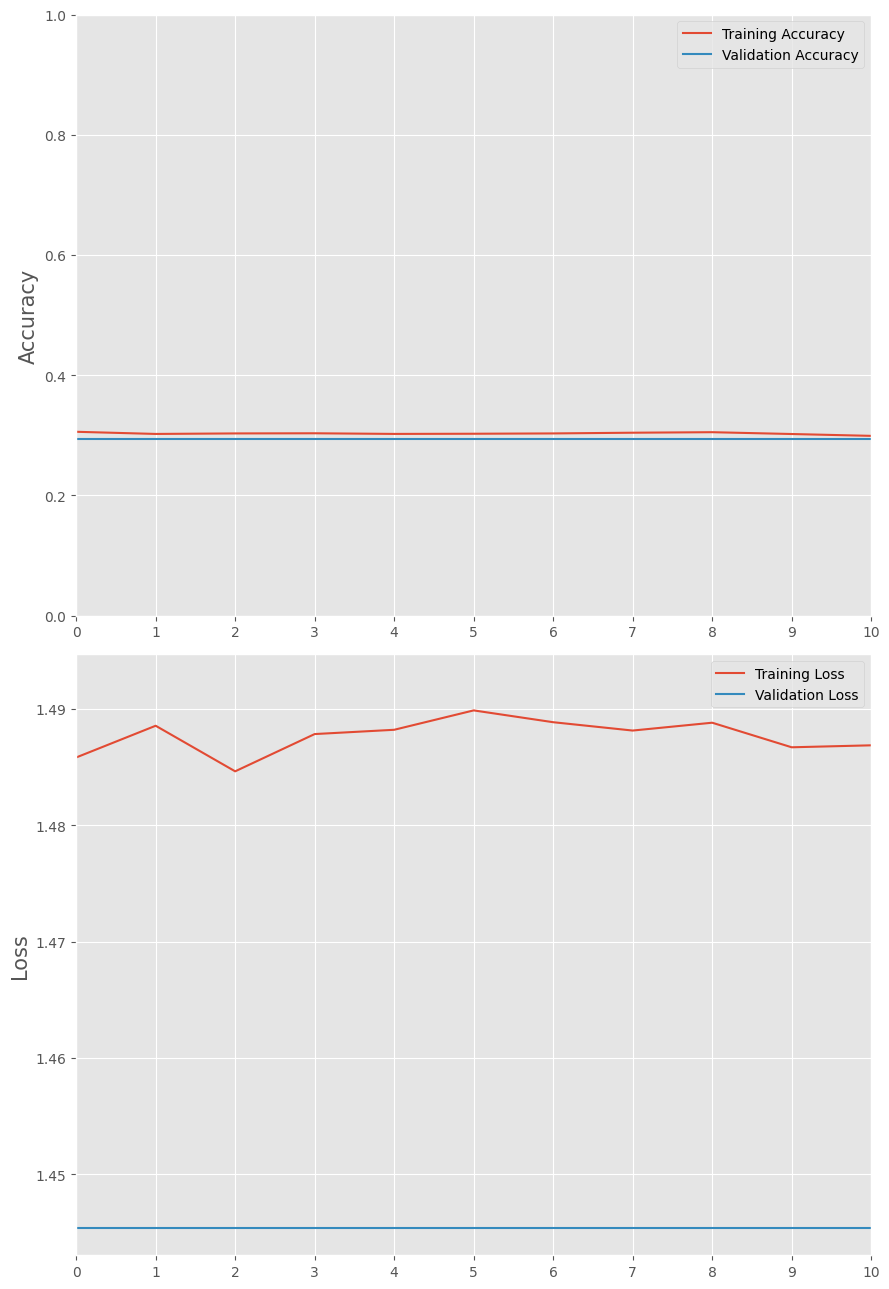

In [61]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnb_n, label='Training Accuracy')
axs[0].plot(test_acc_nnb_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnb_n, label='Training Loss')
axs[1].plot(test_loss_nnb_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnb Training and Testing Loss")
plt.show()

In [62]:
np.array(scores_nnb).shape

(10, 302, 4)

In [63]:
y_pred_nnb = np.argmax(scores_nnb,axis=2)

In [64]:
y_pred_nnb.shape

(10, 302)

In [65]:
from sklearn.metrics import accuracy_score
acc_scores_nnb = []
for i in range(len(y_test_all_nnb)):
    acc_scores_nnb.append(accuracy_score(y_true = y_test_all_nnb[i],y_pred = y_pred_nnb[i]))

In [66]:
import gc
gc.collect()

23843

In [67]:
acc_scores_nnb

[0.3841059602649007,
 0.33112582781456956,
 0.3576158940397351,
 0.32781456953642385,
 0.1357615894039735,
 0.38079470198675497,
 0.3576158940397351,
 0.3509933774834437,
 0.17218543046357615,
 0.25496688741721857]

In [68]:
df_acc = pd.DataFrame([acc_scores_nnb])

df_acc.to_csv('nnb_accuracy', index=False)

df_acc = pd.read_csv('nnb_accuracy')

acc_scores_nnb = df_acc.iloc[0].values

In [69]:
y_test_all_n = np.array(y_test_all_nnb)

y_pred_nnb_n = y_pred_nnb.flatten()
y_test_all_n = y_test_all_n.flatten()

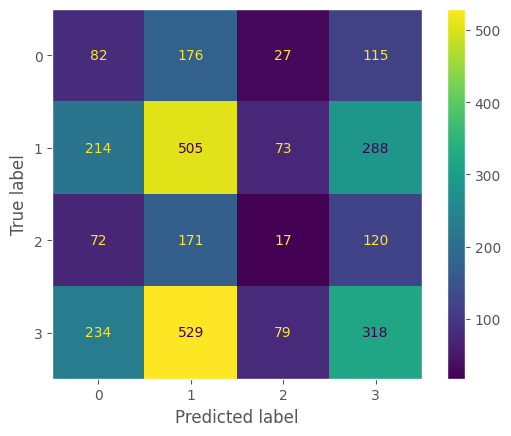

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnb_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnb")

plt.show()

In [71]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.14      0.20      0.16       400
           1       0.37      0.47      0.41      1080
           2       0.09      0.04      0.06       380
           3       0.38      0.27      0.32      1160

    accuracy                           0.31      3020
   macro avg       0.24      0.25      0.24      3020
weighted avg       0.30      0.31      0.30      3020



# AlexNet

In [13]:
import gc
gc.collect()

0

In [14]:
X.shape

(3020, 259, 102, 1)

In [15]:
X_tl = np.concatenate([X,X,X],axis=-1)

In [16]:
X_tl.shape

(3020, 259, 102, 3)

In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_axn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_axn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [18]:
import gc
gc.collect()

0

In [19]:
from keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [20]:
def create_model_axn():
    
    model_axn = Sequential()
    model_axn.add(Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=(X_tl.shape[1],X_tl.shape[2],X_tl.shape[3]), activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(256,(5,5),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(256,(3,3),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model_axn.add(Flatten())
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4,activation='softmax'))

    return model_axn

In [21]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_axn = []
y_test_all_axn = []
train_acc_axn = []
test_acc_axn = []
train_loss_axn = []
test_loss_axn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X_n, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_tl[train_indices], X_tl[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_axn.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_axn = None
    model_axn = create_model_axn()
        
    model_axn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_axn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_axn.predict(X_test)
    
    scores_axn.append(x)
    train_acc_axn.append(history.history["accuracy"])
    test_acc_axn.append(history.history["val_accuracy"])
    train_loss_axn.append(history.history["loss"])
    test_loss_axn.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 6s 38ms/step - loss: 1.3258 - accuracy: 0.3733 - val_loss: 1.2231 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2505 - accuracy: 0.4235 - val_loss: 1.1566 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2111 - accuracy: 0.4526 - val_loss: 1.1480 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2001 - accuracy: 0.4665 - val_loss: 1.1720 - val_accuracy: 0.4963 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 2s 25ms/step - loss: 1.1904 - accuracy: 0.4804 - val_loss: 1.1413 - val_accuracy: 0.5404 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1821 - accuracy: 0.4869 - val_loss: 1.1593 - val_accuracy: 0.4926 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 29/100
77/77 [==============================] - 2s 24ms/step - loss: 0.4902 - accuracy: 0.8140 - val_loss: 1.5644 - val_accuracy: 0.4743 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 2s 24ms/step - loss: 0.4774 - accuracy: 0.8275 - val_loss: 1.5751 - val_accuracy: 0.4779 - lr: 8.0000e-06
Epoch 31/100
76/77 [============================>.] - ETA: 0s - loss: 0.4822 - accuracy: 0.8220
Epoch 31: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 31: 1.89 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.4817 - accuracy: 0.8222 - val_loss: 1.5831 - val_accuracy: 0.4706 - lr: 8.0000e-06
Epoch 32/100
77/77 [==============================] - 2s 25ms/step - loss: 0.4755 - accuracy: 0.8222 - val_loss: 1.5852 - val_accuracy: 0.4632 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 2s 24ms/step - loss: 0.4760 - accuracy: 0.8275 - val_loss: 1.5851 - val_accuracy: 0.4743 - lr: 1.6000e-06
E

Epoch 57/100
77/77 [==============================] - 2s 24ms/step - loss: 0.4663 - accuracy: 0.8291 - val_loss: 1.5924 - val_accuracy: 0.4632 - lr: 5.1200e-10
Epoch 58/100
77/77 [==============================] - 2s 25ms/step - loss: 0.4755 - accuracy: 0.8246 - val_loss: 1.5924 - val_accuracy: 0.4632 - lr: 5.1200e-10
Epoch 59/100
77/77 [==============================] - 2s 25ms/step - loss: 0.4688 - accuracy: 0.8267 - val_loss: 1.5924 - val_accuracy: 0.4632 - lr: 5.1200e-10
Epoch 60/100
77/77 [==============================] - 2s 24ms/step - loss: 0.4670 - accuracy: 0.8307 - val_loss: 1.5924 - val_accuracy: 0.4632 - lr: 5.1200e-10
Epoch 61/100
77/77 [==============================] - ETA: 0s - loss: 0.4723 - accuracy: 0.8299
Epoch 61: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 61: 1.89 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.4723 - accuracy: 0.8299 - val_loss: 1.5924 - val_accuracy: 0.4632 - lr: 5.1200e-10
E

Epoch 85/100
77/77 [==============================] - 2s 24ms/step - loss: 0.4691 - accuracy: 0.8283 - val_loss: 1.5924 - val_accuracy: 0.4632 - lr: 1.6384e-13
Epoch 86/100
77/77 [==============================] - ETA: 0s - loss: 0.4691 - accuracy: 0.8316
Epoch 86: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 86: 1.90 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.4691 - accuracy: 0.8316 - val_loss: 1.5924 - val_accuracy: 0.4632 - lr: 1.6384e-13
Epoch 87/100
77/77 [==============================] - 2s 25ms/step - loss: 0.4700 - accuracy: 0.8262 - val_loss: 1.5924 - val_accuracy: 0.4632 - lr: 3.2768e-14
Epoch 88/100
77/77 [==============================] - 2s 25ms/step - loss: 0.4736 - accuracy: 0.8262 - val_loss: 1.5924 - val_accuracy: 0.4632 - lr: 3.2768e-14
Epoch 89/100
77/77 [==============================] - 2s 24ms/step - loss: 0.4690 - accuracy: 0.8226 - val_loss: 1.5924 - val_accuracy: 0.4632 - lr: 3.2768e-14
E

77/77 [==============================] - 2s 24ms/step - loss: 1.0496 - accuracy: 0.5707 - val_loss: 1.2592 - val_accuracy: 0.4559 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 2s 25ms/step - loss: 1.0313 - accuracy: 0.5736 - val_loss: 1.2718 - val_accuracy: 0.4412 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - 2s 25ms/step - loss: 1.0005 - accuracy: 0.5912 - val_loss: 1.2837 - val_accuracy: 0.4154 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 2s 25ms/step - loss: 0.9867 - accuracy: 0.5944 - val_loss: 1.3157 - val_accuracy: 0.4522 - lr: 2.0000e-04
Epoch 17/100
75/77 [============================>.] - ETA: 0s - loss: 0.9516 - accuracy: 0.6125
Epoch 17: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 17: 1.90 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.9493 - accuracy: 0.6145 - val_loss: 1.2754 - val_accuracy: 0.4632 - lr: 2.0000e-04
Epoch 18/100
7

Epoch 41/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7721 - accuracy: 0.7024 - val_loss: 1.4387 - val_accuracy: 0.4485 - lr: 6.4000e-08
Epoch 42/100
75/77 [============================>.] - ETA: 0s - loss: 0.7688 - accuracy: 0.6958
Epoch 42: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 42: 1.89 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.7680 - accuracy: 0.6979 - val_loss: 1.4388 - val_accuracy: 0.4485 - lr: 6.4000e-08
Epoch 43/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7663 - accuracy: 0.7028 - val_loss: 1.4388 - val_accuracy: 0.4485 - lr: 1.2800e-08
Epoch 44/100
77/77 [==============================] - 2s 24ms/step - loss: 0.7675 - accuracy: 0.7028 - val_loss: 1.4388 - val_accuracy: 0.4485 - lr: 1.2800e-08
Epoch 45/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7683 - accuracy: 0.6971 - val_loss: 1.4388 - val_accuracy: 0.4485 - lr: 1.2800e-08
E

Epoch 69/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7688 - accuracy: 0.7024 - val_loss: 1.4389 - val_accuracy: 0.4485 - lr: 4.0960e-12
Epoch 70/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7680 - accuracy: 0.6983 - val_loss: 1.4389 - val_accuracy: 0.4485 - lr: 4.0960e-12
Epoch 71/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7685 - accuracy: 0.7003 - val_loss: 1.4389 - val_accuracy: 0.4485 - lr: 4.0960e-12
Epoch 72/100
76/77 [============================>.] - ETA: 0s - loss: 0.7707 - accuracy: 0.7007
Epoch 72: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 72: 1.90 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.7707 - accuracy: 0.7007 - val_loss: 1.4389 - val_accuracy: 0.4485 - lr: 4.0960e-12
Epoch 73/100
77/77 [==============================] - 2s 24ms/step - loss: 0.7708 - accuracy: 0.6962 - val_loss: 1.4389 - val_accuracy: 0.4485 - lr: 8.1920e-13
Ep

Epoch 97/100
77/77 [==============================] - ETA: 0s - loss: 0.7689 - accuracy: 0.7097
Epoch 97: ReduceLROnPlateau reducing learning rate to 2.6214401285682084e-16.
Time taken for epoch 97: 1.88 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.7689 - accuracy: 0.7097 - val_loss: 1.4389 - val_accuracy: 0.4485 - lr: 1.3107e-15
Epoch 98/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7691 - accuracy: 0.6975 - val_loss: 1.4389 - val_accuracy: 0.4485 - lr: 2.6214e-16
Epoch 99/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7671 - accuracy: 0.7044 - val_loss: 1.4389 - val_accuracy: 0.4485 - lr: 2.6214e-16
Epoch 100/100
10/10 [==============================] - 0s 9ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 2s 26ms/step - loss: 1.3488 - accuracy: 0.3700 - val_loss: 1.2669 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 2s 25ms/step - loss: 

Epoch 26/100
77/77 [==============================] - 2s 25ms/step - loss: 0.8084 - accuracy: 0.6635 - val_loss: 1.3532 - val_accuracy: 0.4596 - lr: 4.0000e-05
Epoch 27/100
76/77 [============================>.] - ETA: 0s - loss: 0.7968 - accuracy: 0.6669
Epoch 27: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 27: 1.92 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.7963 - accuracy: 0.6672 - val_loss: 1.3527 - val_accuracy: 0.4706 - lr: 4.0000e-05
Epoch 28/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7785 - accuracy: 0.6725 - val_loss: 1.3630 - val_accuracy: 0.4632 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - 2s 24ms/step - loss: 0.7723 - accuracy: 0.6774 - val_loss: 1.3699 - val_accuracy: 0.4706 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 2s 24ms/step - loss: 0.7685 - accuracy: 0.6823 - val_loss: 1.3673 - val_accuracy: 0.4632 - lr: 8.0000e-06
Ep

Epoch 54/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7585 - accuracy: 0.6783 - val_loss: 1.3828 - val_accuracy: 0.4669 - lr: 2.5600e-09
Epoch 55/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7587 - accuracy: 0.6836 - val_loss: 1.3828 - val_accuracy: 0.4669 - lr: 2.5600e-09
Epoch 56/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7530 - accuracy: 0.6840 - val_loss: 1.3828 - val_accuracy: 0.4669 - lr: 2.5600e-09
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 0.7576 - accuracy: 0.6879
Epoch 57: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 57: 1.92 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.7567 - accuracy: 0.6889 - val_loss: 1.3827 - val_accuracy: 0.4669 - lr: 2.5600e-09
Epoch 58/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7569 - accuracy: 0.6819 - val_loss: 1.3828 - val_accuracy: 0.4669 - lr: 5.1200e-10
Epoc

Epoch 82/100
77/77 [==============================] - ETA: 0s - loss: 0.7551 - accuracy: 0.6832
Epoch 82: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 82: 1.88 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.7551 - accuracy: 0.6832 - val_loss: 1.3827 - val_accuracy: 0.4669 - lr: 8.1920e-13
Epoch 83/100
77/77 [==============================] - 2s 24ms/step - loss: 0.7574 - accuracy: 0.6852 - val_loss: 1.3827 - val_accuracy: 0.4669 - lr: 1.6384e-13
Epoch 84/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7579 - accuracy: 0.6791 - val_loss: 1.3827 - val_accuracy: 0.4669 - lr: 1.6384e-13
Epoch 85/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7512 - accuracy: 0.6889 - val_loss: 1.3827 - val_accuracy: 0.4669 - lr: 1.6384e-13
Epoch 86/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7557 - accuracy: 0.6864 - val_loss: 1.3827 - val_accuracy: 0.4669 - lr: 1.6384e-13
E

77/77 [==============================] - 2s 25ms/step - loss: 1.1198 - accuracy: 0.5074 - val_loss: 1.1540 - val_accuracy: 0.4926 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1039 - accuracy: 0.5184 - val_loss: 1.1489 - val_accuracy: 0.4632 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 2s 25ms/step - loss: 1.0720 - accuracy: 0.5356 - val_loss: 1.1715 - val_accuracy: 0.4779 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0656 - accuracy: 0.5343 - val_loss: 1.1789 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 2s 25ms/step - loss: 1.0366 - accuracy: 0.5466 - val_loss: 1.1289 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0078 - accuracy: 0.5576 - val_loss: 1.0951 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 2s 25ms/step - loss: 0.

Epoch 39/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0362 - accuracy: 0.9902 - val_loss: 4.0860 - val_accuracy: 0.5368 - lr: 4.0000e-05
Epoch 40/100
75/77 [============================>.] - ETA: 0s - loss: 0.0350 - accuracy: 0.9908
Epoch 40: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 40: 1.90 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.0345 - accuracy: 0.9910 - val_loss: 4.1839 - val_accuracy: 0.5478 - lr: 4.0000e-05
Epoch 41/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0313 - accuracy: 0.9951 - val_loss: 4.1701 - val_accuracy: 0.5404 - lr: 8.0000e-06
Epoch 42/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0337 - accuracy: 0.9947 - val_loss: 4.1750 - val_accuracy: 0.5368 - lr: 8.0000e-06
Epoch 43/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0275 - accuracy: 0.9959 - val_loss: 4.1785 - val_accuracy: 0.5404 - lr: 8.0000e-06
Ep

Epoch 67/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0252 - accuracy: 0.9959 - val_loss: 4.2288 - val_accuracy: 0.5404 - lr: 2.5600e-09
Epoch 68/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0265 - accuracy: 0.9947 - val_loss: 4.2287 - val_accuracy: 0.5404 - lr: 2.5600e-09
Epoch 69/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0270 - accuracy: 0.9955 - val_loss: 4.2285 - val_accuracy: 0.5404 - lr: 2.5600e-09
Epoch 70/100
76/77 [============================>.] - ETA: 0s - loss: 0.0282 - accuracy: 0.9942
Epoch 70: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 70: 1.92 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.0281 - accuracy: 0.9943 - val_loss: 4.2282 - val_accuracy: 0.5404 - lr: 2.5600e-09
Epoch 71/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0266 - accuracy: 0.9939 - val_loss: 4.2284 - val_accuracy: 0.5404 - lr: 5.1200e-10
Epoc

Epoch 95/100
76/77 [============================>.] - ETA: 0s - loss: 0.0314 - accuracy: 0.9926
Epoch 95: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 95: 1.90 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.0313 - accuracy: 0.9926 - val_loss: 4.2283 - val_accuracy: 0.5404 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0262 - accuracy: 0.9959 - val_loss: 4.2283 - val_accuracy: 0.5404 - lr: 1.6384e-13
Epoch 97/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0250 - accuracy: 0.9959 - val_loss: 4.2283 - val_accuracy: 0.5404 - lr: 1.6384e-13
Epoch 98/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0286 - accuracy: 0.9951 - val_loss: 4.2283 - val_accuracy: 0.5404 - lr: 1.6384e-13
Epoch 99/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0264 - accuracy: 0.9971 - val_loss: 4.2283 - val_accuracy: 0.5404 - lr: 1.6384e-13
E

Epoch 51/100
77/77 [==============================] - 2s 25ms/step - loss: 0.9890 - accuracy: 0.5781 - val_loss: 1.2517 - val_accuracy: 0.4669 - lr: 2.5600e-09
Epoch 52/100
77/77 [==============================] - 2s 25ms/step - loss: 0.9927 - accuracy: 0.5834 - val_loss: 1.2517 - val_accuracy: 0.4669 - lr: 2.5600e-09
Epoch 53/100
77/77 [==============================] - 2s 25ms/step - loss: 0.9882 - accuracy: 0.5830 - val_loss: 1.2517 - val_accuracy: 0.4669 - lr: 2.5600e-09
Epoch 54/100
77/77 [==============================] - 2s 24ms/step - loss: 0.9912 - accuracy: 0.5765 - val_loss: 1.2517 - val_accuracy: 0.4669 - lr: 2.5600e-09
Epoch 55/100
77/77 [==============================] - ETA: 0s - loss: 0.9909 - accuracy: 0.5777
Epoch 55: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 55: 1.89 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.9909 - accuracy: 0.5777 - val_loss: 1.2517 - val_accuracy: 0.4669 - lr: 2.5600e-09
Epoc

Epoch 79/100
77/77 [==============================] - 2s 24ms/step - loss: 0.9892 - accuracy: 0.5826 - val_loss: 1.2517 - val_accuracy: 0.4669 - lr: 8.1920e-13
Epoch 80/100
75/77 [============================>.] - ETA: 0s - loss: 0.9924 - accuracy: 0.5792
Epoch 80: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 80: 1.90 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.9926 - accuracy: 0.5789 - val_loss: 1.2517 - val_accuracy: 0.4669 - lr: 8.1920e-13
Epoch 81/100
77/77 [==============================] - 2s 24ms/step - loss: 0.9943 - accuracy: 0.5834 - val_loss: 1.2517 - val_accuracy: 0.4669 - lr: 1.6384e-13
Epoch 82/100
77/77 [==============================] - 2s 25ms/step - loss: 0.9924 - accuracy: 0.5801 - val_loss: 1.2517 - val_accuracy: 0.4669 - lr: 1.6384e-13
Epoch 83/100
77/77 [==============================] - 2s 25ms/step - loss: 0.9924 - accuracy: 0.5744 - val_loss: 1.2517 - val_accuracy: 0.4669 - lr: 1.6384e-13
E

Epoch 7/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1713 - accuracy: 0.5020 - val_loss: 1.1693 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 2s 25ms/step - loss: 1.1591 - accuracy: 0.5151 - val_loss: 1.1607 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 2s 25ms/step - loss: 1.1499 - accuracy: 0.5102 - val_loss: 1.1925 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 2s 25ms/step - loss: 1.1378 - accuracy: 0.5159 - val_loss: 1.1688 - val_accuracy: 0.4559 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1219 - accuracy: 0.5192 - val_loss: 1.1837 - val_accuracy: 0.4669 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0948 - accuracy: 0.5360 - val_loss: 1.1354 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 2s 25ms/step 

Epoch 36/100
77/77 [==============================] - 2s 25ms/step - loss: 0.6354 - accuracy: 0.7449 - val_loss: 1.4848 - val_accuracy: 0.5037 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 2s 25ms/step - loss: 0.6373 - accuracy: 0.7347 - val_loss: 1.4853 - val_accuracy: 0.5074 - lr: 1.6000e-06
Epoch 38/100
77/77 [==============================] - 2s 24ms/step - loss: 0.6382 - accuracy: 0.7478 - val_loss: 1.4856 - val_accuracy: 0.5110 - lr: 1.6000e-06
Epoch 39/100
74/77 [===========================>..] - ETA: 0s - loss: 0.6425 - accuracy: 0.7344
Epoch 39: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 39: 1.87 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.6398 - accuracy: 0.7363 - val_loss: 1.4873 - val_accuracy: 0.5074 - lr: 1.6000e-06
Epoch 40/100
77/77 [==============================] - 2s 25ms/step - loss: 0.6332 - accuracy: 0.7433 - val_loss: 1.4872 - val_accuracy: 0.5074 - lr: 3.2000e-07
Ep

Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 0.6302 - accuracy: 0.7473
Epoch 64: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 64: 1.89 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.6302 - accuracy: 0.7473 - val_loss: 1.4881 - val_accuracy: 0.5074 - lr: 5.1200e-10
Epoch 65/100
77/77 [==============================] - 2s 25ms/step - loss: 0.6317 - accuracy: 0.7437 - val_loss: 1.4881 - val_accuracy: 0.5074 - lr: 1.0240e-10
Epoch 66/100
77/77 [==============================] - 2s 25ms/step - loss: 0.6327 - accuracy: 0.7408 - val_loss: 1.4881 - val_accuracy: 0.5074 - lr: 1.0240e-10
Epoch 67/100
77/77 [==============================] - 2s 24ms/step - loss: 0.6342 - accuracy: 0.7469 - val_loss: 1.4881 - val_accuracy: 0.5074 - lr: 1.0240e-10
Epoch 68/100
77/77 [==============================] - 2s 25ms/step - loss: 0.6350 - accuracy: 0.7392 - val_loss: 1.4881 - val_accuracy: 0.5074 - lr: 1.0240e-10
E

Epoch 92/100
77/77 [==============================] - 2s 25ms/step - loss: 0.6291 - accuracy: 0.7494 - val_loss: 1.4881 - val_accuracy: 0.5074 - lr: 3.2768e-14
Epoch 93/100
77/77 [==============================] - 2s 24ms/step - loss: 0.6321 - accuracy: 0.7469 - val_loss: 1.4881 - val_accuracy: 0.5074 - lr: 3.2768e-14
Epoch 94/100
75/77 [============================>.] - ETA: 0s - loss: 0.6355 - accuracy: 0.7475
Epoch 94: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 94: 1.91 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.6354 - accuracy: 0.7482 - val_loss: 1.4881 - val_accuracy: 0.5074 - lr: 3.2768e-14
Epoch 95/100
77/77 [==============================] - 2s 24ms/step - loss: 0.6352 - accuracy: 0.7416 - val_loss: 1.4881 - val_accuracy: 0.5074 - lr: 6.5536e-15
Epoch 96/100
77/77 [==============================] - 2s 25ms/step - loss: 0.6329 - accuracy: 0.7424 - val_loss: 1.4881 - val_accuracy: 0.5074 - lr: 6.5536e-15
Ep

Epoch 21/100
77/77 [==============================] - 2s 25ms/step - loss: 0.9882 - accuracy: 0.5785 - val_loss: 1.1301 - val_accuracy: 0.5000 - lr: 2.0000e-04
Epoch 22/100
74/77 [===========================>..] - ETA: 0s - loss: 0.9767 - accuracy: 0.5840
Epoch 22: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 22: 1.90 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.9771 - accuracy: 0.5838 - val_loss: 1.1102 - val_accuracy: 0.5257 - lr: 2.0000e-04
Epoch 23/100
77/77 [==============================] - 2s 24ms/step - loss: 0.9264 - accuracy: 0.6141 - val_loss: 1.1215 - val_accuracy: 0.5147 - lr: 4.0000e-05
Epoch 24/100
77/77 [==============================] - 2s 25ms/step - loss: 0.9092 - accuracy: 0.6177 - val_loss: 1.1335 - val_accuracy: 0.5257 - lr: 4.0000e-05
Epoch 25/100
77/77 [==============================] - 2s 24ms/step - loss: 0.9050 - accuracy: 0.6214 - val_loss: 1.1335 - val_accuracy: 0.5184 - lr: 4.0000e-05
E

Epoch 49/100
77/77 [==============================] - 2s 25ms/step - loss: 0.8522 - accuracy: 0.6431 - val_loss: 1.1645 - val_accuracy: 0.5147 - lr: 1.2800e-08
Epoch 50/100
77/77 [==============================] - 2s 25ms/step - loss: 0.8511 - accuracy: 0.6472 - val_loss: 1.1645 - val_accuracy: 0.5147 - lr: 1.2800e-08
Epoch 51/100
77/77 [==============================] - 2s 25ms/step - loss: 0.8540 - accuracy: 0.6455 - val_loss: 1.1646 - val_accuracy: 0.5147 - lr: 1.2800e-08
Epoch 52/100
74/77 [===========================>..] - ETA: 0s - loss: 0.8495 - accuracy: 0.6470
Epoch 52: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 52: 1.90 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.8524 - accuracy: 0.6464 - val_loss: 1.1646 - val_accuracy: 0.5147 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 2s 24ms/step - loss: 0.8543 - accuracy: 0.6394 - val_loss: 1.1646 - val_accuracy: 0.5147 - lr: 2.5600e-09
E

Epoch 77/100
77/77 [==============================] - ETA: 0s - loss: 0.8484 - accuracy: 0.6439
Epoch 77: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 77: 1.91 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.8484 - accuracy: 0.6439 - val_loss: 1.1646 - val_accuracy: 0.5147 - lr: 4.0960e-12
Epoch 78/100
77/77 [==============================] - 2s 25ms/step - loss: 0.8513 - accuracy: 0.6415 - val_loss: 1.1646 - val_accuracy: 0.5147 - lr: 8.1920e-13
Epoch 79/100
77/77 [==============================] - 2s 25ms/step - loss: 0.8476 - accuracy: 0.6496 - val_loss: 1.1646 - val_accuracy: 0.5147 - lr: 8.1920e-13
Epoch 80/100
77/77 [==============================] - 2s 25ms/step - loss: 0.8593 - accuracy: 0.6435 - val_loss: 1.1646 - val_accuracy: 0.5147 - lr: 8.1920e-13
Epoch 81/100
77/77 [==============================] - 2s 25ms/step - loss: 0.8524 - accuracy: 0.6435 - val_loss: 1.1646 - val_accuracy: 0.5147 - lr: 8.1920e-13
Ep

Epoch 5/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2051 - accuracy: 0.4636 - val_loss: 1.1923 - val_accuracy: 0.4706 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1913 - accuracy: 0.4738 - val_loss: 1.1987 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 2s 25ms/step - loss: 1.1895 - accuracy: 0.4804 - val_loss: 1.1581 - val_accuracy: 0.4853 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1974 - accuracy: 0.4714 - val_loss: 1.1520 - val_accuracy: 0.5074 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 2s 25ms/step - loss: 1.1958 - accuracy: 0.4747 - val_loss: 1.1628 - val_accuracy: 0.4779 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1707 - accuracy: 0.4804 - val_loss: 1.1576 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 2s 25ms/step - 

Epoch 61/100
77/77 [==============================] - 2s 25ms/step - loss: 0.9826 - accuracy: 0.5760 - val_loss: 1.1439 - val_accuracy: 0.4816 - lr: 1.0240e-10
Epoch 62/100
77/77 [==============================] - 2s 25ms/step - loss: 0.9870 - accuracy: 0.5736 - val_loss: 1.1439 - val_accuracy: 0.4816 - lr: 1.0240e-10
Epoch 63/100
77/77 [==============================] - 2s 25ms/step - loss: 0.9869 - accuracy: 0.5691 - val_loss: 1.1439 - val_accuracy: 0.4816 - lr: 1.0240e-10
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 0.9868 - accuracy: 0.5695
Epoch 64: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 64: 1.91 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.9874 - accuracy: 0.5691 - val_loss: 1.1439 - val_accuracy: 0.4816 - lr: 1.0240e-10
Epoch 65/100
77/77 [==============================] - 2s 25ms/step - loss: 0.9918 - accuracy: 0.5675 - val_loss: 1.1439 - val_accuracy: 0.4816 - lr: 2.0480e-11
E

Epoch 89/100
75/77 [============================>.] - ETA: 0s - loss: 0.9816 - accuracy: 0.5783
Epoch 89: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 89: 1.91 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.9831 - accuracy: 0.5769 - val_loss: 1.1439 - val_accuracy: 0.4816 - lr: 3.2768e-14
Epoch 90/100
77/77 [==============================] - 2s 25ms/step - loss: 0.9864 - accuracy: 0.5691 - val_loss: 1.1439 - val_accuracy: 0.4816 - lr: 6.5536e-15
Epoch 91/100
77/77 [==============================] - 2s 25ms/step - loss: 0.9887 - accuracy: 0.5732 - val_loss: 1.1439 - val_accuracy: 0.4816 - lr: 6.5536e-15
Epoch 92/100
77/77 [==============================] - 2s 25ms/step - loss: 0.9881 - accuracy: 0.5666 - val_loss: 1.1439 - val_accuracy: 0.4816 - lr: 6.5536e-15
Epoch 93/100
77/77 [==============================] - 2s 24ms/step - loss: 0.9884 - accuracy: 0.5675 - val_loss: 1.1439 - val_accuracy: 0.4816 - lr: 6.5536e-15
Ep

Epoch 45/100
77/77 [==============================] - 2s 24ms/step - loss: 0.4350 - accuracy: 0.8344 - val_loss: 1.4999 - val_accuracy: 0.5037 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - ETA: 0s - loss: 0.4214 - accuracy: 0.8410
Epoch 46: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 46: 1.89 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.4214 - accuracy: 0.8410 - val_loss: 1.5001 - val_accuracy: 0.5037 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 2s 25ms/step - loss: 0.4309 - accuracy: 0.8410 - val_loss: 1.5000 - val_accuracy: 0.5037 - lr: 1.2800e-08
Epoch 48/100
77/77 [==============================] - 2s 25ms/step - loss: 0.4245 - accuracy: 0.8496 - val_loss: 1.5001 - val_accuracy: 0.5037 - lr: 1.2800e-08
Epoch 49/100
77/77 [==============================] - 2s 25ms/step - loss: 0.4302 - accuracy: 0.8414 - val_loss: 1.5001 - val_accuracy: 0.5037 - lr: 1.2800e-08
E

Epoch 73/100
77/77 [==============================] - 2s 25ms/step - loss: 0.4318 - accuracy: 0.8397 - val_loss: 1.5001 - val_accuracy: 0.5037 - lr: 4.0960e-12
Epoch 74/100
77/77 [==============================] - 2s 25ms/step - loss: 0.4231 - accuracy: 0.8483 - val_loss: 1.5001 - val_accuracy: 0.5037 - lr: 4.0960e-12
Epoch 75/100
77/77 [==============================] - 2s 25ms/step - loss: 0.4344 - accuracy: 0.8459 - val_loss: 1.5001 - val_accuracy: 0.5037 - lr: 4.0960e-12
Epoch 76/100
76/77 [============================>.] - ETA: 0s - loss: 0.4348 - accuracy: 0.8442
Epoch 76: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 76: 1.89 seconds
77/77 [==============================] - 2s 25ms/step - loss: 0.4359 - accuracy: 0.8442 - val_loss: 1.5001 - val_accuracy: 0.5037 - lr: 4.0960e-12
Epoch 77/100
77/77 [==============================] - 2s 24ms/step - loss: 0.4269 - accuracy: 0.8442 - val_loss: 1.5001 - val_accuracy: 0.5037 - lr: 8.1920e-13
Ep

10/10 [==============================] - 0s 9ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 2s 27ms/step - loss: 1.2964 - accuracy: 0.3684 - val_loss: 1.2906 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2641 - accuracy: 0.3802 - val_loss: 1.2704 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2285 - accuracy: 0.4395 - val_loss: 1.2182 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2028 - accuracy: 0.4677 - val_loss: 1.2291 - val_accuracy: 0.4706 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2009 - accuracy: 0.4624 - val_loss: 1.2321 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1866 - accuracy: 0.4640 - val_loss: 1.2089 - val_accuracy: 0.4890 - lr

Epoch 57/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0666 - accuracy: 0.5474 - val_loss: 1.2409 - val_accuracy: 0.4743 - lr: 1.0240e-10
Epoch 58/100
77/77 [==============================] - 2s 25ms/step - loss: 1.0683 - accuracy: 0.5491 - val_loss: 1.2409 - val_accuracy: 0.4743 - lr: 1.0240e-10
Epoch 59/100
77/77 [==============================] - 2s 25ms/step - loss: 1.0695 - accuracy: 0.5466 - val_loss: 1.2409 - val_accuracy: 0.4743 - lr: 1.0240e-10
Epoch 60/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0675 - accuracy: 0.5474 - val_loss: 1.2409 - val_accuracy: 0.4743 - lr: 1.0240e-10
Epoch 61/100
76/77 [============================>.] - ETA: 0s - loss: 1.0689 - accuracy: 0.5481
Epoch 61: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 61: 1.90 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.0695 - accuracy: 0.5474 - val_loss: 1.2409 - val_accuracy: 0.4743 - lr: 1.0240e-10
E

Epoch 85/100
77/77 [==============================] - 2s 25ms/step - loss: 1.0650 - accuracy: 0.5487 - val_loss: 1.2409 - val_accuracy: 0.4743 - lr: 3.2768e-14
Epoch 86/100
76/77 [============================>.] - ETA: 0s - loss: 1.0632 - accuracy: 0.5518
Epoch 86: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 86: 1.94 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.0642 - accuracy: 0.5511 - val_loss: 1.2409 - val_accuracy: 0.4743 - lr: 3.2768e-14
Epoch 87/100
77/77 [==============================] - 2s 25ms/step - loss: 1.0670 - accuracy: 0.5527 - val_loss: 1.2409 - val_accuracy: 0.4743 - lr: 6.5536e-15
Epoch 88/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0696 - accuracy: 0.5499 - val_loss: 1.2409 - val_accuracy: 0.4743 - lr: 6.5536e-15
Epoch 89/100
77/77 [==============================] - 2s 25ms/step - loss: 1.0645 - accuracy: 0.5531 - val_loss: 1.2409 - val_accuracy: 0.4743 - lr: 6.5536e-15
Ep

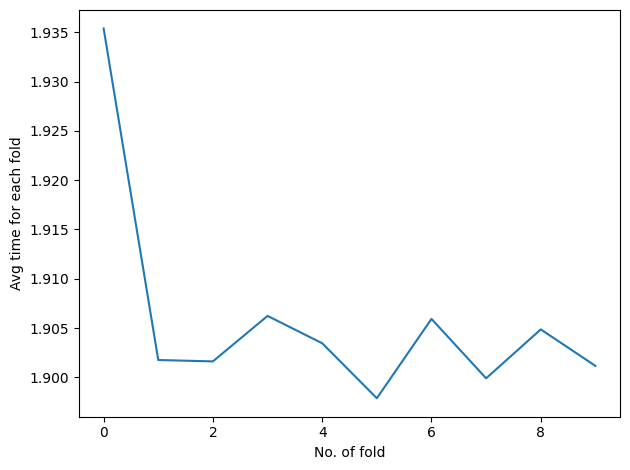

In [22]:
import matplotlib.pyplot as plt

times_axn_n = np.zeros((10,100))
for i, row in enumerate(times_axn):
    times_axn_n[i, :len(row)] = row

times_axn_n_n = np.mean(times_axn_n,axis=1)

plt.plot(times_axn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("axn times")
plt.show()

In [23]:
times_axn_n_n

array([1.93539426, 1.90175258, 1.90161307, 1.90622823, 1.90345369,
       1.89787437, 1.90592432, 1.89989562, 1.9048596 , 1.90115633])

In [24]:
train_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_axn):
    train_acc_axn_n[i, :len(row)] = row
    
test_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_axn):
    test_acc_axn_n[i, :len(row)] = row
    
train_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_axn):
    train_loss_axn_n[i, :len(row)] = row
    
test_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_axn):
    test_loss_axn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_axn_n = np.mean(train_acc_axn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_axn_n = np.mean(test_acc_axn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_axn_n = np.mean(train_loss_axn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_axn_n = np.mean(test_loss_axn_n,axis=0)

In [25]:
data = [train_acc_axn_n,test_acc_axn_n,train_loss_axn_n,test_loss_axn_n]

df = pd.DataFrame(data)
df.to_csv('axn_acc', index=False)
df = pd.read_csv('axn_acc')

train_acc_axn_n = df.iloc[0]
test_acc_axn_n = df.iloc[1]
train_loss_axn_n = df.iloc[2]
test_loss_axn_n = df.iloc[3]


df_t = pd.DataFrame([times_axn_n_n])
df_t.to_csv('axn_times', index=False)
df_t = pd.read_csv('axn_times')

times_axn_n_n = df_t.iloc[0]

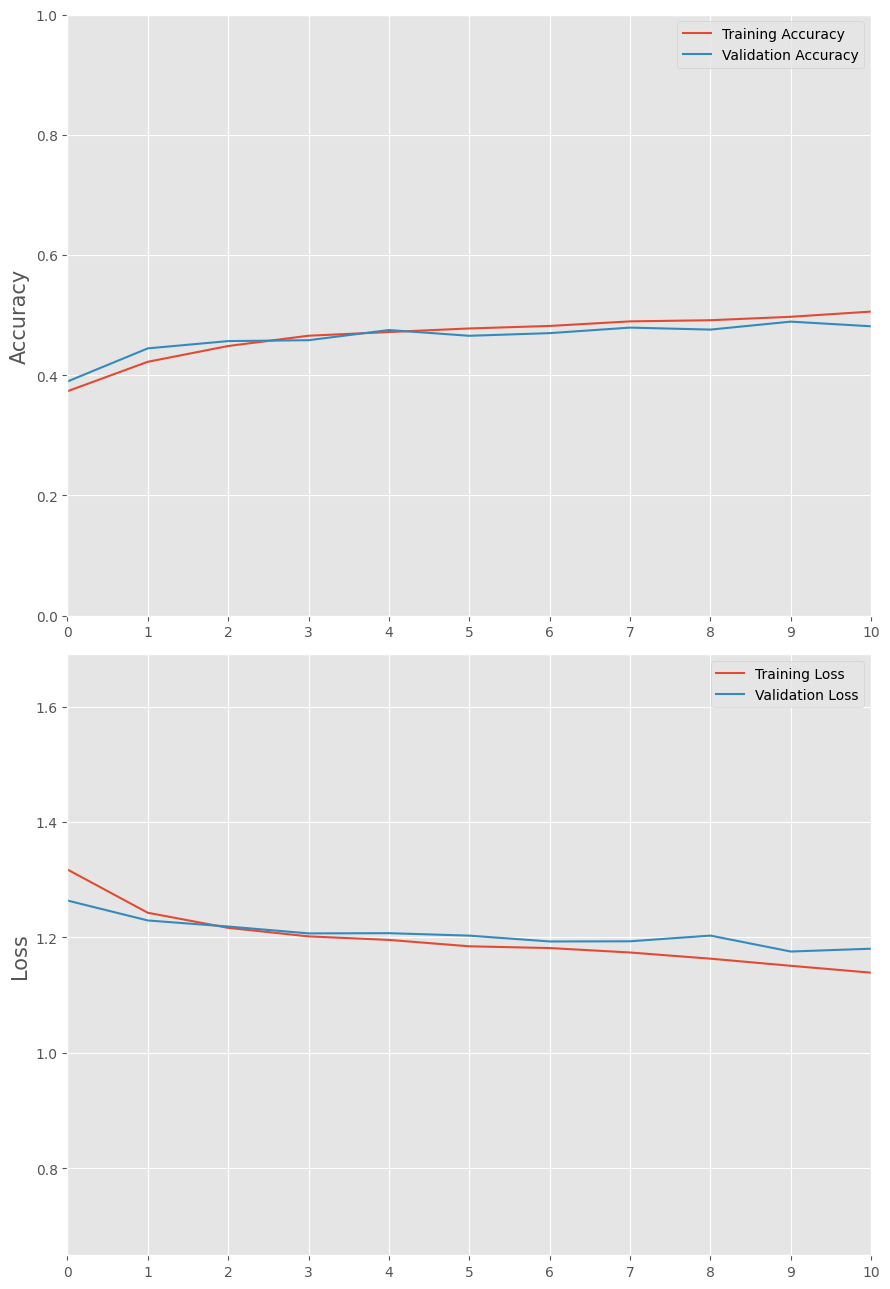

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_axn_n, label='Training Accuracy')
axs[0].plot(test_acc_axn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_axn_n, label='Training Loss')
axs[1].plot(test_loss_axn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim(train_loss_axn_n.min(),train_loss_axn_n.max())
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("axn Training and Testing Loss")
plt.show()

In [27]:
import gc
gc.collect()

3413

In [28]:
np.array(scores_axn).shape

(10, 302, 4)

In [29]:
y_pred_axn = np.argmax(scores_axn,axis=2)

In [30]:
y_pred_axn.shape

(10, 302)

In [31]:
from sklearn.metrics import accuracy_score
acc_scores_axn = []
for i in range(len(y_test_all_axn)):
    acc_scores_axn.append(accuracy_score(y_true = y_test_all_axn[i],y_pred = y_pred_axn[i]))

In [32]:
acc_scores_axn

[0.5198675496688742,
 0.5132450331125827,
 0.4470198675496689,
 0.5496688741721855,
 0.4735099337748344,
 0.5397350993377483,
 0.48344370860927155,
 0.5165562913907285,
 0.5,
 0.5033112582781457]

In [33]:
df_acc = pd.DataFrame([acc_scores_axn])

df_acc.to_csv('axn_accuracy', index=False)

df_acc = pd.read_csv('axn_accuracy')

acc_scores_axn = df_acc.iloc[0].values

In [34]:
y_test_all_n = np.array(y_test_all_axn)

y_pred_axn_n = y_pred_axn.flatten()
y_test_all_n = y_test_all_n.flatten()

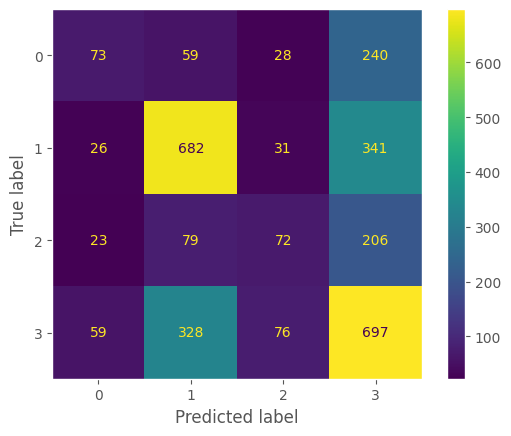

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_axn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("axn")
plt.show()

In [36]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_axn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.40      0.18      0.25       400
           1       0.59      0.63      0.61      1080
           2       0.35      0.19      0.25       380
           3       0.47      0.60      0.53      1160

    accuracy                           0.50      3020
   macro avg       0.45      0.40      0.41      3020
weighted avg       0.49      0.50      0.49      3020



# EfficientNetB7

In [37]:
import gc
gc.collect()

20

In [38]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_enb7 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_enb7.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [39]:
def create_model_enb7():
    
    model_enb7 = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetB7(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_enb7.trainable = False
    return model_enb7

In [40]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_enb7 = []
y_test_all_enb7 = []
train_acc_enb7 = []
test_acc_enb7 = []
train_loss_enb7 = []
test_loss_enb7 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_enb7.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_enb7 = None
    model_enb7 = create_model_enb7()
        
    model_enb7.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_enb7.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_enb7.predict(X_test)
    
    scores_enb7.append(x)
    train_acc_enb7.append(history.history["accuracy"])
    test_acc_enb7.append(history.history["val_accuracy"])
    train_loss_enb7.append(history.history["loss"])
    test_loss_enb7.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 24s 192ms/step - loss: 1.3220 - accuracy: 0.3569 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 12s 162ms/step - loss: 1.3275 - accuracy: 0.3679 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 163ms/step - loss: 1.3274 - accuracy: 0.3598 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 163ms/step - loss: 1.3291 - accuracy: 0.3426 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 12s 162ms/step - loss: 1.3317 - accuracy: 0.3585 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 12s 163ms/step - loss: 1.3214 - accuracy: 0.3704 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3198 - accuracy: 0.3712
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.55 seconds
77/77 [==============================] - 13s 163ms/step - loss: 1.3198 - accuracy: 0.3712 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3325 - accuracy: 0.3553 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3229 - accuracy: 0.3647 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3325 - accuracy: 0.3455 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 163ms/step - loss: 1.3205 - accuracy: 0.3577 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3234 - accuracy: 0.3581
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.54 seconds
77/77 [==============================] - 13s 163ms/step - loss: 1.3234 - accuracy: 0.3581 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3188 - accuracy: 0.3626 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3235 - accuracy: 0.3553 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3213 - accuracy: 0.3688 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3201 - accuracy: 0.3741 - val_loss: 1.3246 - val_accuracy: 0.3309 - lr: 4.

Epoch 13/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3039 - accuracy: 0.3782 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3074 - accuracy: 0.3778 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3193 - accuracy: 0.3720
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 12.65 seconds
77/77 [==============================] - 13s 165ms/step - loss: 1.3193 - accuracy: 0.3720 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 12s 162ms/step - loss: 1.3140 - accuracy: 0.3741 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3153 - accuracy: 0.3716 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 4

Epoch 41/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3049 - accuracy: 0.3892 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3037 - accuracy: 0.3765 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.3070 - accuracy: 0.3774
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 12.61 seconds
77/77 [==============================] - 13s 164ms/step - loss: 1.3070 - accuracy: 0.3774 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3096 - accuracy: 0.3761 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 163ms/step - loss: 1.3019 - accuracy: 0.3810 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 6.

Epoch 69/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3102 - accuracy: 0.3704 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3133 - accuracy: 0.3679 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.3143 - accuracy: 0.3818
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 12.63 seconds
77/77 [==============================] - 13s 164ms/step - loss: 1.3143 - accuracy: 0.3818 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3065 - accuracy: 0.3855 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 13s 163ms/step - loss: 1.3204 - accuracy: 0.3720 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 1

Epoch 97/100
77/77 [==============================] - 13s 163ms/step - loss: 1.3068 - accuracy: 0.3810 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 163ms/step - loss: 1.3149 - accuracy: 0.3598 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.3143 - accuracy: 0.3729
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 12.56 seconds
77/77 [==============================] - 13s 163ms/step - loss: 1.3143 - accuracy: 0.3729 - val_loss: 1.2674 - val_accuracy: 0.4007 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 138ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 25s 212ms/step - loss: 1.8270 - accuracy: 0.1316 - val_loss: 1.8151 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 164ms/

Epoch 25/100
77/77 [==============================] - 13s 163ms/step - loss: 1.8375 - accuracy: 0.1284 - val_loss: 1.8151 - val_accuracy: 0.1250 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 13s 163ms/step - loss: 1.8445 - accuracy: 0.1321 - val_loss: 1.8151 - val_accuracy: 0.1250 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 13s 164ms/step - loss: 1.8410 - accuracy: 0.1280 - val_loss: 1.8151 - val_accuracy: 0.1250 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 13s 163ms/step - loss: 1.8383 - accuracy: 0.1284 - val_loss: 1.8151 - val_accuracy: 0.1250 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.8311 - accuracy: 0.1304
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.48 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.8311 - accuracy: 0.1304 - val_loss: 1.8151 - val_accuracy: 0.1250 - lr: 8

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [41]:
import matplotlib.pyplot as plt

times_enb7_n = np.zeros((10,100))
for i, row in enumerate(times_enb7):
    times_enb7_n[i, :len(row)] = row

times_enb7_n_n = np.mean(times_enb7_n,axis=1)
plt.style.use('ggplot')
plt.plot(times_enb7_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")

plt.tight_layout()
plt.savefig("enb7 times")
plt.show()

In [42]:
import gc
gc.collect()

In [43]:
train_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_acc_enb7):
    train_acc_enb7_n[i, :len(row)] = row
    
test_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_acc_enb7):
    test_acc_enb7_n[i, :len(row)] = row
    
train_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_loss_enb7):
    train_loss_enb7_n[i, :len(row)] = row
    
test_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_loss_enb7):
    test_loss_enb7_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_enb7_n = np.mean(train_acc_enb7_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_enb7_n = np.mean(test_acc_enb7_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_enb7_n = np.mean(train_loss_enb7_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_enb7_n = np.mean(test_loss_enb7_n,axis=0)

In [44]:
data = [train_acc_enb7_n,test_acc_enb7_n,train_loss_enb7_n,test_loss_enb7_n]

df = pd.DataFrame(data)
df.to_csv('enb7_acc', index=False)
df = pd.read_csv('enb7_acc')

train_acc_enb7_n = df.iloc[0]
test_acc_enb7_n = df.iloc[1]
train_loss_enb7_n = df.iloc[2]
test_loss_enb7_n = df.iloc[3]


df_t = pd.DataFrame([times_enb7_n_n])
df_t.to_csv('enb7_times', index=False)
df_t = pd.read_csv('enb7_times')

times_enb7_n_n = df_t.iloc[0]

In [45]:
test_loss_enb7_n

In [46]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_enb7_n, label='Training Accuracy')
axs[0].plot(test_acc_enb7_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_enb7_n, label='Training Loss')
axs[1].plot(test_loss_enb7_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,10])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("enb7 Training and Testing Loss")
plt.show()

In [47]:
np.array(scores_enb7).shape

In [48]:
y_pred_enb7 = np.argmax(scores_enb7,axis=2)

In [49]:
y_pred_enb7.shape

In [50]:
np.array(y_test_all_enb7).shape

In [51]:
from sklearn.metrics import accuracy_score
acc_scores_enb7 = []
for i in range(len(y_test_all_enb7)):
    acc_scores_enb7.append(accuracy_score(y_true = y_test_all_enb7[i],y_pred = y_pred_enb7[i]))

In [52]:
acc_scores_enb7

In [53]:
df_acc = pd.DataFrame([acc_scores_enb7])

df_acc.to_csv('enb7_accuracy', index=False)

df_acc = pd.read_csv('enb7_accuracy')

acc_scores_enb7 = df_acc.iloc[0].values

In [54]:
y_test_all_n = np.array(y_test_all_enb7)

y_pred_enb7_n = y_pred_enb7.flatten()
y_test_all_n = y_test_all_n.flatten()

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_enb7_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("enb7")

plt.show()

In [56]:
import gc
gc.collect()

In [57]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_enb7_n)
print(cf_r)

# ResNetV2

In [58]:
import gc
gc.collect()

In [59]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_rnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_rnv2.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [60]:
def create_model_rnv2():

    model_rnv2 = tf.keras.Sequential([
    tf.keras.applications.ResNet50V2(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_rnv2.trainable = False
    return model_rnv2

In [61]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rnv2 = []
y_test_all_rnv2 = []
train_acc_rnv2 = []
test_acc_rnv2 = []
train_loss_rnv2 = []
test_loss_rnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_rnv2.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_rnv2 = None
    model_rnv2 = create_model_rnv2()
        
    model_rnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_rnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_rnv2.predict(X_test)
    
    scores_rnv2.append(x)
    train_acc_rnv2.append(history.history["accuracy"])
    test_acc_rnv2.append(history.history["val_accuracy"])
    train_loss_rnv2.append(history.history["loss"])
    test_loss_rnv2.append(history.history["val_loss"])
    
    gc.collect()

In [62]:
import gc
gc.collect()

In [63]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

times_rnv2_n = np.zeros((10,100))
for i, row in enumerate(times_rnv2):
    times_rnv2_n[i, :len(row)] = row

times_rnv2_n_n = np.mean(times_rnv2_n,axis=1)

plt.plot(times_rnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")

plt.tight_layout()
plt.savefig("rnv2 times")
plt.show()

In [64]:
train_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_rnv2):
    train_acc_rnv2_n[i, :len(row)] = row
    
test_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_rnv2):
    test_acc_rnv2_n[i, :len(row)] = row
    
train_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_rnv2):
    train_loss_rnv2_n[i, :len(row)] = row
    
test_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_rnv2):
    test_loss_rnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_rnv2_n = np.mean(train_acc_rnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_rnv2_n = np.mean(test_acc_rnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_rnv2_n = np.mean(train_loss_rnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_rnv2_n = np.mean(test_loss_rnv2_n,axis=0)

In [65]:
data = [train_acc_rnv2_n,test_acc_rnv2_n,train_loss_rnv2_n,test_loss_rnv2_n]

df = pd.DataFrame(data)
df.to_csv('rnv2_acc', index=False)
df = pd.read_csv('rnv2_acc')

train_acc_rnv2_n = df.iloc[0]
test_acc_rnv2_n = df.iloc[1]
train_loss_rnv2_n = df.iloc[2]
test_loss_rnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_rnv2_n_n])
df_t.to_csv('rnv2_times', index=False)
df_t = pd.read_csv('rnv2_times')

times_rnv2_n_n = df_t.iloc[0]

In [68]:
train_acc_rnv2_n

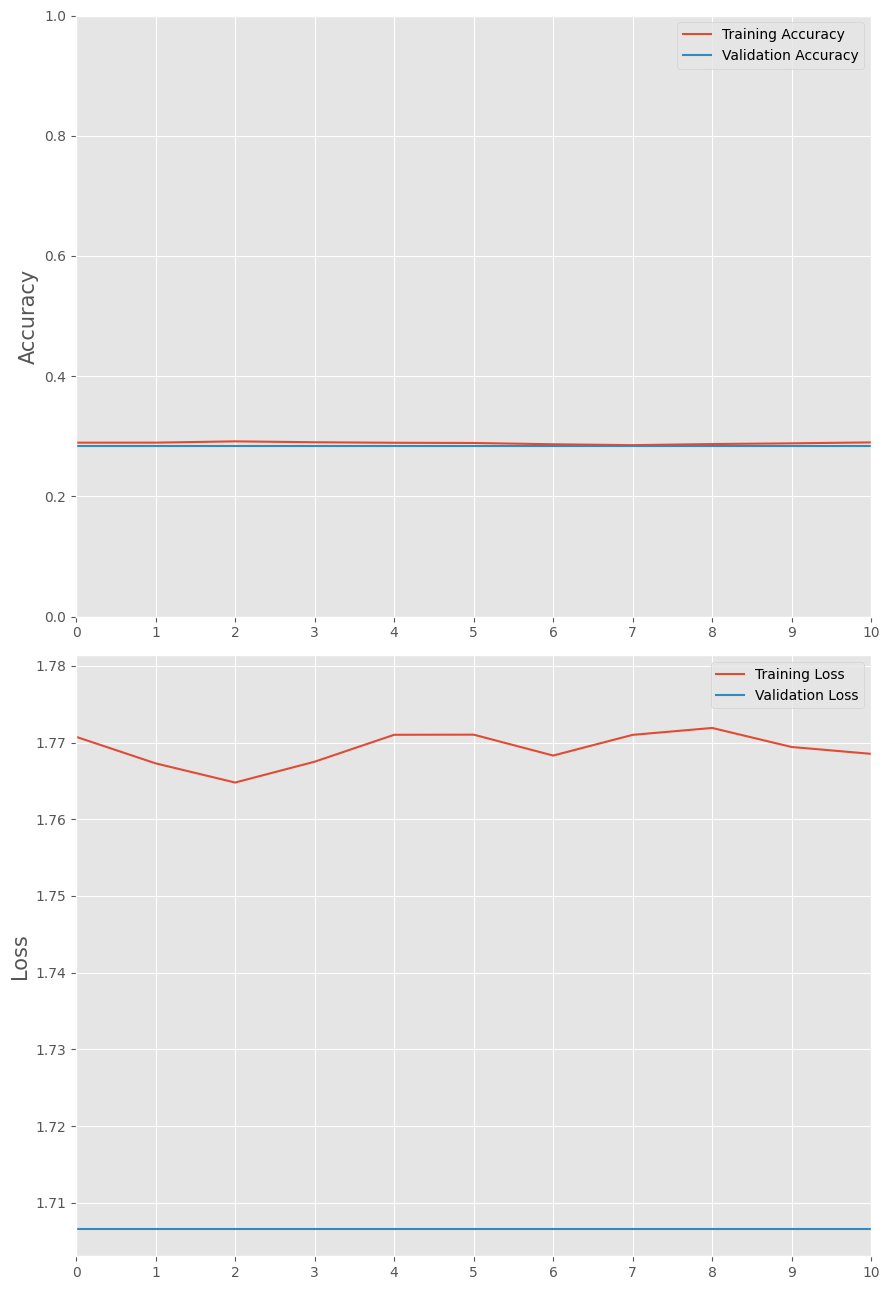

In [69]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_rnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_rnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_rnv2_n, label='Training Loss')
axs[1].plot(test_loss_rnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("rnv2 Training and Testing Loss")
plt.show()

In [70]:
np.array(scores_rnv2).shape

(10, 302, 4)

In [71]:
y_pred_rnv2 = np.argmax(scores_rnv2,axis=2)

In [72]:
y_pred_rnv2.shape

(10, 302)

In [73]:
from sklearn.metrics import accuracy_score
acc_scores_rnv2 = []
for i in range(len(y_test_all_rnv2)):
    acc_scores_rnv2.append(accuracy_score(y_true = y_test_all_rnv2[i],y_pred = y_pred_rnv2[i]))

In [74]:
import gc
gc.collect()

23839

In [75]:
acc_scores_rnv2

[0.34105960264900664,
 0.3576158940397351,
 0.347682119205298,
 0.2052980132450331,
 0.32781456953642385,
 0.30132450331125826,
 0.18211920529801323,
 0.3841059602649007,
 0.3344370860927152,
 0.18211920529801323]

In [76]:
df_acc = pd.DataFrame([acc_scores_rnv2])

df_acc.to_csv('rnv2_accuracy', index=False)

df_acc = pd.read_csv('rnv2_accuracy')

acc_scores_rnv2 = df_acc.iloc[0].values

In [77]:
y_test_all_n = np.array(y_test_all_rnv2)

y_pred_rnv2_n = y_pred_rnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

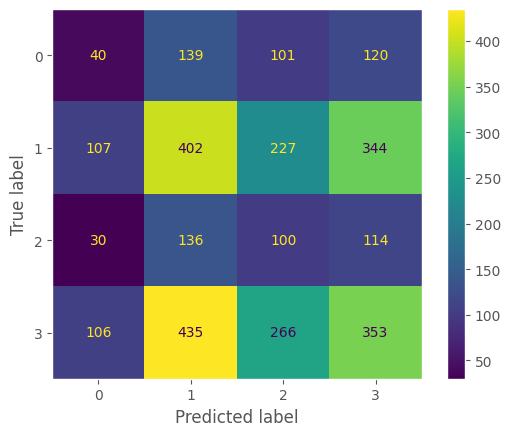

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_rnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("rnv2")
plt.show()

In [79]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_rnv2_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.14      0.10      0.12       400
           1       0.36      0.37      0.37      1080
           2       0.14      0.26      0.19       380
           3       0.38      0.30      0.34      1160

    accuracy                           0.30      3020
   macro avg       0.26      0.26      0.25      3020
weighted avg       0.31      0.30      0.30      3020



# VGG16

In [14]:
import gc
gc.collect()

0

In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg16 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg16.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [16]:
def create_model_vgg16():

    model_vgg16 = tf.keras.Sequential([
    tf.keras.applications.VGG16(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg16.trainable = False
    return model_vgg16

In [17]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg16 = []
y_test_all_vgg16 = []
train_acc_vgg16 = []
test_acc_vgg16 = []
train_loss_vgg16 = []
test_loss_vgg16 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_vgg16.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg16 = None
    model_vgg16 = create_model_vgg16()
        
    model_vgg16.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg16.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg16.predict(X_test)
    
    scores_vgg16.append(x)
    train_acc_vgg16.append(history.history["accuracy"])
    test_acc_vgg16.append(history.history["val_accuracy"])
    train_loss_vgg16.append(history.history["loss"])
    test_loss_vgg16.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 12s 91ms/step - loss: 1.3976 - accuracy: 0.3050 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 56ms/step - loss: 1.3855 - accuracy: 0.3242 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 56ms/step - loss: 1.3796 - accuracy: 0.3185 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 56ms/step - loss: 1.3878 - accuracy: 0.3177 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 56ms/step - loss: 1.3791 - accuracy: 0.3050 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 56ms/step - loss: 1.3888 - accuracy: 0.3034 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 7/100
77/77 [=========================

Time taken for epoch 29: 4.43 seconds
77/77 [==============================] - 4s 58ms/step - loss: 1.3944 - accuracy: 0.3078 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3875 - accuracy: 0.2956 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3924 - accuracy: 0.3164 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3842 - accuracy: 0.3152 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3967 - accuracy: 0.3078 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3920 - accuracy: 0.3058 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3816 - accuracy: 0.3148 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3836 - accuracy: 0.3156 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3880 - accuracy: 0.3267 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3853 - accuracy: 0.3078 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3904 - accuracy: 0.3038 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3884 - accuracy: 0.3038 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

77/77 [==============================] - 4s 58ms/step - loss: 1.3848 - accuracy: 0.3226 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3973 - accuracy: 0.3140 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3878 - accuracy: 0.3087 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3947 - accuracy: 0.3017 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3865 - accuracy: 0.3201 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3826 - accuracy: 0.3246 - val_loss: 1.2984 - val_accuracy: 0.4154 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] -

Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 1.7052 - accuracy: 0.2899
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 4.42 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.7035 - accuracy: 0.2915 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 4s 57ms/step - loss: 1.7025 - accuracy: 0.2829 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6910 - accuracy: 0.3021 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 4s 57ms/step - loss: 1.7095 - accuracy: 0.2960 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6961 - accuracy: 0.2964 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 1.7040 - accuracy: 0.2866
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 4.40 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.7047 - accuracy: 0.2854 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 4s 58ms/step - loss: 1.6858 - accuracy: 0.2997 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 4s 58ms/step - loss: 1.7067 - accuracy: 0.2915 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 4s 57ms/step - loss: 1.7041 - accuracy: 0.2997 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 4s 58ms/step - loss: 1.6964 - accuracy: 0.2911 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 6.4000e-08
Epoch 48/100
77

76/77 [============================>.] - ETA: 0s - loss: 1.7000 - accuracy: 0.2932
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 4.42 seconds
77/77 [==============================] - 4s 58ms/step - loss: 1.6998 - accuracy: 0.2939 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6951 - accuracy: 0.2919 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6974 - accuracy: 0.2939 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6909 - accuracy: 0.2935 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 4s 57ms/step - loss: 1.7048 - accuracy: 0.2903 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 1.0240e-10
Epoch 76/100
7

76/77 [============================>.] - ETA: 0s - loss: 1.7134 - accuracy: 0.2870
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 4.45 seconds
77/77 [==============================] - 4s 58ms/step - loss: 1.7121 - accuracy: 0.2874 - val_loss: 1.7483 - val_accuracy: 0.3750 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 50ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 5s 60ms/step - loss: 1.8691 - accuracy: 0.1276 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 58ms/step - loss: 1.8799 - accuracy: 0.1296 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8675 - accuracy: 0.1292 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8731 - accuracy: 0.1

77/77 [==============================] - 4s 58ms/step - loss: 1.8704 - accuracy: 0.1304 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 4s 58ms/step - loss: 1.8671 - accuracy: 0.1300 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.8719 - accuracy: 0.1279
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.39 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.8703 - accuracy: 0.1284 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 58ms/step - loss: 1.8756 - accuracy: 0.1243 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 58ms/step - loss: 1.8780 - accuracy: 0.1255 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 4s 57ms/step - loss: 1.8684 - accuracy: 0.1312 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 4s 58ms/step - loss: 1.8555 - accuracy: 0.1325 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 1.8650 - accuracy: 0.1287
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 4.42 seconds
77/77 [==============================] - 4s 58ms/step - loss: 1.8658 - accuracy: 0.1284 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8748 - accuracy: 0.1304 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8618 - accuracy: 0.1292 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 2.5600e-09
Epoch 60/100
7

77/77 [==============================] - 4s 57ms/step - loss: 1.8715 - accuracy: 0.1292 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 4s 58ms/step - loss: 1.8593 - accuracy: 0.1292 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 1.8608 - accuracy: 0.1283
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 4.43 seconds
77/77 [==============================] - 4s 58ms/step - loss: 1.8614 - accuracy: 0.1284 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 4s 58ms/step - loss: 1.8641 - accuracy: 0.1300 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8698 - accuracy: 0.1292 - val_loss: 1.7993 - val_accuracy: 0.1250 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 4s 58ms/step - loss: 1.3544 - accuracy: 0.3733 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3615 - accuracy: 0.3684 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3521 - accuracy: 0.3757 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3659 - accuracy: 0.3663 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3661 - accuracy: 0.3720
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 4.38 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.3661 - accuracy: 0.3720 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 2.0000e-04
Epoch 16/100
7

77/77 [==============================] - 4s 58ms/step - loss: 1.3589 - accuracy: 0.3675 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3578 - accuracy: 0.3741 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3653 - accuracy: 0.3708 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3646 - accuracy: 0.3708 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 1.3625 - accuracy: 0.3701
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 4.44 seconds
77/77 [==============================] - 4s 58ms/step - loss: 1.3616 - accuracy: 0.3704 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 4s 57ms/step - loss: 1.3650 - accuracy: 0.3720 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3665 - accuracy: 0.3622 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3503 - accuracy: 0.3696 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3670 - accuracy: 0.3651 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 5.1200e-10
Epoch 71/100
76/77 [============================>.] - ETA: 0s - loss: 1.3594 - accuracy: 0.3672
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 4.43 seconds
77/77 [==============================] - 4s 58ms/step - loss: 1.3590 - accuracy: 0.3671 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 5.1200e-10
Epoch 72/100
7

77/77 [==============================] - 4s 57ms/step - loss: 1.3618 - accuracy: 0.3704 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3654 - accuracy: 0.3655 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3569 - accuracy: 0.3684 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3581 - accuracy: 0.3651 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 1.3608 - accuracy: 0.3684
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 4.38 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.3612 - accuracy: 0.3679 - val_loss: 1.3019 - val_accuracy: 0.4228 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 4s 57ms/step - loss: 1.5528 - accuracy: 0.1889 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 4s 58ms/step - loss: 1.5456 - accuracy: 0.1909 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 4s 58ms/step - loss: 1.5506 - accuracy: 0.1832 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 4s 58ms/step - loss: 1.5400 - accuracy: 0.1987 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5474 - accuracy: 0.1934 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5516 - accuracy: 0.1942 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] -

77/77 [==============================] - 4s 57ms/step - loss: 1.5439 - accuracy: 0.1889 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5540 - accuracy: 0.1950 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 4s 58ms/step - loss: 1.5508 - accuracy: 0.1901 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5425 - accuracy: 0.1934 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 4s 58ms/step - loss: 1.5397 - accuracy: 0.1983 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5569 - accuracy: 0.1975 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] -

77/77 [==============================] - 4s 57ms/step - loss: 1.5388 - accuracy: 0.1913 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 4s 58ms/step - loss: 1.5487 - accuracy: 0.1836 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5423 - accuracy: 0.1889 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5447 - accuracy: 0.1905 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5583 - accuracy: 0.1832 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5501 - accuracy: 0.1893 - val_loss: 1.5595 - val_accuracy: 0.0882 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] -

77/77 [==============================] - 4s 58ms/step - loss: 1.5808 - accuracy: 0.3287 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.5935 - accuracy: 0.3281
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 4.45 seconds
77/77 [==============================] - 4s 58ms/step - loss: 1.5934 - accuracy: 0.3287 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5881 - accuracy: 0.3226 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5876 - accuracy: 0.3230 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5745 - accuracy: 0.3283 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 4s 57ms/step - loss: 1.5759 - accuracy: 0.3279 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 1.5791 - accuracy: 0.3191
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 4.43 seconds
77/77 [==============================] - 4s 58ms/step - loss: 1.5788 - accuracy: 0.3185 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5802 - accuracy: 0.3205 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5952 - accuracy: 0.3291 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 4s 58ms/step - loss: 1.5872 - accuracy: 0.3168 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 40/100
77

77/77 [==============================] - 4s 58ms/step - loss: 1.5759 - accuracy: 0.3295 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.5774 - accuracy: 0.3146
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 4.38 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.5756 - accuracy: 0.3148 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 4s 58ms/step - loss: 1.5747 - accuracy: 0.3279 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 4s 58ms/step - loss: 1.5751 - accuracy: 0.3307 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5873 - accuracy: 0.3132 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 68/100
77/7

77/77 [==============================] - 4s 57ms/step - loss: 1.5817 - accuracy: 0.3205 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 1.5778 - accuracy: 0.3306
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 4.41 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.5795 - accuracy: 0.3291 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5862 - accuracy: 0.3295 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5888 - accuracy: 0.3242 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5884 - accuracy: 0.3185 - val_loss: 1.4872 - val_accuracy: 0.3676 - lr: 8.1920e-13
Epoch 96/100
77

77/77 [==============================] - 4s 58ms/step - loss: 1.3879 - accuracy: 0.3299 - val_loss: 1.3033 - val_accuracy: 0.4191 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3988 - accuracy: 0.3168 - val_loss: 1.3033 - val_accuracy: 0.4191 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3906 - accuracy: 0.3217 - val_loss: 1.3033 - val_accuracy: 0.4191 - lr: 4.0000e-05
Epoch 22/100
76/77 [============================>.] - ETA: 0s - loss: 1.3916 - accuracy: 0.3273
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 4.43 seconds
77/77 [==============================] - 4s 58ms/step - loss: 1.3907 - accuracy: 0.3275 - val_loss: 1.3033 - val_accuracy: 0.4191 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3997 - accuracy: 0.3291 - val_loss: 1.3033 - val_accuracy: 0.4191 - lr: 8.0000e-06
Epoch 24/100
77

77/77 [==============================] - 4s 57ms/step - loss: 1.4061 - accuracy: 0.3123 - val_loss: 1.3033 - val_accuracy: 0.4191 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3901 - accuracy: 0.3246 - val_loss: 1.3033 - val_accuracy: 0.4191 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3988 - accuracy: 0.3189 - val_loss: 1.3033 - val_accuracy: 0.4191 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.3976 - accuracy: 0.3209
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 4.39 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.3976 - accuracy: 0.3209 - val_loss: 1.3033 - val_accuracy: 0.4191 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3971 - accuracy: 0.3299 - val_loss: 1.3033 - val_accuracy: 0.4191 - lr: 1.2800e-08
Epoch 52/100
7

77/77 [==============================] - 4s 57ms/step - loss: 1.3989 - accuracy: 0.3164 - val_loss: 1.3033 - val_accuracy: 0.4191 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3926 - accuracy: 0.3238 - val_loss: 1.3033 - val_accuracy: 0.4191 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3974 - accuracy: 0.3397 - val_loss: 1.3033 - val_accuracy: 0.4191 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 1.4067 - accuracy: 0.3331
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 4.42 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.4059 - accuracy: 0.3336 - val_loss: 1.3033 - val_accuracy: 0.4191 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 4s 57ms/step - loss: 1.4088 - accuracy: 0.3185 - val_loss: 1.3033 - val_accuracy: 0.4191 - lr: 2.0480e-11
Epoch 80/100
7

Epoch 3/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3457 - accuracy: 0.3643 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3358 - accuracy: 0.3708 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3381 - accuracy: 0.3643 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3425 - accuracy: 0.3610 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3440 - accuracy: 0.3643 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.3371 - accuracy: 0.3623
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 4.42 seconds
77/77 [=========

77/77 [==============================] - 4s 57ms/step - loss: 1.3338 - accuracy: 0.3663 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3426 - accuracy: 0.3557 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3348 - accuracy: 0.3675 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3487 - accuracy: 0.3545 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3446 - accuracy: 0.3590 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 1.3421 - accuracy: 0.3688
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 4.39 seconds
77

77/77 [==============================] - 4s 57ms/step - loss: 1.3305 - accuracy: 0.3659 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3361 - accuracy: 0.3622 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3434 - accuracy: 0.3598 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3375 - accuracy: 0.3602 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3403 - accuracy: 0.3700 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.3365 - accuracy: 0.3614
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 4.40 seconds
77/7

77/77 [==============================] - 4s 57ms/step - loss: 1.3483 - accuracy: 0.3532 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3426 - accuracy: 0.3651 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3376 - accuracy: 0.3630 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3414 - accuracy: 0.3524 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3368 - accuracy: 0.3635 - val_loss: 1.3358 - val_accuracy: 0.3382 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 1.3341 - accuracy: 0.3655
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 4.43 seconds
77

Time taken for epoch 15: 4.38 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.5392 - accuracy: 0.2878 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5432 - accuracy: 0.2719 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5397 - accuracy: 0.2739 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 4s 58ms/step - loss: 1.5365 - accuracy: 0.2809 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5434 - accuracy: 0.2731 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5477 - accuracy: 0.2698 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 21/100
77

Epoch 44/100
77/77 [==============================] - 4s 58ms/step - loss: 1.5505 - accuracy: 0.2486 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5366 - accuracy: 0.2747 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5450 - accuracy: 0.2715 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 4s 58ms/step - loss: 1.5419 - accuracy: 0.2768 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5362 - accuracy: 0.2784 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5314 - accuracy: 0.2788 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 6.4000e-08
Epoch 50/100
76/77 [====================

77/77 [==============================] - 4s 58ms/step - loss: 1.5266 - accuracy: 0.2878 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5383 - accuracy: 0.2719 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5374 - accuracy: 0.2715 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 4s 58ms/step - loss: 1.5498 - accuracy: 0.2539 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 4s 58ms/step - loss: 1.5438 - accuracy: 0.2625 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5338 - accuracy: 0.2702 - val_loss: 1.5451 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] -

10/10 [==============================] - 1s 49ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 5s 60ms/step - loss: 1.3521 - accuracy: 0.3651 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3537 - accuracy: 0.3622 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3456 - accuracy: 0.3757 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3503 - accuracy: 0.3639 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3551 - accuracy: 0.3536 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3549 - accuracy: 0.3520 - val_loss: 1.3252 - val_accuracy: 0.3676 - l

Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.3500 - accuracy: 0.3586
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.44 seconds
77/77 [==============================] - 4s 58ms/step - loss: 1.3496 - accuracy: 0.3590 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3539 - accuracy: 0.3626 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3447 - accuracy: 0.3610 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3505 - accuracy: 0.3528 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3544 - accuracy: 0.3536 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 1.6000e-06
E

76/77 [============================>.] - ETA: 0s - loss: 1.3488 - accuracy: 0.3586
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 4.44 seconds
77/77 [==============================] - 4s 58ms/step - loss: 1.3490 - accuracy: 0.3585 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3552 - accuracy: 0.3561 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3486 - accuracy: 0.3655 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3489 - accuracy: 0.3655 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3541 - accuracy: 0.3557 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 2.5600e-09
Epoch 62/100
7

77/77 [==============================] - ETA: 0s - loss: 1.3519 - accuracy: 0.3557
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 4.38 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.3519 - accuracy: 0.3557 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3534 - accuracy: 0.3581 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 58ms/step - loss: 1.3438 - accuracy: 0.3679 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3459 - accuracy: 0.3684 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3500 - accuracy: 0.3679 - val_loss: 1.3252 - val_accuracy: 0.3676 - lr: 4.0960e-12
Epoch 90/100
77

In [18]:
import gc
gc.collect()

0

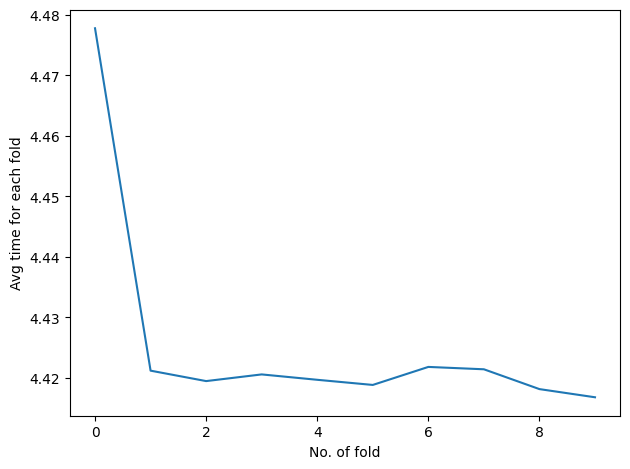

In [19]:
import matplotlib.pyplot as plt

times_vgg16_n = np.zeros((10,100))
for i, row in enumerate(times_vgg16):
    times_vgg16_n[i, :len(row)] = row

times_vgg16_n_n = np.mean(times_vgg16_n,axis=1)

plt.plot(times_vgg16_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg16 times")
plt.show()

In [20]:
train_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg16):
    train_acc_vgg16_n[i, :len(row)] = row
    
test_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg16):
    test_acc_vgg16_n[i, :len(row)] = row
    
train_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg16):
    train_loss_vgg16_n[i, :len(row)] = row
    
test_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg16):
    test_loss_vgg16_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg16_n = np.mean(train_acc_vgg16_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg16_n = np.mean(test_acc_vgg16_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg16_n = np.mean(train_loss_vgg16_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg16_n = np.mean(test_loss_vgg16_n,axis=0)

In [21]:
data = [train_acc_vgg16_n,test_acc_vgg16_n,train_loss_vgg16_n,test_loss_vgg16_n]

df = pd.DataFrame(data)
df.to_csv('vgg16_acc', index=False)
df = pd.read_csv('vgg16_acc')

train_acc_vgg16_n = df.iloc[0]
test_acc_vgg16_n = df.iloc[1]
train_loss_vgg16_n = df.iloc[2]
test_loss_vgg16_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg16_n_n])
df_t.to_csv('vgg16_times', index=False)
df_t = pd.read_csv('vgg16_times')

times_vgg16_n_n = df_t.iloc[0]

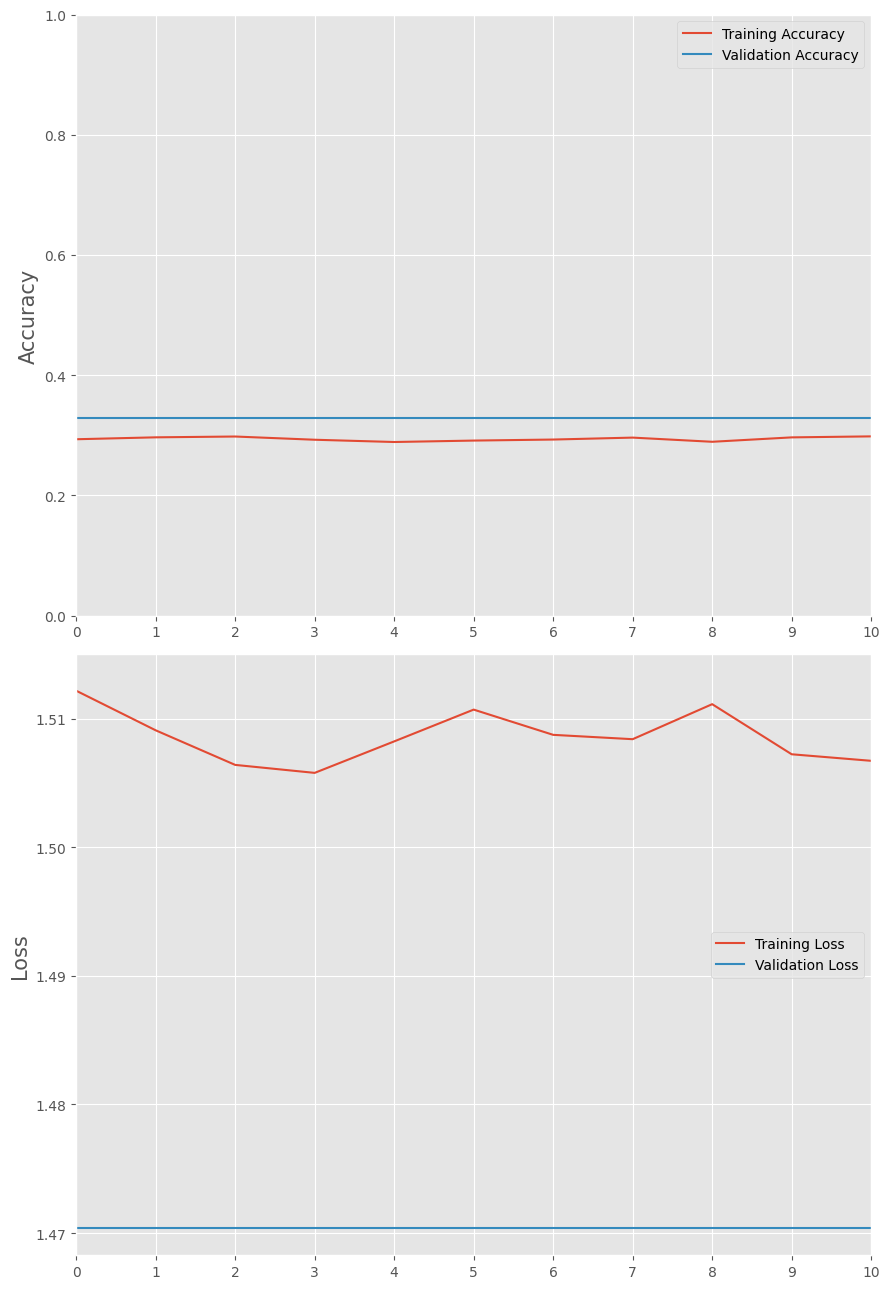

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg16_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg16_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg16_n, label='Training Loss')
axs[1].plot(test_loss_vgg16_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg16 Training and Testing Loss")
plt.show()

In [23]:
np.array(scores_vgg16).shape

(10, 302, 4)

In [24]:
y_pred_vgg16 = np.argmax(scores_vgg16,axis=2)

In [25]:
y_pred_vgg16.shape

(10, 302)

In [26]:
from sklearn.metrics import accuracy_score
acc_scores_vgg16 = []
for i in range(len(y_test_all_vgg16)):
    acc_scores_vgg16.append(accuracy_score(y_true = y_test_all_vgg16[i],y_pred = y_pred_vgg16[i]))

In [27]:
acc_scores_vgg16

[0.36423841059602646,
 0.3576158940397351,
 0.12582781456953643,
 0.3841059602649007,
 0.1291390728476821,
 0.3576158940397351,
 0.37748344370860926,
 0.3841059602649007,
 0.3708609271523179,
 0.3841059602649007]

In [28]:
df_acc = pd.DataFrame([acc_scores_vgg16])

df_acc.to_csv('vgg16_accuracy', index=False)

df_acc = pd.read_csv('vgg16_accuracy')

acc_scores_vgg16 = df_acc.iloc[0].values

In [29]:
y_test_all_n = np.array(y_test_all_vgg16)

y_pred_vgg16_n = y_pred_vgg16.flatten()
y_test_all_n = y_test_all_n.flatten()

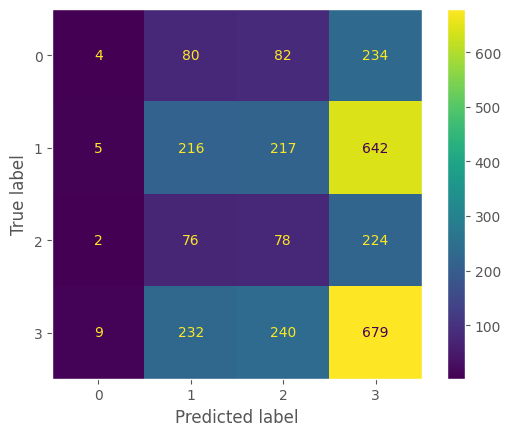

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg16_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg16")
plt.show()

In [31]:
import gc
gc.collect()

3330

In [32]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg16_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.20      0.01      0.02       400
           1       0.36      0.20      0.26      1080
           2       0.13      0.21      0.16       380
           3       0.38      0.59      0.46      1160

    accuracy                           0.32      3020
   macro avg       0.27      0.25      0.22      3020
weighted avg       0.32      0.32      0.29      3020



# VGG19

In [33]:
import gc
gc.collect()

0

In [34]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg19 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg19.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [35]:
def create_model_vgg19():

    model_vgg19 = tf.keras.Sequential([
    tf.keras.applications.VGG19(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg19.trainable = False
    return model_vgg19

In [36]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg19 = []
y_test_all_vgg19 = []
train_acc_vgg19 = []
test_acc_vgg19 = []
train_loss_vgg19 = []
test_loss_vgg19 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_vgg19.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg19 = None
    model_vgg19 = create_model_vgg19()
        
    model_vgg19.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg19.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg19.predict(X_test)
    
    scores_vgg19.append(x)
    train_acc_vgg19.append(history.history["accuracy"])
    test_acc_vgg19.append(history.history["val_accuracy"])
    train_loss_vgg19.append(history.history["loss"])
    test_loss_vgg19.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 6s 69ms/step - loss: 1.3970 - accuracy: 0.3508 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 66ms/step - loss: 1.3954 - accuracy: 0.3467 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3867 - accuracy: 0.3512 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3861 - accuracy: 0.3557 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3867 - accuracy: 0.3540 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3835 - accuracy: 0.3594 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Time taken for epoch 29: 5.16 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.3880 - accuracy: 0.3606 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3982 - accuracy: 0.3639 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3959 - accuracy: 0.3659 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3897 - accuracy: 0.3724 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3917 - accuracy: 0.3614 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3869 - accuracy: 0.3675 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3842 - accuracy: 0.3549 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3822 - accuracy: 0.3581 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3868 - accuracy: 0.3630 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3919 - accuracy: 0.3512 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3905 - accuracy: 0.3491 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3863 - accuracy: 0.3561 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

77/77 [==============================] - 5s 67ms/step - loss: 1.3881 - accuracy: 0.3520 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3966 - accuracy: 0.3479 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3823 - accuracy: 0.3528 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 5s 66ms/step - loss: 1.3948 - accuracy: 0.3561 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3887 - accuracy: 0.3553 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3914 - accuracy: 0.3581 - val_loss: 1.3792 - val_accuracy: 0.2794 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] -

Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 1.4517 - accuracy: 0.3236
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 5.18 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.4534 - accuracy: 0.3230 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4537 - accuracy: 0.3267 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 5s 68ms/step - loss: 1.4576 - accuracy: 0.3250 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4491 - accuracy: 0.3340 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4435 - accuracy: 0.3250 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 1.4510 - accuracy: 0.3285
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 5.15 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.4517 - accuracy: 0.3287 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4497 - accuracy: 0.3279 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4560 - accuracy: 0.3168 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4467 - accuracy: 0.3262 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4524 - accuracy: 0.3246 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 6.4000e-08
Epoch 48/100
77

76/77 [============================>.] - ETA: 0s - loss: 1.4563 - accuracy: 0.3269
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 5.18 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.4554 - accuracy: 0.3279 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4524 - accuracy: 0.3246 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4648 - accuracy: 0.3164 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4475 - accuracy: 0.3365 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4446 - accuracy: 0.3348 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 1.0240e-10
Epoch 76/100
7

76/77 [============================>.] - ETA: 0s - loss: 1.4564 - accuracy: 0.3261
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 5.15 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.4562 - accuracy: 0.3262 - val_loss: 1.3896 - val_accuracy: 0.4081 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 57ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 6s 70ms/step - loss: 1.9196 - accuracy: 0.1382 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9276 - accuracy: 0.1374 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9191 - accuracy: 0.1329 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9421 - accuracy: 0.1

77/77 [==============================] - 5s 67ms/step - loss: 1.9309 - accuracy: 0.1361 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9355 - accuracy: 0.1329 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.9339 - accuracy: 0.1365
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 5.16 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.9345 - accuracy: 0.1361 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9348 - accuracy: 0.1378 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9431 - accuracy: 0.1365 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 5s 67ms/step - loss: 1.9305 - accuracy: 0.1341 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9260 - accuracy: 0.1365 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 1.9413 - accuracy: 0.1357
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 5.14 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.9406 - accuracy: 0.1365 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9280 - accuracy: 0.1341 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9323 - accuracy: 0.1398 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 60/100
7

77/77 [==============================] - 5s 67ms/step - loss: 1.9293 - accuracy: 0.1374 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9361 - accuracy: 0.1365 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 1.9266 - accuracy: 0.1353
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 5.20 seconds
77/77 [==============================] - 5s 68ms/step - loss: 1.9274 - accuracy: 0.1349 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9319 - accuracy: 0.1361 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9418 - accuracy: 0.1349 - val_loss: 1.9103 - val_accuracy: 0.1287 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 5s 67ms/step - loss: 1.3628 - accuracy: 0.3496 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3652 - accuracy: 0.3602 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3649 - accuracy: 0.3487 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3541 - accuracy: 0.3516 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 2.0000e-04
Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 1.3642 - accuracy: 0.3569
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 5.16 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.3634 - accuracy: 0.3577 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 2.0000e-04
Epoch 16/100
7

77/77 [==============================] - 5s 67ms/step - loss: 1.3576 - accuracy: 0.3504 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3578 - accuracy: 0.3446 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3700 - accuracy: 0.3438 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3603 - accuracy: 0.3549 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 1.3618 - accuracy: 0.3475
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 5.14 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.3615 - accuracy: 0.3479 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 5s 66ms/step - loss: 1.3578 - accuracy: 0.3585 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3600 - accuracy: 0.3549 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3613 - accuracy: 0.3549 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3592 - accuracy: 0.3520 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 5.1200e-10
Epoch 71/100
76/77 [============================>.] - ETA: 0s - loss: 1.3507 - accuracy: 0.3627
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 5.17 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.3508 - accuracy: 0.3626 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 5.1200e-10
Epoch 72/100
7

77/77 [==============================] - 5s 67ms/step - loss: 1.3632 - accuracy: 0.3598 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3657 - accuracy: 0.3487 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3591 - accuracy: 0.3577 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3595 - accuracy: 0.3500 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 1.3605 - accuracy: 0.3565
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 5.12 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.3604 - accuracy: 0.3561 - val_loss: 1.3773 - val_accuracy: 0.3493 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 5s 67ms/step - loss: 1.9448 - accuracy: 0.2310 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9693 - accuracy: 0.2175 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9684 - accuracy: 0.2289 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9549 - accuracy: 0.2138 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9479 - accuracy: 0.2265 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 5s 66ms/step - loss: 1.9444 - accuracy: 0.2281 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] -

77/77 [==============================] - 5s 67ms/step - loss: 1.9537 - accuracy: 0.2232 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9394 - accuracy: 0.2257 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 5s 66ms/step - loss: 1.9484 - accuracy: 0.2375 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9601 - accuracy: 0.2367 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9558 - accuracy: 0.2289 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 5s 66ms/step - loss: 1.9583 - accuracy: 0.2330 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] -

77/77 [==============================] - 5s 67ms/step - loss: 1.9569 - accuracy: 0.2175 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9653 - accuracy: 0.2159 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9506 - accuracy: 0.2265 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9689 - accuracy: 0.2142 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9540 - accuracy: 0.2179 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 5s 66ms/step - loss: 1.9473 - accuracy: 0.2289 - val_loss: 1.9338 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] -

77/77 [==============================] - 5s 67ms/step - loss: 1.4102 - accuracy: 0.3835 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.4168 - accuracy: 0.3701
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 5.15 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.4161 - accuracy: 0.3692 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4106 - accuracy: 0.3855 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4163 - accuracy: 0.3741 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4119 - accuracy: 0.3745 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 5s 67ms/step - loss: 1.4113 - accuracy: 0.3684 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 1.4074 - accuracy: 0.3836
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 5.13 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.4093 - accuracy: 0.3831 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4142 - accuracy: 0.3765 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3979 - accuracy: 0.3896 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4187 - accuracy: 0.3716 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 3.2000e-07
Epoch 40/100
77

77/77 [==============================] - 5s 67ms/step - loss: 1.4218 - accuracy: 0.3863 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.4154 - accuracy: 0.3635
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 5.16 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.4193 - accuracy: 0.3626 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4234 - accuracy: 0.3761 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4062 - accuracy: 0.3876 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4148 - accuracy: 0.3880 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 5.1200e-10
Epoch 68/100
77/7

77/77 [==============================] - 5s 67ms/step - loss: 1.4112 - accuracy: 0.3953 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 1.4166 - accuracy: 0.3721
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 5.14 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.4166 - accuracy: 0.3729 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4134 - accuracy: 0.3913 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4155 - accuracy: 0.3761 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4177 - accuracy: 0.3798 - val_loss: 1.3167 - val_accuracy: 0.3860 - lr: 8.1920e-13
Epoch 96/100
77

77/77 [==============================] - 5s 67ms/step - loss: 1.4311 - accuracy: 0.3083 - val_loss: 1.4260 - val_accuracy: 0.3493 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 5s 66ms/step - loss: 1.4423 - accuracy: 0.2939 - val_loss: 1.4260 - val_accuracy: 0.3493 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4302 - accuracy: 0.3164 - val_loss: 1.4260 - val_accuracy: 0.3493 - lr: 4.0000e-05
Epoch 22/100
76/77 [============================>.] - ETA: 0s - loss: 1.4374 - accuracy: 0.3092
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 5.11 seconds
77/77 [==============================] - 5s 66ms/step - loss: 1.4374 - accuracy: 0.3087 - val_loss: 1.4260 - val_accuracy: 0.3493 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 5s 66ms/step - loss: 1.4337 - accuracy: 0.3074 - val_loss: 1.4260 - val_accuracy: 0.3493 - lr: 8.0000e-06
Epoch 24/100
77

77/77 [==============================] - 5s 67ms/step - loss: 1.4335 - accuracy: 0.3123 - val_loss: 1.4260 - val_accuracy: 0.3493 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4425 - accuracy: 0.3107 - val_loss: 1.4260 - val_accuracy: 0.3493 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4287 - accuracy: 0.3091 - val_loss: 1.4260 - val_accuracy: 0.3493 - lr: 6.4000e-08
Epoch 50/100
76/77 [============================>.] - ETA: 0s - loss: 1.4252 - accuracy: 0.3150
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 5.16 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.4249 - accuracy: 0.3140 - val_loss: 1.4260 - val_accuracy: 0.3493 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4424 - accuracy: 0.3058 - val_loss: 1.4260 - val_accuracy: 0.3493 - lr: 1.2800e-08
Epoch 52/100
7

77/77 [==============================] - 5s 67ms/step - loss: 1.4325 - accuracy: 0.3271 - val_loss: 1.4260 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4385 - accuracy: 0.3148 - val_loss: 1.4260 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4356 - accuracy: 0.3029 - val_loss: 1.4260 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 1.4333 - accuracy: 0.3121
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 5.16 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.4328 - accuracy: 0.3123 - val_loss: 1.4260 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4427 - accuracy: 0.3074 - val_loss: 1.4260 - val_accuracy: 0.3493 - lr: 2.0480e-11
Epoch 80/100
7

Epoch 3/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8134 - accuracy: 0.1582 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8131 - accuracy: 0.1643 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8071 - accuracy: 0.1582 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8035 - accuracy: 0.1562 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8130 - accuracy: 0.1615 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.8136 - accuracy: 0.1612
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 5.15 seconds
77/77 [=========

77/77 [==============================] - 5s 67ms/step - loss: 1.8249 - accuracy: 0.1496 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7963 - accuracy: 0.1611 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8105 - accuracy: 0.1554 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8168 - accuracy: 0.1582 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8057 - accuracy: 0.1615 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 1.8167 - accuracy: 0.1521
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 5.16 seconds
77

77/77 [==============================] - 5s 66ms/step - loss: 1.8021 - accuracy: 0.1619 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7971 - accuracy: 0.1509 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8169 - accuracy: 0.1537 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8166 - accuracy: 0.1541 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8134 - accuracy: 0.1549 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.8289 - accuracy: 0.1530
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 5.17 seconds
77/7

77/77 [==============================] - 5s 67ms/step - loss: 1.8404 - accuracy: 0.1533 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8126 - accuracy: 0.1623 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8033 - accuracy: 0.1578 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8188 - accuracy: 0.1652 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8132 - accuracy: 0.1574 - val_loss: 1.7143 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 1.8026 - accuracy: 0.1587
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 5.17 seconds
77

Time taken for epoch 15: 5.11 seconds
77/77 [==============================] - 5s 66ms/step - loss: 1.4662 - accuracy: 0.2522 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4650 - accuracy: 0.2506 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4556 - accuracy: 0.2473 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4783 - accuracy: 0.2330 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4575 - accuracy: 0.2482 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4663 - accuracy: 0.2310 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 4.0000e-05
Epoch 21/100
77

Epoch 44/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4762 - accuracy: 0.2420 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4621 - accuracy: 0.2420 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 5s 66ms/step - loss: 1.4722 - accuracy: 0.2322 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4613 - accuracy: 0.2355 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4680 - accuracy: 0.2486 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4696 - accuracy: 0.2408 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 6.4000e-08
Epoch 50/100
76/77 [====================

77/77 [==============================] - 5s 67ms/step - loss: 1.4624 - accuracy: 0.2641 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4762 - accuracy: 0.2339 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4734 - accuracy: 0.2396 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4745 - accuracy: 0.2412 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 5s 68ms/step - loss: 1.4688 - accuracy: 0.2535 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 5s 66ms/step - loss: 1.4772 - accuracy: 0.2363 - val_loss: 1.3730 - val_accuracy: 0.1949 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] -

10/10 [==============================] - 1s 59ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 6s 69ms/step - loss: 1.5203 - accuracy: 0.1603 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5410 - accuracy: 0.1590 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5324 - accuracy: 0.1500 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5315 - accuracy: 0.1525 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5294 - accuracy: 0.1533 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5295 - accuracy: 0.1533 - val_loss: 1.4886 - val_accuracy: 0.1250 - l

Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.5267 - accuracy: 0.1558
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 5.11 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.5266 - accuracy: 0.1566 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5328 - accuracy: 0.1517 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 68ms/step - loss: 1.5286 - accuracy: 0.1492 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 5s 66ms/step - loss: 1.5335 - accuracy: 0.1545 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5204 - accuracy: 0.1558 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 1.6000e-06
E

76/77 [============================>.] - ETA: 0s - loss: 1.5292 - accuracy: 0.1451
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 5.12 seconds
77/77 [==============================] - 5s 66ms/step - loss: 1.5296 - accuracy: 0.1451 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5365 - accuracy: 0.1578 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5278 - accuracy: 0.1631 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5379 - accuracy: 0.1431 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5188 - accuracy: 0.1545 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 2.5600e-09
Epoch 62/100
7

76/77 [============================>.] - ETA: 0s - loss: 1.5366 - accuracy: 0.1497
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 5.13 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.5361 - accuracy: 0.1509 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5277 - accuracy: 0.1660 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5304 - accuracy: 0.1566 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 5s 66ms/step - loss: 1.5278 - accuracy: 0.1554 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5225 - accuracy: 0.1549 - val_loss: 1.4886 - val_accuracy: 0.1250 - lr: 4.0960e-12
Epoch 90/100
77

In [37]:
times_vgg19

[[5.709197521209717,
  5.113779544830322,
  5.162350654602051,
  5.161396741867065,
  5.129470586776733,
  5.13368821144104,
  5.162898302078247,
  5.1104817390441895,
  5.184911012649536,
  5.15751314163208,
  5.124742031097412,
  5.182806015014648,
  5.145443916320801,
  5.161387920379639,
  5.141419887542725,
  5.145901203155518,
  5.150697708129883,
  5.162673711776733,
  5.19989538192749,
  5.180633544921875,
  5.148509740829468,
  5.195319414138794,
  5.215296268463135,
  5.137104511260986,
  5.168246030807495,
  5.158667802810669,
  5.1514880657196045,
  5.189808368682861,
  5.157447338104248,
  5.142425060272217,
  5.168425798416138,
  5.190566778182983,
  5.115230560302734,
  5.175854682922363,
  5.185356140136719,
  5.147068500518799,
  5.203656911849976,
  5.178479909896851,
  5.125425815582275,
  5.153905868530273,
  5.1656622886657715,
  5.111417055130005,
  5.171053647994995,
  5.1545305252075195,
  5.155127048492432,
  5.135598659515381,
  5.174026250839233,
  5.15964031

In [38]:
import gc
gc.collect()

0

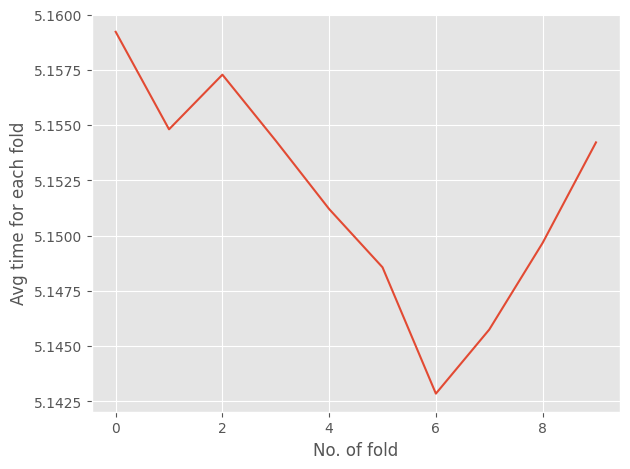

In [39]:
import matplotlib.pyplot as plt

times_vgg19_n = np.zeros((10,100))
for i, row in enumerate(times_vgg19):
    times_vgg19_n[i, :len(row)] = row

times_vgg19_n_n = np.mean(times_vgg19_n,axis=1)

plt.plot(times_vgg19_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg19 times")
plt.show()

In [40]:
train_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg19):
    train_acc_vgg19_n[i, :len(row)] = row
    
test_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg19):
    test_acc_vgg19_n[i, :len(row)] = row
    
train_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg19):
    train_loss_vgg19_n[i, :len(row)] = row
    
test_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg19):
    test_loss_vgg19_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg19_n = np.mean(train_acc_vgg19_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg19_n = np.mean(test_acc_vgg19_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg19_n = np.mean(train_loss_vgg19_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg19_n = np.mean(test_loss_vgg19_n,axis=0)

In [41]:
data = [train_acc_vgg19_n,test_acc_vgg19_n,train_loss_vgg19_n,test_loss_vgg19_n]

df = pd.DataFrame(data)
df.to_csv('vgg19_acc', index=False)
df = pd.read_csv('vgg19_acc')

train_acc_vgg19_n = df.iloc[0]
test_acc_vgg19_n = df.iloc[1]
train_loss_vgg19_n = df.iloc[2]
test_loss_vgg19_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg19_n_n])
df_t.to_csv('vgg19_times', index=False)
df_t = pd.read_csv('vgg19_times')

times_vgg19_n_n = df_t.iloc[0]

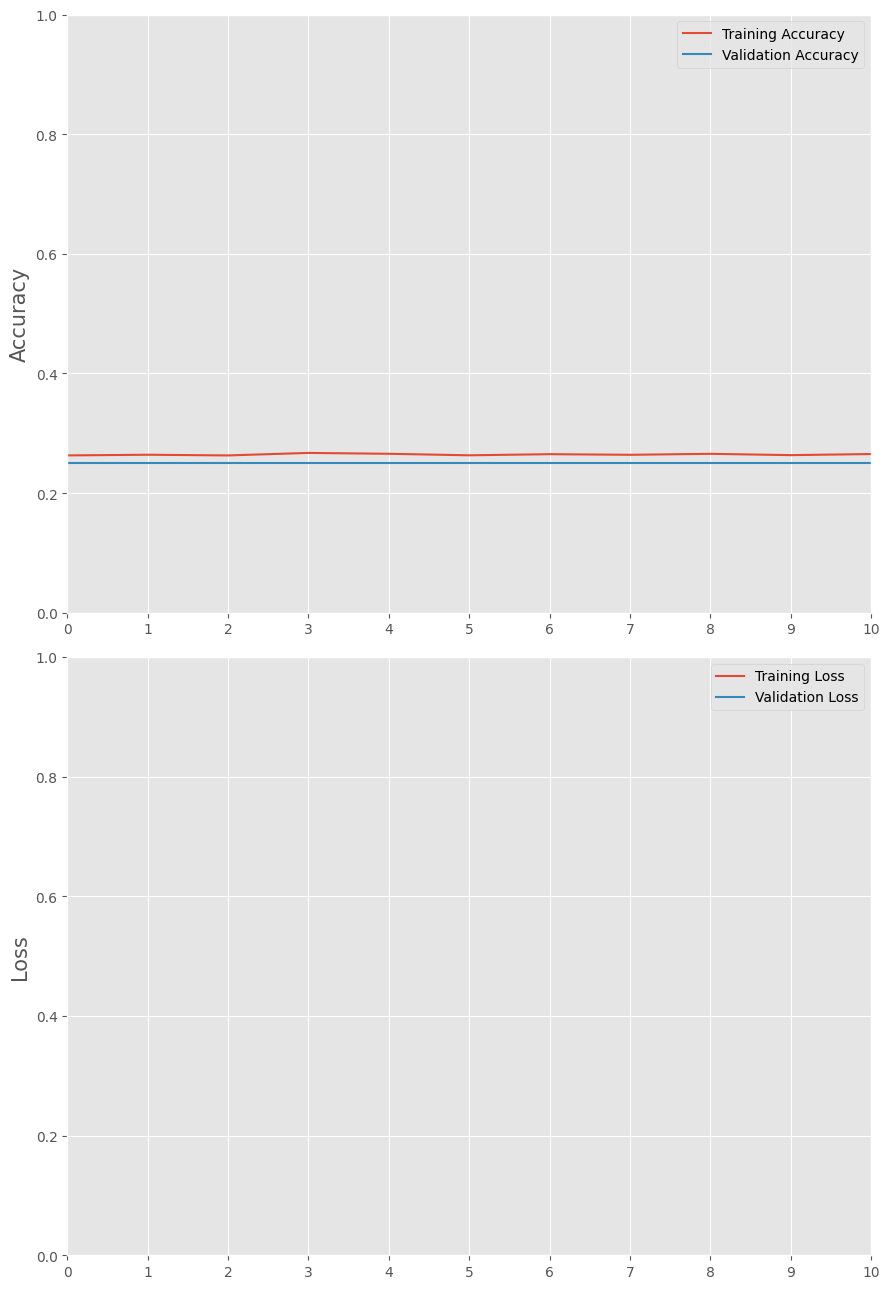

In [42]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg19_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg19_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg19_n, label='Training Loss')
axs[1].plot(test_loss_vgg19_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg19 Training and Testing Loss")
plt.show()

In [43]:
np.array(scores_vgg19).shape

(10, 302, 4)

In [44]:
y_pred_vgg19 = np.argmax(scores_vgg19,axis=2)

In [45]:
y_pred_vgg19.shape

(10, 302)

In [46]:
from sklearn.metrics import accuracy_score
acc_scores_vgg19 = []
for i in range(len(y_test_all_vgg19)):
    acc_scores_vgg19.append(accuracy_score(y_true = y_test_all_vgg19[i],y_pred = y_pred_vgg19[i]))

In [47]:
acc_scores_vgg19

[0.31125827814569534,
 0.3841059602649007,
 0.13245033112582782,
 0.3841059602649007,
 0.1390728476821192,
 0.38079470198675497,
 0.3841059602649007,
 0.13245033112582782,
 0.1490066225165563,
 0.1390728476821192]

In [48]:
df_acc = pd.DataFrame([acc_scores_vgg19])

df_acc.to_csv('vgg19_accuracy', index=False)

df_acc = pd.read_csv('vgg19_accuracy')

acc_scores_vgg19 = df_acc.iloc[0].values

In [49]:
y_test_all_n = np.array(y_test_all_vgg19)

y_pred_vgg19_n = y_pred_vgg19.flatten()
y_test_all_n = y_test_all_n.flatten()

In [50]:
import gc
gc.collect()

23607

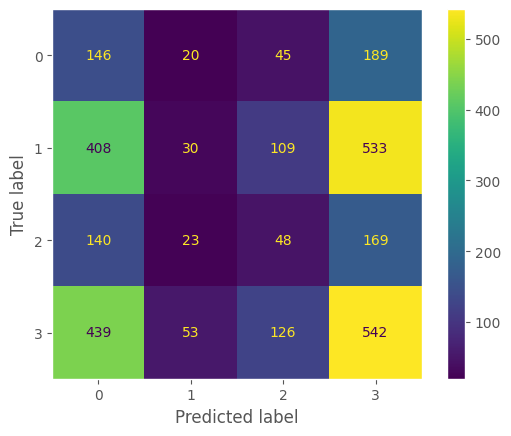

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg19_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg19")
plt.show()

In [52]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg19_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.36      0.19       400
           1       0.24      0.03      0.05      1080
           2       0.15      0.13      0.14       380
           3       0.38      0.47      0.42      1160

    accuracy                           0.25      3020
   macro avg       0.22      0.25      0.20      3020
weighted avg       0.27      0.25      0.22      3020



In [53]:
train_loss_vgg19_n.shape

(100,)

#  Performance Metrics

## accuracy_score Metrics

In [54]:
df_acc = pd.read_csv('cnn_svm_accuracy')
acc_scores_cnn_svm = df_acc.iloc[0].values


df_acc = pd.read_csv('lstm_accuracy')
acc_scores_lstm = df_acc.iloc[0].values


df_acc = pd.read_csv('bilstm_accuracy')
acc_scores_bilstm = df_acc.iloc[0].values


df_acc = pd.read_csv('birnn_accuracy')
acc_scores_birnn = df_acc.iloc[0].values



df_acc = pd.read_csv('mnv2_accuracy')
acc_scores_mnv2 = df_acc.iloc[0].values


df_acc = pd.read_csv('env2l_accuracy')
acc_scores_env2l = df_acc.iloc[0].values


df_acc = pd.read_csv('enb7_accuracy')
acc_scores_enb7 = df_acc.iloc[0].values


df_acc = pd.read_csv('nnl_accuracy')
acc_scores_nnl = df_acc.iloc[0].values


df_acc = pd.read_csv('nnb_accuracy')
acc_scores_nnb = df_acc.iloc[0].values



df_acc = pd.read_csv('axn_accuracy')
acc_scores_axn = df_acc.iloc[0].values



df_acc = pd.read_csv('rnv2_accuracy')
acc_scores_rnv2 = df_acc.iloc[0].values



df_acc = pd.read_csv('xv3_accuracy')
acc_scores_xv3 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg16_accuracy')
acc_scores_vgg16 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg19_accuracy')
acc_scores_vgg19 = df_acc.iloc[0].values

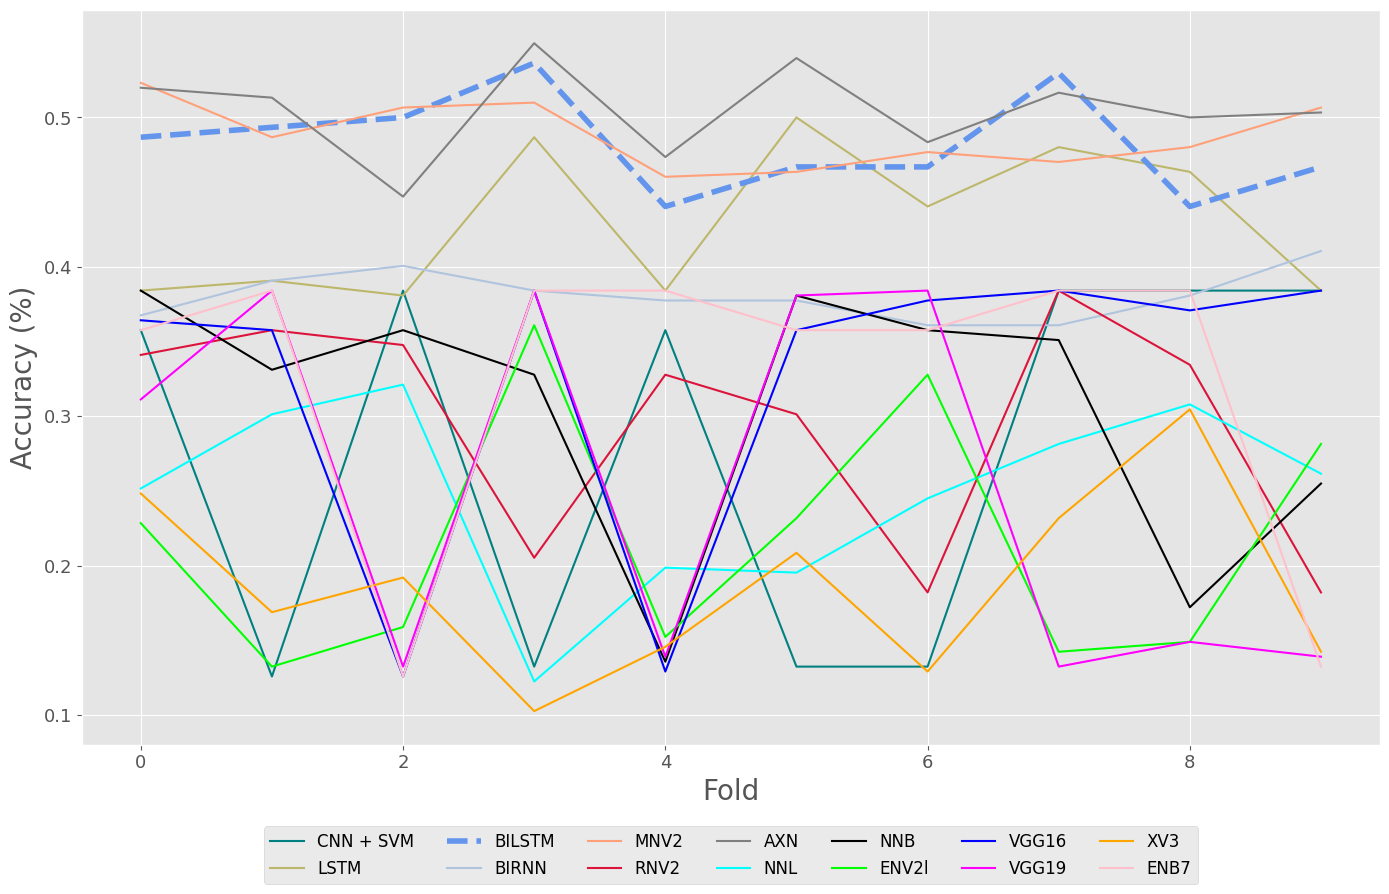

In [55]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(acc_scores_cnn_svm,label='CNN + SVM',color='teal')
plt.plot(acc_scores_lstm,label='LSTM',color='darkkhaki')
plt.plot(acc_scores_bilstm,label='BILSTM',color='cornflowerblue',linewidth=4,linestyle='--')
plt.plot(acc_scores_birnn,label='BIRNN',color='lightsteelblue')
plt.plot(acc_scores_mnv2,label='MNV2',color = 'lightsalmon')
plt.plot(acc_scores_rnv2,label='RNV2',color='crimson')
plt.plot(acc_scores_axn,label='AXN',color='gray')
plt.plot(acc_scores_nnl,label='NNL',color='cyan')
plt.plot(acc_scores_nnb,label='NNB',color='black')
plt.plot(acc_scores_env2l,label='ENV2l',color='lime')
plt.plot(acc_scores_vgg16,label='VGG16',color='blue')
plt.plot(acc_scores_vgg19,label='VGG19',color='fuchsia')
plt.plot(acc_scores_xv3,label='XV3',color='orange')
plt.plot(acc_scores_enb7,label='ENB7',color='pink')

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Accuracy (%)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Accuracy")
plt.show()

## Times Metrics

In [56]:
df_acc = pd.read_csv('cnn_svm_times')
times_cnn_svm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('lstm_times')
times_lstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('bilstm_times')
times_bilstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('birnn_times')
times_birnn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('mnv2_times')
times_mnv2 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('env2l_times')
times_env2l = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('enb7_times')
times_enb7 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnl_times')
times_nnl = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnb_times')
times_nnb = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('axn_times')
times_axn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('rnv2_times')
times_rnv2 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('xv3_times')
times_xv3 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg16_times')
times_vgg16 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg19_times')
times_vgg19 = np.mean(df_acc.iloc[0].values)

In [57]:
df_acc = pd.read_csv('vgg19_times')
times_vgg19 = df_acc.iloc[0].values
times_vgg19

array([5.15922033, 5.1548063 , 5.15728014, 5.1542905 , 5.15119957,
       5.14856306, 5.14284634, 5.14574494, 5.1496664 , 5.15421531])

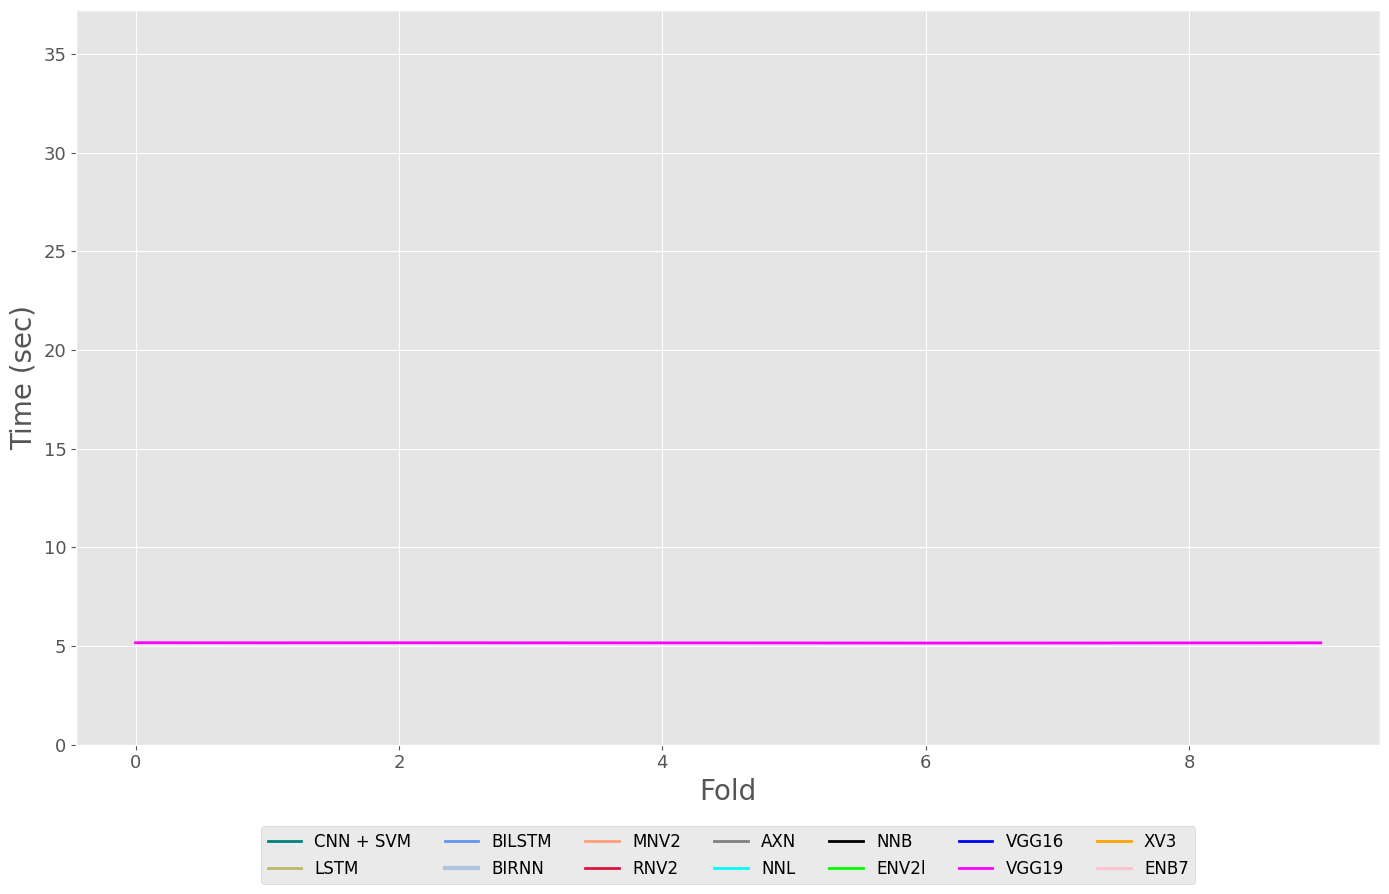

In [58]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(times_cnn_svm,label='CNN + SVM',color='teal',linewidth=2)
plt.plot(times_lstm,label='LSTM',color='darkkhaki',linewidth=2)
plt.plot(times_bilstm,label='BILSTM',color='cornflowerblue',linewidth=2)
plt.plot(times_birnn,label='BIRNN',color='lightsteelblue',linewidth=3)
plt.plot(times_mnv2,label='MNV2',color = 'lightsalmon',linewidth=2)
plt.plot(times_rnv2,label='RNV2',color='crimson',linewidth=2)
plt.plot(times_axn,label='AXN',color='gray',linewidth=2)
plt.plot(times_nnl,label='NNL',color='cyan',linewidth=2)
plt.plot(times_nnb,label='NNB',color='black',linewidth=2)
plt.plot(times_env2l,label='ENV2l',color='lime',linewidth=2)
plt.plot(times_vgg16,label='VGG16',color='blue',linewidth=2)
plt.plot(times_vgg19,label='VGG19',color='fuchsia',linewidth=2)
plt.plot(times_xv3,label='XV3',color='orange',linewidth=2)
plt.plot(times_enb7,label='ENB7',color='pink',linewidth=2)

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Time (sec)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylim(y.min(),)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Times")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


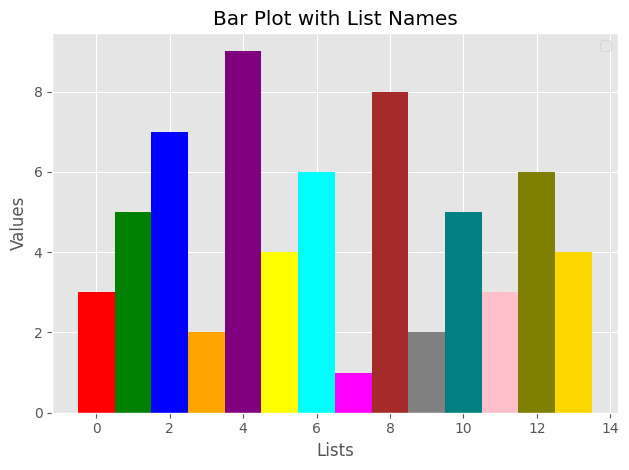

In [59]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
# List names
list_names = ["List 1", "List 2", "List 3", "List 4", "List 5", "List 6", "List 7", "List 8", "List 9", "List 10", "List 11", "List 12", "List 13", "List 14"]

# Data values for each list
data_values = [3, 5, 7, 2, 9, 4, 6, 1, 8, 2, 5, 3, 6, 4]

# Custom colors for each bar
custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'gray', 'teal', 'pink', 'olive', 'gold']

# Width of each bar
bar_width = 1

# Calculate the positions of the bars on the x-axis
bar_positions = np.arange(len(data_values))

# Creating the bar plot
plt.bar(bar_positions, data_values, color=custom_colors, width=bar_width)

# Adding labels to each bar
# for i in range(len(list_names)):
#     plt.text(bar_positions[i], data_values[i], list_names[i], ha='center', va='bottom')

# Customizing the plot
plt.xlabel('Lists')
plt.ylabel('Values')
plt.title('Bar Plot with List Names')
# plt.xticks(bar_positions, list_names, rotation=45)

# Displaying the plot
plt.tight_layout()
plt.legend()
plt.show()


# Training and Testing Perfomance

In [60]:
df_acc = pd.read_csv('cnn_svm_acc')
train_acc_cnn_svm_n = df_acc.iloc[0].values
test_acc_cnn_svm_n = df_acc.iloc[1].values
train_loss_cnn_svm_n = df_acc.iloc[2].values
test_loss_cnn_svm_n = df_acc.iloc[3].values

df_acc = pd.read_csv('lstm_acc')
train_acc_lstm_n = df_acc.iloc[0].values
test_acc_lstm_n = df_acc.iloc[1].values
train_loss_lstm_n = df_acc.iloc[2].values
test_loss_lstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('bilstm_acc')
train_acc_bilstm_n = df_acc.iloc[0].values
test_acc_bilstm_n = df_acc.iloc[1].values
train_loss_bilstm_n = df_acc.iloc[2].values
test_loss_bilstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('birnn_acc')
train_acc_birnn_n = df_acc.iloc[0].values
test_acc_birnn_n = df_acc.iloc[1].values
train_loss_birnn_n = df_acc.iloc[2].values
test_loss_birnn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('mnv2_acc')
train_acc_mnv2_n = df_acc.iloc[0].values
test_acc_mnv2_n = df_acc.iloc[1].values
train_loss_mnv2_n = df_acc.iloc[2].values
test_loss_mnv2_n = df_acc.iloc[3].values


df_acc = pd.read_csv('env2l_acc')
train_acc_env2l_n = df_acc.iloc[0].values
test_acc_env2l_n = df_acc.iloc[1].values
train_loss_env2l_n = df_acc.iloc[2].values
test_loss_env2l_n = df_acc.iloc[3].values


df_acc = pd.read_csv('enb7_acc')
train_acc_enb7_n = df_acc.iloc[0].values
test_acc_enb7_n = df_acc.iloc[1].values
train_loss_enb7_n = df_acc.iloc[2].values
test_loss_enb7_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnl_acc')
train_acc_nnl_n = df_acc.iloc[0].values
test_acc_nnl_n = df_acc.iloc[1].values
train_loss_nnl_n = df_acc.iloc[2].values
test_loss_nnl_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnb_acc')
train_acc_nnb_n = df_acc.iloc[0].values
test_acc_nnb_n = df_acc.iloc[1].values
train_loss_nnb_n = df_acc.iloc[2].values
test_loss_nnb_n = df_acc.iloc[3].values



df_acc = pd.read_csv('axn_acc')
train_acc_axn_n = df_acc.iloc[0].values
test_acc_axn_n = df_acc.iloc[1].values
train_loss_axn_n = df_acc.iloc[2].values
test_loss_axn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('rnv2_acc')
train_acc_rnv2_n = df_acc.iloc[0].values
test_acc_rnv2_n = df_acc.iloc[1].values
train_loss_rnv2_n = df_acc.iloc[2].values
test_loss_rnv2_n = df_acc.iloc[3].values



df_acc = pd.read_csv('xv3_acc')
train_acc_xv3_n = df_acc.iloc[0].values
test_acc_xv3_n = df_acc.iloc[1].values
train_loss_xv3_n = df_acc.iloc[2].values
test_loss_xv3_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg16_acc')
train_acc_vgg16_n = df_acc.iloc[0].values
test_acc_vgg16_n = df_acc.iloc[1].values
train_loss_vgg16_n = df_acc.iloc[2].values
test_loss_vgg16_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg19_acc')
train_acc_vgg19_n = df_acc.iloc[0].values
test_acc_vgg19_n = df_acc.iloc[1].values
train_loss_vgg19_n = df_acc.iloc[2].values
test_loss_vgg19_n = df_acc.iloc[3].values

## Training Accuracy Perfomance

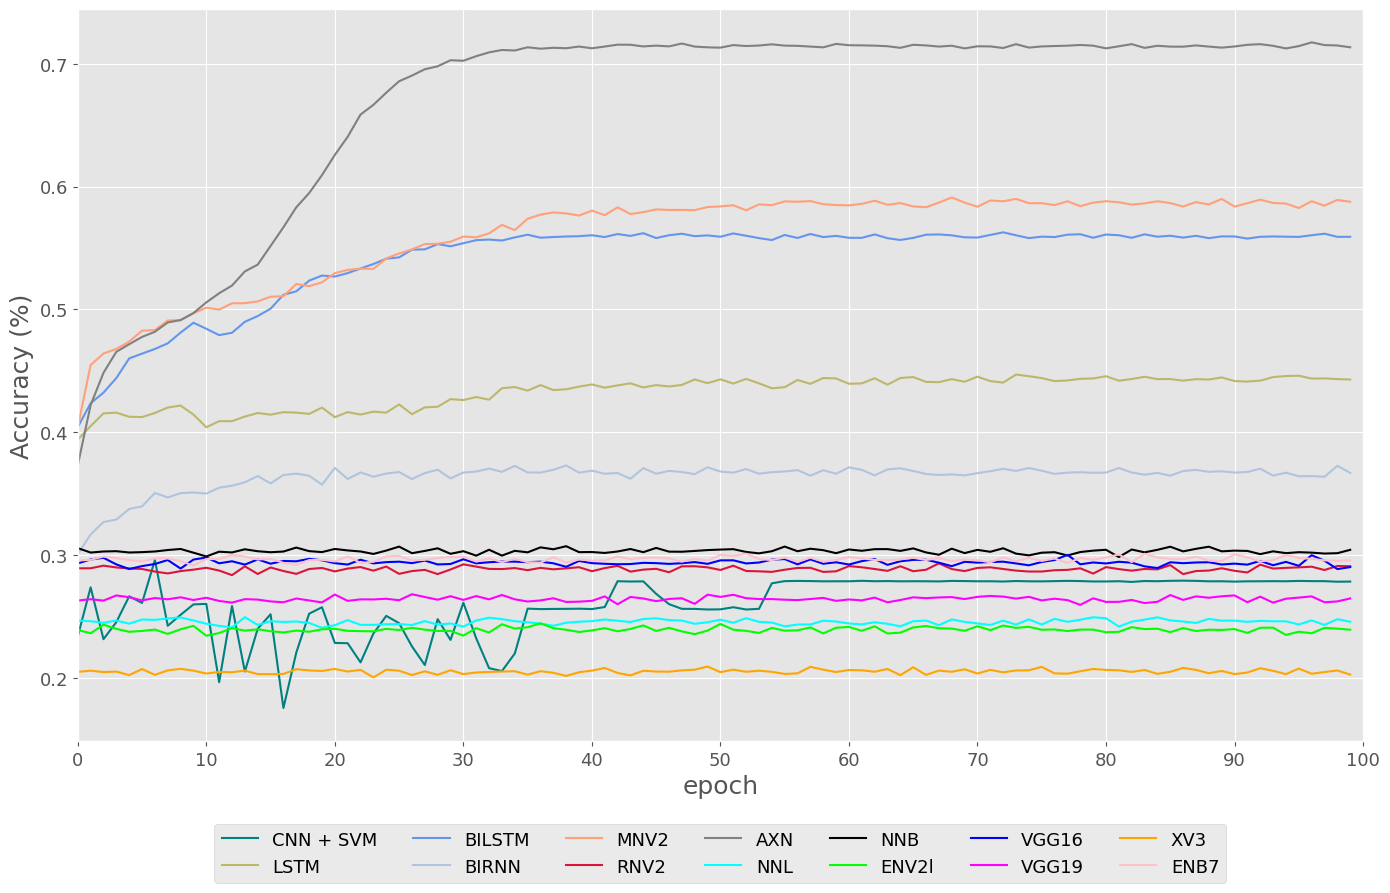

In [61]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_acc_axn_n,label='AXN',color='gray')
plt.plot(train_acc_nnl_n,label='NNL',color='cyan')
plt.plot(train_acc_nnb_n,label='NNB',color='black')
plt.plot(train_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(train_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(train_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_acc_xv3_n,label='XV3',color='orange')
plt.plot(train_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Accuracy Performance")
plt.show()

## Testing Accuracy Perfomance

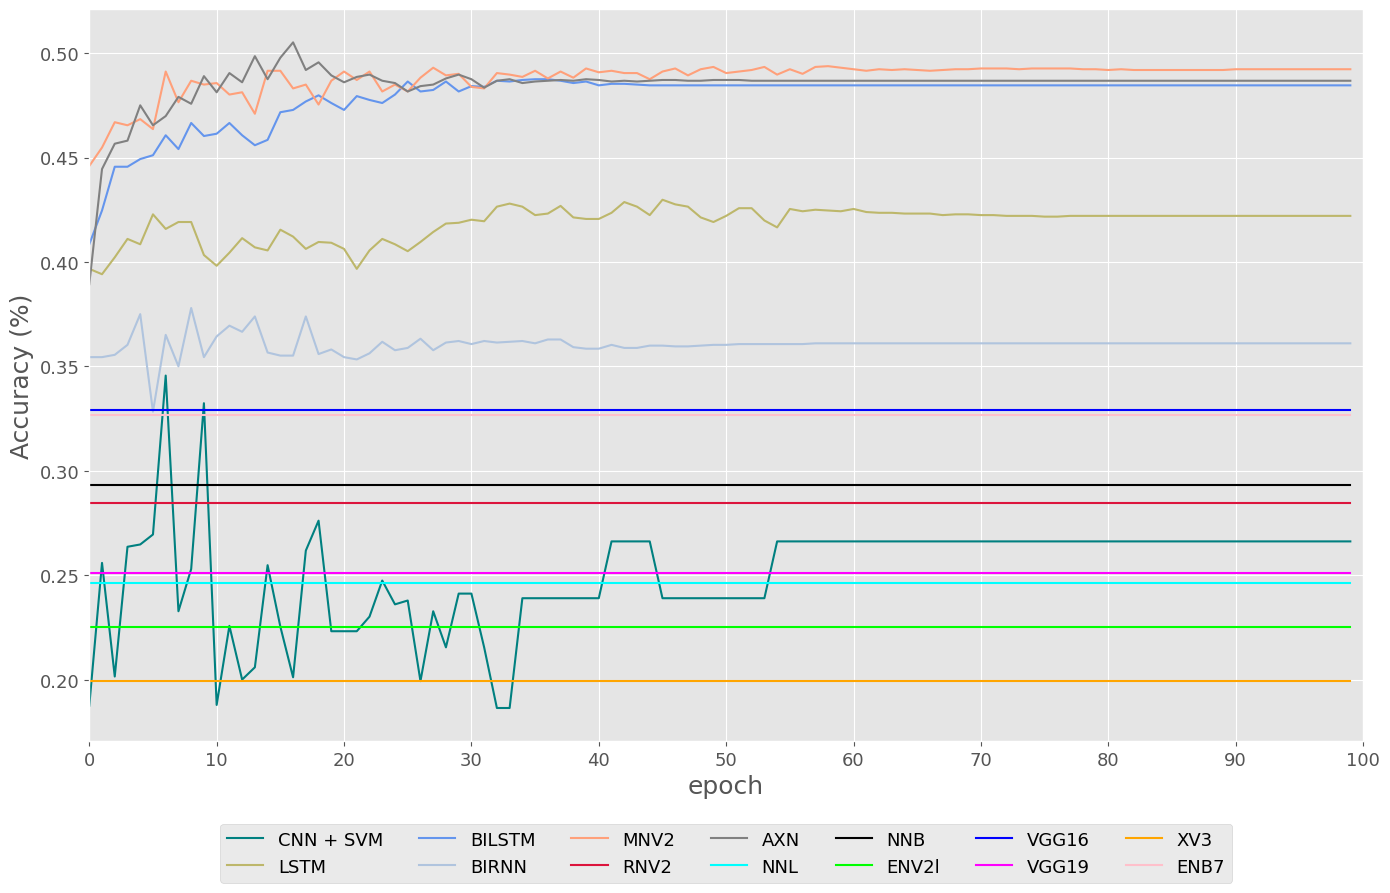

In [62]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_acc_axn_n,label='AXN',color='gray')
plt.plot(test_acc_nnl_n,label='NNL',color='cyan')
plt.plot(test_acc_nnb_n,label='NNB',color='black')
plt.plot(test_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(test_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(test_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_acc_xv3_n,label='XV3',color='orange')
plt.plot(test_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Accuracy Performance")
plt.show()

## Training Loss Perfomance

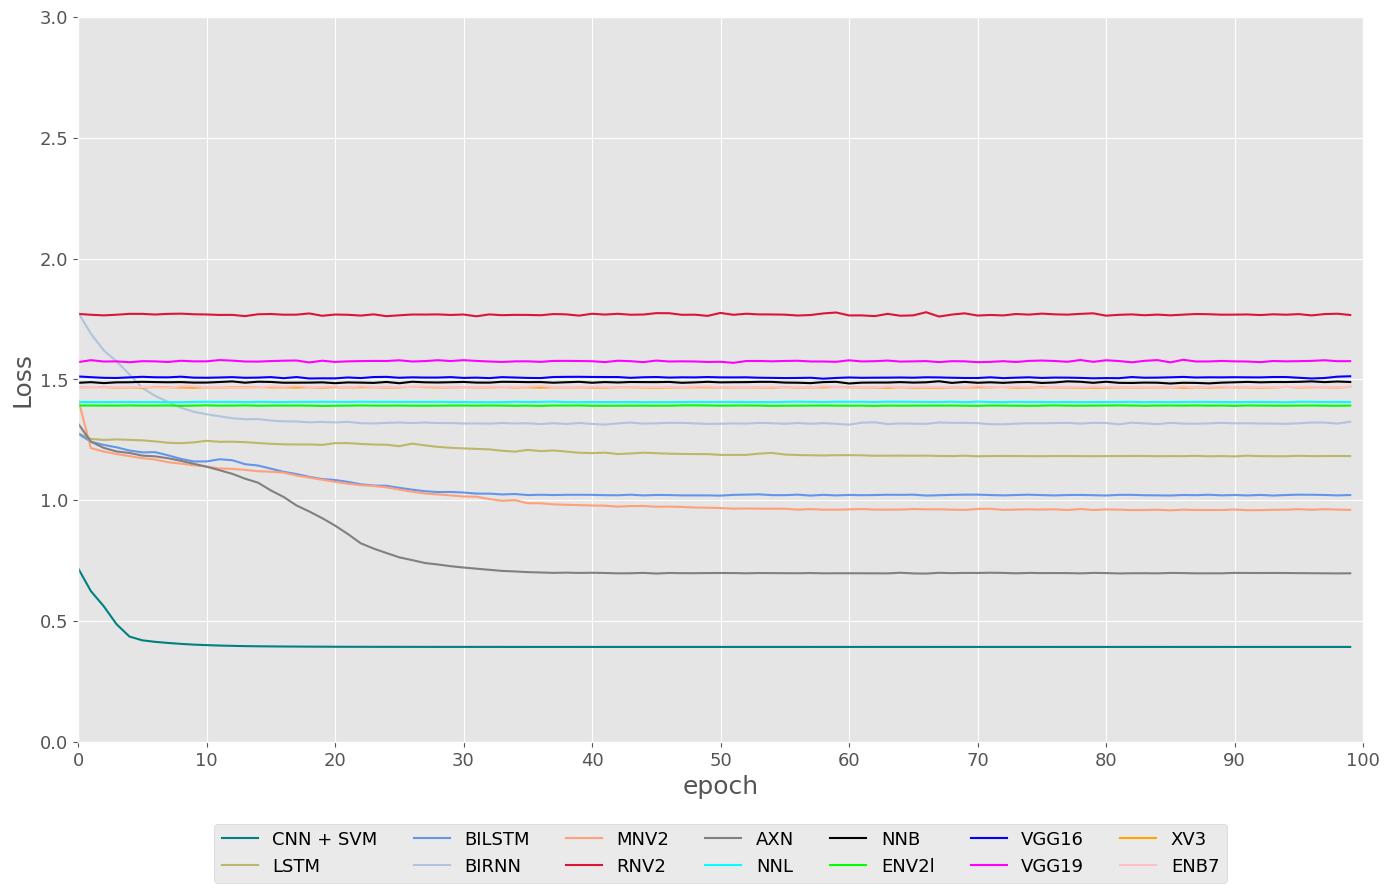

In [63]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_loss_axn_n,label='AXN',color='gray')
plt.plot(train_loss_nnl_n,label='NNL',color='cyan')
plt.plot(train_loss_nnb_n,label='NNB',color='black')
plt.plot(train_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(train_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(train_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_loss_xv3_n,label='XV3',color='orange')
plt.plot(train_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Loss Performance")
plt.show()

## Testing Loss Perfomance

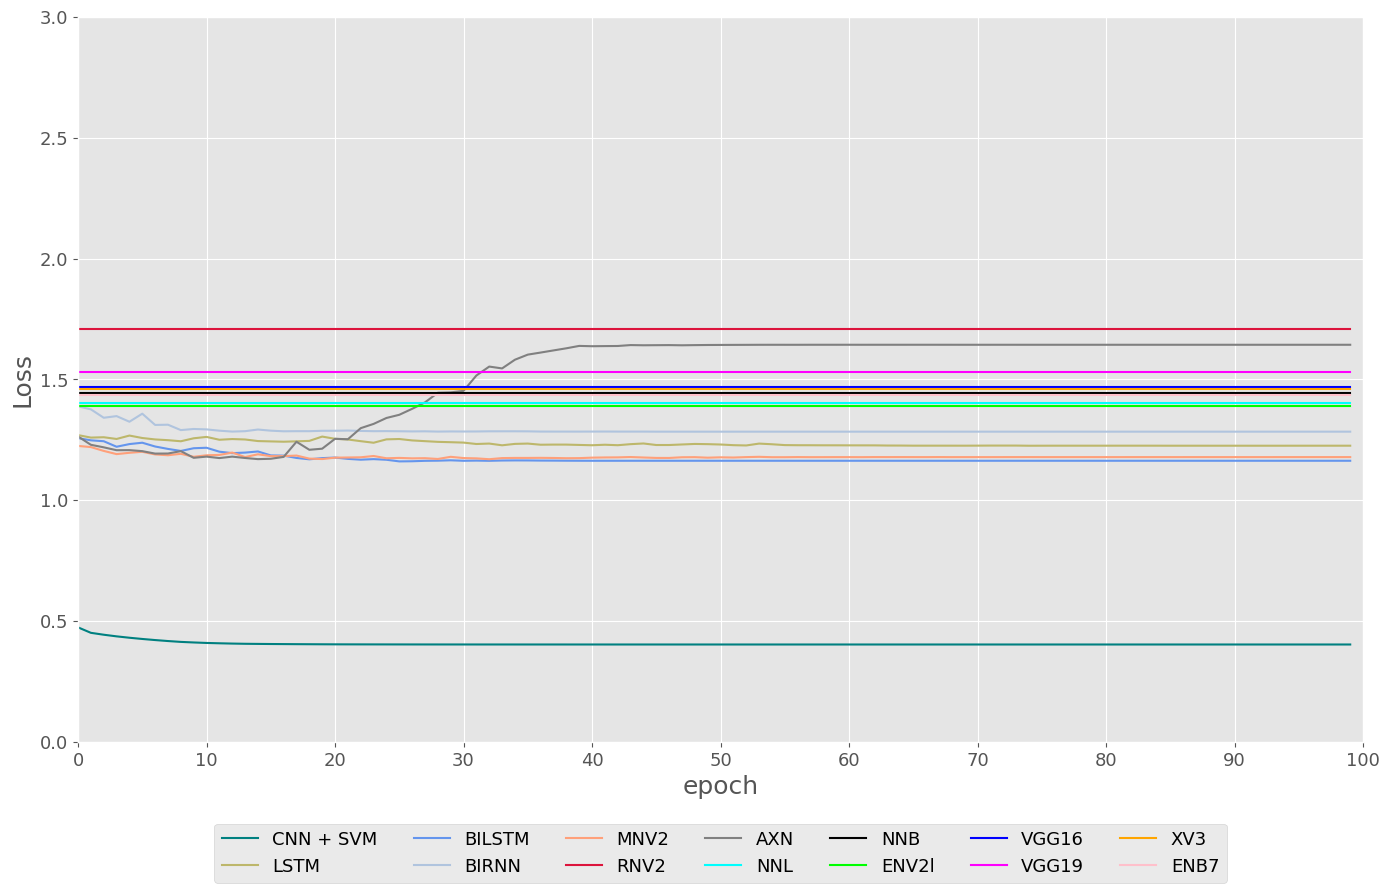

In [64]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_loss_axn_n,label='AXN',color='gray')
plt.plot(test_loss_nnl_n,label='NNL',color='cyan')
plt.plot(test_loss_nnb_n,label='NNB',color='black')
plt.plot(test_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(test_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(test_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_loss_xv3_n,label='XV3',color='orange')
plt.plot(test_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Loss Performance")
plt.show()